In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import math
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import warnings
import pmdarima
import itertools
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
import statsmodels.stats.diagnostic as diag
from xgboost import XGBRegressor
from xgboost import plot_importance
from math import sqrt
from pylab import rcParams
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings("ignore")
from pandas.plotting import autocorrelation_plot
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import statsmodels as sm
import statsmodels.api as smt
import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [182]:
# set parameter (font size etc) for plots

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [3]:
# pip install skforecast

# Time Series Analysis

## Applying traditional time series models (ie. ARIMA) and Machine learning models to unemployment rate 

## Shauna Han (shh2145)

## Data Pre-processing

In [154]:
# import data
df = pd.read_csv('unemprate_count.csv')

try:
    # Changing the date column to a Time Interval columnn
    df.date = pd.DatetimeIndex(df.date)
    # sort by date 
    df = df.sort_values(by = "date")
    # Change the index to the date column
    df.index = pd.PeriodIndex(df.date, freq='M')
except:
    pass

df['timeIndex'] = range(len(df))
df =df.rename(columns={"United States of America UnemploymentRate_Person": "unemployment_rate", "United States of America Count_Person_InLaborForce": "in_labor_force"})
df

,date,unemployment_rate,in_labor_force,timeIndex
date,,,,
1948-01,1948-01-01,3.4,60095000,0
1948-02,1948-02-01,3.8,60524000,1
1948-03,1948-03-01,4.0,60070000,2
1948-04,1948-04-01,3.9,60677000,3
1948-05,1948-05-01,3.5,59972000,4
...,...,...,...,...
2022-03,2022-03-01,3.6,164409000,890
2022-04,2022-04-01,3.6,164046000,891
2022-05,2022-05-01,3.6,164376000,892


In [156]:
len(df)

895

In [157]:
df['unemployment_rate_log'] = np.log(df.unemployment_rate)

In [158]:
X = df[['timeIndex']]
Y = df['unemployment_rate_log']

#x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)


In [7]:
    
# #divide into train and validation set
# train = y[:int(0.75*(len(y)))]
# valid = y[int(0.75*(len(y))):]

In [8]:
'''
y_test = df.iloc[-1,:]['unemployment_rate']
x_test = df.iloc[-1,:]['date']
df = df.iloc[:-1,:]
'''

"\ny_test = df.iloc[-1,:]['unemployment_rate']\nx_test = df.iloc[-1,:]['date']\ndf = df.iloc[:-1,:]\n"

In [159]:
y = df.set_index('date')
y = y.drop(['timeIndex', 'unemployment_rate_log', 'in_labor_force'],  axis=1)
y

# import copy
# train_new = copy.deepcopy(train)#.index
# #train_new.index = range(len(train.index))
# train_new.index = pd.DatetimeIndex(train.index).to_period('M')
# train_new

,unemployment_rate
date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2022-03-01,3.6
2022-04-01,3.6
2022-05-01,3.6


## Seasonality 

Text(0, 0.5, 'Unemployment Rate')

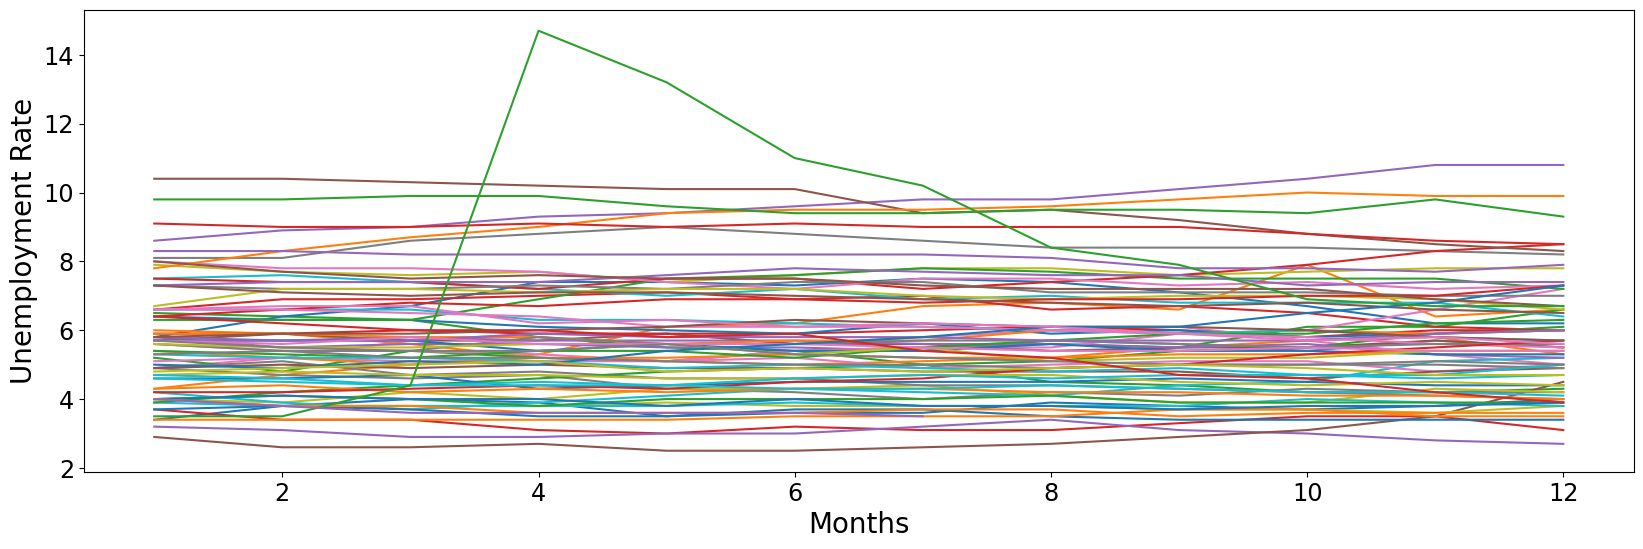

In [187]:
df.head()
df['month']=df.index.month
df['year']=df.index.year


pivot=df.pivot_table(values='unemployment_rate',index='month',columns='year')

pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Unemployment Rate', fontsize = 20)


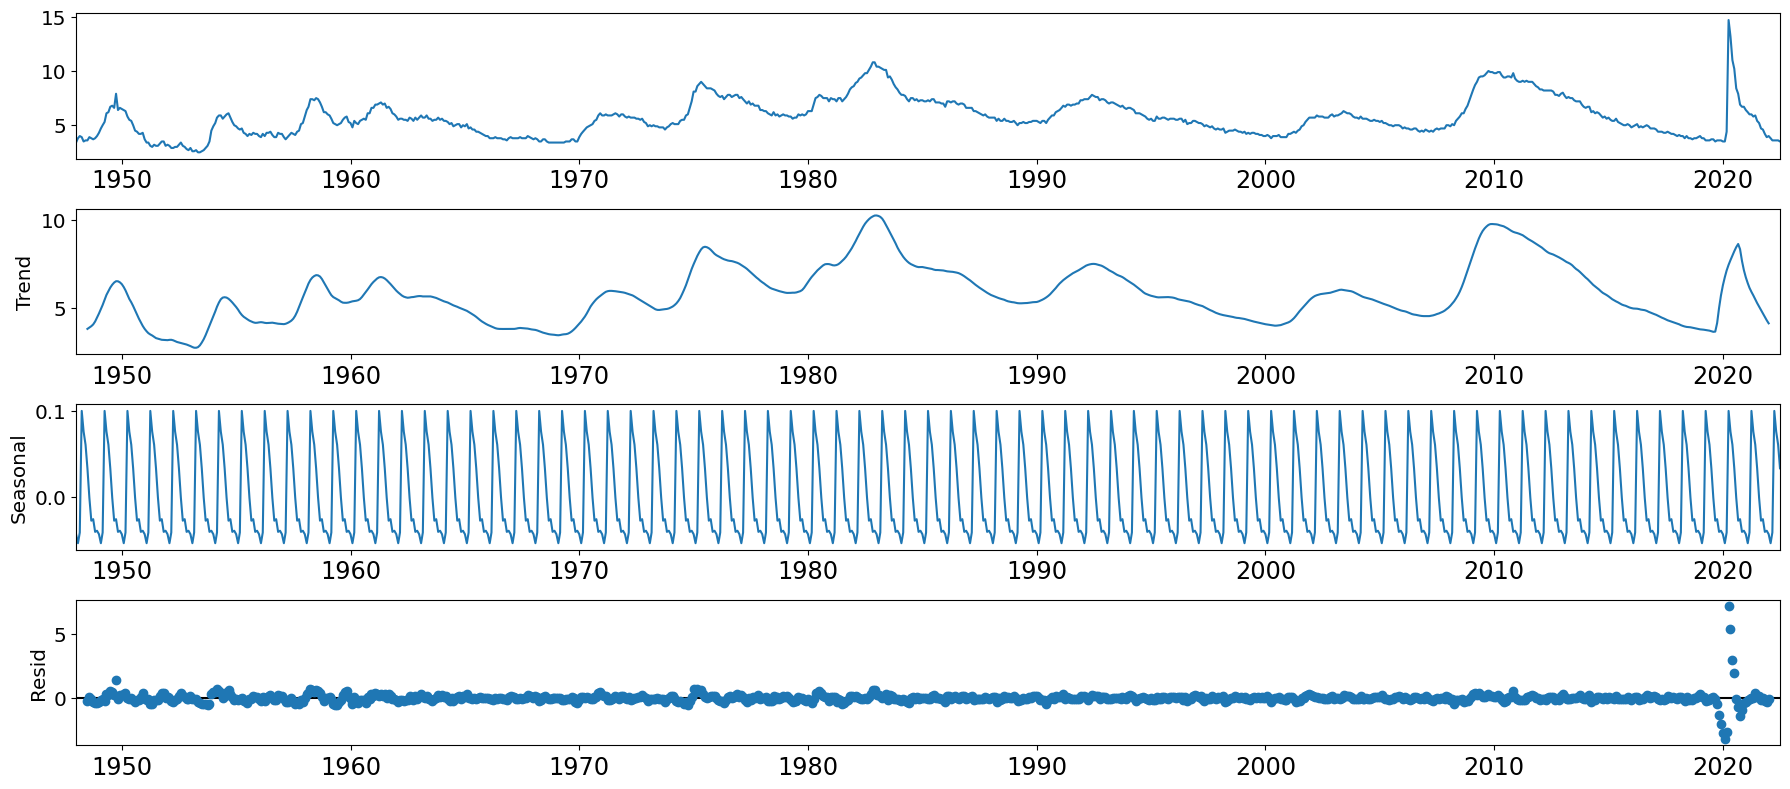

In [161]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Transformation - Log

In [165]:
# y['unemp_logshift1'] = np.log(y['unemployment_rate']).shift()
# y['log_diff'] = np.log(y['unemployment_rate']) - y['unemp_logshift1']
df["unemp_logshift1"] = df.unemployment_rate_log.shift()
df["unemp_logdiff"] = df.unemployment_rate_log - df.unemp_logshift1
df['first_diff'] = df['unemployment_rate'].diff()
df['in_labor_force_log'] = np.log(df.in_labor_force)

Text(0, 0.5, 'unemployment rate')

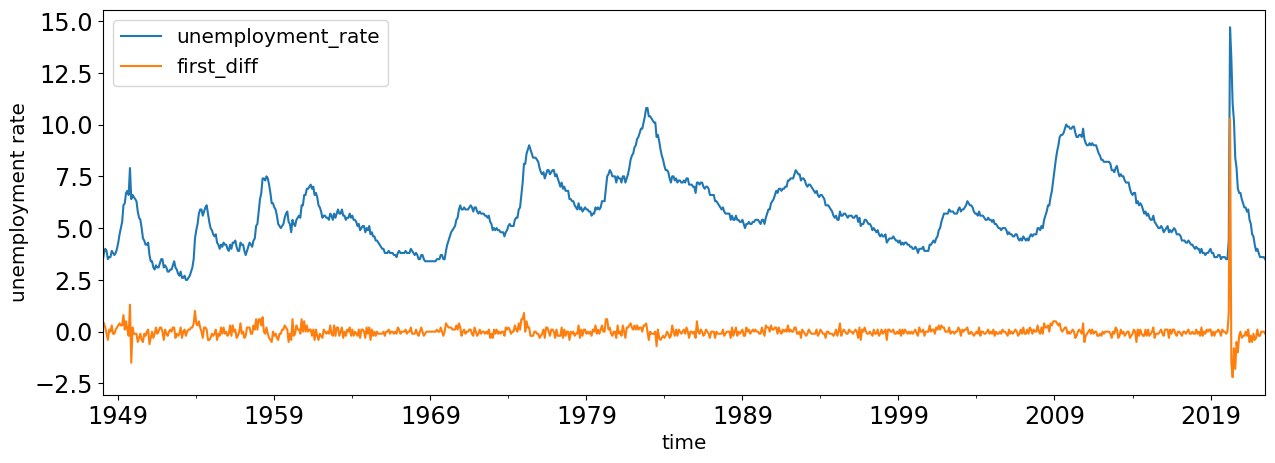

In [180]:
#remove seasonality

df.plot(kind="line", x="date", y = ["unemployment_rate",  "first_diff"])
plt.xlabel(r"time")
plt.ylabel(r"unemployment rate")

In [10]:
df.tail()

,date,unemployment_rate,in_labor_force,timeIndex,unemployment_rate_log,month,year,unemp_logshift1,unemp_logdiff,first_diff,in_labor_force_log
date,,,,,,,,,,,
2022-03,2022-03-01,3.6,164409000,890,1.280934,3,2022,1.335001,-0.054067,-0.2,18.917868
2022-04,2022-04-01,3.6,164046000,891,1.280934,4,2022,1.280934,0.000000,0.0,18.915657
2022-05,2022-05-01,3.6,164376000,892,1.280934,5,2022,1.280934,0.000000,0.0,18.917667
2022-06,2022-06-01,3.6,164023000,893,1.280934,6,2022,1.280934,0.000000,0.0,18.915517
2022-07,2022-07-01,3.5,163960000,894,1.252763,7,2022,1.280934,-0.028171,-0.1,18.915133


## ADF Test & KPSS Test

In [11]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [12]:
adf_test(df['unemployment_rate'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.878086
p-value                          0.002202
#Lags Used                       1.000000
Number of Observations Used    893.000000
Critical Value (1%)             -3.437694
Critical Value (5%)             -2.864782
Critical Value (10%)            -2.568496
dtype: float64


In [13]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )     
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)


In [14]:
kpss_test(df["unemployment_rate"]) #since the p-value of Kpss test is 0.035 jnop;z

Results of KPSS Test:
Test Statistic            0.526266
p-value                   0.035751
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


# Split into train and test datasets

In [86]:
X = df[['timeIndex']]
y = df['unemployment_rate_log']

In [87]:

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, shuffle=False)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), shuffle=False) 

print(x_train.shape, x_val.shape, x_test.shape)


(671, 1) (134, 1) (90, 1)


In [88]:
df_train = df.loc[y_train.index]
df_val = df.loc[y_val.index]
df_test = df.loc[y_test.index]


In [77]:
# y_train = df['unemployment_rate_log']#.reshape(1, -1)
# x_train = df['timeIndex']#.reshape(1, -1)
# x_test = np.array([[894]])
# y_test = np.array([np.log(3.5)])

In [78]:
#divide into train and validation set
# train = y[:int(0.75*(len(y)))]
# valid = y[int(0.75*(len(y))):]

# import copy
# train_new= copy.deepcopy(train)#.index
# #train_new.index = range(len(train.index))
# train.index = pd.DatetimeIndex(train.index).to_period('M')


In [79]:
# X = df[['timeIndex']]
# Y = df['unemployment_rate_log']

In [80]:
# original_data = df['unemployment_rate_log']
# test_start_date = '2022-07-01'
# train1 = original_data[:test_start_date]
# valid1 = original_data[test_start_date:]

# data_lf = df['in_labor_force']
# test_start_date = '2022-07-01'
# train2 = original_data[:test_start_date]
# valid2 = original_data[test_start_date:]

# Median Model

In [89]:
df

,date,unemployment_rate,in_labor_force,timeIndex,unemployment_rate_log,unemp_logshift1,unemp_logdiff,first_diff,in_labor_force_log
date,,,,,,,,,
1948-01,1948-01-01,3.4,60095000,0,1.223775,NaN,NaN,NaN,17.911437
1948-02,1948-02-01,3.8,60524000,1,1.335001,1.223775,0.111226,0.4,17.918551
1948-03,1948-03-01,4.0,60070000,2,1.386294,1.335001,0.051293,0.2,17.911021
1948-04,1948-04-01,3.9,60677000,3,1.360977,1.386294,-0.025318,-0.1,17.921075
1948-05,1948-05-01,3.5,59972000,4,1.252763,1.360977,-0.108214,-0.4,17.909388
...,...,...,...,...,...,...,...,...,...
2022-03,2022-03-01,3.6,164409000,890,1.280934,1.335001,-0.054067,-0.2,18.917868
2022-04,2022-04-01,3.6,164046000,891,1.280934,1.280934,0.000000,0.0,18.915657
2022-05,2022-05-01,3.6,164376000,892,1.280934,1.280934,0.000000,0.0,18.917667


In [90]:
np.exp(y_test.median())

4.4

In [168]:
np.exp(y_test.mean())

4.7263801199544995

In [91]:
model_median_pred = np.exp(y_train.median())
df_test["unemp_rate_median"] = model_median_pred

In [169]:
model_mean_pred = np.exp(y_train.mean())
model_mean_pred

5.427917532315569

<AxesSubplot: xlabel='date'>

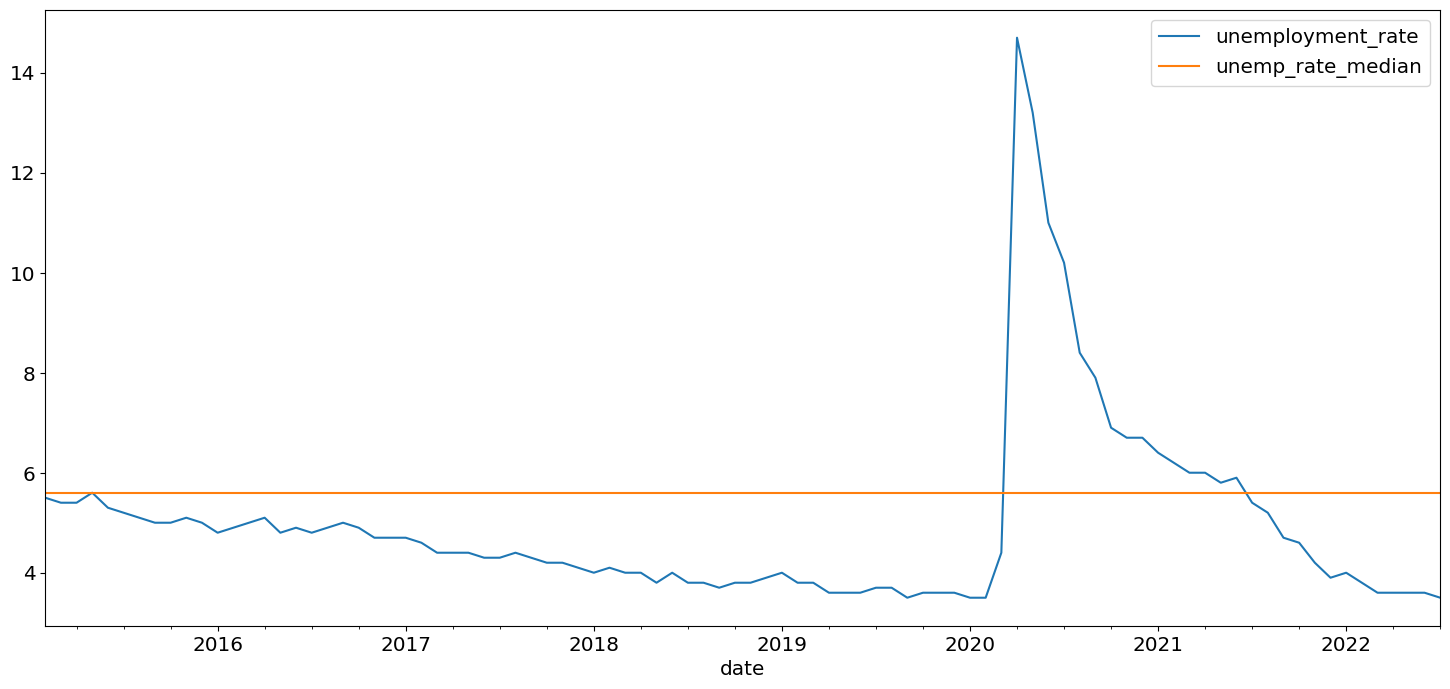

In [92]:
df_test.plot(kind="line", x="date", y = ["unemployment_rate", "unemp_rate_median"])

In [93]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    #rmse = np.sqrt(mse.sum()/mse.count())
    rmse = np.sqrt(mse.sum()/len(mse))
    
    return rmse

In [94]:
model_median_RMSE = RMSE(df_test.unemployment_rate_log, y_train.median())
model_median_RMSE

0.3300453855344169

In [170]:
model_mean_RMSE = RMSE(df_test.unemployment_rate_log, y_train.mean())
model_mean_RMSE

0.31514577886066425

In [95]:
#results
dfResults = pd.DataFrame(columns = ["Model", "Forecast", "RMSE"])

dfResults.loc[0,"Model"] = "Median"
dfResults.loc[0,"Forecast"] = (model_median_pred)
dfResults.loc[0,"RMSE"] = model_median_RMSE
dfResults.head()

,Model,Forecast,RMSE
0,Median,5.6,0.330045


# Model 2: Linear Regression (Stats Model)

In [56]:
#df_train['first_diff'] = df_train['unemployment_rate_log'].diff()

In [96]:
df_train['timeIndex'] = range(len(df_train))

In [97]:
model_linear = smf.ols('y_train ~ timeIndex', data = df_train).fit()


In [98]:
model_linear.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     94.64
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           5.22e-21
Time:                        23:02:39   Log-Likelihood:                -50.254
No. Observations:                 671   AIC:                             104.5
Df Residuals:                     669   BIC:                             113.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5219      0.020     75.556      0.000       1.482       1.561
timeIndex      0.0005   5.21e-05      9.728      0.000       0.000       0.001
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.116
Skew:                          -0.041   Prob(JB):                       0.0173
Kurtosis:                       2.468   Cond. No.                         773.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# Using Predict Function ; timeindex 894 is July 2022 (the latest data)
model_linear_forecast_auto = model_linear.predict(exog = dict(timeIndex=np.arange(805,895)))
#model_linear_forecast_auto = model_linear.predict(Xnew)

model_linear_forecast_auto #use this for forecast 

0     1.929551
1     1.930058
2     1.930564
3     1.931070
4     1.931577
        ...   
85    1.972593
86    1.973100
87    1.973606
88    1.974112
89    1.974619
Length: 90, dtype: float64

In [100]:
model_linear_pred = model_linear.predict(x_test)

In [101]:
df_test["unemp_rate_linear"] = np.exp(model_linear_pred)

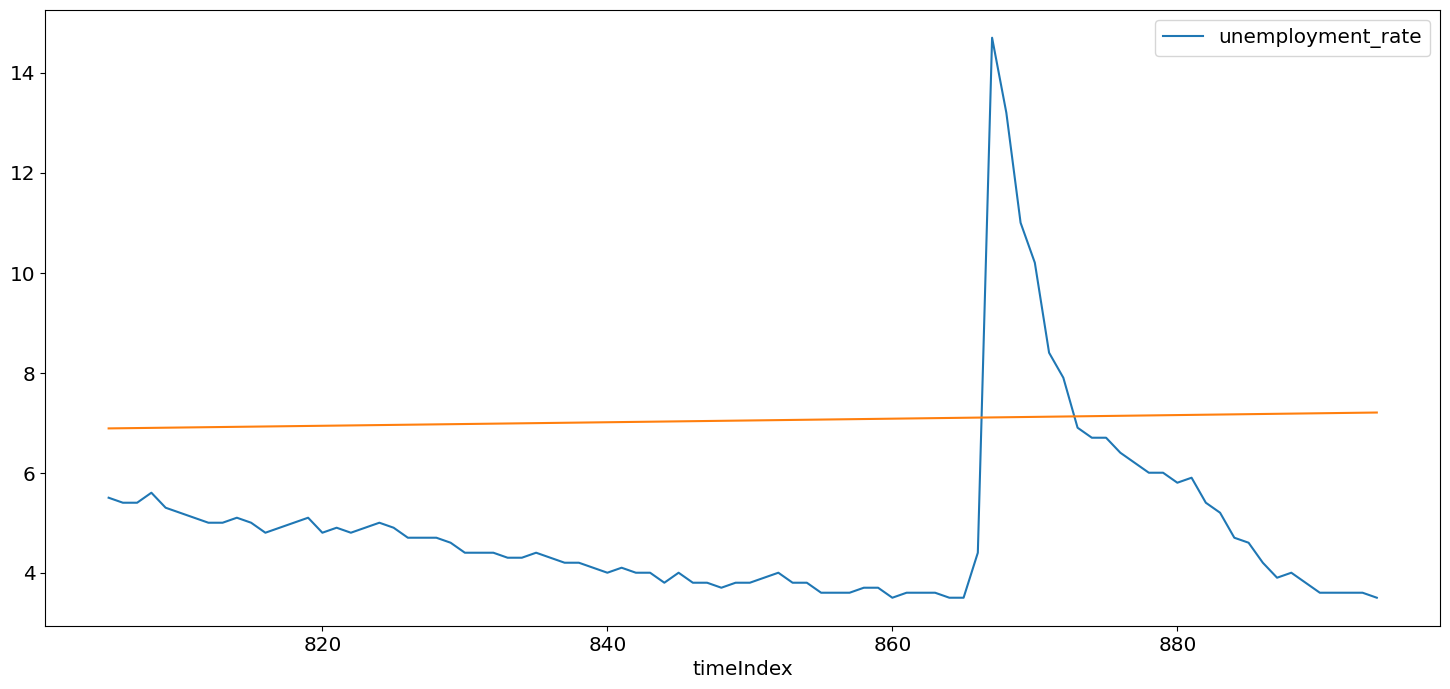

In [102]:
# Plot the prediction line
df_test.plot(kind="line", x ="timeIndex", y = "unemployment_rate")
plt.plot(df_test.timeIndex,np.exp(model_linear_pred), '-')

In [103]:
# Root Mean Squared Error (RMSE)
model_linear_RMSE = RMSE(model_linear_pred, y_test)
model_linear_RMSE




0.4891821389325731

In [104]:
dfResults.loc[1,"Model"] = "Linear Model (StatsModel)"
dfResults.loc[1,"Forecast"] = np.exp(model_linear_forecast_auto[-10:]).mean()
dfResults.loc[1,"RMSE"] = model_linear_RMSE
dfResults.head()

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182


<AxesSubplot: xlabel='timeIndex'>

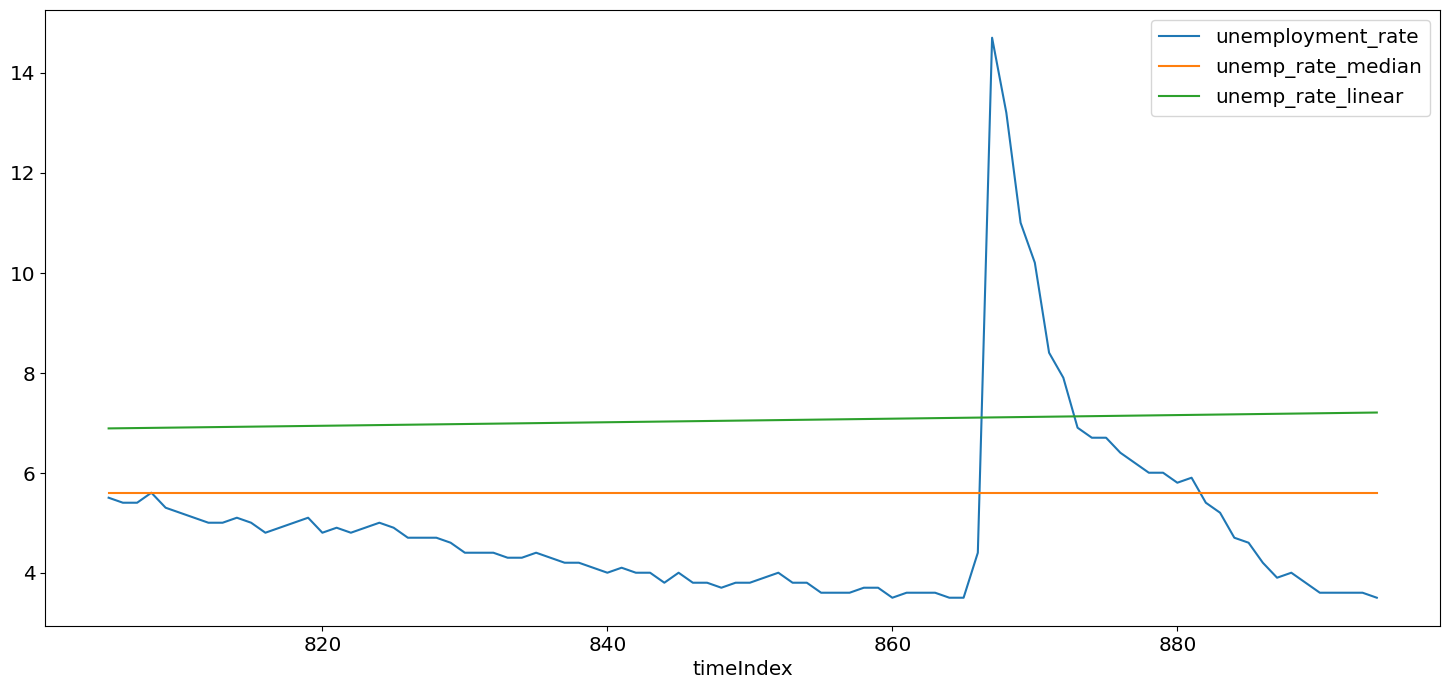

In [105]:
df_test.plot(kind="line", x="timeIndex", y = ["unemployment_rate", "unemp_rate_median", "unemp_rate_linear"])

## 2 b) Linear model using Scikit-Learn

In [106]:
clf = LinearRegression()

clf.fit(x_train.values.reshape(1, -1).T,y_train)


LinearRegression()

In [107]:
#x_test = 894
#prediction
prediction_lm = clf.predict(x_test)
test_lm = clf.predict(x_test.values.reshape(1, -1).T)

rmse_lm = RMSE(y_test, test_lm)

In [108]:
dfResults.loc[2,"Model"] = "Linear Model (Scikit-Learn)"
dfResults.loc[2,"Forecast"] = np.exp(prediction_lm[-10:]).mean()
dfResults.loc[2,"RMSE"] = rmse_lm

dfResults.head(12)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182


# Linear Model with Regressor

In [109]:
model_linear_laborforce = smf.ols('y_train ~ timeIndex + in_labor_force_log', data = df_train).fit()

In [110]:
model_linear_laborforce.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           6.20e-46
Time:                        23:03:00   Log-Likelihood:                 9.9189
No. Observations:                 671   AIC:                            -13.84
Df Residuals:                     668   BIC:                           -0.3115
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -57.8656      5.184    -11.162      0.000     -68.045     -47.686
timeIndex             -0.0045      0.000    -10.225      0.000      -0.005      -0.004
in_labor_force_log     3.3255      0.290     11.455      0.000       2.755       3.895
==============================================================================
Omnibus:                       11.404   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                8.752
Skew:                          -0.181   Prob(JB):                       0.0126
Kurtosis:                       2.573   Cond. No.                     2.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
df_test

,date,unemployment_rate,in_labor_force,timeIndex,unemployment_rate_log,unemp_logshift1,unemp_logdiff,first_diff,in_labor_force_log,unemp_rate_median,unemp_rate_linear
date,,,,,,,,,,,
2015-02,2015-02-01,5.5,156644000,805,1.704748,1.740466,-0.035718,-0.2,18.869486,5.6,6.886420
2015-03,2015-03-01,5.4,156643000,806,1.686399,1.704748,-0.018349,-0.1,18.869480,5.6,6.889908
2015-04,2015-04-01,5.4,157060000,807,1.686399,1.686399,0.000000,0.0,18.872138,5.6,6.893398
2015-05,2015-05-01,5.6,157651000,808,1.722767,1.686399,0.036368,0.2,18.875894,5.6,6.896889
2015-06,2015-06-01,5.3,157062000,809,1.667707,1.722767,-0.055060,-0.3,18.872151,5.6,6.900383
...,...,...,...,...,...,...,...,...,...,...,...
2022-03,2022-03-01,3.6,164409000,890,1.280934,1.335001,-0.054067,-0.2,18.917868,5.6,7.189295
2022-04,2022-04-01,3.6,164046000,891,1.280934,1.280934,0.000000,0.0,18.915657,5.6,7.192937
2022-05,2022-05-01,3.6,164376000,892,1.280934,1.280934,0.000000,0.0,18.917667,5.6,7.196580


In [112]:
rmse_reg2 = mean_squared_error(y_test, model_linear_laborforce.predict(df_test[['timeIndex','in_labor_force_log']]), squared=False)
rmse_reg2

0.4904807451505732

In [113]:
df_test["lm_with_regressor"] = np.exp(model_linear_laborforce.predict(
exog = dict(timeIndex=np.arange(805,895), in_labor_force_log=df_test['in_labor_force_log'].values))).values

In [114]:
dfResults.loc[3,"Model"] = "Multi-linear Model"
dfResults.loc[3,"Forecast"] = df_test["lm_with_regressor"][-10:].mean()
dfResults.loc[3,"RMSE"] = rmse_reg2

dfResults.head(13)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481


# Random Walk Model

In [115]:
df_train["unemp_logshift1"] =y_train.shift()
df_test["unemp_logshift1"] =y_test.shift()

Text(0, 0.5, 'unemployment rate')

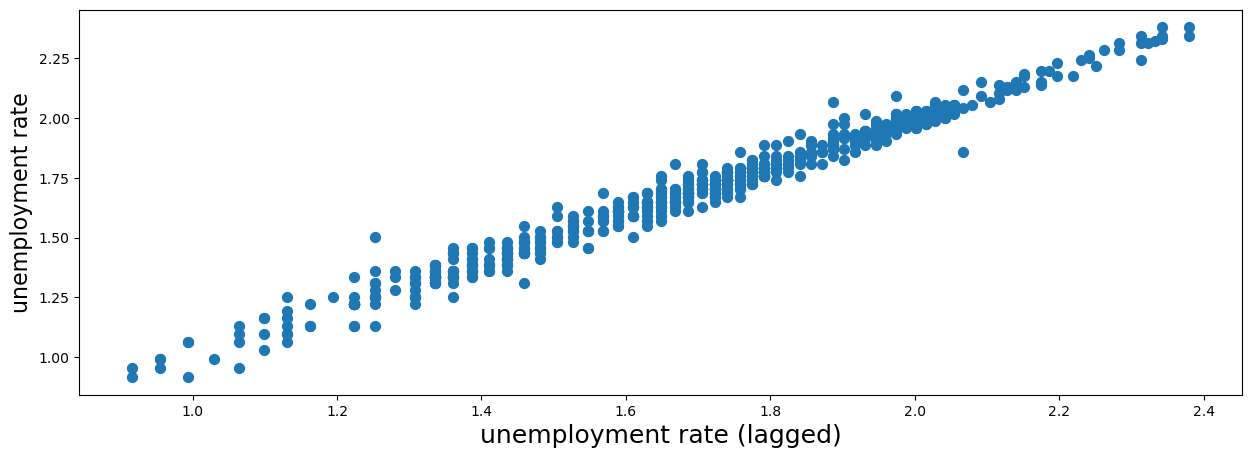

In [190]:
df_train.plot(kind= "scatter", y = "unemployment_rate_log", x = "unemp_logshift1", s = 50, fontsize=10)
#plt.figure().suptitle('Relationship between unemployment rate log and its lagged version', fontsize=20)
plt.xlabel('unemployment rate (lagged)', fontsize=18)
plt.ylabel('unemployment rate', fontsize=16)

In [117]:
df_train["first_diff"] = df_train.unemployment_rate_log.diff()
df_test["first_diff"] = df_test.unemployment_rate_log.diff()

df_train["first_diff"]

date
1948-01         NaN
1948-02    0.111226
1948-03    0.051293
1948-04   -0.025318
1948-05   -0.108214
             ...   
2003-07   -0.016000
2003-08   -0.016261
2003-09    0.000000
2003-10   -0.016529
2003-11   -0.033902
Freq: M, Name: first_diff, Length: 671, dtype: float64

In [118]:
# Lets plot the one-month difference curve
df_train["unemp_logdiff"] = df_train.unemployment_rate_log - df_train.unemp_logshift1
df_test["unemp_logdiff"] = df_test.unemployment_rate_log - df_test.unemp_logshift1

df_train["unemp_logdiff"]

date
1948-01         NaN
1948-02    0.111226
1948-03    0.051293
1948-04   -0.025318
1948-05   -0.108214
             ...   
2003-07   -0.016000
2003-08   -0.016261
2003-09    0.000000
2003-10   -0.016529
2003-11   -0.033902
Freq: M, Name: unemp_logdiff, Length: 671, dtype: float64

In [119]:
df_train["unemp_random_walk"] = np.exp(df_train.unemp_logshift1)
df_test["unemp_random_walk"] = np.exp(df_test.unemp_logshift1)

df_train.head()

,date,unemployment_rate,in_labor_force,timeIndex,unemployment_rate_log,unemp_logshift1,unemp_logdiff,first_diff,in_labor_force_log,unemp_random_walk
date,,,,,,,,,,
1948-01,1948-01-01,3.4,60095000,0,1.223775,NaN,NaN,NaN,17.911437,NaN
1948-02,1948-02-01,3.8,60524000,1,1.335001,1.223775,0.111226,0.111226,17.918551,3.4
1948-03,1948-03-01,4.0,60070000,2,1.386294,1.335001,0.051293,0.051293,17.911021,3.8
1948-04,1948-04-01,3.9,60677000,3,1.360977,1.386294,-0.025318,-0.025318,17.921075,4.0
1948-05,1948-05-01,3.5,59972000,4,1.252763,1.360977,-0.108214,-0.108214,17.909388,3.9


<AxesSubplot: xlabel='timeIndex'>

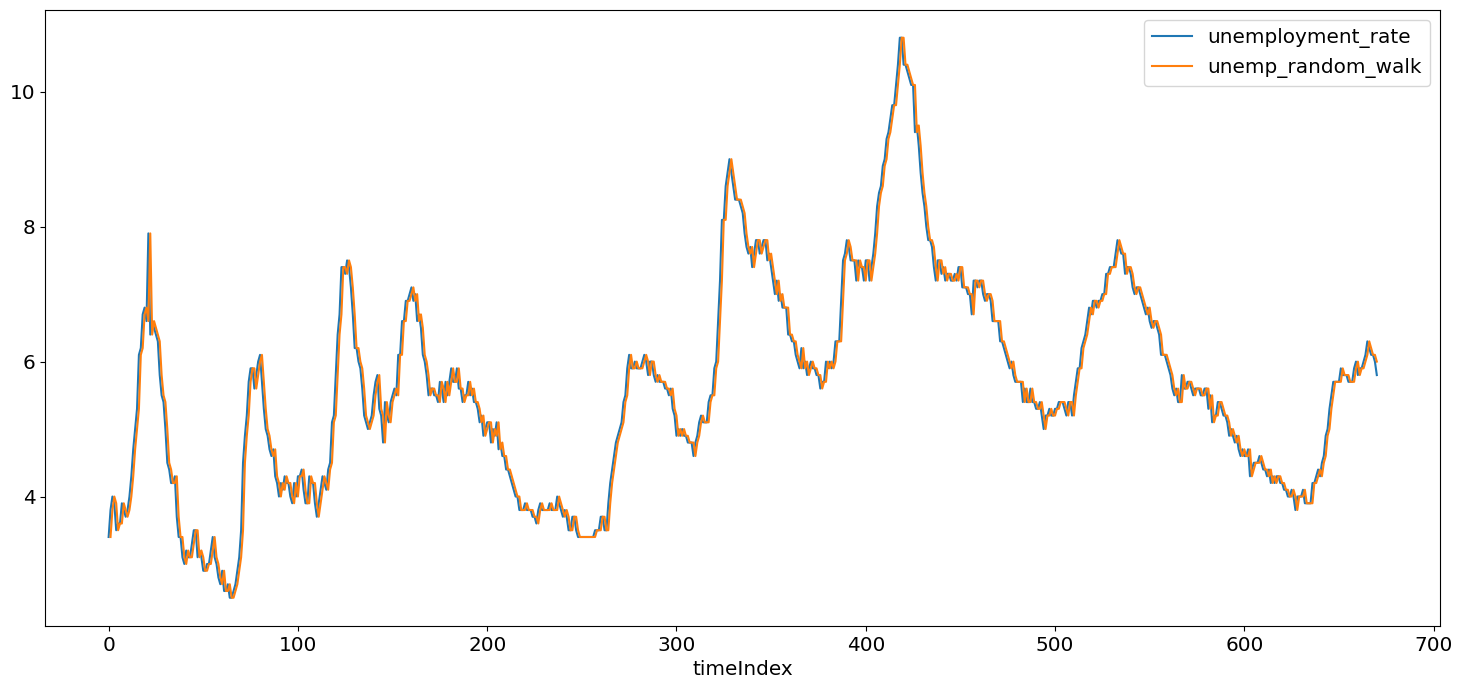

In [120]:
df_train.plot(kind="line", x="timeIndex", y = ["unemployment_rate","unemp_random_walk"])

In [121]:
df_test.unemp_logshift1

date
2015-02         NaN
2015-03    1.704748
2015-04    1.686399
2015-05    1.686399
2015-06    1.722767
             ...   
2022-03    1.335001
2022-04    1.280934
2022-05    1.280934
2022-06    1.280934
2022-07    1.280934
Freq: M, Name: unemp_logshift1, Length: 90, dtype: float64

In [122]:
# Root Mean Squared Error (RMSE)
model_random_RMSE = RMSE(df_test.unemp_logshift1, y_test)
model_random_RMSE

0.13786036256970124

In [123]:
dfResults.loc[4,"Model"] = "Random Walk"
dfResults.loc[4,"Forecast"] = np.exp(df_test.unemp_logshift1)[-10:].mean()
dfResults.loc[4,"RMSE"] = model_random_RMSE
dfResults.head(10)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,Random Walk,3.96,0.13786


<AxesSubplot: xlabel='timeIndex'>

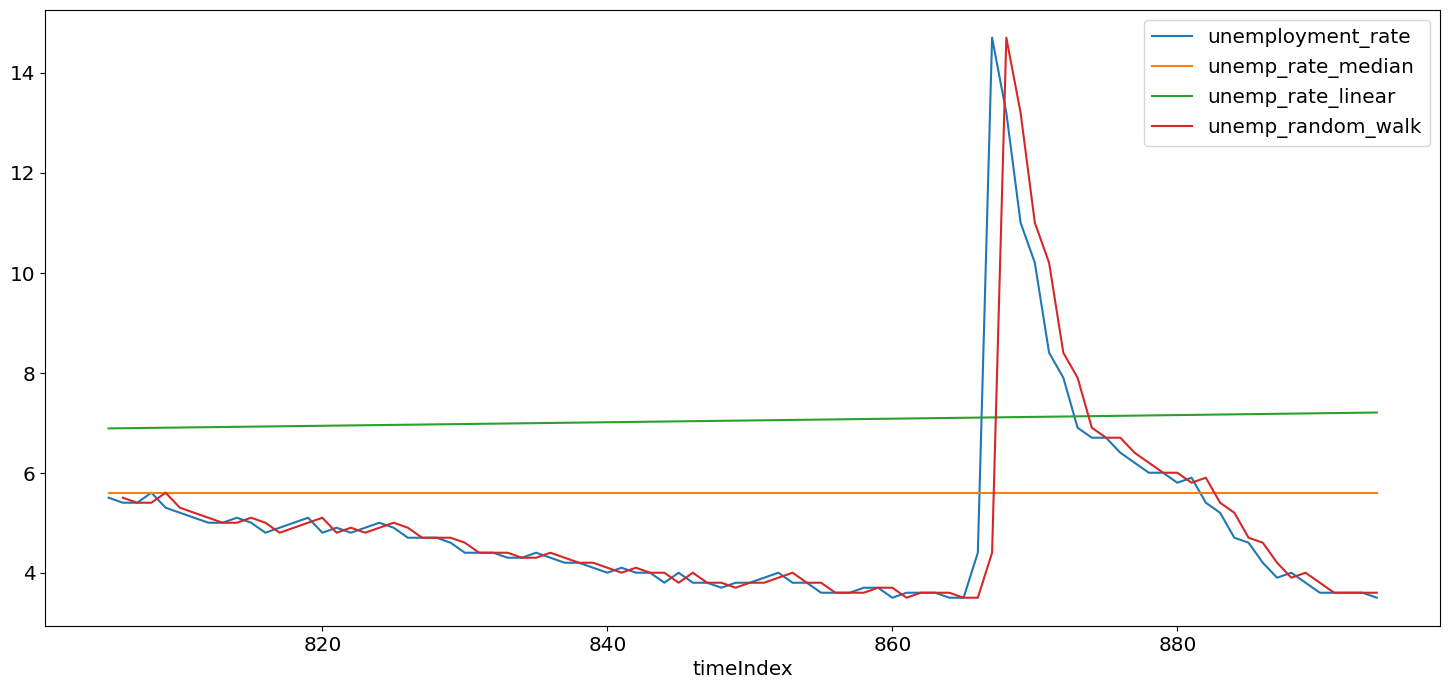

In [124]:
df_test.plot(kind="line", x="timeIndex", y = ["unemployment_rate", "unemp_rate_median","unemp_rate_linear", "unemp_random_walk"])

## Random Walk using ARIMA

In [125]:
start_index = y_test.index[0] 
end_index = y_test.index[-1]

In [126]:
# Random Walk using ARIMA model

model = sm.tsa.arima.ARIMA(y_train, order=(1, 0, 0))

model_fit = model.fit()
model_fit.summary()

predictions_rw = model_fit.predict()#start=start_index, end=end_index)
predictions_rw_test = model_fit.predict(start=start_index, end=end_index)


In [127]:
predictions_rw_test

2015-02    1.671938
2015-03    1.671699
2015-04    1.671463
2015-05    1.671230
2015-06    1.671000
             ...   
2022-03    1.659406
2022-04    1.659325
2022-05    1.659244
2022-06    1.659165
2022-07    1.659086
Freq: M, Name: predicted_mean, Length: 90, dtype: float64

In [128]:

# # report performance
# mse = mean_squared_error(y_train, predictions_rw)
# rmse = sqrt(mse)
# print('RMSE: {}'.format(rmse))


# Root Mean Squared Error (RMSE)
model_random_arima_RMSE = RMSE(predictions_rw_test, y_test)
model_random_arima_RMSE

0.30420323205916044

In [129]:
dfResults.loc[5,"Model"] = "Random Walk ARIMA(1,0,0)"
dfResults.loc[5,"Forecast"] = np.exp(predictions_rw_test[-10:]).mean()
dfResults.loc[5,"RMSE"] = model_random_arima_RMSE
dfResults.head(10)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,Random Walk,3.96,0.13786
5,"Random Walk ARIMA(1,0,0)",5.256429,0.304203


# Moving Average 

In [130]:
# For smoothing the values we can use 12 month Moving Averages 
df_train['unemp_log_MA12'] = df_train.unemployment_rate_log.rolling(12).mean()
df_test['unemp_log_MA12'] = df_test.unemployment_rate_log.rolling(12).mean()

df_train

,date,unemployment_rate,in_labor_force,timeIndex,unemployment_rate_log,unemp_logshift1,unemp_logdiff,first_diff,in_labor_force_log,unemp_random_walk,unemp_log_MA12
date,,,,,,,,,,,
1948-01,1948-01-01,3.4,60095000,0,1.223775,NaN,NaN,NaN,17.911437,NaN,NaN
1948-02,1948-02-01,3.8,60524000,1,1.335001,1.223775,0.111226,0.111226,17.918551,3.4,NaN
1948-03,1948-03-01,4.0,60070000,2,1.386294,1.335001,0.051293,0.051293,17.911021,3.8,NaN
1948-04,1948-04-01,3.9,60677000,3,1.360977,1.386294,-0.025318,-0.025318,17.921075,4.0,NaN
1948-05,1948-05-01,3.5,59972000,4,1.252763,1.360977,-0.108214,-0.108214,17.909388,3.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2003-07,2003-07-01,6.2,146485000,666,1.824549,1.840550,-0.016000,-0.016000,18.802434,6.3,1.780085
2003-08,2003-08-01,6.1,146445000,667,1.808289,1.824549,-0.016261,-0.016261,18.802160,6.2,1.785737
2003-09,2003-09-01,6.1,146530000,668,1.808289,1.808289,0.000000,0.000000,18.802741,6.1,1.791389


<AxesSubplot: xlabel='date'>

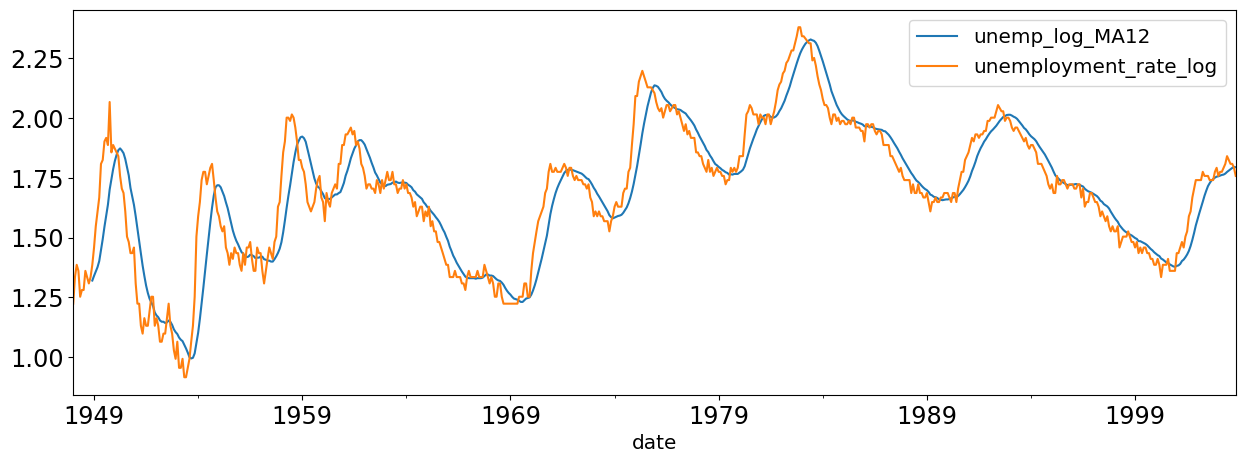

In [191]:
df_train.plot(kind ="line", y=["unemp_log_MA12", "unemployment_rate_log"])


In [82]:
# smoother line 

In [132]:
df_test["unemp_MA12"] = np.exp(df_test.unemp_log_MA12)
df_test.tail()

,date,unemployment_rate,in_labor_force,timeIndex,unemployment_rate_log,unemp_logshift1,unemp_logdiff,first_diff,in_labor_force_log,unemp_rate_median,unemp_rate_linear,lm_with_regressor,unemp_random_walk,unemp_log_MA12,unemp_MA12
date,,,,,,,,,,,,,,,
2022-03,2022-03-01,3.6,164409000,890,1.280934,1.335001,-0.054067,-0.054067,18.917868,5.6,7.189295,2.936209,3.8,1.544295,4.684666
2022-04,2022-04-01,3.6,164046000,891,1.280934,1.280934,0.000000,0.000000,18.915657,5.6,7.192937,2.901740,3.6,1.501726,4.489431
2022-05,2022-05-01,3.6,164376000,892,1.280934,1.280934,0.000000,0.000000,18.917667,5.6,7.196580,2.908202,3.6,1.461982,4.314503
2022-06,2022-06-01,3.6,164023000,893,1.280934,1.280934,0.000000,0.000000,18.915517,5.6,7.200225,2.874640,3.6,1.420814,4.140490
2022-07,2022-07-01,3.5,163960000,894,1.252763,1.280934,-0.028171,-0.028171,18.915133,5.6,7.203872,2.858199,3.6,1.384678,3.993539


In [133]:
#model_MA12_forecast = df_test.unemployment_rate_log.rolling(12).mean().tail(10).mean()
model_MA12_forecast = df_test['unemp_log_MA12'].tail(10).mean()

model_MA12_forecast

1.5657602829680266

In [134]:
# Root Mean Squared Error (RMSE)
model_MA12_RMSE = RMSE(np.log(df_test.unemp_MA12), y_test)
model_MA12_RMSE

0.23778253015024095

In [135]:
dfResults.loc[6,"Model"] = "Moving Average 12"
dfResults.loc[6,"Forecast"] = np.exp(model_MA12_forecast)
dfResults.loc[6,"RMSE"] = model_MA12_RMSE
dfResults.head(10)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,Random Walk,3.96,0.13786
5,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
6,Moving Average 12,4.786313,0.237783


<AxesSubplot: xlabel='timeIndex'>

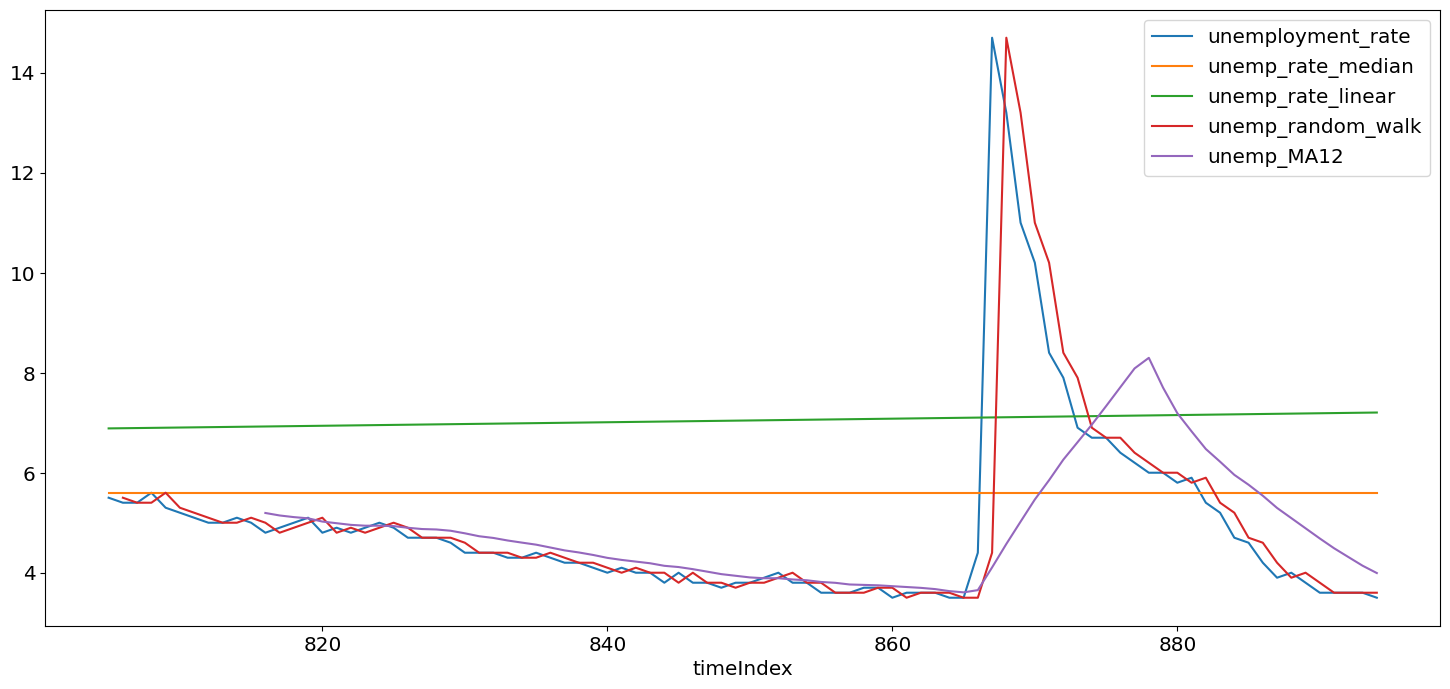

In [136]:
df_test.plot(kind="line", x="timeIndex", y = ["unemployment_rate", "unemp_rate_median", "unemp_rate_linear",
                                             "unemp_random_walk", "unemp_MA12"])

# ARIMA

In [137]:
y_train
ts_logdiff = df_train.unemp_logdiff
ts_logdiff.dropna(inplace = True)
ts_logdiff_test = df_test.unemp_logdiff
ts_logdiff_test.dropna(inplace = True)

In [138]:
ts_logdiff

date
1948-02    0.111226
1948-03    0.051293
1948-04   -0.025318
1948-05   -0.108214
1948-06    0.028171
             ...   
2003-07   -0.016000
2003-08   -0.016261
2003-09    0.000000
2003-10   -0.016529
2003-11   -0.033902
Freq: M, Name: unemp_logdiff, Length: 670, dtype: float64

In [139]:
df_train.first_diff

date
1948-01         NaN
1948-02    0.111226
1948-03    0.051293
1948-04   -0.025318
1948-05   -0.108214
             ...   
2003-07   -0.016000
2003-08   -0.016261
2003-09    0.000000
2003-10   -0.016529
2003-11   -0.033902
Freq: M, Name: first_diff, Length: 671, dtype: float64

In [140]:
#lag_acf = acf(y_train, nlags=40)
lag_acf = acf(ts_logdiff, nlags=40)

In [141]:
ACF = pd.Series(lag_acf)

<AxesSubplot: >

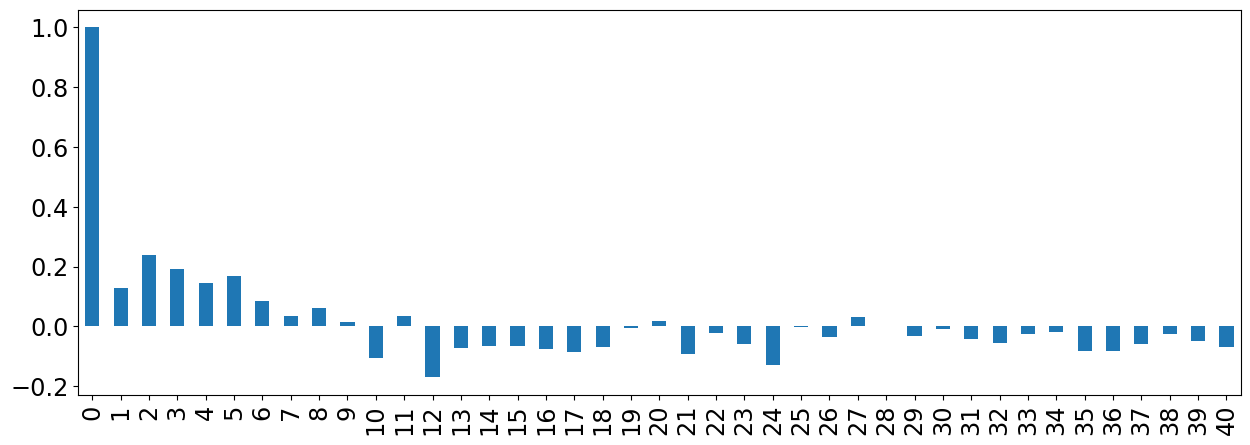

In [192]:
ACF.plot(kind = "bar")

In [143]:
lag_pacf = pacf(ts_logdiff, nlags=40, method='ols')

In [144]:
PACF = pd.Series(lag_pacf)

<AxesSubplot: >

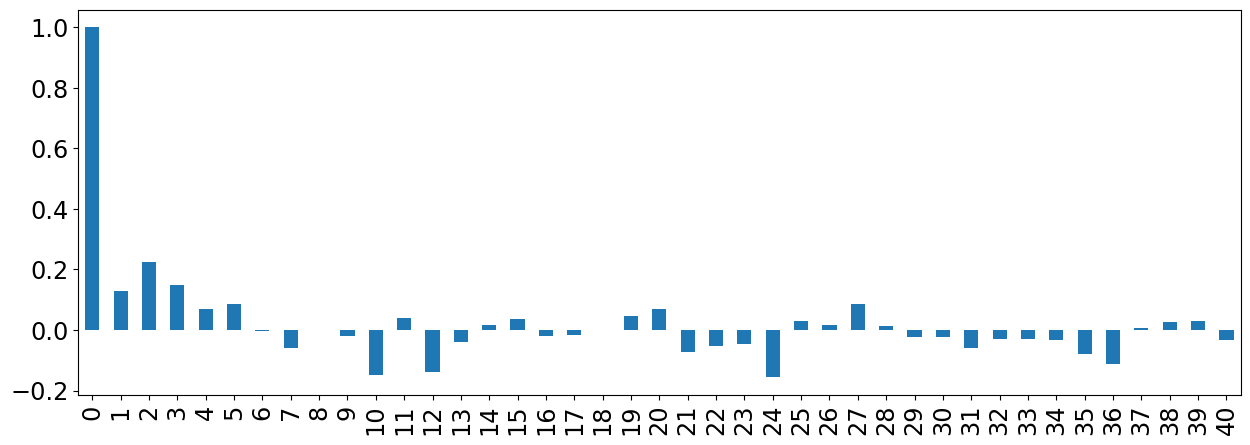

In [193]:
PACF.plot(kind = "bar")

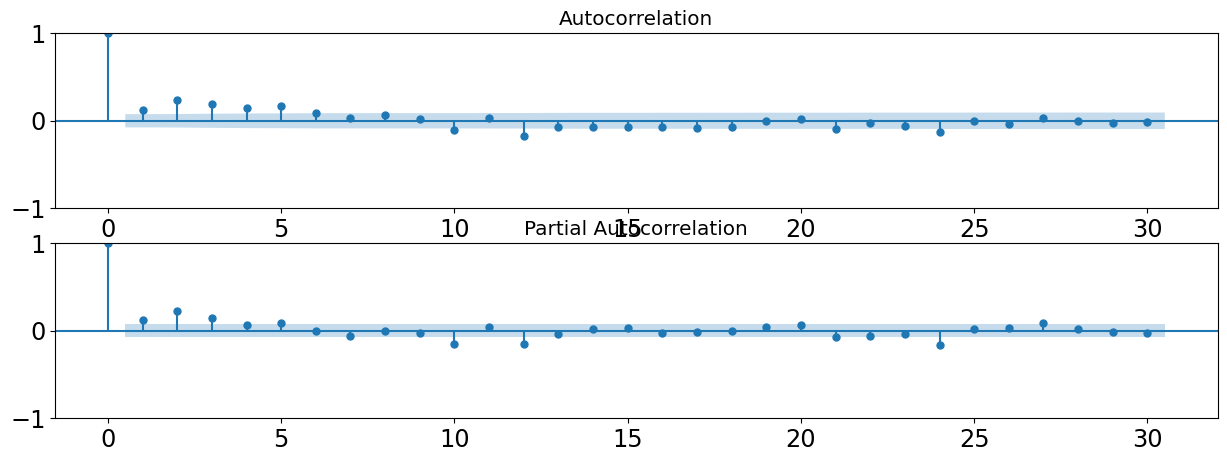

In [199]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_logdiff, ax=pyplot.gca(), lags = 30)


pyplot.subplot(212)
plot_pacf(ts_logdiff, ax=pyplot.gca(), lags = 30)
pyplot.show()

In [147]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_data_properties(data, ts_plot_name="Time Series plot"):
    '''
    Summary:
    -------
    Plots various plots, including time series, autocorrelation,
    partial autocorrelation and distribution plots of data.
    
    Parameters:
    ----------
    ts_plot_name(String): The name of the time series plot
    data(pd.Dataframe, pd.Series, array): Time Series Data
    
    Returns:
    --------
    None
    
    '''
    plt.figure(figsize=(16,4))
    plt.plot(data)
    plt.title(ts_plot_name)
    plt.ylabel('unemployment_rate')
    plt.xlabel('date')
    fig, axes = plt.subplots(1,3,squeeze=False)
    fig.set_size_inches(16,4)
    plot_acf(data, ax=axes[0,0], lags=48);
    plot_pacf(data, ax=axes[0,1], lags=48);
    sns.distplot(data, ax=axes[0,2])
    axes[0,2].set_title("Probability Distribution")

In [148]:
def AIC_PDQS(df):
    '''
    Runs grid search to return lowest AIC result for permutations of pdq/s values in range 0,2

    df - Dataframe to analyze for best pdq/s permutation
    '''

    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)

    # Auto-Regressive (p) -> Number of autoregressive terms.
    # Integrated (d) -> Number of nonseasonal differences needed for stationarity.
    # Moving Average (q) -> Number of lagged forecast errors in the prediction equation.

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    # Run a grid with pdq and seasonal pdq parameters calculated above and get #the best AIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(df,order=comb,seasonal_order=combs, enforce_stationarity=False,enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])
                print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                continue
                
    return ans



In [106]:
ans = AIC_PDQS(ts_logdiff)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.79061D+00    |proj g|=  2.47800D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      7      1     0     0   6.384D-03  -1.791D+00
  F =  -1.7906316246206637     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =-2397.4463769916892
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0  

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66978D+00    |proj g|=  2.50796D+00

At iterate    5    f= -1.67871D+00    |proj g|=  2.88667D+00

At iterate   10    f= -1.72674D+00    |proj g|=  2.07963D-01

At iterate   15    f= -1.72676D+00    |proj g|=  4.22453D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     32      1     0     0   4.225D-04  -1.727D+00
  F =  -1.7267559587818826     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f= -1.81224D+00    |proj g|=  1.79200D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     41      1     0     0   8.463D-03  -1.812D+00
  F =  -1.8122670446217104     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =-2422.437839793092
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.49887D+00    |proj g|=  3.69200D-03

           * * *

Tit   = total number of iterations
Tnf   =

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f= -1.66107D+00    |proj g|=  4.68387D+00

At iterate   10    f= -1.70049D+00    |proj g|=  1.78811D-01

At iterate   15    f= -1.70552D+00    |proj g|=  1.68149D+00

At iterate   20    f= -1.70739D+00    |proj g|=  7.25087D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.066D-04  -1.707D+00
  F =  -1.7073938839238159     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =-2281.9078044579132
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =-2398.168029043321
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.33859D+00    |proj g|=  2.78085D-01

At iterate    5    f= -1.33881D+00    |proj g|=  2.71355D-01

At iterate   10    f= -1.33946D+00    |proj g|=  1.28538D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     14      1     0     0   1.346D-05  -1.339D+00
  F =  -1.3394594061371248     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate    5    f= -1.68171D+00    |proj g|=  2.02875D+00

At iterate   10    f= -1.73290D+00    |proj g|=  8.17653D-01

At iterate   15    f= -1.73315D+00    |proj g|=  1.14285D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     22      1     0     0   6.865D-04  -1.733D+00
  F =  -1.7331533187992170     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =-2316.4254471909508
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.78801D+00    |proj g|=  1.28831D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   3.584D-04  -1.788D+00
  F =  -1.7880115686858051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =-2389.935502038979
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.79140D+00    |proj g|=  1.49972D+00

At iterate    5    f= -1.79267D+00    |proj g|=  6.15903D-01

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.50687D+00    |proj g|=  8.80095D-01

At iterate   15    f= -1.50750D+00    |proj g|=  1.36465D-03

At iterate   20    f= -1.50750D+00    |proj g|=  9.07634D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     26      1     0     0   9.076D-05  -1.508D+00
  F =  -1.5075005031714355     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =-2014.0506742497234
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =-2019.4571233675458
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.06130D+00    |proj g|=  2.55731D-01

At iterate    5    f= -1.06141D+00    |proj g|=  2.68479D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5     18      1     0     0   2.685D-03  -1.061D+00
  F =  -1.0614081067051437     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =-1420.28


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =-1962.2317831136043
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50643D+00    |proj g|=  3.68825D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     11      1     0     0   3.689D-03  -1.506D+00
  F =  -1.5064325107513512     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =-2014.6195644068105
RUNNING THE L-BFGS-B CODE

           * * *

Machi

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.34691D+00    |proj g|=  1.43997D+00

At iterate   10    f= -1.41679D+00    |proj g|=  2.55368D+00

At iterate   15    f= -1.42532D+00    |proj g|=  6.53589D-01

At iterate   20    f= -1.43486D+00    |proj g|=  1.19513D-02

At iterate   25    f= -1.43490D+00    |proj g|=  1.08540D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     36      1     0     0   1.085D-03  -1.435D+00
  F =  -1.4348953992804914     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =-1916.7598350358585
RUNNING THE L-BFGS-B CODE

           * *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =-2409.7374886708803
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.33113D+00    |proj g|=  3.97850D-01

At iterate    5    f= -1.33367D+00    |proj g|=  7.79242D-01

At iterate   10    f= -1.33445D+00    |proj g|=  9.46942D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     31      1     0     0   9.469D-04  -1.334D+00
  F =  -1.3344527472267278     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH            


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.73881D+00    |proj g|=  2.18162D-01

At iterate   10    f= -1.73891D+00    |proj g|=  5.71968D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     27      1     0     0   2.455D-03  -1.739D+00
  F =  -1.7389133203360936     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =-2324.1438492503653
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.79570D+00    |proj g|=  2.31697D+0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -1.79845D+00    |proj g|=  6.15888D-02

At iterate   20    f= -1.79847D+00    |proj g|=  1.64997D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   2.624D-06  -1.798D+00
  F =  -1.7984652394343785     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =-2403.943420842067
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.79472D+00    |proj g|=  2.52241D+00

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.62313D+00    |proj g|=  3.84039D+00

At iterate   10    f= -1.71305D+00    |proj g|=  1.69729D+00

At iterate   15    f= -1.71757D+00    |proj g|=  3.51995D-02

At iterate   20    f= -1.71843D+00    |proj g|=  8.89284D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     30      1     0     0   1.009D-04  -1.718D+00
  F =  -1.7184351180885418     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =-2294.703058238646
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =    

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.79799D+00    |proj g|=  1.02758D+00

At iterate   15    f= -1.79845D+00    |proj g|=  4.77014D-03

At iterate   20    f= -1.79846D+00    |proj g|=  7.70998D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     32      1     0     0   7.124D-05  -1.798D+00
  F =  -1.7984623883298476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =-2403.939600361996
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

 This problem is unconstrained.



At iterate    5    f= -1.68839D+00    |proj g|=  1.59891D+00

At iterate   10    f= -1.73772D+00    |proj g|=  1.03763D+00

At iterate   15    f= -1.73837D+00    |proj g|=  4.79244D-02

At iterate   20    f= -1.73838D+00    |proj g|=  5.26141D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   5.261D-03  -1.738D+00
  F =  -1.7383823406417818     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =-2323.4323364599877
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -1.80774D+00    |proj g|=  4.70015D+00

At iterate   20    f= -1.81457D+00    |proj g|=  1.03693D-01

At iterate   25    f= -1.81866D+00    |proj g|=  1.19373D+00

At iterate   30    f= -1.82001D+00    |proj g|=  3.89455D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     39      1     0     0   3.895D-04  -1.820D+00
  F =  -1.8200105898959293     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =-2430.8141904605454
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.51172D+00    |proj g|=  3.43065D-02

At iterate   10    f= -1.51197D+00    |proj g|=  4.38576D-01

At iterate   15    f= -1.51232D+00    |proj g|=  2.62276D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     22      1     0     0   7.390D-05  -1.512D+00
  F =  -1.5123188238886853     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =-2020.5072240108384
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.79313D+00    |proj g|=  2.19012D+00

At iterate   10    f= -1.80369D+00    |proj g|=  1.68396D+00

At iterate   15    f= -1.82735D+00    |proj g|=  4.38028D-01

At iterate   20    f= -1.82855D+00    |proj g|=  6.02030D-02

At iterate   25    f= -1.82866D+00    |proj g|=  7.12370D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     42      1     0     0   3.410D-04  -1.829D+00
  F =  -1.8286612334323959     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =-2442.4060527994106
RUNNING THE L-BFGS-B CODE

           * *


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.35546D+00    |proj g|=  1.17524D+00

At iterate   10    f= -1.36521D+00    |proj g|=  7.44889D-01

At iterate   15    f= -1.37221D+00    |proj g|=  2.70607D-02

At iterate   20    f= -1.37222D+00    |proj g|=  6.87601D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     28      1     0     0   3.182D-04  -1.372D+00
  F =  -1.3722202915241037     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =-1832.775190642299
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =    

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78401D+00    |proj g|=  7.28869D-01

At iterate    5    f= -1.79432D+00    |proj g|=  2.18865D+00

At iterate   10    f= -1.80450D+00    |proj g|=  1.66247D+00

At iterate   15    f= -1.82858D+00    |proj g|=  3.24347D-02

At iterate   20    f= -1.83023D+00    |proj g|=  5.13163D-01

At iterate   25    f= -1.84727D+00    |proj g|=  3.54327D-01

At iterate   30    f= -1.84776D+00    |proj g|=  1.40956D-02

At iterate   35    f= -1.84776D+00    |proj g|=  2.07170D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     26      1     0     0   1.509D-03  -1.547D+00
  F =  -1.5471693689245696     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =-2065.206954358923
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57729D+00    |proj g|=  7.59835D+00


 This problem is unconstrained.



At iterate    5    f= -1.70075D+00    |proj g|=  2.55503D-01

At iterate   10    f= -1.74962D+00    |proj g|=  2.60694D-02

At iterate   15    f= -1.74996D+00    |proj g|=  2.88272D-02

At iterate   20    f= -1.75002D+00    |proj g|=  3.62184D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     31      1     0     0   1.245D-03  -1.750D+00
  F =  -1.7500234498416860     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =-2335.0314227878594
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.




           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1     0     0   7.281D-06  -1.693D+00
  F =  -1.6928399278856860     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =-2262.405503366819
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.27254D+00    |proj g|=  3.42773D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of 

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f= -1.64561D+00    |proj g|=  6.05908D-01

At iterate   15    f= -1.64582D+00    |proj g|=  1.24784D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     26      1     0     0   3.626D-04  -1.646D+00
  F =  -1.6458361313893590     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =-2199.420416061741
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.69040D+00    |proj g|=  9.64597D-01

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.68800D+00    |proj g|=  8.65403D-01

At iterate    5    f= -1.68926D+00    |proj g|=  9.37775D-01

At iterate   10    f= -1.69216D+00    |proj g|=  7.77754D-03

At iterate   15    f= -1.69241D+00    |proj g|=  6.45067D-02

At iterate   20    f= -1.70981D+00    |proj g|=  2.12527D+00

At iterate   25    f= -1.71373D+00    |proj g|=  1.00035D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     73      2     0     0   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.42647D+00    |proj g|=  4.64119D-02

At iterate   10    f= -1.42756D+00    |proj g|=  5.65554D-01




 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


At iterate   15    f= -1.42785D+00    |proj g|=  7.59373D-04
  ys=-1.135E-10  -gs= 1.474E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     94      4     1     0   2.243D-03  -1.428D+00
  F =  -1.4278464083542997     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =-1907.3141871947614
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.45220D+00    |proj g|=  6.23575D+00


 This problem is unconstrained.



At iterate    5    f= -1.51575D+00    |proj g|=  5.47222D-01

At iterate   10    f= -1.57175D+00    |proj g|=  1.14573D+01

At iterate   15    f= -1.60974D+00    |proj g|=  1.61302D-01

At iterate   20    f= -1.61881D+00    |proj g|=  8.12757D-01

At iterate   25    f= -1.61962D+00    |proj g|=  3.89874D-02

At iterate   30    f= -1.61979D+00    |proj g|=  5.11915D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     39      1     0     0   4.850D-04  -1.620D+00
  F =  -1.6197882443680294     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.79929D+00    |proj g|=  9.26843D-01

At iterate   10    f= -1.80498D+00    |proj g|=  7.34794D-02

At iterate   15    f= -1.80517D+00    |proj g|=  4.92882D-01

At iterate   20    f= -1.80726D+00    |proj g|=  5.56589D-01

At iterate   25    f= -1.80744D+00    |proj g|=  9.59611D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     37      1     0     0   2.738D-03  -1.807D+00
  F =  -1.8074421854969513     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =-2413.9725285659147
RUNNING THE L-BFGS-B CODE

           * *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.34794D+00    |proj g|=  1.91624D-01

At iterate   15    f= -1.34814D+00    |proj g|=  1.70389D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     22      1     0     0   9.776D-05  -1.348D+00
  F =  -1.3481449847837186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =-1800.514279610183
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57664D+00    |proj g|=  8.60903D+00

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.80073D+00    |proj g|=  1.63276D+00

At iterate   10    f= -1.80276D+00    |proj g|=  8.55959D-01

At iterate   15    f= -1.80414D+00    |proj g|=  4.85176D-02

At iterate   20    f= -1.80477D+00    |proj g|=  3.46973D-01

At iterate   25    f= -1.80566D+00    |proj g|=  6.22122D-02

At iterate   30    f= -1.80742D+00    |proj g|=  7.19552D-01

At iterate   35    f= -1.82678D+00    |proj g|=  2.49814D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f= -1.82687D+00    |proj g|=  2.68632D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     63      1     0     0   2.686D-05  -1.827D+00
  F =  -1.8268746098357602     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =-2438.0119771799186
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47670D+00    |proj g|=  5.08044D+00

At iterate    5    f= -1.50912D+00    |proj g|=  8.75515D-0


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   20    f= -1.51873D+00    |proj g|=  3.58950D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     47      2     0     0   3.589D-05  -1.519D+00
  F =  -1.5187270049950512     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =-2027.0941866933686
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.53267D+00    |proj g|=  7.04998D+00

At iterate    5    f= -1.63015D+00    |proj g|=  7.21311D+0

In [108]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
print(ans_df.loc[ans_df['aic'].idxmin()])

pdq         (1, 0, 1)
pdqs    (1, 0, 1, 12)
aic      -2465.998739
Name: 45, dtype: object


In [107]:
import statsmodels.api as sm

model = sm.tsa.ARIMA(ts_logdiff, order=(1, 0, 1))

results_ARIMA = model.fit()

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(y_train.iloc[0], index=y_train.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)


In [109]:
results_ARIMA_test = results_ARIMA.predict(start=start_index, end=end_index)
predictions_ARIMA_diff_test = pd.Series(results_ARIMA_test, copy=True)
predictions_ARIMA_diff_cumsum_test = predictions_ARIMA_diff_test.cumsum()
predictions_ARIMA_log_test = pd.Series(y_test.iloc[0], index=ts_logdiff_test.index)
predictions_ARIMA_log_test = predictions_ARIMA_log_test.add(predictions_ARIMA_diff_cumsum_test,fill_value=0)


In [110]:

df_train['unemp_ARIMA'] = np.exp(predictions_ARIMA_log)
df_train['unemp_ARIMA'] 


date
1948-01    3.400000
1948-02    3.403018
1948-03    3.483585
1948-04    3.571082
1948-05    3.617374
             ...   
2003-07    6.217957
2003-08    6.241363
2003-09    6.242990
2003-10    6.244979
2003-11    6.231509
Freq: M, Name: unemp_ARIMA, Length: 671, dtype: float64

In [111]:

model_ARIMA_RMSE = RMSE(predictions_ARIMA_log_test, y_test)


dfResults.loc[7,"Model"] = "ARMA / ARIMA (1,0,1)"
dfResults.loc[7,"Forecast"] = np.exp(predictions_ARIMA_log_test).tail(10).mean()
dfResults.loc[7,"RMSE"] = model_ARIMA_RMSE


dfResults.head(10)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,Random Walk,3.96,0.13786
5,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
6,Moving Average 12,4.786313,0.237783
7,"ARMA / ARIMA (1,0,1)",5.933524,0.386637


In [112]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:          unemp_logdiff   No. Observations:                  670
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1224.169
Date:                Thu, 13 Oct 2022   AIC                          -2440.339
Time:                        19:19:31   BIC                          -2422.310
Sample:                    02-29-1948   HQIC                         -2433.355
                         - 11-30-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.003      0.290      0.772      -0.005       0.007
ar.L1          0.8442      0.044     19.147      0.000       0.758       0.931
ma.L1         -0.6918      0.059    -11.778      0.0

# ARMA

In [91]:
'''
# model = sm.tsa.ARIMA(ts_logdiff, order = (1, 0, 1))
model = sm.tsa.ARIMA(y_train, order = (1, 0, 1))
#model = sm.tsa.ARIMA(df.unemp_logdiff, order = (1, 0, 1))
#
model_fit2 = model.fit()

predictions_ARMA_diff = pd.Series(model_fit2.fittedvalues, copy=True)

predictions_ARMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARMA_log = pd.Series(y_train.iloc[0], index=y_train.index)
predictions_ARMA_log = predictions_ARMA_log.add(predictions_ARMA_diff_cumsum,fill_value=0)

df['unemp_ARMA'] = np.exp(predictions_ARMA_log)
#model_ARMA_RMSE = RMSE(model_fit2, y_train)
model_ARMA_RMSE = RMSE(model_fit2.fittedvalues, y_train)


dfResults.loc[8,"Model"] = "A R M A (1,1)"
#dfResults.loc[8,"Forecast"] = df['unemp_ARMA'][-1]#.tail(12).mean()
dfResults.loc[8,"Forecast"] = np.exp(model_fit2.forecast().values[0])


dfResults.loc[8,"RMSE"] = model_ARMA_RMSE

dfResults.head(15)

'''

'\n# model = sm.tsa.ARIMA(ts_logdiff, order = (1, 0, 1))\nmodel = sm.tsa.ARIMA(y_train, order = (1, 0, 1))\n#model = sm.tsa.ARIMA(df.unemp_logdiff, order = (1, 0, 1))\n#\nmodel_fit2 = model.fit()\n\npredictions_ARMA_diff = pd.Series(model_fit2.fittedvalues, copy=True)\n\npredictions_ARMA_diff_cumsum = predictions_ARIMA_diff.cumsum()\n\npredictions_ARMA_log = pd.Series(y_train.iloc[0], index=y_train.index)\npredictions_ARMA_log = predictions_ARMA_log.add(predictions_ARMA_diff_cumsum,fill_value=0)\n\ndf[\'unemp_ARMA\'] = np.exp(predictions_ARMA_log)\n#model_ARMA_RMSE = RMSE(model_fit2, y_train)\nmodel_ARMA_RMSE = RMSE(model_fit2.fittedvalues, y_train)\n\n\ndfResults.loc[8,"Model"] = "A R M A (1,1)"\n#dfResults.loc[8,"Forecast"] = df[\'unemp_ARMA\'][-1]#.tail(12).mean()\ndfResults.loc[8,"Forecast"] = np.exp(model_fit2.forecast().values[0])\n\n\ndfResults.loc[8,"RMSE"] = model_ARMA_RMSE\n\ndfResults.head(15)\n\n'

In [92]:
dfResults.sort_values(by=['RMSE'])

,Model,Forecast,RMSE
4,Random Walk,3.96,0.13786
6,Moving Average 12,4.786313,0.237783
5,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
0,Median,5.6,0.330045
7,"ARMA / ARIMA (1,0,1)",5.933524,0.386637
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481


# SARIMA

In [96]:
y = df_train.set_index('date')
y = y.drop(['in_labor_force', 'month', 'year', 'unemp_ARIMA', 'timeIndex', 'unemployment_rate', 'unemp_logshift1', 'unemp_logdiff', 'first_diff', 'in_labor_force_log', 'unemp_random_walk', 'unemp_log_MA12' ],  axis=1)
y

,unemployment_rate_log
date,
1948-01-01,1.223775
1948-02-01,1.335001
1948-03-01,1.386294
1948-04-01,1.360977
1948-05-01,1.252763
...,...
2003-07-01,1.824549
2003-08-01,1.808289
2003-09-01,1.808289


In [95]:
# #divide into train and validation set
# train = y[:int(0.75*(len(y)))]
# valid = y[int(0.75*(len(y))):]

# import copy
# train_new = copy.deepcopy(train)#.index
# #train_new.index = range(len(train.index))
# train_new.index = pd.DatetimeIndex(train.index).to_period('M')
# train_new

In [97]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='M'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in (pdqs):
            #try:
            mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            freq=freq)

            output = mod.fit(maxiter=maxiter) 
            ans.append([comb, combs, output.bic])
            print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
            #except:
            #    continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
sarimax_gridsearch(y_train, pdq, pdqs, freq='M')

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95542D+00    |proj g|=  4.22937D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   1.270D-07   1.955D+00
  F =   1.9554191250561122     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =2630.6797435376875
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.28374D-01    |proj g|=  5.11973D-01

At iterate   10    f= -1.39711D-01    |proj g|=  3.00659D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     13      1     0     0   3.007D-07  -1.397D-01
  F = -0.13971072058217809     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =-174.55018801371781
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.55326D-01    |proj g|=  1.31051D

 This problem is unconstrained.



At iterate    5    f= -1.26119D-01    |proj g|=  2.25865D-01

At iterate   10    f= -1.64003D-01    |proj g|=  4.71351D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     23      1     0     0   1.227D-05  -1.640D-01
  F = -0.16400429754214274     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =-200.73762043824388
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82514D-01    |proj g|=  1.15425D

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -9.90192D-02    |proj g|=  2.27845D-01

At iterate   10    f= -1.06817D-01    |proj g|=  8.82388D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     18      1     0     0   5.371D-06  -1.068D-01
  F = -0.10681748032492695     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =-130.4449606871775
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06093D-01    |proj g|=  6.89993D-

 This problem is unconstrained.



At iterate    5    f= -1.49003D-01    |proj g|=  2.68346D-01

At iterate   10    f= -1.53675D-01    |proj g|=  2.19147D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   2.239D-05  -1.537D-01
  F = -0.15367486390710847     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =-186.93284708512203
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.10185D-02    |proj g|=  2.96174D

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -4.46947D-02    |proj g|=  1.77476D+00

At iterate   10    f= -1.42928D-01    |proj g|=  2.13447D-01

At iterate   15    f= -1.46125D-01    |proj g|=  1.00271D-02

At iterate   20    f= -1.46251D-01    |proj g|=  1.33152D-01

At iterate   25    f= -1.47786D-01    |proj g|=  7.69427D-02

At iterate   30    f= -1.47955D-01    |proj g|=  1.28894D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     60      2     0     0   1.074D-04  -1.480D-01
  F = -0.14795468812594093     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =-172.6719934498823
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.32566D-01    |proj g|=  2.16855D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   2.168D-04  -1.326D-01
  F = -0.13256602273129170     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =-164.95890991639166
RUNNING THE L-BFGS-B CODE

           * * *

Ma

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f= -1.35507D-01    |proj g|=  5.66560D-02

At iterate   15    f= -1.36167D-01    |proj g|=  1.25120D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   4.939D-07  -1.362D-01
  F = -0.13616659087135075     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =-163.32316643800488
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.77279D-01    |proj g|=  1.34434D+

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =180.15515642453022
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28946D-01    |proj g|=  3.48615D-01


 This problem is unconstrained.



At iterate    5    f= -6.73741D-02    |proj g|=  3.36975D-01

At iterate   10    f= -9.29250D-02    |proj g|=  3.87153D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     23      1     0     0   9.226D-06  -9.293D-02
  F =  -9.2925269087591647E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =-105.3495642522363
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67556D-01    |proj g|=  2.08432D+

 This problem is unconstrained.



At iterate    5    f= -1.32043D-01    |proj g|=  1.07869D-01

At iterate   10    f= -1.34080D-01    |proj g|=  1.19212D-02

At iterate   15    f= -1.34527D-01    |proj g|=  2.59496D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     23      1     0     0   4.788D-05  -1.345D-01
  F = -0.13452684742979476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =-154.80326887982784
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.16726D-01    |proj g|=  2.07076D-01

At iterate   10    f= -1.34333D-01    |proj g|=  5.55271D-03

At iterate   15    f= -1.34655D-01    |proj g|=  7.18703D-02

At iterate   20    f= -1.34827D-01    |proj g|=  2.26057D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     35      1     0     0   8.486D-05  -1.348D-01
  F = -0.13482746059770020     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (2, 0, 1, 12)12 : BIC Calculated =-155.04906694411005


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17636D-01    |proj g|=  2.43265D+00

At iterate    5    f= -8.65026D-02    |proj g|=  1.23846D+00

At iterate   10    f= -1.41470D-01    |proj g|=  2.07557D-02

At iterate   15    f= -1.48296D-01    |proj g|=  2.75296D-01

At iterate   20    f= -1.48719D-01    |proj g|=  1.14034D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     35      1     0     0   3.674D-04  -1.487D-01
  F = -0.14872002271933141     

CONVERG

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     10      1     0     0   2.232D-04  -1.644D-01
  F = -0.16440149317317237     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =-201.26592884171927
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21774D-02    |proj g|=  2.13660D+00


 This problem is unconstrained.



At iterate    5    f= -1.49217D-01    |proj g|=  9.48569D-02

At iterate   10    f= -1.72665D-01    |proj g|=  3.91985D-01

At iterate   15    f= -1.86342D-01    |proj g|=  5.60547D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     25      1     0     0   5.970D-06  -1.863D-01
  F = -0.18634519161466645     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (2, 1, 1, 12)12 : BIC Calculated =-224.2607471513116
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -1.27429D-01    |proj g|=  1.96530D-01

At iterate   10    f= -1.55102D-01    |proj g|=  5.84162D-02

At iterate   15    f= -1.60555D-01    |proj g|=  4.85224D-01

At iterate   20    f= -2.14021D-01    |proj g|=  5.23794D-02

At iterate   25    f= -2.15616D-01    |proj g|=  7.06083D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     39      1     0     0   7.570D-06  -2.156D-01
  F = -0.21561803131979010     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (2, 1, 2, 12)12 : BIC Calculated =-257.0991532589722
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.


SARIMAX (0, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =69.1114750911984
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.03724D-02    |proj g|=  2.46895D-01


 This problem is unconstrained.



At iterate    5    f=  4.09435D-02    |proj g|=  2.16436D-01

At iterate   10    f= -1.07403D-01    |proj g|=  1.08572D-01

At iterate   15    f= -1.17212D-01    |proj g|=  8.61165D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     28      1     0     0   5.239D-06  -1.172D-01
  F = -0.11721222493949937     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 0) x (2, 2, 1, 12)12 : BIC Calculated =-131.56061979365836
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate    5    f= -3.10841D-02    |proj g|=  1.73467D-01

At iterate   10    f= -1.14576D-01    |proj g|=  1.86767D-01

At iterate   15    f= -1.33076D-01    |proj g|=  1.67526D-01

At iterate   20    f= -1.37366D-01    |proj g|=  3.39691D-03

At iterate   25    f= -1.37367D-01    |proj g|=  4.13474D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     45      1     0     0   4.135D-05  -1.374D-01
  F = -0.13736699450551304     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =-152.18180616270263
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.85722D-01    |proj g|=  4.80656D-02

At iterate   15    f=  6.85681D-01    |proj g|=  1.39924D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     63      2     0     0   1.399D-05   6.857D-01
  F =  0.68568086609235956     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =939.6467743514004



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78774D+00    |proj g|=  8.19205D-01

At iterate    5    f=  9.57679D-01    |proj g|=  1.32859D+00

At iterate   10    f=  3.39632D-01    |proj g|=  5.50327D-01

At iterate   15    f=  2.67251D-01    |proj g|=  1.92767D-01

At iterate   20    f=  2.51581D-01    |proj g|=  2.10250D-01

At iterate   25    f=  2.50587D-01    |proj g|=  1.04916D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     44      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -6.67905D-01    |proj g|=  2.71157D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     24      1     0     0   1.031D-04  -6.679D-01
  F = -0.66791037854443980     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =-876.9279770562508
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.45860D-01    |proj g|=  1.58105D+00


 This problem is unconstrained.



At iterate    5    f= -6.52847D-01    |proj g|=  3.19900D-01

At iterate   10    f= -6.84355D-01    |proj g|=  7.53182D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     20      1     0     0   4.003D-04  -6.844D-01
  F = -0.68435869753152168     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =-892.6074903987253
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.17514D-02    |proj g|=  1.94706D+

 This problem is unconstrained.


SARIMAX (0, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =-267.97008763950026
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.97294D-02    |proj g|=  2.35681D+00


 This problem is unconstrained.



At iterate    5    f= -5.15651D-01    |proj g|=  1.65499D+00

At iterate   10    f= -6.14280D-01    |proj g|=  6.89997D-02

At iterate   15    f= -6.15194D-01    |proj g|=  9.27949D-02

At iterate   20    f= -6.15249D-01    |proj g|=  1.03008D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     32      1     0     0   1.030D-04  -6.152D-01
  F = -0.61524889974476804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =-806.3126121910462
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =  

 This problem is unconstrained.



At iterate    5    f= -5.66117D-01    |proj g|=  2.87983D+00

At iterate   10    f= -6.45817D-01    |proj g|=  9.41323D-03

At iterate   15    f= -6.45846D-01    |proj g|=  2.39908D-03

At iterate   20    f= -6.45846D-01    |proj g|=  2.58645D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     29      1     0     0   2.586D-04  -6.458D-01
  F = -0.64584565498654922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =-840.9995446642151
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -6.22732D-01    |proj g|=  1.51326D-01

At iterate   15    f= -6.41154D-01    |proj g|=  5.98897D-02

At iterate   20    f= -6.42852D-01    |proj g|=  4.21996D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     46      1     0     0   4.220D-05  -6.429D-01
  F = -0.64285205404329904     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =-836.7567204521689
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -4.74252D-01    |proj g|=  2.22921D+00

At iterate   10    f= -6.40810D-01    |proj g|=  1.41823D-01

At iterate   15    f= -6.63376D-01    |proj g|=  2.15923D-01

At iterate   20    f= -6.69872D-01    |proj g|=  1.72293D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     39      1     0     0   3.420D-04  -6.699D-01
  F = -0.66987308258064893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =-866.623425239252
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -6.47138D-01    |proj g|=  1.32658D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     26      1     0     0   1.327D-04  -6.471D-01
  F = -0.64713822471597771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =-849.0424586853394
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.63583D-01    |proj g|=  2.73610D+00

At iterate    5    f= -6.44394D-01    |proj g|=  1.23414D-

 This problem is unconstrained.



At iterate    5    f= -6.38842D-01    |proj g|=  6.84400D-01

At iterate   10    f= -6.63151D-01    |proj g|=  9.51202D-02

At iterate   15    f= -6.77362D-01    |proj g|=  2.81065D-01

At iterate   20    f= -7.03785D-01    |proj g|=  9.96282D-02

At iterate   25    f= -7.04138D-01    |proj g|=  7.53135D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     55      2     0     0   3.430D-04  -7.041D-01
  F = -0.70413873012433081     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =-912.7018237161311
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.37954D-02    |proj g|=  2.26481D+00


 This problem is unconstrained.



At iterate    5    f= -3.66801D-01    |proj g|=  4.94554D-02

At iterate   10    f= -3.67713D-01    |proj g|=  1.74582D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   1.167D-04  -3.677D-01
  F = -0.36771294793774689     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =-474.1099011357782
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.53582D-02    |proj g|=  2.26449D+

 This problem is unconstrained.



At iterate    5    f= -3.80875D-01    |proj g|=  2.11651D-01

At iterate   10    f= -5.82125D-01    |proj g|=  1.38063D+00

At iterate   15    f= -6.03153D-01    |proj g|=  7.21609D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     29      1     0     0   1.913D-05  -6.041D-01
  F = -0.60409823384186678     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =-784.8979481272086
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -5.79971D-01    |proj g|=  1.67664D+00

At iterate   10    f= -6.19863D-01    |proj g|=  2.20176D-02

At iterate   15    f= -6.20070D-01    |proj g|=  2.57176D-02

At iterate   20    f= -6.20363D-01    |proj g|=  1.66346D-01

At iterate   25    f= -6.20482D-01    |proj g|=  8.03144D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     40      1     0     0   3.330D-04  -6.205D-01
  F = -0.62048200357926897     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =-800.5301933937117
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.



At iterate   10    f= -6.44565D-01    |proj g|=  4.45577D-01

At iterate   15    f= -6.46425D-01    |proj g|=  1.72472D-01

At iterate   20    f= -6.48429D-01    |proj g|=  1.96184D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     40      1     0     0   1.622D-04  -6.484D-01
  F = -0.64842877384777442     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =-844.3020293257097
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -3.48906D-02    |proj g|=  2.79919D+00

At iterate   10    f= -6.23682D-01    |proj g|=  5.62006D-01

At iterate   15    f= -6.45527D-01    |proj g|=  8.89945D-02

At iterate   20    f= -6.46256D-01    |proj g|=  4.94209D-02

At iterate   25    f= -6.47849D-01    |proj g|=  3.99194D-01

At iterate   30    f= -6.49228D-01    |proj g|=  1.55036D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     50      1     0     0   7.811D-04  -6.492D-01
  F = -0.64922820140953152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (2, 0, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -4.45372D-01    |proj g|=  2.10734D+00

At iterate   10    f= -6.30528D-01    |proj g|=  6.09925D-01

At iterate   15    f= -6.56861D-01    |proj g|=  9.63226D-01

At iterate   20    f= -6.67677D-01    |proj g|=  1.39803D-02

At iterate   25    f= -6.69936D-01    |proj g|=  1.10494D-01

At iterate   30    f= -6.70324D-01    |proj g|=  1.35677D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     59      1     1     0   7.078D-04  -6.703D-01
  F = -0.67032437423006097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (2, 0, 2, 12)12 : BIC Calculate


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -6.71423D-01    |proj g|=  2.78167D-01

At iterate   10    f= -6.74403D-01    |proj g|=  8.39768D-02

At iterate   15    f= -6.74600D-01    |proj g|=  2.54229D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     29      1     0     0   4.532D-06  -6.746D-01
  F = -0.67460296206194681     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =-879.502675091562
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.



At iterate    5    f= -6.53500D-01    |proj g|=  6.07083D-01

At iterate   10    f= -6.67816D-01    |proj g|=  8.66438D-02

At iterate   15    f= -6.83858D-01    |proj g|=  2.36373D-01

At iterate   20    f= -6.94083D-01    |proj g|=  2.30814D-02

At iterate   25    f= -6.94173D-01    |proj g|=  9.67182D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     34      1     0     0   9.672D-07  -6.942D-01
  F = -0.69417276138136286     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =-899.3117207793255
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.



At iterate    5    f= -6.22545D-01    |proj g|=  8.04065D-01

At iterate   10    f= -6.42335D-01    |proj g|=  8.67330D-01

At iterate   15    f= -6.68454D-01    |proj g|=  2.88909D-02

At iterate   20    f= -6.81114D-01    |proj g|=  6.59915D-01

At iterate   25    f= -7.06290D-01    |proj g|=  1.91141D-01

At iterate   30    f= -7.06632D-01    |proj g|=  1.00197D-02

At iterate   35    f= -7.10374D-01    |proj g|=  3.62439D-01

At iterate   40    f= -7.17107D-01    |proj g|=  1.25787D-02

At iterate   45    f= -7.17167D-01    |proj g|=  1.03725D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     62   

 This problem is unconstrained.



At iterate    5    f= -4.51286D-01    |proj g|=  4.28970D-02

At iterate   10    f= -4.52938D-01    |proj g|=  2.33297D-02

At iterate   15    f= -4.52951D-01    |proj g|=  9.34544D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     27      1     0     0   4.543D-05  -4.530D-01
  F = -0.45295119852484073     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =-582.1223223451865
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -4.39328D-01    |proj g|=  1.18961D-01

At iterate   10    f= -5.44689D-01    |proj g|=  8.29060D-01

At iterate   15    f= -6.15992D-01    |proj g|=  7.95598D-02

At iterate   20    f= -6.16668D-01    |proj g|=  3.37557D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     32      1     0     0   8.504D-06  -6.167D-01
  F = -0.61666762289267396     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =-795.3952173280311
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =  

 This problem is unconstrained.



At iterate    5    f= -5.06601D-01    |proj g|=  6.31365D-01

At iterate   10    f= -5.89965D-01    |proj g|=  4.21364D-01

At iterate   15    f= -6.06156D-01    |proj g|=  1.38337D-01

At iterate   20    f= -6.08122D-01    |proj g|=  6.61499D-02

At iterate   25    f= -6.15660D-01    |proj g|=  8.62450D-02

At iterate   30    f= -6.16936D-01    |proj g|=  1.26633D-02

At iterate   35    f= -6.16940D-01    |proj g|=  1.89447D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     53      1     0     0   3.121D-04  -6.169D-01
  F = -0.61694023303780698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.93910D-01    |proj g|=  3.41230D-01

At iterate   10    f=  2.91391D-01    |proj g|=  7.97132D-02

At iterate   15    f=  2.91180D-01    |proj g|=  1.02982D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     39      1     0     0   1.378D-04   2.912D-01
  F =  0.29117950628505179     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (0, 0, 1, 12)12 : BIC Calculated =416.7075405903159
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.



At iterate    5    f=  2.01089D-02    |proj g|=  1.06838D+00

At iterate   10    f= -7.09898D-02    |proj g|=  3.75233D-01

At iterate   15    f= -1.50063D-01    |proj g|=  5.95747D-01

At iterate   20    f= -1.61898D-01    |proj g|=  1.19734D-01

At iterate   25    f= -1.62825D-01    |proj g|=  3.22302D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     46      1     0     0   2.315D-05  -1.628D-01
  F = -0.16283855729476260     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =-186.19085025904963
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -9.06176D-01    |proj g|=  2.42012D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     34      1     0     0   4.980D-04  -9.062D-01
  F = -0.90617722889892027     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =-1196.6313588155188
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.13400D-01    |proj g|=  3.75199D+00

At iterate    5    f= -8.99595D-01    |proj g|=  8.27398D

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.19672D-01    |proj g|=  2.88413D+00

At iterate    5    f= -8.91242D-01    |proj g|=  2.17421D+00

At iterate   10    f= -9.45113D-01    |proj g|=  1.01009D+00

At iterate   15    f= -9.74485D-01    |proj g|=  1.97736D-01

At iterate   20    f= -9.76919D-01    |proj g|=  2.03983D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     39      1     0     0   1.496D-04  -9.769D-01
  F = -0.97692214952561429     

CONVERG

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -5.00668D-01    |proj g|=  2.69121D-01

At iterate   10    f= -5.03128D-01    |proj g|=  9.97115D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     35      1     0     0   7.293D-04  -5.031D-01
  F = -0.50312764329996906     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =-655.7942011302455
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.35569D-01    |proj g|=  2.79377D+

 This problem is unconstrained.



At iterate    5    f= -7.51400D-01    |proj g|=  1.32466D+00

At iterate   10    f= -8.95644D-01    |proj g|=  3.53502D-01

At iterate   15    f= -8.96613D-01    |proj g|=  1.42141D-01

At iterate   20    f= -8.96808D-01    |proj g|=  3.20583D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     33      1     0     0   3.206D-04  -8.968D-01
  F = -0.89680756384424409     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (0, 2, 1, 12)12 : BIC Calculated =-1177.720193102388
RUNNING THE L-BFGS-B CODE



 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.06540D-01    |proj g|=  2.73451D+00

At iterate    5    f= -7.89243D-01    |proj g|=  1.29936D+00

At iterate   10    f= -9.17797D-01    |proj g|=  3.31318D-01

At iterate   15    f= -9.19585D-01    |proj g|=  3.87454D-02

At iterate   20    f= -9.19610D-01    |proj g|=  1.55589D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     34      1     0     0   2.060D-04  -9.196D-01
  F = -0.91961002027476169     

CONVERGENCE: REL_REDUCTION_OF_F_<=

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -5.54115D-01    |proj g|=  6.59474D-01

At iterate   10    f= -8.82039D-01    |proj g|=  1.06492D+00

At iterate   15    f= -9.30827D-01    |proj g|=  1.07387D-01

At iterate   20    f= -9.37135D-01    |proj g|=  6.93268D-01

At iterate   25    f= -9.38993D-01    |proj g|=  1.76373D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     42      1     0     0   6.888D-05  -9.390D-01
  F = -0.93899302622101877     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =-1227.6978372438866
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.


  ys=-9.525E-01  -gs= 8.410E-01 BFGS update SKIPPED

At iterate    5    f= -8.18544D-01    |proj g|=  2.33082D+00

At iterate   10    f= -8.58382D-01    |proj g|=  8.64711D-01

At iterate   15    f= -9.36186D-01    |proj g|=  3.63469D-01

At iterate   20    f= -9.41619D-01    |proj g|=  5.75773D-01

At iterate   25    f= -9.50153D-01    |proj g|=  5.48584D-02

At iterate   30    f= -9.53545D-01    |proj g|=  8.64259D-02

At iterate   35    f= -9.53679D-01    |proj g|=  6.40798D-04

At iterate   40    f= -9.53679D-01    |proj g|=  5.01722D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     88      1     1

 This problem is unconstrained.



At iterate    5    f= -9.27525D-01    |proj g|=  1.36807D+00

At iterate   10    f= -9.31213D-01    |proj g|=  3.79332D-01

At iterate   15    f= -9.32591D-01    |proj g|=  1.46116D-01

At iterate   20    f= -9.33473D-01    |proj g|=  5.75331D-02

At iterate   25    f= -9.33516D-01    |proj g|=  9.67914D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     36      1     0     0   1.031D-05  -9.335D-01
  F = -0.93351613991748150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =-1226.8892745912567
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -9.33075D-01    |proj g|=  9.54314D-01

At iterate   10    f= -9.35244D-01    |proj g|=  2.30203D-02

At iterate   15    f= -9.35743D-01    |proj g|=  5.80271D-02

At iterate   20    f= -9.35764D-01    |proj g|=  3.81386D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     31      1     0     0   3.814D-04  -9.358D-01
  F = -0.93576353746130414     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =-1223.4561736425485
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M = 

 This problem is unconstrained.



At iterate    5    f= -9.30111D-01    |proj g|=  5.20602D-01

At iterate   10    f= -9.47124D-01    |proj g|=  2.63070D-01

At iterate   15    f= -9.58786D-01    |proj g|=  1.55321D-01

At iterate   20    f= -9.64212D-01    |proj g|=  6.22146D-01

At iterate   25    f= -9.86366D-01    |proj g|=  2.78078D-01

At iterate   30    f= -9.89437D-01    |proj g|=  1.88722D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     43      1     0     0   1.426D-04  -9.894D-01
  F = -0.98943911583838884     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (1, 1, 2, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate   10    f= -6.58219D-01    |proj g|=  2.76447D-02

At iterate   15    f= -6.58263D-01    |proj g|=  1.64566D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     33      1     0     0   4.857D-04  -6.583D-01
  F = -0.65826915029948030     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =-857.5826997063318
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.26957D-01    |proj g|=  2.73785D+

 This problem is unconstrained.



At iterate    5    f= -6.63768D-01    |proj g|=  5.89174D-01

At iterate   10    f= -6.93399D-01    |proj g|=  8.70055D-01

At iterate   15    f= -8.26235D-01    |proj g|=  2.69590D+00

At iterate   20    f= -8.81472D-01    |proj g|=  2.15342D-01

At iterate   25    f= -8.84983D-01    |proj g|=  3.22765D-02

At iterate   30    f= -8.85078D-01    |proj g|=  3.98760D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     58      1     0     0   8.341D-04  -8.851D-01
  F = -0.88507803394924445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (1, 2, 1, 12)12 : BIC Calculate

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.21659D-01    |proj g|=  2.70839D+00

At iterate    5    f= -8.68742D-01    |proj g|=  3.71594D-01

At iterate   10    f= -8.88822D-01    |proj g|=  7.50656D-02

At iterate   15    f= -8.89249D-01    |proj g|=  1.04340D-01

At iterate   20    f= -8.91265D-01    |proj g|=  2.17573D-02

At iterate   25    f= -8.91673D-01    |proj g|=  9.35614D-02

At iterate   30    f= -8.91823D-01    |proj g|=  2.57253D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6 

 This problem is unconstrained.



At iterate   15    f= -8.16367D-01    |proj g|=  1.38452D-01

At iterate   20    f= -8.17861D-01    |proj g|=  2.09029D-01

At iterate   25    f= -8.21477D-01    |proj g|=  1.31277D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     44      1     1     0   8.142D-05  -8.215D-01
  F = -0.82147762400272850     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =-1070.061239939157
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -8.66608D-01    |proj g|=  2.69602D+00

At iterate   10    f= -9.29869D-01    |proj g|=  4.59204D-02

At iterate   15    f= -9.31659D-01    |proj g|=  1.77229D-02

At iterate   20    f= -9.33268D-01    |proj g|=  9.51302D-02

At iterate   25    f= -9.41063D-01    |proj g|=  9.88224D-01

At iterate   30    f= -9.42406D-01    |proj g|=  7.25565D-02

At iterate   35    f= -9.42664D-01    |proj g|=  6.82188D-02

At iterate   40    f= -9.42674D-01    |proj g|=  1.48283D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     87      1     0     0   6.919D-03  -9.427D-01
  F = -0.942673600860


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -8.49346D-01    |proj g|=  6.98356D-01

At iterate   10    f= -9.43519D-01    |proj g|=  4.07512D-01

At iterate   15    f= -9.55712D-01    |proj g|=  2.50936D-01

At iterate   20    f= -9.58516D-01    |proj g|=  2.45129D-01

At iterate   25    f= -9.59191D-01    |proj g|=  3.37779D-02

At iterate   30    f= -9.59413D-01    |proj g|=  9.16069D-02

At iterate   35    f= -9.59612D-01    |proj g|=  1.73924D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     49      1     0     0   1.129D-03  -9.596D-01
  F = -0.95961185997785137     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -9.54833D-01    |proj g|=  2.40087D-01

At iterate   10    f= -9.57676D-01    |proj g|=  2.75640D-02

At iterate   15    f= -9.57707D-01    |proj g|=  1.53286D-02

At iterate   20    f= -9.57730D-01    |proj g|=  9.57789D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     41      1     0     0   1.692D-04  -9.577D-01
  F = -0.95773066950839125     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =-1253.0064334857975
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M = 

 This problem is unconstrained.



At iterate    5    f= -9.44103D-01    |proj g|=  1.68437D-01

At iterate   10    f= -9.52560D-01    |proj g|=  1.21778D-01

At iterate   15    f= -9.53943D-01    |proj g|=  4.63693D-02

At iterate   20    f= -9.60915D-01    |proj g|=  1.21765D-01

At iterate   25    f= -9.74766D-01    |proj g|=  1.11724D-01

At iterate   30    f= -9.75973D-01    |proj g|=  7.14680D-03

At iterate   35    f= -9.75975D-01    |proj g|=  1.49380D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     51      1     0     0   1.494D-04  -9.760D-01
  F = -0.97597537407978108     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -9.26995D-01    |proj g|=  9.32157D-01

At iterate   10    f= -9.55355D-01    |proj g|=  4.33482D-02

At iterate   15    f= -9.58254D-01    |proj g|=  1.06537D-01

At iterate   20    f= -9.65054D-01    |proj g|=  1.61652D-01

At iterate   25    f= -9.83068D-01    |proj g|=  3.28390D-01

At iterate   30    f= -9.87334D-01    |proj g|=  3.75781D-02

At iterate   35    f= -9.87658D-01    |proj g|=  4.56353D-02

At iterate   40    f= -9.89787D-01    |proj g|=  2.13228D-01

At iterate   45    f= -9.90241D-01    |proj g|=  1.35943D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     70   

 This problem is unconstrained.



At iterate    5    f= -7.42433D-01    |proj g|=  7.70790D-02

At iterate   10    f= -7.47164D-01    |proj g|=  5.86577D-01

At iterate   15    f= -7.50591D-01    |proj g|=  1.46924D-02

At iterate   20    f= -7.50602D-01    |proj g|=  1.07913D-03

At iterate   25    f= -7.50602D-01    |proj g|=  1.21898D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     43      1     0     0   5.485D-04  -7.506D-01
  F = -0.75060201352718936     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =-975.1351695595508
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.



At iterate    5    f= -7.25222D-01    |proj g|=  4.90963D-01

At iterate   10    f= -7.45694D-01    |proj g|=  5.72020D-01

At iterate   15    f= -7.56738D-01    |proj g|=  4.15733D-01

At iterate   20    f= -8.15651D-01    |proj g|=  2.99606D+00

At iterate   25    f= -8.92517D-01    |proj g|=  4.24858D-02

At iterate   30    f= -8.93617D-01    |proj g|=  8.82786D-02

At iterate   35    f= -8.93713D-01    |proj g|=  3.14873D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     56      1     0     0   3.562D-04  -8.937D-01
  F = -0.89371259515118506     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -7.92601D-01    |proj g|=  2.53109D-01

At iterate   10    f= -8.52748D-01    |proj g|=  1.52470D+00

At iterate   15    f= -8.83573D-01    |proj g|=  9.12144D-02

At iterate   20    f= -8.87029D-01    |proj g|=  3.27520D-01

At iterate   25    f= -8.87611D-01    |proj g|=  2.33008D-02

At iterate   30    f= -8.88129D-01    |proj g|=  1.30197D-01

At iterate   35    f= -8.91137D-01    |proj g|=  8.50294D-02

At iterate   40    f= -8.94428D-01    |proj g|=  3.02252D-02

At iterate   45    f= -8.94649D-01    |proj g|=  1.11333D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     73   

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f= -1.81478D+00    |proj g|=  2.10623D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     28      1     0     0   3.948D-04  -1.815D+00
  F =  -1.8147785816311317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =-2416.0251055985914
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.33502D+00    |proj g|=  3.34373D-01

           * * *

Tit   = total number of iterations
Tnf 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.67330D+00    |proj g|=  3.22286D+00

At iterate   10    f= -1.71998D+00    |proj g|=  2.07096D-01
  ys=-1.987E-11  -gs= 3.213E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     32      1     1     0   9.390D-04  -1.720D+00
  F =  -1.7200028683051694     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =-2295.305348631946
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At ite

 This problem is unconstrained.



At iterate    5    f= -1.70384D+00    |proj g|=  8.51141D-01

At iterate   10    f= -1.70740D+00    |proj g|=  2.26686D+00

At iterate   15    f= -1.72207D+00    |proj g|=  9.27708D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     24      1     0     0   7.733D-03  -1.722D+00
  F =  -1.7220837198874350     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =-2291.6849408225053
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.21736D+00    |proj g|=  5.27572D+00

At iterate    5    f= -1.26466D+00    |proj g|=  3.64931D-01

At iterate   10    f= -1.30047D+00    |proj g|=  3.95677D+00

At iterate   15    f= -1.31120D+00    |proj g|=  1.00503D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     20      1     0     0   1.005D-05  -1.311D+00
  F =  -1.3111975060667853     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (0, 2, 1, 12)1

 This problem is unconstrained.



At iterate    5    f= -1.45343D+00    |proj g|=  2.68632D-01

At iterate   10    f= -1.54066D+00    |proj g|=  1.58068D+00

At iterate   15    f= -1.62002D+00    |proj g|=  1.22174D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     28      1     0     0   3.369D-03  -1.620D+00
  F =  -1.6200453626177513     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (0, 2, 2, 12)12 : BIC Calculated =-2154.806883387222
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   25    f= -1.80695D+00    |proj g|=  1.23940D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     51      2     0     0   1.025D-04  -1.807D+00
  F =  -1.8069477397384481     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (1, 0, 1, 12)12 : BIC Calculated =-2405.4608146735436
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.79645D+00    |proj g|=  7.77072D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f= -1.81083D+00    |proj g|=  7.44074D-02

At iterate   10    f= -1.81199D+00    |proj g|=  1.17705D+00

At iterate   15    f= -1.81289D+00    |proj g|=  6.82976D-02

At iterate   20    f= -1.81339D+00    |proj g|=  1.07832D-01

At iterate   25    f= -1.81486D+00    |proj g|=  3.59747D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     34      1     0     0   3.419D-04  -1.815D+00
  F =  -1.8148644769833002     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (1, 0, 2, 12)12 : BIC Calculated =-2409.671126844406
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.69797D+00    |proj g|=  1.76850D-01

At iterate   15    f= -1.70358D+00    |proj g|=  1.46665D+00

At iterate   20    f= -1.70485D+00    |proj g|=  1.08335D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   1.083D-03  -1.705D+00
  F =  -1.7048493339677728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (1, 1, 1, 12)12 : BIC Calculated =-2268.500055234364


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.69728D+00    |proj g|=  2.09073D+00

At iterate    5    f= -1.71096D+00    |proj g|=  1.63835D+00

At iterate   10    f= -1.71195D+00    |proj g|=  1.29787D-01

At iterate   15    f= -1.71230D+00    |proj g|=  5.10083D-02

At iterate   20    f= -1.71272D+00    |proj g|=  2.65047D-01

At iterate   25    f= -1.72625D+00    |proj g|=  1.59610D+00

At iterate   30    f= -1.73126D+00    |proj g|=  3.11699D-01

At iterate   35    f= -1.73144D+00    |proj g|=  1.78415D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.34784D+00    |proj g|=  2.04397D+00

At iterate    5    f= -1.42199D+00    |proj g|=  3.89535D-01

At iterate   10    f= -1.42242D+00    |proj g|=  4.91343D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     20      1     0     0   4.718D-04  -1.422D+00
  F =  -1.4224171777491217     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =-1889.5324412728

 This problem is unconstrained.



At iterate    5    f= -1.32823D+00    |proj g|=  3.47782D+00

At iterate   10    f= -1.38734D+00    |proj g|=  9.59641D-02

At iterate   15    f= -1.41636D+00    |proj g|=  3.07301D-01

At iterate   20    f= -1.50583D+00    |proj g|=  3.99289D+00

At iterate   25    f= -1.59189D+00    |proj g|=  1.24320D-01

At iterate   30    f= -1.59190D+00    |proj g|=  8.47449D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     53      1     0     0   7.655D-03  -1.592D+00
  F =  -1.5918965084737680     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (1, 2, 2, 12)12 : BIC Calculate

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.81446D+00    |proj g|=  1.30753D-02

At iterate   15    f= -1.81449D+00    |proj g|=  1.20946D-01

At iterate   20    f= -1.81467D+00    |proj g|=  1.02944D-01

At iterate   25    f= -1.81585D+00    |proj g|=  3.38132D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     51      1     0     0   1.290D-04  -1.816D+00
  F =  -1.8158627848234663     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (2, 0, 1, 12)12 : BIC Calculated =-2411.0046592179615
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.81094D+00    |proj g|=  7.29682D-02

At iterate   10    f= -1.81188D+00    |proj g|=  8.74211D-01

At iterate   15    f= -1.81253D+00    |proj g|=  2.84507D-01

At iterate   20    f= -1.81474D+00    |proj g|=  4.96892D-01

At iterate   25    f= -1.81484D+00    |proj g|=  9.42239D-03

At iterate   30    f= -1.81486D+00    |proj g|=  6.62114D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *




 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     66      2     0     0   6.666D-05  -1.815D+00
  F =  -1.8148649868224165     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (2, 0, 2, 12)12 : BIC Calculated =-2403.202560731704
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.56528D+00    |proj g|=  4.58284D-03
  ys=-3.136E-13  -gs= 5.372E-12 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     33      2     1     0   4.849D-03  -1.565D+00
  F =  -1.5652792427297655     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =-2081.248596880034
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.62689D+00    |proj g|=  1.07500D+00

At iterate    5    f= -1.68959D+00    |proj g|=  2.67697D-01

At iterate   10    f= -1.73590D+00    |proj g|=  1.26441D+

 This problem is unconstrained.



At iterate    5    f= -1.68935D+00    |proj g|=  2.43618D+00

At iterate   10    f= -1.72176D+00    |proj g|=  8.12280D-02

At iterate   15    f= -1.72205D+00    |proj g|=  6.78867D-01

At iterate   20    f= -1.72445D+00    |proj g|=  4.85836D-02

At iterate   25    f= -1.72521D+00    |proj g|=  5.55829D-01

At iterate   30    f= -1.72616D+00    |proj g|=  3.60661D-01

At iterate   35    f= -1.72718D+00    |proj g|=  6.58193D-02

At iterate   40    f= -1.73360D+00    |proj g|=  1.31144D-01

At iterate   45    f= -1.73745D+00    |proj g|=  4.79344D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     57   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0   2.399D-03  -1.217D+00
  F =  -1.2171115355703346     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =-1614.0648604571716



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.34414D+00    |proj g|=  2.01824D+00


 This problem is unconstrained.



At iterate    5    f= -1.46604D+00    |proj g|=  8.38492D+00

At iterate   10    f= -1.49132D+00    |proj g|=  3.78978D-01

At iterate   15    f= -1.49168D+00    |proj g|=  2.02498D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     29      1     0     0   1.737D-03  -1.492D+00
  F =  -1.4917351881912226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =-1976.176862181664
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -1.43981D+00    |proj g|=  1.01479D+00

At iterate   10    f= -1.44900D+00    |proj g|=  1.04240D-01

At iterate   15    f= -1.45194D+00    |proj g|=  8.70285D-02

At iterate   20    f= -1.50351D+00    |proj g|=  6.91579D+00

At iterate   25    f= -1.57176D+00    |proj g|=  2.61544D+00

At iterate   30    f= -1.61834D+00    |proj g|=  9.25669D-02

At iterate   35    f= -1.61848D+00    |proj g|=  2.62789D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     54      1     0     0   8.240D-04  -1.618D+00
  F =  -1.6184836449069946     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.80807D+00    |proj g|=  4.08086D+00

At iterate    5    f= -1.81615D+00    |proj g|=  4.55090D-01

At iterate   10    f= -1.82221D+00    |proj g|=  5.08074D-01

At iterate   15    f= -1.82258D+00    |proj g|=  9.03219D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     40      1     0     0   2.249D-03  -1.823D+00
  F =  -1.8225803241992351     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (0, 0, 2, 12)12


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.33746D+00    |proj g|=  2.13656D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     17      1     0     0   1.251D-03  -1.337D+00
  F =  -1.3374631960756185     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (0, 1, 0, 12)12 : BIC Calculated =-1781.9032875555918
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.56895D+00    |proj g|=  8.27503D+00

At iterate    5    f= -1.67903D+00    |proj g|=  2.04863D

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.55714D+00    |proj g|=  8.83775D+00

At iterate    5    f= -1.69698D+00    |proj g|=  2.98567D+00

At iterate   10    f= -1.70294D+00    |proj g|=  4.71214D-01

At iterate   15    f= -1.71403D+00    |proj g|=  2.63596D+00

At iterate   20    f= -1.72035D+00    |proj g|=  5.76736D-01

At iterate   25    f= -1.72083D+00    |proj g|=  1.64443D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     45      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =-2283.563968155566
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.87955D-01    |proj g|=  2.16575D-01

At iterate    5    f= -7.89125D-01    |proj g|=  7.92431D-02

At iterate   10    f= -7.89144D-01    |proj g|=  9.79670D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     23      1     0     0   4.854D-04  -7.891D-01
  F = -0.78914374390658160     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH           

 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.74408D-01    |proj g|=  6.66422D+00

At iterate    5    f= -1.29057D+00    |proj g|=  2.74181D+00

At iterate   10    f= -1.31643D+00    |proj g|=  1.63625D-01

At iterate   15    f= -1.31646D+00    |proj g|=  6.01183D-02

At iterate   20    f= -1.31647D+00    |proj g|=  4.84554D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     33      1     0     0   4.846D-04  -1.316D+00
  F =  -1.3164740382934785     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (0, 2, 1, 12)12 : BIC Calculated =-1747.

 This problem is unconstrained.



At iterate    5    f= -1.45946D+00    |proj g|=  1.31279D+00

At iterate   10    f= -1.47969D+00    |proj g|=  2.75894D+00

At iterate   15    f= -1.59644D+00    |proj g|=  6.93949D-01

At iterate   20    f= -1.61263D+00    |proj g|=  1.21699D+00

At iterate   25    f= -1.63223D+00    |proj g|=  8.26141D-03

At iterate   30    f= -1.63223D+00    |proj g|=  3.54921D-03
  ys=-3.350E-13  -gs= 8.233E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32    102      2     1     0   4.495D-03  -1.632D+00
  F =  -1.6322254862665422     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =-2164.727724657543
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78456D+00    |proj g|=  9.97694D-01

At iterate    5    f= -1.78498D+00    |proj g|=  9.38545D-02

At iterate   10    f= -1.78534D+00    |proj g|=  1.29363D-

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   20    f= -1.81199D+00    |proj g|=  7.29446D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     31      1     0     0   1.457D-04  -1.812D+00
  F =  -1.8124740526996805     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (1, 0, 1, 12)12 : BIC Calculated =-2406.395535567195
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.80714D+00    |proj g|=  4.02146D+00


 This problem is unconstrained.



At iterate    5    f= -1.81498D+00    |proj g|=  4.65453D-01

At iterate   10    f= -1.81898D+00    |proj g|=  1.06874D-01

At iterate   15    f= -1.81924D+00    |proj g|=  2.60797D-01

At iterate   20    f= -1.81983D+00    |proj g|=  1.03087D-01

At iterate   25    f= -1.82042D+00    |proj g|=  1.12212D-01

At iterate   30    f= -1.82239D+00    |proj g|=  1.92547D-01

At iterate   35    f= -1.82269D+00    |proj g|=  1.03747D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     45      1     0     0   3.848D-05  -1.823D+00
  F =  -1.8226947794510620     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.50268D+00    |proj g|=  8.39625D-02

At iterate   10    f= -1.50463D+00    |proj g|=  8.79973D-01

At iterate   15    f= -1.50525D+00    |proj g|=  1.36996D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     26      1     0     0   4.217D-04  -1.505D+00
  F =  -1.5052538562703262     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =-2000.6382766034299
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate    5    f= -1.70027D+00    |proj g|=  4.47330D-01

At iterate   10    f= -1.71225D+00    |proj g|=  4.05201D-01

At iterate   15    f= -1.71261D+00    |proj g|=  3.77006D-02

At iterate   20    f= -1.71516D+00    |proj g|=  2.68584D-01

At iterate   25    f= -1.72156D+00    |proj g|=  4.71865D-01

At iterate   30    f= -1.73299D+00    |proj g|=  3.63143D-01

At iterate   35    f= -1.73338D+00    |proj g|=  3.21991D-02

At iterate   40    f= -1.73339D+00    |proj g|=  3.67148D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     67      1     0     0   2.646D-03  -1.733D+00
  F =  -1.73338912038

 This problem is unconstrained.



At iterate   15    f= -1.10212D+00    |proj g|=  3.12385D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     23      1     0     0   1.207D-04  -1.102D+00
  F =  -1.1021213628104327     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =-1459.690722028289
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.10918D+00    |proj g|=  6.34008D+00


 This problem is unconstrained.



At iterate    5    f= -1.42283D+00    |proj g|=  1.69832D+00

At iterate   10    f= -1.42704D+00    |proj g|=  2.00202D-01

At iterate   15    f= -1.42873D+00    |proj g|=  1.16472D-02

At iterate   20    f= -1.42873D+00    |proj g|=  1.10834D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     39      1     0     0   3.720D-03  -1.429D+00
  F =  -1.4287277752942287     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =-1891.5571168682675
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f= -1.32665D+00    |proj g|=  1.96979D+00

At iterate   10    f= -1.39156D+00    |proj g|=  7.40946D-01

At iterate   15    f= -1.40813D+00    |proj g|=  1.06248D-01

At iterate   20    f= -1.51483D+00    |proj g|=  1.45790D+00

At iterate   25    f= -1.57035D+00    |proj g|=  3.23572D-01

At iterate   30    f= -1.57960D+00    |proj g|=  1.07446D+00

At iterate   35    f= -1.59339D+00    |proj g|=  7.91194D-02

At iterate   40    f= -1.59366D+00    |proj g|=  1.43189D-02

At iterate   45    f= -1.59366D+00    |proj g|=  4.07820D-03
  ys=-1.804E-11  -gs= 1.529E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46    103      2     1     0   3.072D-03  -1.594D+00
  F =  -1.5936567573524720     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =-2106.5387709768215
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81273D+00    |proj g|=  4.01330D+00

At iterate    5    f= -1.82074D+00    |proj g|=  6.10755D-01

At iterate   10    f= -1.82247D+00    |proj g|=  1.64170D

 This problem is unconstrained.


SARIMAX (0, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =-2419.8743928875288
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81385D+00    |proj g|=  4.07243D+00

At iterate    5    f= -1.82204D+00    |proj g|=  5.86951D-01


 This problem is unconstrained.



At iterate   10    f= -1.82441D+00    |proj g|=  1.30224D-01

At iterate   15    f= -1.82477D+00    |proj g|=  3.13415D-02

At iterate   20    f= -1.82571D+00    |proj g|=  2.38461D-01

At iterate   25    f= -1.82574D+00    |proj g|=  2.53695D-03

At iterate   30    f= -1.82575D+00    |proj g|=  1.74297D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     40      1     0     0   5.014D-05  -1.826D+00
  F =  -1.8257480785657638     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =-2417.7999239163423
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.81500D+00    |proj g|=  4.58627D-01

At iterate   10    f= -1.81844D+00    |proj g|=  1.49132D-01

At iterate   15    f= -1.81936D+00    |proj g|=  1.01500D-01

At iterate   20    f= -1.82197D+00    |proj g|=  3.32230D-02

At iterate   25    f= -1.82281D+00    |proj g|=  9.16869D-02

At iterate   30    f= -1.82286D+00    |proj g|=  3.35076D-03

At iterate   35    f= -1.82286D+00    |proj g|=  5.07074D-02

At iterate   40    f= -1.82287D+00    |proj g|=  7.59733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     56      1     0     0   4.465D-05  -1.823D+00
  F =  -1.82286888552

 This problem is unconstrained.



At iterate    5    f= -1.57150D+00    |proj g|=  2.38115D-01

At iterate   10    f= -1.57428D+00    |proj g|=  3.29971D-01

At iterate   15    f= -1.57436D+00    |proj g|=  6.64152D-03

At iterate   20    f= -1.57436D+00    |proj g|=  9.66835D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     34      1     0     0   9.668D-04  -1.574D+00
  F =  -1.5743633657144507     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =-2086.9874409710437
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f= -1.63650D+00    |proj g|=  1.79939D+00

At iterate   10    f= -1.69904D+00    |proj g|=  1.89098D-01

At iterate   15    f= -1.72673D+00    |proj g|=  4.88142D+00

At iterate   20    f= -1.74724D+00    |proj g|=  5.71086D-02

At iterate   25    f= -1.74767D+00    |proj g|=  1.88046D-01

At iterate   30    f= -1.74771D+00    |proj g|=  1.53009D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     43      1     0     0   7.020D-04  -1.748D+00
  F =  -1.7477113102604800     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (2, 1, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.72265D+00    |proj g|=  2.58850D+00

At iterate   10    f= -1.72590D+00    |proj g|=  4.72778D-01

At iterate   15    f= -1.72878D+00    |proj g|=  1.94322D-01

At iterate   20    f= -1.73019D+00    |proj g|=  1.82042D-01

At iterate   25    f= -1.74229D+00    |proj g|=  9.15176D-01

At iterate   30    f= -1.74398D+00    |proj g|=  4.65945D-02

At iterate   35    f= -1.74420D+00    |proj g|=  3.00221D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     52      1     0     0   2.529D-04  -1.744D+00
  F =  -1.7441990468764703     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.22455D+00    |proj g|=  4.64698D-01

At iterate   10    f= -1.22769D+00    |proj g|=  6.12803D-03

At iterate   15    f= -1.22772D+00    |proj g|=  1.31898D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   2.621D-04  -1.228D+00
  F =  -1.2277215802886949     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =-1621.870600376472
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -1.36640D+00    |proj g|=  1.05804D+00

At iterate   10    f= -1.49814D+00    |proj g|=  1.56463D+00

At iterate   15    f= -1.50065D+00    |proj g|=  4.10202D-02

At iterate   20    f= -1.50068D+00    |proj g|=  6.01651D-03

At iterate   25    f= -1.50068D+00    |proj g|=  4.77182D-03

At iterate   30    f= -1.50068D+00    |proj g|=  6.25273D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     45      1     0     0   6.253D-04  -1.501D+00
  F =  -1.5006815141078125     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 1) x (2, 2, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.41797D+00    |proj g|=  1.83442D+00

At iterate   10    f= -1.44275D+00    |proj g|=  2.14045D-01

At iterate   15    f= -1.44887D+00    |proj g|=  1.60540D+00

At iterate   20    f= -1.45756D+00    |proj g|=  5.37557D-02

At iterate   25    f= -1.46001D+00    |proj g|=  5.62527D-01

At iterate   30    f= -1.49480D+00    |proj g|=  4.93861D+00

At iterate   35    f= -1.58776D+00    |proj g|=  1.37408D+00

At iterate   40    f= -1.60775D+00    |proj g|=  1.90350D-01

At iterate   45    f= -1.62702D+00    |proj g|=  6.46588D-02

At iterate   50    f= -1.62705D+00    |proj g|=  3.38305D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -1.80382D+00    |proj g|=  1.84688D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     42      1     0     0   1.641D-03  -1.804D+00
  F =  -1.8038208433467142     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =-2394.7890308287497
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82016D+00    |proj g|=  4.02213D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.82767D+00    |proj g|=  4.12427D-01

At iterate   10    f= -1.83348D+00    |proj g|=  6.61751D-01

At iterate   15    f= -1.83378D+00    |proj g|=  8.35963D-02

At iterate   20    f= -1.83389D+00    |proj g|=  5.49906D-03

At iterate   25    f= -1.83389D+00    |proj g|=  2.22408D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


    5     27     48      1     0     0   1.503D-03  -1.834D+00
  F =  -1.8338942004544820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =-2428.755293388727
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36887D+00    |proj g|=  3.00069D-02

At iterate    5    f= -1.36889D+00    |proj g|=  9.00891D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     20      1     0     0   3.072D-04  -1.369D

 This problem is unconstrained.



At iterate    5    f= -1.71011D+00    |proj g|=  1.77781D+00

At iterate   10    f= -1.72210D+00    |proj g|=  9.19511D-02

At iterate   15    f= -1.72642D+00    |proj g|=  2.32015D+00

At iterate   20    f= -1.73350D+00    |proj g|=  6.54161D-02

At iterate   25    f= -1.73625D+00    |proj g|=  1.22777D-02

At iterate   30    f= -1.73630D+00    |proj g|=  3.00934D-02

At iterate   35    f= -1.73634D+00    |proj g|=  3.61742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     63      1     0     0   3.493D-03  -1.736D+00
  F =  -1.7363404364807427     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.30175D+00    |proj g|=  1.15900D+00

At iterate   10    f= -1.34425D+00    |proj g|=  1.22339D+00

At iterate   15    f= -1.34537D+00    |proj g|=  7.16539D-02

At iterate   20    f= -1.34553D+00    |proj g|=  4.95052D-02

At iterate   25    f= -1.34553D+00    |proj g|=  7.59005D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     36      1     0     0   7.590D-04  -1.346D+00
  F =  -1.3455285184658365     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (0, 2, 1, 12)12 : BIC Calculated =-1779.9100483309878
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.49356D+00    |proj g|=  5.71958D-01

At iterate   10    f= -1.63950D+00    |proj g|=  5.79508D-01

At iterate   15    f= -1.65255D+00    |proj g|=  3.50295D-01

At iterate   20    f= -1.65273D+00    |proj g|=  7.77713D-02

At iterate   25    f= -1.65280D+00    |proj g|=  7.83725D-02

At iterate   30    f= -1.65280D+00    |proj g|=  1.49820D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     52      1     0     0   2.632D-03  -1.653D+00
  F =  -1.6528033069201999     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (0, 2, 2, 12)12 : BIC Calculate

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.80409D+00    |proj g|=  6.56256D-01

At iterate   15    f= -1.80430D+00    |proj g|=  4.58189D-02

At iterate   20    f= -1.80742D+00    |proj g|=  5.25828D-01

At iterate   25    f= -1.82452D+00    |proj g|=  8.23536D-01

At iterate   30    f= -1.82499D+00    |proj g|=  2.15493D-02

At iterate   35    f= -1.82500D+00    |proj g|=  9.22166D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     44      1     0     0   9.222D-04  -1.825D+00
  F =  -1.8249982953365511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (1, 0, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.82672D+00    |proj g|=  4.24703D-01

At iterate   10    f= -1.83016D+00    |proj g|=  1.11894D-01

At iterate   15    f= -1.83058D+00    |proj g|=  4.43774D-01

At iterate   20    f= -1.83111D+00    |proj g|=  1.60968D-01

At iterate   25    f= -1.83270D+00    |proj g|=  6.69918D-01

At iterate   30    f= -1.83328D+00    |proj g|=  8.53224D-02

At iterate   35    f= -1.83413D+00    |proj g|=  6.75831D-02

At iterate   40    f= -1.83415D+00    |proj g|=  1.39753D-02

At iterate   45    f= -1.83415D+00    |proj g|=  1.70149D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     58   

 This problem is unconstrained.



At iterate    5    f= -1.52654D+00    |proj g|=  4.11437D-02

At iterate   10    f= -1.52749D+00    |proj g|=  7.35882D-01

At iterate   15    f= -1.52802D+00    |proj g|=  4.22868D-02

At iterate   20    f= -1.52808D+00    |proj g|=  2.38710D-02

At iterate   25    f= -1.52808D+00    |proj g|=  4.93453D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     39      1     0     0   5.124D-04  -1.528D+00
  F =  -1.5280816518694935     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (1, 1, 0, 12)12 : BIC Calculated =-2024.80237879373
RUNNING THE L-BFGS-B CODE

           * *

 This problem is unconstrained.



At iterate    5    f= -1.64593D+00    |proj g|=  1.01408D+00

At iterate   10    f= -1.69473D+00    |proj g|=  5.98154D+00

At iterate   15    f= -1.72131D+00    |proj g|=  6.25238D-01

At iterate   20    f= -1.72499D+00    |proj g|=  2.28852D-01

At iterate   25    f= -1.72622D+00    |proj g|=  1.37272D-01

At iterate   30    f= -1.72624D+00    |proj g|=  1.68304D-02

At iterate   35    f= -1.72624D+00    |proj g|=  7.62840D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     46      1     0     0   1.862D-03  -1.726D+00
  F =  -1.7262437230686329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58393D+00    |proj g|=  9.22055D+00

At iterate    5    f= -1.72213D+00    |proj g|=  6.55651D-01

At iterate   10    f= -1.73383D+00    |proj g|=  7.17977D-02

At iterate   15    f= -1.73423D+00    |proj g|=  3.32069D-01

At iterate   20    f= -1.73472D+00    |proj g|=  1.61747D-02

At iterate   25    f= -1.73495D+00    |proj g|=  6.09096D-02

At iterate   30    f= -1.73596D+00    |proj g|=  2.43321D-02

At iterate   35    f= -1.73625D+00    |proj g|=  2.58426D-02

At iterate   40    f= -1.73634D+00    |proj g|=  1.37250D-02

At iterate   45    f= -1.73635D+00    |proj g|=  6.12021D-03

At iterate   50    f= -1.73635D+00    |proj g|=  1.24490D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f= -1.13184D+00    |proj g|=  4.25054D-02

At iterate   15    f= -1.13185D+00    |proj g|=  8.61520D-04

At iterate   20    f= -1.13185D+00    |proj g|=  2.63166D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     36      1     0     0   6.988D-04  -1.132D+00
  F =  -1.1318458608080597     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (1, 2, 0, 12)12 : BIC Calculated =-1493.1289493866673
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate    5    f= -1.39087D+00    |proj g|=  7.32275D-01

At iterate   10    f= -1.44622D+00    |proj g|=  5.58700D-01

At iterate   15    f= -1.44673D+00    |proj g|=  4.02685D-01

At iterate   20    f= -1.44844D+00    |proj g|=  2.12287D-02

At iterate   25    f= -1.44856D+00    |proj g|=  5.97735D-02

At iterate   30    f= -1.44857D+00    |proj g|=  3.81066D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     70      2     0     0   2.279D-03  -1.449D+00
  F =  -1.4485731436245255     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (1, 2, 1, 12)12 : BIC Calculated =-1911.7486294314072
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.86403D-01    |proj g|=  7.22272D+00


 This problem is unconstrained.



At iterate    5    f= -1.36243D+00    |proj g|=  2.70062D+00

At iterate   10    f= -1.42029D+00    |proj g|=  4.46940D-01

At iterate   15    f= -1.42901D+00    |proj g|=  6.00520D-01

At iterate   20    f= -1.52936D+00    |proj g|=  2.84052D+00

At iterate   25    f= -1.59138D+00    |proj g|=  1.50465D+00

At iterate   30    f= -1.61656D+00    |proj g|=  3.28083D-02

At iterate   35    f= -1.61670D+00    |proj g|=  3.68003D-02

At iterate   40    f= -1.61673D+00    |proj g|=  2.69344D-03
  ys=-2.471E-09  -gs= 1.142E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     96      2     1     0   3.559D-03  -1.617D+00
  F =  -1.6167342383022218     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (1, 2, 2, 12)12 : BIC Calculated =-2131.088716165474
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82369D+00    |proj g|=  3.75683D+00

At iterate    5    f= -1.83332D+00    |proj g|=  8.40635D-02

At iterate   10    f= -1.83359D+00    |proj g|=  1.17099D-

 This problem is unconstrained.



At iterate   20    f= -1.83360D+00    |proj g|=  1.24023D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     31      1     0     0   1.240D-04  -1.834D+00
  F =  -1.8336009823009802     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (2, 0, 0, 12)12 : BIC Calculated =-2428.3385207290025
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82459D+00    |proj g|=  3.80584D+00

At iterate    5    f= -1.83406D+00    |proj g|=  2.02041D

 This problem is unconstrained.



At iterate   10    f= -1.83444D+00    |proj g|=  6.29183D-01

At iterate   15    f= -1.83479D+00    |proj g|=  1.14032D-02

At iterate   20    f= -1.83497D+00    |proj g|=  3.13234D-02

At iterate   25    f= -1.83545D+00    |proj g|=  1.88472D-01

At iterate   30    f= -1.83606D+00    |proj g|=  2.20365D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     45      1     0     0   1.758D-04  -1.836D+00
  F =  -1.8360672609361803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (2, 0, 1, 12)12 : BIC Calculated =-2425.177467153658
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.



At iterate    5    f= -1.82775D+00    |proj g|=  1.13929D+00

At iterate   10    f= -1.82863D+00    |proj g|=  2.67740D-01

At iterate   15    f= -1.82956D+00    |proj g|=  6.64404D-01

At iterate   20    f= -1.82985D+00    |proj g|=  1.08003D-01

At iterate   25    f= -1.83135D+00    |proj g|=  4.42797D-01

At iterate   30    f= -1.83394D+00    |proj g|=  4.01141D-01

At iterate   35    f= -1.83461D+00    |proj g|=  1.79796D-02

At iterate   40    f= -1.83462D+00    |proj g|=  9.29651D-03

At iterate   45    f= -1.83464D+00    |proj g|=  1.22020D-01

At iterate   50    f= -1.83466D+00    |proj g|=  4.21682D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.58857D+00    |proj g|=  2.78588D-01

At iterate   10    f= -1.59210D+00    |proj g|=  3.69094D-01

At iterate   15    f= -1.59223D+00    |proj g|=  1.65789D-01

At iterate   20    f= -1.59250D+00    |proj g|=  1.06320D-02

At iterate   25    f= -1.59255D+00    |proj g|=  8.61173D-03

At iterate   30    f= -1.59255D+00    |proj g|=  4.10092D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     43      1     0     0   3.171D-04  -1.593D+00
  F =  -1.5925482618050748     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (2, 1, 0, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.65391D+00    |proj g|=  3.53472D+00

At iterate   10    f= -1.70074D+00    |proj g|=  5.54700D-01

At iterate   15    f= -1.72315D+00    |proj g|=  5.51415D+00

At iterate   20    f= -1.75757D+00    |proj g|=  8.55531D-01

At iterate   25    f= -1.75861D+00    |proj g|=  2.91294D-02

At iterate   30    f= -1.75865D+00    |proj g|=  1.19404D-01

At iterate   35    f= -1.75867D+00    |proj g|=  1.40754D-02

At iterate   40    f= -1.75867D+00    |proj g|=  3.55465D-03

At iterate   45    f= -1.75867D+00    |proj g|=  1.38381D-02

At iterate   50    f= -1.75867D+00    |proj g|=  5.13015D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.70928D+00    |proj g|=  2.12549D+00

At iterate   10    f= -1.73967D+00    |proj g|=  5.20112D-02

At iterate   15    f= -1.74409D+00    |proj g|=  4.05992D-02

At iterate   20    f= -1.75096D+00    |proj g|=  4.23187D-02

At iterate   25    f= -1.75162D+00    |proj g|=  7.17089D-02

At iterate   30    f= -1.75199D+00    |proj g|=  1.18202D-01

At iterate   35    f= -1.75202D+00    |proj g|=  4.78615D-03

At iterate   40    f= -1.75206D+00    |proj g|=  2.37252D-02

At iterate   45    f= -1.75206D+00    |proj g|=  3.62398D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     59   

 This problem is unconstrained.



At iterate    5    f= -1.25086D+00    |proj g|=  1.31149D-01

At iterate   10    f= -1.25368D+00    |proj g|=  1.37720D-01

At iterate   15    f= -1.25445D+00    |proj g|=  2.82801D-01

At iterate   20    f= -1.25462D+00    |proj g|=  3.84248D-02

At iterate   25    f= -1.25464D+00    |proj g|=  1.33971D-02

At iterate   30    f= -1.25464D+00    |proj g|=  3.88987D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     45      1     0     0   1.275D-03  -1.255D+00
  F =  -1.2546448708303384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (2, 2, 0, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.38444D+00    |proj g|=  3.40990D-01

At iterate   10    f= -1.47688D+00    |proj g|=  1.09387D+01

At iterate   15    f= -1.51780D+00    |proj g|=  4.56845D-02

At iterate   20    f= -1.51846D+00    |proj g|=  5.44276D-02

At iterate   25    f= -1.51847D+00    |proj g|=  3.30402D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     44      1     0     0   2.857D-04  -1.518D+00
  F =  -1.5184691974735574     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 1, 2) x (2, 2, 1, 12)12 : BIC Calculated =-1999.1880224530787
RUNNING THE L-BFGS-B CODE


 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.07820D+00    |proj g|=  7.20128D+00

At iterate    5    f= -1.44775D+00    |proj g|=  2.19364D+00

At iterate   10    f= -1.46917D+00    |proj g|=  3.33061D-01

At iterate   15    f= -1.47524D+00    |proj g|=  1.34178D+00

At iterate   20    f= -1.47808D+00    |proj g|=  5.22416D-01

At iterate   25    f= -1.48168D+00    |proj g|=  1.75721D-01

At iterate   30    f= -1.49879D+00    |proj g|=  3.21396D+00

At iterate   35    f= -1.54083D+00    |proj g|=  1.41431D+00

At iterate   40    f= -1.59982D+00    |proj g|=  2.40951D-01

At iterate   45    f= -1.63136D+00    |proj g|=  1.00018D+00

At iterate   50    f= -1.63399D+00    |proj g|=  2.76607D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = numbe

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.56515D+00    |proj g|=  2.98582D-01

At iterate   10    f= -1.56630D+00    |proj g|=  1.72076D-03

At iterate   15    f= -1.56631D+00    |proj g|=  2.66910D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     30      1     0     0   1.176D-03  -1.566D+00
  F =  -1.5663058930528320     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =-2082.579412298587
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.45861D+00    |proj g|=  2.63056D+00

At iterate   10    f= -1.46515D+00    |proj g|=  1.31648D-03
  ys=-5.136E-11  -gs= 6.395E-10 BFGS update SKIPPED
  ys=-3.505E-11  -gs= 7.464E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     50      1     2     0   1.488D-03  -1.465D+00
  F =  -1.4651503722217702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =-1953.2964020694071
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.43413D+00    |proj g|=  6.02318D-01

At iterate   10    f= -1.44111D+00    |proj g|=  5.15637D-01

At iterate   15    f= -1.44949D+00    |proj g|=  5.71369D-01

At iterate   20    f= -1.44978D+00    |proj g|=  2.42685D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.037E-07  -gs= 1.887E-07 BFGS update SKIPPED

At iterate   25    f= -1.44978D+00    |proj g|=  1.12824D-02
  ys=-2.662E-10  -gs= 1.561E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     84      3     2     0   9.350D-03  -1.450D+00
  F =  -1.4497811620596901     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (0, 1, 2, 12)12 : BIC Calculated =-1926.2596513016633
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.05011D+00    |proj g|=  2.31158D+00

At iterate   10    f= -1.06224D+00    |proj g|=  4.68704D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     18      1     0     0   1.863D-04  -1.062D+00
  F =  -1.0622373937661469     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =-1412.6248036458755
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.61817D-01    |proj g|=  6.07798D

 This problem is unconstrained.



At iterate    5    f= -1.22818D+00    |proj g|=  3.51453D+00

At iterate   10    f= -1.26472D+00    |proj g|=  3.90166D-01

At iterate   15    f= -1.35416D+00    |proj g|=  3.18449D+00

At iterate   20    f= -1.38150D+00    |proj g|=  1.35186D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -1.38152D+00    |proj g|=  5.63122D-03
  ys=-4.723E-13  -gs= 1.015E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     85      2     1     0   5.631D-03  -1.382D+00
  F =  -1.3815179315786021     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (0, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =-1834.7079057443668
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50419D+00    |proj g|=  4.06854D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   3.749D-03  -1.504D+00
  F =  -1.5041874578108292     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (1, 0, 0, 12)12 : BIC Calculated =-2005.6442003451634
RUNNING THE L-BFGS-B CODE

           * * *

M

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f= -1.50871D+00    |proj g|=  2.68719D+00

At iterate   25    f= -1.53210D+00    |proj g|=  3.48143D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     33      1     0     0   1.292D-04  -1.532D+00
  F =  -1.5320991078763806     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =-2036.6185204032706
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.55753D+00    |proj g|=  3.11906D

 This problem is unconstrained.



At iterate   10    f= -1.56357D+00    |proj g|=  3.57652D-01

At iterate   15    f= -1.56403D+00    |proj g|=  4.88964D-01

At iterate   20    f= -1.56600D+00    |proj g|=  5.14587D-01

At iterate   25    f= -1.56631D+00    |proj g|=  3.77249D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     31      1     0     0   3.772D-04  -1.566D+00
  F =  -1.5663085569182058     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (1, 0, 2, 12)12 : BIC Calculated =-2076.115288479815
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =  

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      8      1     0     0   1.164D-03  -1.248D+00
  F =  -1.2475618336740149     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =-1661.2894801569364
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.33988D+00    |proj g|=  2.17830D-01

At iterate    5    f= -1.34489D+00    |proj g|=  1.43674D+00

At iterate   10    f= -1.41455D+00    |proj g|=  2.57216D

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.43225D+00    |proj g|=  1.47970D+00

At iterate    5    f= -1.43403D+00    |proj g|=  7.23155D-02

At iterate   10    f= -1.43453D+00    |proj g|=  2.34693D-01

At iterate   15    f= -1.43705D+00    |proj g|=  6.05464D-01

At iterate   20    f= -1.47441D+00    |proj g|=  1.24959D-01

At iterate   25    f= -1.47465D+00    |proj g|=  6.21060D-02

At iterate   30    f= -1.47466D+00    |proj g|=  1.04061D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     71      2     0     0   5.490D-03  -1.475D+00
  F =  -1.4746604673491244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (1, 1, 2, 12)12 : BIC Calculated =-1953.1987896059375
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.33667D-01    |proj g|=  1.82656D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (0, 2, 0) x (1, 2, 0, 12)12 : BIC Calculated =-1105.880555731185
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.08242D+00    |proj g|=  2.48893D+00


 This problem is unconstrained.



At iterate    5    f= -1.11270D+00    |proj g|=  1.70399D+00

At iterate   10    f= -1.17883D+00    |proj g|=  1.03003D-01

At iterate   15    f= -1.17890D+00    |proj g|=  2.56226D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     31      1     0     0   3.638D-04  -1.179D+00
  F =  -1.1789136726410772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (1, 2, 1, 12)12 : BIC Calculated =-1562.755480501885
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -1.04072D+00    |proj g|=  1.66109D+00

At iterate   10    f= -1.13359D+00    |proj g|=  1.24872D+00

At iterate   15    f= -1.13812D+00    |proj g|=  6.90787D-01

At iterate   20    f= -1.19958D+00    |proj g|=  2.34695D+00

At iterate   25    f= -1.31524D+00    |proj g|=  2.17426D+00

At iterate   30    f= -1.32809D+00    |proj g|=  3.88928D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     90      2     0     0   2.843D-03  -1.328D+00
  F =  -1.3282804768701204     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (0, 2, 0) x (1, 2, 2, 12)12 : BIC Calculated =-1756.8335220475449
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.56199D+00    |proj g|=  4.06297D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.56345D+00    |proj g|=  3.35413D-01

At iterate   10    f= -1.56433D+00    |proj g|=  1.74748D-02

At iterate   15    f= -1.56443D+00    |proj g|=  2.47692D-01

At iterate   20    f= -1.56643D+00    |proj g|=  3.01308D-02

At iterate   25    f= -1.56659D+00    |proj g|=  6.41970D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     33      1     0     0   7.421D-06  -1.567D+00
  F =  -1.5665887317843163     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 2, 0) x (2, 0, 1, 12)12 : BIC Calculated =-2076.4850767873695
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.56185D+00    |proj g|=  2.23196D-01

At iterate   10    f= -1.56299D+00    |proj g|=  1.42654D-01

At iterate   15    f= -1.56485D+00    |proj g|=  7.85333D-01

At iterate   20    f= -1.56547D+00    |proj g|=  2.24153D-01

At iterate   25    f= -1.56634D+00    |proj g|=  2.70919D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     35      1     0     0   8.031D-04  -1.566D+00
  F =  -1.5663455935592145     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (2, 0, 2, 12)12 : BIC Calculated =-2069.697292925944
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.


SARIMAX (0, 2, 0) x (2, 1, 0, 12)12 : BIC Calculated =-1759.433588014171
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.35664D+00    |proj g|=  1.08474D-01


 This problem is unconstrained.



At iterate    5    f= -1.39733D+00    |proj g|=  1.79556D+00

At iterate   10    f= -1.47987D+00    |proj g|=  1.69477D-01

At iterate   15    f= -1.49239D+00    |proj g|=  6.82124D-01

At iterate   20    f= -1.49312D+00    |proj g|=  4.35280D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     32      1     0     0   3.308D-05  -1.493D+00
  F =  -1.4931150388058556     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (2, 1, 1, 12)12 : BIC Calculated =-1977.9585003888815
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f= -1.46056D+00    |proj g|=  1.44761D+00

At iterate   10    f= -1.46200D+00    |proj g|=  3.28898D-01

At iterate   15    f= -1.46809D+00    |proj g|=  4.41086D-01

At iterate   20    f= -1.49275D+00    |proj g|=  7.67179D-02

At iterate   25    f= -1.49293D+00    |proj g|=  9.61821D-02

At iterate   30    f= -1.49317D+00    |proj g|=  1.69131D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -1.49318D+00    |proj g|=  1.27893D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36    100      3     0     0   1.304D-04  -1.493D+00
  F =  -1.4931764910159027     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (2, 1, 2, 12)12 : BIC Calculated =-1971.598403972607
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.91137D-01    |proj g|=  1.18826D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     20      1     0     0   8.617D-04  -9.911D-01
  F = -0.99113693245385348     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =-1310.8117701072708
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.07756D+00    |proj g|=  1.05902D+00


 This problem is unconstrained.



At iterate    5    f= -1.09509D+00    |proj g|=  1.98070D+00

At iterate   10    f= -1.21354D+00    |proj g|=  3.35678D+00

At iterate   15    f= -1.25162D+00    |proj g|=  2.27772D-01

At iterate   20    f= -1.25669D+00    |proj g|=  5.97523D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     32      1     0     0   8.779D-04  -1.257D+00
  F =  -1.2566958273662932     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =-1660.7604759978315


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.15229D+00    |proj g|=  3.03991D+00

At iterate    5    f= -1.18565D+00    |proj g|=  2.33464D+00

At iterate   10    f= -1.20883D+00    |proj g|=  4.24326D-01

At iterate   15    f= -1.21683D+00    |proj g|=  3.55612D-01

At iterate   20    f= -1.30798D+00    |proj g|=  4.79521D+00

At iterate   25    f= -1.37852D+00    |proj g|=  3.53943D-01

At iterate   30    f= -1.38160D+00    |proj g|=  2.15818D-01

At iterate   35    f= -1.38189D+00    |proj g|=  2.53348D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81858D+00    |proj g|=  5.41361D+00

At iterate    5    f= -1.83358D+00    |proj g|=  1.74733D-01

At iterate   10    f= -1.83653D+00    |proj g|=  1.74257D+00


 This problem is unconstrained.



At iterate   15    f= -1.83767D+00    |proj g|=  7.09591D-03

At iterate   20    f= -1.83768D+00    |proj g|=  4.65884D-02

At iterate   25    f= -1.83768D+00    |proj g|=  1.77934D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     36      1     0     0   8.341D-06  -1.838D+00
  F =  -1.8376790490086650     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (0, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =-2440.3007048726777
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.72523D+00    |proj g|=  4.48897D+00

At iterate   10    f= -1.73253D+00    |proj g|=  1.27611D-02

At iterate   15    f= -1.73254D+00    |proj g|=  5.73234D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     42      1     0     0   4.654D-03  -1.733D+00
  F =  -1.7325418147585923     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =-2305.672681233318
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -1.69409D+00    |proj g|=  2.97382D-01

At iterate   10    f= -1.70396D+00    |proj g|=  6.70591D-01

At iterate   15    f= -1.70834D+00    |proj g|=  1.75815D+00

At iterate   20    f= -1.71213D+00    |proj g|=  8.58072D-01

At iterate   25    f= -1.72027D+00    |proj g|=  3.05437D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     57      1     0     0   2.804D-03  -1.720D+00
  F =  -1.7202712116344989     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =-2282.814742563333
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.77129D-01    |proj g|=  1.66691D-01

At iterate    5    f= -7.83652D-01    |proj g|=  1.02939D-03
  ys=-2.241E-08  -gs= 2.759E-08 BFGS update SKIPPED

      

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.25478D+00    |proj g|=  2.66452D+00

At iterate   10    f= -1.30982D+00    |proj g|=  4.19100D-02

At iterate   15    f= -1.31013D+00    |proj g|=  1.25628D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     34      1     0     0   1.177D-03  -1.310D+00
  F =  -1.3101309261132230     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =-1738.8537852563218
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate    5    f= -1.48402D+00    |proj g|=  5.01946D-01

At iterate   10    f= -1.57864D+00    |proj g|=  3.71342D+00

At iterate   15    f= -1.61575D+00    |proj g|=  1.76267D+00

At iterate   20    f= -1.62278D+00    |proj g|=  1.30976D+00

At iterate   25    f= -1.63080D+00    |proj g|=  5.84156D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     56      1     0     0   1.015D-02  -1.631D+00
  F =  -1.6308009794489347     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =-2162.822493329732
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.79425D+00    |proj g|=  1.19258D+00

At iterate   15    f= -1.81008D+00    |proj g|=  2.65479D+00

At iterate   20    f= -1.81818D+00    |proj g|=  1.26023D-01

At iterate   25    f= -1.81837D+00    |proj g|=  3.41697D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     32      1     0     0   3.417D-04  -1.818D+00
  F =  -1.8183744215493294     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =-2414.3199327766592
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f= -1.83218D+00    |proj g|=  1.26955D-01

At iterate   10    f= -1.83421D+00    |proj g|=  1.64676D+00

At iterate   15    f= -1.83549D+00    |proj g|=  5.89491D-02

At iterate   20    f= -1.83592D+00    |proj g|=  4.54558D-01

At iterate   25    f= -1.83610D+00    |proj g|=  9.92886D-02

At iterate   30    f= -1.83716D+00    |proj g|=  5.08873D-01

At iterate   35    f= -1.83760D+00    |proj g|=  9.04139D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     56      1     0     0   2.044D-04  -1.838D+00
  F =  -1.8378073908703274     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.62068D+00    |proj g|=  3.83625D+00

At iterate   10    f= -1.71253D+00    |proj g|=  1.53397D+00

At iterate   15    f= -1.71494D+00    |proj g|=  9.96214D-02

At iterate   20    f= -1.71557D+00    |proj g|=  4.31138D-01

At iterate   25    f= -1.71587D+00    |proj g|=  1.96806D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     40      1     0     0   9.864D-04  -1.716D+00
  F =  -1.7158741136029021     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =-2276.838481558144
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.



At iterate    5    f= -1.70465D+00    |proj g|=  6.24409D-02

At iterate   10    f= -1.70627D+00    |proj g|=  7.67542D-01

At iterate   15    f= -1.70654D+00    |proj g|=  4.10693D-02

At iterate   20    f= -1.70665D+00    |proj g|=  7.42461D-02

At iterate   25    f= -1.70674D+00    |proj g|=  1.17641D-01

At iterate   30    f= -1.70815D+00    |proj g|=  2.12899D-01

At iterate   35    f= -1.73523D+00    |proj g|=  1.29465D-01

At iterate   40    f= -1.73787D+00    |proj g|=  1.20808D-02

At iterate   45    f= -1.73813D+00    |proj g|=  1.21328D-01

At iterate   50    f= -1.73906D+00    |proj g|=  1.97639D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f= -1.09869D+00    |proj g|=  4.26963D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     46      2     0     0   3.099D-04  -1.099D+00
  F =  -1.0987028575166453     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


SARIMAX (0, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =-1455.1078235209054
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.08793D+00    |proj g|=  6.27868D+00


 This problem is unconstrained.



At iterate    5    f= -1.35920D+00    |proj g|=  1.38619D+00

At iterate   10    f= -1.43803D+00    |proj g|=  8.04152D-01

At iterate   15    f= -1.43887D+00    |proj g|=  2.14959D-01

At iterate   20    f= -1.43895D+00    |proj g|=  1.94256D-03

At iterate   25    f= -1.43895D+00    |proj g|=  4.45314D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     44      1     0     0   4.537D-04  -1.439D+00
  F =  -1.4389546194405001     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =-1905.287875838986
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.



At iterate    5    f= -1.29133D+00    |proj g|=  2.71301D-01

At iterate   10    f= -1.33578D+00    |proj g|=  9.30144D+00

At iterate   15    f= -1.38953D+00    |proj g|=  2.96923D-01

At iterate   20    f= -1.42465D+00    |proj g|=  1.43658D+00

At iterate   25    f= -1.50942D+00    |proj g|=  1.05733D+01

At iterate   30    f= -1.58174D+00    |proj g|=  5.90906D+01
  ys=-4.269E-01  -gs= 2.956E-03 BFGS update SKIPPED

At iterate   35    f= -1.61082D+00    |proj g|=  1.28655D+01

At iterate   40    f= -1.61083D+00    |proj g|=  2.99209D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43    127      2     1     0   3.876D-01  -1.611D+00
  F =  -1.6108420991386665     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =-2129.6095706806677
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81687D+00    |proj g|=  5.05683D+00

At iterate    5    f= -1.82971D+00    |proj g|=  4.75610D-02

At iterate   10    f= -1.83015D+00    |proj g|=  7.84515D

 This problem is unconstrained.



At iterate   25    f= -1.83054D+00    |proj g|=  3.27971D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     34      1     0     0   1.288D-04  -1.831D+00
  F =  -1.8305407485507708     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =-2430.7086832879513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81942D+00    |proj g|=  5.18736D+00

At iterate    5    f= -1.83299D+00    |proj g|=  4.44814D

 This problem is unconstrained.



At iterate   10    f= -1.83341D+00    |proj g|=  7.17895D-01

At iterate   15    f= -1.83369D+00    |proj g|=  6.57427D-02

At iterate   20    f= -1.83420D+00    |proj g|=  6.14697D-01

At iterate   25    f= -1.83505D+00    |proj g|=  3.14040D-01

At iterate   30    f= -1.83752D+00    |proj g|=  3.52200D-01

At iterate   35    f= -1.83787D+00    |proj g|=  1.55973D-01

At iterate   40    f= -1.83806D+00    |proj g|=  2.46512D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     56      1     0     0   1.301D-03  -1.838D+00
  F =  -1.8380653305668375     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.83166D+00    |proj g|=  1.47222D-01

At iterate   10    f= -1.83354D+00    |proj g|=  1.16489D+00

At iterate   15    f= -1.83409D+00    |proj g|=  1.03479D-01

At iterate   20    f= -1.83488D+00    |proj g|=  3.97929D-01

At iterate   25    f= -1.83767D+00    |proj g|=  1.21615D-02

At iterate   30    f= -1.83772D+00    |proj g|=  1.57692D-02

At iterate   35    f= -1.83779D+00    |proj g|=  5.35503D-03

At iterate   40    f= -1.83784D+00    |proj g|=  4.27138D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     52      1     0     0   3.217D-03  -1.838D+00
  F =  -1.83783526349

 This problem is unconstrained.



At iterate    5    f= -1.57602D+00    |proj g|=  6.53085D-01

At iterate   10    f= -1.57695D+00    |proj g|=  5.17526D-02

At iterate   15    f= -1.57697D+00    |proj g|=  2.19647D-03

At iterate   20    f= -1.57698D+00    |proj g|=  6.76439D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     29      1     0     0   2.192D-04  -1.577D+00
  F =  -1.5769765481014526     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =-2090.500645863573
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =  

 This problem is unconstrained.



At iterate    5    f= -1.61059D+00    |proj g|=  6.17711D-01

At iterate   10    f= -1.63950D+00    |proj g|=  3.92152D+00

At iterate   15    f= -1.66017D+00    |proj g|=  2.89910D+00

At iterate   20    f= -1.74091D+00    |proj g|=  4.16028D+00

At iterate   25    f= -1.75329D+00    |proj g|=  6.57006D-01

At iterate   30    f= -1.75560D+00    |proj g|=  5.90934D-02

At iterate   35    f= -1.75573D+00    |proj g|=  5.68452D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     55      1     0     0   6.107D-04  -1.756D+00
  F =  -1.7557334025525997     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.70473D+00    |proj g|=  1.78402D+00

At iterate   10    f= -1.72785D+00    |proj g|=  4.42796D-02

At iterate   15    f= -1.72803D+00    |proj g|=  5.63786D-01

At iterate   20    f= -1.73662D+00    |proj g|=  1.33423D+00

At iterate   25    f= -1.74794D+00    |proj g|=  4.41008D-01

At iterate   30    f= -1.75410D+00    |proj g|=  9.12671D-02

At iterate   35    f= -1.75415D+00    |proj g|=  5.69273D-03

At iterate   40    f= -1.75415D+00    |proj g|=  1.69614D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     51      1     0     0   9.040D-04  -1.754D+00
  F =  -1.75415275563

 This problem is unconstrained.



At iterate    5    f= -1.23131D+00    |proj g|=  5.00594D-01

At iterate   10    f= -1.23348D+00    |proj g|=  9.75737D-02

At iterate   15    f= -1.23383D+00    |proj g|=  1.99906D-02

At iterate   20    f= -1.23383D+00    |proj g|=  1.98934D-03

At iterate   25    f= -1.23384D+00    |proj g|=  4.87519D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     32      1     0     0   4.875D-04  -1.234D+00
  F =  -1.2338360389267220     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =-1630.0826399119271
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.34232D+00    |proj g|=  2.82813D+00

At iterate   10    f= -1.47356D+00    |proj g|=  2.35708D-01

At iterate   15    f= -1.49685D+00    |proj g|=  1.86940D+00

At iterate   20    f= -1.49930D+00    |proj g|=  4.83313D-01

At iterate   25    f= -1.50249D+00    |proj g|=  2.08417D-01

At iterate   30    f= -1.50293D+00    |proj g|=  1.58523D-01

At iterate   35    f= -1.50309D+00    |proj g|=  4.35847D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     50      1     0     0   4.358D-04  -1.503D+00
  F =  -1.5030867514482342     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.41757D+00    |proj g|=  3.00395D-01

At iterate   10    f= -1.44371D+00    |proj g|=  2.29444D+00

At iterate   15    f= -1.45332D+00    |proj g|=  1.41294D+00

At iterate   20    f= -1.45923D+00    |proj g|=  3.04440D-01

At iterate   25    f= -1.46764D+00    |proj g|=  3.59452D-01

At iterate   30    f= -1.53281D+00    |proj g|=  6.93116D+00

At iterate   35    f= -1.63350D+00    |proj g|=  1.25695D+00

At iterate   40    f= -1.63688D+00    |proj g|=  1.46308D-01

At iterate   45    f= -1.63691D+00    |proj g|=  3.79262D-02

At iterate   50    f= -1.63702D+00    |proj g|=  2.02322D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     29      1     0     0   1.880D-04  -1.804D+00
  F =  -1.8038849582413092     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =-2394.881184554008
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81579D+00    |proj g|=  4.20888D+00


 This problem is unconstrained.



At iterate    5    f= -1.82431D+00    |proj g|=  5.12906D-01

At iterate   10    f= -1.83225D+00    |proj g|=  9.59985D-01

At iterate   15    f= -1.83373D+00    |proj g|=  5.36912D-01

At iterate   20    f= -1.83459D+00    |proj g|=  1.19014D-01

At iterate   25    f= -1.83471D+00    |proj g|=  1.71437D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     31      1     0     0   1.714D-03  -1.835D+00
  F =  -1.8347081014591535     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =-2429.8553306397343
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.69396D+00    |proj g|=  2.46061D+00

At iterate   10    f= -1.73587D+00    |proj g|=  1.07454D-01

At iterate   15    f= -1.73603D+00    |proj g|=  2.01867D-01

At iterate   20    f= -1.73650D+00    |proj g|=  9.36458D-02

At iterate   25    f= -1.73683D+00    |proj g|=  1.68093D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     38      1     0     0   5.133D-03  -1.737D+00
  F =  -1.7368264995663205     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =-2304.962809203242
RUNNING THE L-BFGS-B CODE



 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.53965D+00    |proj g|=  9.50122D+00

At iterate    5    f= -1.70605D+00    |proj g|=  1.72661D-01

At iterate   10    f= -1.72059D+00    |proj g|=  1.27911D-01

At iterate   15    f= -1.72204D+00    |proj g|=  5.87429D-02

At iterate   20    f= -1.72239D+00    |proj g|=  1.13398D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     43      1     0     0   1.686D-03  -1.722D+00
  F =  -1.7223861731542260     

CONVERGENCE: REL_REDUCTION_OF_F_<=

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     33      1     0     0   7.767D-04  -8.059D-01
  F = -0.80589203061679315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =-1062.1133401766665
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.53081D-01    |proj g|=  6.78096D+00


 This problem is unconstrained.



At iterate    5    f= -1.25305D+00    |proj g|=  1.23145D+00

At iterate   10    f= -1.30556D+00    |proj g|=  2.28440D+00

At iterate   15    f= -1.31364D+00    |proj g|=  5.46978D-01

At iterate   20    f= -1.31540D+00    |proj g|=  3.58726D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     39      1     0     0   4.762D-04  -1.315D+00
  F =  -1.3154114038183735     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =-1739.4992246467148
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f= -1.44363D+00    |proj g|=  9.74713D+00

At iterate   10    f= -1.48834D+00    |proj g|=  7.03690D-01

At iterate   15    f= -1.51986D+00    |proj g|=  3.62917D+00

At iterate   20    f= -1.60509D+00    |proj g|=  3.68555D-01

At iterate   25    f= -1.61945D+00    |proj g|=  1.10485D+00

At iterate   30    f= -1.62096D+00    |proj g|=  1.42918D-01

At iterate   35    f= -1.62728D+00    |proj g|=  6.32863D-01

At iterate   40    f= -1.63633D+00    |proj g|=  8.09590D-02

At iterate   45    f= -1.63635D+00    |proj g|=  4.77157D-03

At iterate   50    f= -1.63635D+00    |proj g|=  1.13951D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.79653D+00    |proj g|=  6.85376D-01

At iterate   10    f= -1.79911D+00    |proj g|=  2.56376D-02

At iterate   15    f= -1.79919D+00    |proj g|=  2.82706D-01

At iterate   20    f= -1.80140D+00    |proj g|=  3.21489D-01

At iterate   25    f= -1.81053D+00    |proj g|=  3.03642D+00

At iterate   30    f= -1.82574D+00    |proj g|=  3.41439D-01

At iterate   35    f= -1.82609D+00    |proj g|=  1.08035D-01

At iterate   40    f= -1.82629D+00    |proj g|=  2.37348D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     70      1     0     0   3.955D-03  -1.826D+00
  F =  -1.82629055340

 This problem is unconstrained.



At iterate    5    f= -1.82309D+00    |proj g|=  4.85619D-01

At iterate   10    f= -1.82969D+00    |proj g|=  8.56656D-01

At iterate   15    f= -1.83078D+00    |proj g|=  4.67710D-01

At iterate   20    f= -1.83233D+00    |proj g|=  7.78512D-02

At iterate   25    f= -1.83278D+00    |proj g|=  2.54258D-01

At iterate   30    f= -1.83321D+00    |proj g|=  3.45528D-01

At iterate   35    f= -1.83407D+00    |proj g|=  1.59127D-02

At iterate   40    f= -1.83472D+00    |proj g|=  1.57063D-02

At iterate   45    f= -1.83472D+00    |proj g|=  2.85732D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     56   

 This problem is unconstrained.



At iterate   30    f= -1.51826D+00    |proj g|=  3.62421D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     37      1     0     0   3.624D-04  -1.518D+00
  F =  -1.5182610907604586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =-2011.6293825333523
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.53529D+00    |proj g|=  6.76031D+00

At iterate    5    f= -1.59833D+00    |proj g|=  1.03933D

 This problem is unconstrained.



At iterate   10    f= -1.63655D+00    |proj g|=  3.57605D-01

At iterate   15    f= -1.64522D+00    |proj g|=  3.28239D+00

At iterate   20    f= -1.71158D+00    |proj g|=  2.95950D+00

At iterate   25    f= -1.71650D+00    |proj g|=  6.77964D-02

At iterate   30    f= -1.71970D+00    |proj g|=  2.03146D-01

At iterate   35    f= -1.71978D+00    |proj g|=  5.80194D-02

At iterate   40    f= -1.71987D+00    |proj g|=  1.72762D-01

At iterate   45    f= -1.71996D+00    |proj g|=  2.47653D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     61      1     0     0   2.477D-03  -1.720D+00
  F =  -1.71995544456

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.55945D+00    |proj g|=  9.27706D+00

At iterate    5    f= -1.70288D+00    |proj g|=  1.39274D-01

At iterate   10    f= -1.70867D+00    |proj g|=  1.62185D+00

At iterate   15    f= -1.71057D+00    |proj g|=  1.70376D-02

At iterate   20    f= -1.71119D+00    |proj g|=  4.30400D-02

At iterate   25    f= -1.71132D+00    |proj g|=  1.81771D-02

At iterate   30    f= -1.73157D+00    |proj g|=  2.79115D+00

At iterate   35    f= -1.73923D+00    |proj g|=  1.28757D-01

At iterate   40    f= -1.73939D+00    |proj g|=  1.63347D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   15    f= -1.10125D+00    |proj g|=  2.27434D-01

At iterate   20    f= -1.10260D+00    |proj g|=  2.10700D-02

At iterate   25    f= -1.10272D+00    |proj g|=  3.63371D-02

At iterate   30    f= -1.10274D+00    |proj g|=  8.90800D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     36      1     0     0   8.908D-04  -1.103D+00
  F =  -1.1027431216502863     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =-1454.0793875661075
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f= -1.37066D+00    |proj g|=  2.35453D+00

At iterate   10    f= -1.43468D+00    |proj g|=  1.38014D-01

At iterate   15    f= -1.43877D+00    |proj g|=  6.67118D-02

At iterate   20    f= -1.43925D+00    |proj g|=  5.99166D-02

At iterate   25    f= -1.43940D+00    |proj g|=  2.09026D-02

At iterate   30    f= -1.43943D+00    |proj g|=  1.62533D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     40      1     0     0   1.625D-03  -1.439D+00
  F =  -1.4394322396640800     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (1, 2, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.28515D+00    |proj g|=  1.67882D+00

At iterate   10    f= -1.37285D+00    |proj g|=  1.99141D+00

At iterate   15    f= -1.38550D+00    |proj g|=  1.95479D+00

At iterate   20    f= -1.39958D+00    |proj g|=  2.00110D-01

At iterate   25    f= -1.43840D+00    |proj g|=  3.15909D-01

At iterate   30    f= -1.58616D+00    |proj g|=  8.55171D-01

At iterate   35    f= -1.60143D+00    |proj g|=  8.62436D-02

At iterate   40    f= -1.60355D+00    |proj g|=  5.79258D-01

At iterate   45    f= -1.60601D+00    |proj g|=  1.64750D-02

At iterate   50    f= -1.60601D+00    |proj g|=  1.60547D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f= -1.83085D+00    |proj g|=  5.94228D-02

At iterate   25    f= -1.83106D+00    |proj g|=  2.73335D-02

At iterate   30    f= -1.83108D+00    |proj g|=  1.29116D-02

At iterate   35    f= -1.83109D+00    |proj g|=  1.46894D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     43      1     0     0   4.086D-04  -1.831D+00
  F =  -1.8310879584924702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =-2424.9737887129163
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M = 

 This problem is unconstrained.



At iterate    5    f= -1.82674D+00    |proj g|=  1.28364D+00

At iterate   10    f= -1.83254D+00    |proj g|=  5.03534D-02

At iterate   15    f= -1.83296D+00    |proj g|=  7.64817D-01

At iterate   20    f= -1.83420D+00    |proj g|=  8.81886D-02

At iterate   25    f= -1.83497D+00    |proj g|=  3.80403D-01

At iterate   30    f= -1.83545D+00    |proj g|=  8.83844D-02

At iterate   35    f= -1.83780D+00    |proj g|=  1.42129D-01

At iterate   40    f= -1.83861D+00    |proj g|=  7.78184D-02

At iterate   45    f= -1.83884D+00    |proj g|=  1.68089D-03

At iterate   50    f= -1.83884D+00    |proj g|=  4.87158D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.82245D+00    |proj g|=  4.96155D-01

At iterate   10    f= -1.82878D+00    |proj g|=  7.56515D-01

At iterate   15    f= -1.82987D+00    |proj g|=  2.89224D-01

At iterate   20    f= -1.83132D+00    |proj g|=  4.03342D-01

At iterate   25    f= -1.83352D+00    |proj g|=  3.26024D-02

At iterate   30    f= -1.83490D+00    |proj g|=  5.07707D-02

At iterate   35    f= -1.83497D+00    |proj g|=  6.09035D-03

At iterate   40    f= -1.83497D+00    |proj g|=  9.65690D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     50      1     0     0   9.657D-05  -1.835D+00
  F =  -1.83497117605

 This problem is unconstrained.



At iterate    5    f= -1.56832D+00    |proj g|=  4.86072D-01

At iterate   10    f= -1.57663D+00    |proj g|=  2.42771D-01

At iterate   15    f= -1.57695D+00    |proj g|=  5.00286D-01

At iterate   20    f= -1.57826D+00    |proj g|=  2.97736D-02

At iterate   25    f= -1.57872D+00    |proj g|=  3.86949D-01

At iterate   30    f= -1.57900D+00    |proj g|=  2.17391D-03

At iterate   35    f= -1.57900D+00    |proj g|=  1.39236D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     53      1     0     0   5.618D-04  -1.579D+00
  F =  -1.5790056523094862     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.60950D+00    |proj g|=  3.02525D+00

At iterate   10    f= -1.61834D+00    |proj g|=  5.82511D-01

At iterate   15    f= -1.65342D+00    |proj g|=  6.79194D+00

At iterate   20    f= -1.72904D+00    |proj g|=  7.60424D-01

At iterate   25    f= -1.73041D+00    |proj g|=  2.64692D-01

At iterate   30    f= -1.75627D+00    |proj g|=  1.22611D-01

At iterate   35    f= -1.75634D+00    |proj g|=  2.75491D-02

At iterate   40    f= -1.75635D+00    |proj g|=  6.38493D-02

At iterate   45    f= -1.75636D+00    |proj g|=  3.77897D-03

At iterate   50    f= -1.75636D+00    |proj g|=  4.09877D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.69466D+00    |proj g|=  1.63656D+00

At iterate   10    f= -1.72425D+00    |proj g|=  8.02990D-02

At iterate   15    f= -1.72537D+00    |proj g|=  1.24849D+00

At iterate   20    f= -1.72770D+00    |proj g|=  1.60608D-01

At iterate   25    f= -1.72907D+00    |proj g|=  2.32306D-01

At iterate   30    f= -1.73436D+00    |proj g|=  2.63687D-01

At iterate   35    f= -1.74872D+00    |proj g|=  5.50501D-02

At iterate   40    f= -1.75287D+00    |proj g|=  6.61638D-03

At iterate   45    f= -1.75290D+00    |proj g|=  8.94242D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     62   

 This problem is unconstrained.



At iterate    5    f= -1.22223D+00    |proj g|=  9.23724D-01

At iterate   10    f= -1.23421D+00    |proj g|=  2.13860D-01

At iterate   15    f= -1.23558D+00    |proj g|=  4.10105D-01

At iterate   20    f= -1.23621D+00    |proj g|=  3.48264D-03

At iterate   25    f= -1.23622D+00    |proj g|=  1.46090D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     37      1     0     0   2.799D-04  -1.236D+00
  F =  -1.2362228183180122     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (0, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =-1626.8543667731049
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.36688D+00    |proj g|=  2.83150D+00

At iterate   10    f= -1.46337D+00    |proj g|=  3.94167D-01

At iterate   15    f= -1.50088D+00    |proj g|=  2.12701D-01

At iterate   20    f= -1.50424D+00    |proj g|=  1.76777D-01

At iterate   25    f= -1.50435D+00    |proj g|=  2.59635D-01

At iterate   30    f= -1.50497D+00    |proj g|=  1.69220D-02

At iterate   35    f= -1.50510D+00    |proj g|=  1.00152D-02

At iterate   40    f= -1.50511D+00    |proj g|=  7.39490D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     60      1     0     0   7.521D-04  -1.505D+00
  F =  -1.50511419171

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03675D+00    |proj g|=  7.09677D+00

At iterate    5    f= -1.40988D+00    |proj g|=  1.87770D+00

At iterate   10    f= -1.45037D+00    |proj g|=  1.81058D-01

At iterate   15    f= -1.45226D+00    |proj g|=  1.15006D+00

At iterate   20    f= -1.46160D+00    |proj g|=  1.09624D+00

At iterate   25    f= -1.46764D+00    |proj g|=  1.36793D+00

At iterate   30    f= -1.47589D+00    |proj g|=  9.87165D-01

At iterate   35    f= -1.53946D+00    |proj g|=  4.49173D-01

At iterate   40    f= -1.58222D+00    |proj g|=  2.63907D+00

At iterate   45    f= -1.63369D+00    |proj g|=  5.36195D-01

At iterate   50    f= -1.63463D+00    |proj g|=  1.15955D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   35    f= -1.75483D+00    |proj g|=  2.35770D+01

At iterate   40    f= -1.75821D+00    |proj g|=  2.09044D+01

At iterate   45    f= -1.75967D+00    |proj g|=  1.84171D+01

At iterate   50    f= -1.76043D+00    |proj g|=  4.74631D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     71      1     0     0   4.746D+01  -1.760D+00
  F =  -1.7604312990876478     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (1, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =-2343.0311885816477
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =  

 This problem is unconstrained.



At iterate    5    f= -1.16908D+00    |proj g|=  4.08476D+00

At iterate   10    f= -1.53354D+00    |proj g|=  1.39714D+00

At iterate   15    f= -1.76986D+00    |proj g|=  1.61651D+01

At iterate   20    f= -1.81475D+00    |proj g|=  3.15176D+00

At iterate   25    f= -1.81502D+00    |proj g|=  1.03281D-02

At iterate   30    f= -1.81503D+00    |proj g|=  2.87860D-01

At iterate   35    f= -1.81550D+00    |proj g|=  4.13061D+00

At iterate   40    f= -1.81765D+00    |proj g|=  2.75895D+00

At iterate   45    f= -1.81814D+00    |proj g|=  5.86595D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     47    102      2     0     0   4.088D-03  -1.818D+00
  F =  -1.8181432600547085     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =-2414.0650569782883
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.34795D+00    |proj g|=  2.44082D-03
  ys=-2.705E-11  -gs= 5.897E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total 

 This problem is unconstrained.



At iterate   10    f= -1.72131D+00    |proj g|=  3.68559D-01

At iterate   15    f= -1.72273D+00    |proj g|=  6.39661D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     24      1     0     0   9.162D-05  -1.723D+00
  F =  -1.7227348404566656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =-2292.497757381497
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.37510D-02    |proj g|=  4.01462D+

 This problem is unconstrained.



At iterate    5    f= -1.09843D+00    |proj g|=  6.20468D+00

At iterate   10    f= -1.49635D+00    |proj g|=  5.88083D-01

At iterate   15    f= -1.64894D+00    |proj g|=  2.03445D+00

At iterate   20    f= -1.72140D+00    |proj g|=  3.14231D-01

At iterate   25    f= -1.72187D+00    |proj g|=  9.05862D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     60      1     0     0   4.558D-04  -1.722D+00
  F =  -1.7218736585003127     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =-2284.9462538896705
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.00474D-01    |proj g|=  5.42430D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.11395D+00    |proj g|=  4.16940D+00

At iterate   10    f= -1.32714D+00    |proj g|=  3.84611D-01

At iterate   15    f= -1.32773D+00    |proj g|=  5.33877D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     25      1     0     0   1.992D-04  -1.328D+00
  F =  -1.3277332805640711     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =-1762.4619156536717


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.72743D-01    |proj g|=  2.42768D+00

At iterate    5    f= -1.18967D+00    |proj g|=  5.36051D+00

At iterate   10    f= -1.34156D+00    |proj g|=  2.35225D+00

At iterate   15    f= -1.59128D+00    |proj g|=  3.42782D+00

At iterate   20    f= -1.62201D+00    |proj g|=  9.93121D-02

At iterate   25    f= -1.62215D+00    |proj g|=  1.52812D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     47      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.44878D+00    |proj g|=  3.07873D+00

At iterate   15    f= -1.80397D+00    |proj g|=  3.30431D+00

At iterate   20    f= -1.80907D+00    |proj g|=  1.61482D-02

At iterate   25    f= -1.80908D+00    |proj g|=  2.10089D-01

At iterate   30    f= -1.80945D+00    |proj g|=  7.95333D-01

At iterate   35    f= -1.80966D+00    |proj g|=  9.23026D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     70      1     0     0   9.230D-03  -1.810D+00
  F =  -1.8096586870702904     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (1, 0, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -9.24064D-01    |proj g|=  5.08453D+00

At iterate   10    f= -1.43670D+00    |proj g|=  6.91426D+00

At iterate   15    f= -1.71451D+00    |proj g|=  2.03078D+01

At iterate   20    f= -1.80450D+00    |proj g|=  1.07670D+00

At iterate   25    f= -1.80459D+00    |proj g|=  2.37147D-01

At iterate   30    f= -1.80690D+00    |proj g|=  3.13733D+00

At iterate   35    f= -1.81756D+00    |proj g|=  1.07341D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     64      1     0     0   9.725D-04  -1.818D+00
  F =  -1.8181415730427428     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


SARIMAX (1, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =-2000.1441516687426
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.09914D+00    |proj g|=  7.25120D+00

At iterate    5    f= -1.32430D+00    |proj g|=  1.11736D+01

At iterate   10    f= -1.49489D+00    |proj g|=  2.27249D+00

At iterate   15    f= -1.58484D+00    |proj g|=  1.87672D+00

At iterate   20    f= -1.70342D+00    |proj g|=  1.47098D+00

At iterate   25    f= -1.70730D+00    |proj g|=  3.41905D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnin

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02995D-02    |proj g|=  4.12095D+01

At iterate    5    f= -1.01880D+00    |proj g|=  7.73679D+00

At iterate   10    f= -1.42623D+00    |proj g|=  4.80291D-01

At iterate   15    f= -1.71020D+00    |proj g|=  5.15658D-01

At iterate   20    f= -1.71213D+00    |proj g|=  5.36620D-01

At iterate   25    f= -1.72834D+00    |proj g|=  5.17095D-01

At iterate   30    f= -1.73394D+00    |proj g|=  5.07949D-02

At iterate   35    f= -1.73396D+00    |proj g|=  7.97523D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 0, 0) x (1, 1, 2, 12)12 : BIC Calculated =-2294.713275122306
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.98502D-01    |proj g|=  4.04138D+00

At iterate    5    f= -1.08215D+00    |proj g|=  1.72322D+00

At iterate   10    f= -1.10848D+00    |proj g|=  1.00913D-01


 This problem is unconstrained.



At iterate   15    f= -1.10876D+00    |proj g|=  2.91890D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   3.956D-04  -1.109D+00
  F =  -1.1087621138741346     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =-1468.6026099557769
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.92860D-01    |proj g|=  3.93517D+00


 This problem is unconstrained.



At iterate    5    f= -1.13725D+00    |proj g|=  3.69897D+00

At iterate   10    f= -1.21781D+00    |proj g|=  1.19250D+00

At iterate   15    f= -1.35075D+00    |proj g|=  1.46954D+00

At iterate   20    f= -1.43287D+00    |proj g|=  2.67786D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     73      2     0     0   1.624D-04  -1.433D+00
  F =  -1.4329873164350542     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (1, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =-1897.260782838094
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.81688D-01    |proj g|=  2.25705D+00


 This problem is unconstrained.



At iterate    5    f= -1.32556D+00    |proj g|=  4.72422D-01

At iterate   10    f= -1.35660D+00    |proj g|=  1.92885D-01

At iterate   15    f= -1.36472D+00    |proj g|=  3.43863D-01

At iterate   20    f= -1.39790D+00    |proj g|=  4.03090D+00

At iterate   25    f= -1.57687D+00    |proj g|=  9.11247D-01

At iterate   30    f= -1.59152D+00    |proj g|=  1.22783D+00

At iterate   35    f= -1.59278D+00    |proj g|=  8.79584D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     57      1     0     0   5.220D-03  -1.593D+00
  F =  -1.5927778954490810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   25    f= -1.81282D+00    |proj g|=  3.51420D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     39      1     0     0   1.298D-02  -1.813D+00
  F =  -1.8129331771238033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =-2407.0731256850136
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.59007D+00    |proj g|=  2.61826D+02


 This problem is unconstrained.



At iterate    5    f= -1.33069D+00    |proj g|=  2.24128D+00

At iterate   10    f= -1.59520D+00    |proj g|=  1.27856D+00

At iterate   15    f= -1.63866D+00    |proj g|=  1.34190D+00

At iterate   20    f= -1.65058D+00    |proj g|=  3.79085D+00

At iterate   25    f= -1.80798D+00    |proj g|=  4.49234D+00

At iterate   30    f= -1.81010D+00    |proj g|=  1.56398D-01

At iterate   35    f= -1.81248D+00    |proj g|=  1.66712D+00

At iterate   40    f= -1.81586D+00    |proj g|=  2.79667D-02

At iterate   45    f= -1.81586D+00    |proj g|=  2.17805D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     85   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (1, 0, 0) x (2, 0, 1, 12)12 : BIC Calculated =-2404.5354218770776
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.07051D-02    |proj g|=  7.44336D+01

At iterate    5    f= -1.17249D+00    |proj g|=  1.06488D+01

At iterate   10    f= -1.38234D+00    |proj g|=  5.71184D+00

At iterate   15    f= -1.58071D+00    |proj g|=  4.64170D-01

At iterate   20    f= -1.64630D+00    |proj g|=  1.05298D+00

At iterate   25    f= -1.74682D+00    |proj g|=  1.23540D+01

At iterate   30    f= -1.81749D+00    |proj g|=  5.30266D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = fin

 This problem is unconstrained.



At iterate   10    f= -1.53534D+00    |proj g|=  2.67999D+00

At iterate   15    f= -1.56184D+00    |proj g|=  3.54935D+00

At iterate   20    f= -1.56988D+00    |proj g|=  1.44504D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     31      1     0     0   1.144D-03  -1.570D+00
  F =  -1.5698847117786010     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =-2080.9770873891334
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate    5    f= -1.34837D+00    |proj g|=  1.25934D+01

At iterate   10    f= -1.48071D+00    |proj g|=  4.08233D+00

At iterate   15    f= -1.52360D+00    |proj g|=  6.05304D-01

At iterate   20    f= -1.66849D+00    |proj g|=  1.56249D+00

At iterate   25    f= -1.73345D+00    |proj g|=  6.95821D-01

At iterate   30    f= -1.73830D+00    |proj g|=  7.12894D-01

At iterate   35    f= -1.73939D+00    |proj g|=  7.71126D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     59      1     0     0   7.659D-04  -1.739D+00
  F =  -1.7393935398366227     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.15856D+00    |proj g|=  6.72326D+00

At iterate   10    f= -1.36127D+00    |proj g|=  6.30759D-01

At iterate   15    f= -1.61662D+00    |proj g|=  2.23852D+00

At iterate   20    f= -1.63684D+00    |proj g|=  9.95201D-01

At iterate   25    f= -1.72173D+00    |proj g|=  5.71344D-01

At iterate   30    f= -1.72490D+00    |proj g|=  5.38937D-02

At iterate   35    f= -1.72999D+00    |proj g|=  4.92592D-01

At iterate   40    f= -1.73947D+00    |proj g|=  2.59043D-02

At iterate   45    f= -1.73951D+00    |proj g|=  6.75243D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     59   

 This problem is unconstrained.



At iterate    5    f= -1.16402D+00    |proj g|=  2.28768D+00

At iterate   10    f= -1.21043D+00    |proj g|=  1.38520D+00

At iterate   15    f= -1.22468D+00    |proj g|=  5.21216D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     68      2     0     0   1.247D-03  -1.225D+00
  F =  -1.2246829039985687     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =-1617.7926967951225
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.81058D-01    |proj g|=  3.99938D+00


 This problem is unconstrained.



At iterate    5    f= -1.14975D+00    |proj g|=  3.30232D+00

At iterate   10    f= -1.28740D+00    |proj g|=  1.38151D+00

At iterate   15    f= -1.43457D+00    |proj g|=  4.17656D+00

At iterate   20    f= -1.49624D+00    |proj g|=  3.49209D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     38      1     0     0   3.693D-04  -1.496D+00
  F =  -1.4962714988321997     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 0) x (2, 2, 1, 12)12 : BIC Calculated =-1975.831650969116
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =  

 This problem is unconstrained.



At iterate    5    f= -1.24248D+00    |proj g|=  6.11459D-01

At iterate   10    f= -1.44534D+00    |proj g|=  2.53193D+00

At iterate   15    f= -1.45939D+00    |proj g|=  1.28685D-01

At iterate   20    f= -1.49367D+00    |proj g|=  2.45570D-01

At iterate   25    f= -1.52534D+00    |proj g|=  1.88854D+00

At iterate   30    f= -1.60313D+00    |proj g|=  2.87455D-01

At iterate   35    f= -1.62089D+00    |proj g|=  1.66229D-01

At iterate   40    f= -1.62103D+00    |proj g|=  2.45806D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     58      1     0     0   2.458D-03  -1.621D+00
  F =  -1.62103087205

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   20    f= -1.72713D+00    |proj g|=  3.96136D+00

At iterate   25    f= -1.73054D+00    |proj g|=  1.87060D-01

At iterate   30    f= -1.73123D+00    |proj g|=  7.47435D+00

At iterate   35    f= -1.74759D+00    |proj g|=  5.54755D+01

At iterate   40    f= -1.75712D+00    |proj g|=  1.43384D+00

At iterate   45    f= -1.76154D+00    |proj g|=  2.28866D+01

At iterate   50    f= -1.76345D+00    |proj g|=  1.95540D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     66      1     0     0   1.955D+01  -1.763D+00
  F =  -1.7634453884312833     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT        

 This problem is unconstrained.


  ys=-2.825E+00  -gs= 1.461E+00 BFGS update SKIPPED

At iterate    5    f= -1.18065D+00    |proj g|=  1.17599D+01

At iterate   10    f= -1.63955D+00    |proj g|=  1.69361D+00

At iterate   15    f= -1.80639D+00    |proj g|=  1.49805D+01

At iterate   20    f= -1.82083D+00    |proj g|=  1.00543D-01

At iterate   25    f= -1.82131D+00    |proj g|=  2.84394D+00

At iterate   30    f= -1.82245D+00    |proj g|=  1.68404D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     65      1     1     0   1.017D-01  -1.822D+00
  F =  -1.8224469458128520     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.68971D+00    |proj g|=  4.89720D+00

At iterate   15    f= -1.73490D+00    |proj g|=  2.85384D-02

At iterate   20    f= -1.73523D+00    |proj g|=  2.71930D-02

At iterate   25    f= -1.73523D+00    |proj g|=  3.20696D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     39      1     0     0   3.596D-03  -1.735D+00
  F =  -1.7352301197996516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =-2302.8018195039494
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f= -1.14247D+00    |proj g|=  5.31882D+00

At iterate   10    f= -1.67723D+00    |proj g|=  6.59578D+00

At iterate   15    f= -1.72232D+00    |proj g|=  1.65280D+00

At iterate   20    f= -1.72615D+00    |proj g|=  1.03427D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     37      1     0     0   1.219D-02  -1.726D+00
  F =  -1.7261668301114101     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =-2284.2635338987916
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M = 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     78      2     1     0   1.342D-03  -8.061D-01
  F = -0.80612091486159387     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =-1062.4065167938718
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00666D+00    |proj g|=  4.13158D+00



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -1.11687D+00    |proj g|=  3.93731D+00

At iterate   10    f= -1.33402D+00    |proj g|=  5.92933D-01

At iterate   15    f= -1.33480D+00    |proj g|=  3.66077D-03

At iterate   20    f= -1.33481D+00    |proj g|=  4.33495D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     34      1     0     0   4.335D-04  -1.335D+00
  F =  -1.3348086998603321     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =-1765.511393523989
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =  

 This problem is unconstrained.



At iterate    5    f= -1.05360D+00    |proj g|=  2.79005D+00

At iterate   10    f= -1.37241D+00    |proj g|=  7.34065D-01

At iterate   15    f= -1.63178D+00    |proj g|=  2.18842D+00

At iterate   20    f= -1.63520D+00    |proj g|=  6.41505D-02

At iterate   25    f= -1.63680D+00    |proj g|=  3.37839D-02

At iterate   30    f= -1.63681D+00    |proj g|=  9.28645D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     91      2     0     0   6.255D-03  -1.637D+00
  F =  -1.6368080780848235     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =-2164.4397853801656
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.10230D+00    |proj g|=  3.29608D+01

At iterate    5    f= -1.37013D+00    |proj g|=  7.89417D-01

At iterate   10    f= -1.73142D+00    |proj g|=  1.68014D

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -9.31050D-01    |proj g|=  1.21614D+00

At iterate   10    f= -1.65041D+00    |proj g|=  5.83656D+00

At iterate   15    f= -1.81248D+00    |proj g|=  7.43320D-01

At iterate   20    f= -1.81275D+00    |proj g|=  5.58929D-01

At iterate   25    f= -1.81394D+00    |proj g|=  1.43016D-01

At iterate   30    f= -1.81396D+00    |proj g|=  1.53589D-01

At iterate   35    f= -1.81492D+00    |proj g|=  1.20690D+00

At iterate   40    f= -1.81532D+00    |proj g|=  2.95415D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     83      1     0     0   2.343D-03  -1.815D+00
  F =  -1.81532395744

 This problem is unconstrained.



At iterate    5    f= -9.25026D-01    |proj g|=  4.67215D+00

At iterate   10    f= -1.42138D+00    |proj g|=  1.48709D+01

At iterate   15    f= -1.80532D+00    |proj g|=  1.12373D+01

At iterate   20    f= -1.81476D+00    |proj g|=  4.84996D-02

At iterate   25    f= -1.81501D+00    |proj g|=  1.85014D+00

At iterate   30    f= -1.81699D+00    |proj g|=  8.16097D-01

At iterate   35    f= -1.81705D+00    |proj g|=  2.67675D-02

At iterate   40    f= -1.81707D+00    |proj g|=  7.53777D-01

At iterate   45    f= -1.81989D+00    |proj g|=  5.38406D+00

At iterate   50    f= -1.82343D+00    |proj g|=  2.71100D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.51472D+00    |proj g|=  4.56456D-01

At iterate   10    f= -1.51489D+00    |proj g|=  1.02048D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     23      1     0     0   8.933D-05  -1.515D+00
  F =  -1.5148910989223050     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =-2007.100656738603
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.10982D+00    |proj g|=  7.01477D+

 This problem is unconstrained.



At iterate    5    f= -1.01061D+00    |proj g|=  8.52828D+00

At iterate   10    f= -1.42407D+00    |proj g|=  5.75427D-01

At iterate   15    f= -1.67987D+00    |proj g|=  5.14505D+00

At iterate   20    f= -1.71759D+00    |proj g|=  6.78514D-02

At iterate   25    f= -1.71981D+00    |proj g|=  2.14270D-02

At iterate   30    f= -1.72221D+00    |proj g|=  1.33869D-01

At iterate   35    f= -1.73689D+00    |proj g|=  1.46433D-01

At iterate   40    f= -1.73798D+00    |proj g|=  1.14385D-01

At iterate   45    f= -1.73813D+00    |proj g|=  2.78663D-02

At iterate   50    f= -1.73814D+00    |proj g|=  3.36036D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f= -1.11486D+00    |proj g|=  1.65233D-01

At iterate   15    f= -1.11540D+00    |proj g|=  8.64308D-03

At iterate   20    f= -1.11543D+00    |proj g|=  1.36814D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     31      1     0     0   2.342D-04  -1.115D+00
  F =  -1.1154253776201717     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =-1471.0926609485216
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate    5    f= -1.10931D+00    |proj g|=  3.51602D+00

At iterate   10    f= -1.34728D+00    |proj g|=  2.20478D+00

At iterate   15    f= -1.44040D+00    |proj g|=  2.28961D-01

At iterate   20    f= -1.44051D+00    |proj g|=  3.84485D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     57      2     0     0   9.309D-04  -1.441D+00
  F =  -1.4405150260682413     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =-1900.918812872859
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.87795D-01    |proj g|=  2.28785D+00


 This problem is unconstrained.



At iterate    5    f= -1.28767D+00    |proj g|=  5.32565D+00

At iterate   10    f= -1.37254D+00    |proj g|=  1.86249D-01

At iterate   15    f= -1.38665D+00    |proj g|=  7.59817D-01

At iterate   20    f= -1.54085D+00    |proj g|=  7.01087D-01

At iterate   25    f= -1.59421D+00    |proj g|=  2.30501D-01

At iterate   30    f= -1.59591D+00    |proj g|=  3.22429D-01

At iterate   35    f= -1.59758D+00    |proj g|=  1.40991D-02

At iterate   40    f= -1.59758D+00    |proj g|=  2.37799D-03

At iterate   45    f= -1.59758D+00    |proj g|=  1.07078D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46    117      2     0     0   1.071D-02  -1.598D+00
  F =  -1.5975822695471518     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =-2105.3674192406766
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.25967D+00    |proj g|=  2.35026D+01

At iterate    5    f= -1.41211D+00    |proj g|=  1.07911D+00

At iterate   10    f= -1.48771D+00    |proj g|=  1.73974D

 This problem is unconstrained.



At iterate   20    f= -1.75902D+00    |proj g|=  7.62722D+00

At iterate   25    f= -1.82206D+00    |proj g|=  4.48147D-02

At iterate   30    f= -1.82211D+00    |proj g|=  1.85485D-01

At iterate   35    f= -1.82229D+00    |proj g|=  3.58789D-01

At iterate   40    f= -1.82250D+00    |proj g|=  8.22717D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     54      1     0     0   4.915D-04  -1.823D+00
  F =  -1.8225018053639710     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =-2413.4434252795363
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.01373D+00    |proj g|=  3.09334D+00

At iterate   10    f= -1.49263D+00    |proj g|=  2.46520D+00

At iterate   15    f= -1.59697D+00    |proj g|=  5.14726D-01

At iterate   20    f= -1.69421D+00    |proj g|=  4.61465D+00

At iterate   25    f= -1.81565D+00    |proj g|=  1.89862D+00

At iterate   30    f= -1.81781D+00    |proj g|=  3.78259D-01

At iterate   35    f= -1.82121D+00    |proj g|=  8.88206D-01

At iterate   40    f= -1.82164D+00    |proj g|=  6.63011D-02

At iterate   45    f= -1.82192D+00    |proj g|=  7.04206D-01

At iterate   50    f= -1.82532D+00    |proj g|=  1.01010D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.05686D+00    |proj g|=  3.47836D+00

At iterate   10    f= -1.67393D+00    |proj g|=  4.12907D+00

At iterate   15    f= -1.70657D+00    |proj g|=  7.74472D-01

At iterate   20    f= -1.79718D+00    |proj g|=  2.97447D+00

At iterate   25    f= -1.80203D+00    |proj g|=  3.06515D-01

At iterate   30    f= -1.81434D+00    |proj g|=  6.58799D+00

At iterate   35    f= -1.82206D+00    |proj g|=  1.87360D-01

At iterate   40    f= -1.82217D+00    |proj g|=  5.01845D-01

At iterate   45    f= -1.82419D+00    |proj g|=  1.17692D+00

At iterate   50    f= -1.82520D+00    |proj g|=  1.55017D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.44359D+00    |proj g|=  4.01443D+00

At iterate   10    f= -1.54086D+00    |proj g|=  2.56018D-01

At iterate   15    f= -1.57929D+00    |proj g|=  3.54651D-01

At iterate   20    f= -1.57988D+00    |proj g|=  4.75363D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     35      1     0     0   1.624D-03  -1.580D+00
  F =  -1.5799064050558371     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =-2087.974150812747
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =  

 This problem is unconstrained.



At iterate    5    f= -1.35352D+00    |proj g|=  1.28874D+01

At iterate   10    f= -1.51043D+00    |proj g|=  4.22698D-01

At iterate   15    f= -1.61386D+00    |proj g|=  6.73183D-01

At iterate   20    f= -1.67821D+00    |proj g|=  1.60045D+00

At iterate   25    f= -1.74895D+00    |proj g|=  3.07896D-02

At iterate   30    f= -1.74922D+00    |proj g|=  1.67874D-01

At iterate   35    f= -1.74934D+00    |proj g|=  8.76521D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     49      1     0     0   8.765D-05  -1.749D+00
  F =  -1.7493447920508756     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.15646D+00    |proj g|=  6.71997D+00

At iterate   10    f= -1.37631D+00    |proj g|=  7.85005D-01

At iterate   15    f= -1.53474D+00    |proj g|=  5.03362D+00

At iterate   20    f= -1.71678D+00    |proj g|=  1.60673D-01

At iterate   25    f= -1.72115D+00    |proj g|=  9.80110D-01

At iterate   30    f= -1.73574D+00    |proj g|=  1.68919D-01

At iterate   35    f= -1.73625D+00    |proj g|=  5.44436D-01

At iterate   40    f= -1.74141D+00    |proj g|=  7.06016D-02

At iterate   45    f= -1.74364D+00    |proj g|=  6.89658D-01

At iterate   50    f= -1.74708D+00    |proj g|=  1.41254D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.17032D+00    |proj g|=  1.66971D+00

At iterate   10    f= -1.21189D+00    |proj g|=  5.89022D-01

At iterate   15    f= -1.23690D+00    |proj g|=  7.63000D-03

At iterate   20    f= -1.23691D+00    |proj g|=  3.65539D-02

At iterate   25    f= -1.23692D+00    |proj g|=  1.52304D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     39      1     0     0   1.523D-04  -1.237D+00
  F =  -1.2369226485003606     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =-1627.7854938237879
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.14974D+00    |proj g|=  4.06124D+00

At iterate   10    f= -1.21324D+00    |proj g|=  1.35196D+00

At iterate   15    f= -1.34934D+00    |proj g|=  2.80613D+00

At iterate   20    f= -1.45543D+00    |proj g|=  3.54448D-01

At iterate   25    f= -1.50503D+00    |proj g|=  5.14192D-02

At iterate   30    f= -1.50613D+00    |proj g|=  1.14823D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     83      2     0     0   2.744D-04  -1.506D+00
  F =  -1.5061359640760819     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (1, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =-1982.6368232336667
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.40692D-01    |proj g|=  1.30067D+00


 This problem is unconstrained.



At iterate    5    f= -1.25389D+00    |proj g|=  1.31006D+00

At iterate   10    f= -1.42582D+00    |proj g|=  3.80289D+00

At iterate   15    f= -1.46928D+00    |proj g|=  5.79040D-02

At iterate   20    f= -1.47416D+00    |proj g|=  8.81157D-01

At iterate   25    f= -1.47708D+00    |proj g|=  1.43449D-01

At iterate   30    f= -1.48994D+00    |proj g|=  6.41840D-01

At iterate   35    f= -1.56575D+00    |proj g|=  1.37757D+00

At iterate   40    f= -1.62125D+00    |proj g|=  1.64552D+00

At iterate   45    f= -1.62811D+00    |proj g|=  1.22780D+00

At iterate   50    f= -1.63034D+00    |proj g|=  8.57056D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f= -1.65428D+00    |proj g|=  2.96524D-01

At iterate   20    f= -1.67467D+00    |proj g|=  6.84826D+00

At iterate   25    f= -1.73830D+00    |proj g|=  5.00321D+00

At iterate   30    f= -1.76198D+00    |proj g|=  8.78061D+00

At iterate   35    f= -1.77287D+00    |proj g|=  4.17898D+00

At iterate   40    f= -1.77514D+00    |proj g|=  2.88248D+00

At iterate   45    f= -1.77686D+00    |proj g|=  3.82361D+01

At iterate   50    f= -1.77868D+00    |proj g|=  4.59831D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     71      1     0     0   4.598D+00  -1.779D+00
  F =  -1.77867652518

 This problem is unconstrained.



At iterate    5    f= -1.39500D+00    |proj g|=  5.07874D+00

At iterate   10    f= -1.67591D+00    |proj g|=  1.25000D+01

At iterate   15    f= -1.79448D+00    |proj g|=  4.25253D+00

At iterate   20    f= -1.79830D+00    |proj g|=  2.59565D-01

At iterate   25    f= -1.80237D+00    |proj g|=  9.50469D+00

At iterate   30    f= -1.83053D+00    |proj g|=  1.11794D+00

At iterate   35    f= -1.83064D+00    |proj g|=  5.98530D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     95      2     0     0   7.085D-02  -1.831D+00
  F =  -1.8306412738743296     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =-2417.9143971827243
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.38320D+00    |proj g|=  2.78574D-01

At iterate    5    f= -1.38551D+00    |proj g|=  1.90827D-01

At iterate   10    f= -1.38555D+00    |proj g|=  3.10718D


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   20    f= -1.38556D+00    |proj g|=  5.16726D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     53      2     0     0   5.167D-04  -1.386D+00
  F =  -1.3855555561851538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =-1833.4709132447001
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.12999D+00    |proj g|=  7.40695D+00

At iterate    5    f= -1.22390D+00    |proj g|=  6.64582D

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.98907D-01    |proj g|=  3.77621D+01

At iterate    5    f= -1.10134D+00    |proj g|=  1.04246D+00

At iterate   10    f= -1.43402D+00    |proj g|=  6.38373D-01

At iterate   15    f= -1.53528D+00    |proj g|=  2.10180D+00

At iterate   20    f= -1.72533D+00    |proj g|=  2.19769D-01

At iterate   25    f= -1.73541D+00    |proj g|=  1.38726D-01

At iterate   30    f= -1.74039D+00    |proj g|=  3.78203D-02

At iterate   35    f= -1.74040D+00    |proj g|=  1.47581D-02

At iterate   40    f= -1.74042D+00    |proj g|=  1.39632D-02

At iterate   45    f= -1.74042D+00    |proj g|=  1.46042D-03
  ys=-4.929E-08  -gs= 4.188E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     99      2     1     0   4.114D-04  -1.740D+00
  F =  -1.7404214908391136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =-2296.952304341209
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.40449D-01    |proj g|=  1.48491D-01

At iterate    5    f= -8.47453D-01    |proj g|=  3.26510D-02

At iterate   10    f= -8.47469D-01    |proj g|=  2.03681D-

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -8.47472D-01    |proj g|=  2.46188D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     53      2     0     0   7.511D-04  -8.475D-01
  F = -0.84747214958288719     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =-1111.4368298358172
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03452D+00    |proj g|=  4.27842D+00


 This problem is unconstrained.



At iterate    5    f= -1.12086D+00    |proj g|=  8.37628D-01

At iterate   10    f= -1.36280D+00    |proj g|=  6.67849D-01

At iterate   15    f= -1.36671D+00    |proj g|=  9.43812D-02

At iterate   20    f= -1.36732D+00    |proj g|=  1.19582D-02

At iterate   25    f= -1.36733D+00    |proj g|=  1.79094D-03

At iterate   30    f= -1.36733D+00    |proj g|=  1.29730D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     43      1     0     0   3.346D-04  -1.367D+00
  F =  -1.3673325035411132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (0, 2, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.27824D+00    |proj g|=  1.75328D+00

At iterate   10    f= -1.54413D+00    |proj g|=  1.06694D+00

At iterate   15    f= -1.62358D+00    |proj g|=  1.05771D+00

At iterate   20    f= -1.63968D+00    |proj g|=  1.82794D+00

At iterate   25    f= -1.65293D+00    |proj g|=  6.60313D-02

At iterate   30    f= -1.65519D+00    |proj g|=  3.67962D-01

At iterate   35    f= -1.65595D+00    |proj g|=  8.73410D-03

At iterate   40    f= -1.65595D+00    |proj g|=  2.71907D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     67      1     0     0   2.309D-03  -1.656D+00
  F =  -1.65595461303

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     72      1     0     0   3.570D-04  -1.804D+00
  F =  -1.8035515546967253     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =-2387.920161746379
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31010D+00    |proj g|=  2.07753D+02
  ys=-1.747E+00  -gs= 8.594E-01 BFGS update SKIPPED

At iterate    5    f= -9.45949D-01    |proj g|=  2.45363D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f= -1.30790D+00    |proj g|=  2.02458D+00

At iterate   15    f= -1.77239D+00    |proj g|=  4.89441D+00

At iterate   20    f= -1.79734D+00    |proj g|=  2.72646D-01

At iterate   25    f= -1.80996D+00    |proj g|=  6.97926D+00

At iterate   30    f= -1.82528D+00    |proj g|=  1.06629D-01

At iterate   35    f= -1.82529D+00    |proj g|=  1.23861D-01

At iterate   40    f= -1.82572D+00    |proj g|=  7.72571D-01

At iterate   45    f= -1.82608D+00    |proj g|=  7.87737D-02

At iterate   50    f= -1.82610D+00    |proj g|=  2.30846D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     73   

 This problem is unconstrained.



At iterate    5    f= -1.06434D+00    |proj g|=  8.54060D+00

At iterate   10    f= -1.33572D+00    |proj g|=  7.09669D+00

At iterate   15    f= -1.61905D+00    |proj g|=  1.35388D+01

At iterate   20    f= -1.73173D+00    |proj g|=  1.73993D+00

At iterate   25    f= -1.75820D+00    |proj g|=  1.81918D+00

At iterate   30    f= -1.82192D+00    |proj g|=  4.39563D+00

At iterate   35    f= -1.82248D+00    |proj g|=  7.06843D-02

At iterate   40    f= -1.82376D+00    |proj g|=  2.12670D+00

At iterate   45    f= -1.82499D+00    |proj g|=  2.39832D-02

At iterate   50    f= -1.82607D+00    |proj g|=  9.40806D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.46108D+00    |proj g|=  3.97955D+00

At iterate   10    f= -1.53888D+00    |proj g|=  2.27693D-01

At iterate   15    f= -1.53969D+00    |proj g|=  2.32115D-01

At iterate   20    f= -1.53996D+00    |proj g|=  5.69180D-03

At iterate   25    f= -1.53998D+00    |proj g|=  1.98937D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     42      1     0     0   1.151D-03  -1.540D+00
  F =  -1.5399792804488526     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =-2034.2981968434472
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.37126D+00    |proj g|=  1.21711D+01

At iterate   10    f= -1.52027D+00    |proj g|=  1.29309D+00

At iterate   15    f= -1.53956D+00    |proj g|=  5.72200D-01

At iterate   20    f= -1.61260D+00    |proj g|=  1.12739D+00

At iterate   25    f= -1.67796D+00    |proj g|=  2.89886D+00

At iterate   30    f= -1.69715D+00    |proj g|=  1.37616D+00

At iterate   35    f= -1.72858D+00    |proj g|=  4.83603D-02

At iterate   40    f= -1.72897D+00    |proj g|=  1.74064D-01

At iterate   45    f= -1.72929D+00    |proj g|=  8.41921D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     64   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66989D-01    |proj g|=  3.88081D+01

At iterate    5    f= -1.10392D+00    |proj g|=  2.77905D+00

At iterate   10    f= -1.46227D+00    |proj g|=  3.67683D-01

At iterate   15    f= -1.65298D+00    |proj g|=  4.13941D+00

At iterate   20    f= -1.73280D+00    |proj g|=  1.01124D-01

At iterate   25    f= -1.73930D+00    |proj g|=  2.47252D-02

At iterate   30    f= -1.73987D+00    |proj g|=  3.06950D-01

At iterate   35    f= -1.74007D+00    |proj g|=  2.25774D-02

At iterate   40    f= -1.74056D+00    |proj g|=  6.38245D-02

At iterate   45    f= -1.74124D+00    |proj g|=  7.96330D-02

At iterate   50    f= -1.74125D+00    |proj g|=  4.64063D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f= -1.14752D+00    |proj g|=  9.44962D-02

At iterate   15    f= -1.14809D+00    |proj g|=  2.52430D-02

At iterate   20    f= -1.14820D+00    |proj g|=  4.54935D-02

At iterate   25    f= -1.14825D+00    |proj g|=  1.37278D-03

At iterate   30    f= -1.14825D+00    |proj g|=  1.08167D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     45      1     0     0   8.677D-05  -1.148D+00
  F =  -1.1482494582291527     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =-1508.6905281713368
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.12043D+00    |proj g|=  1.01199D+00

At iterate   10    f= -1.21108D+00    |proj g|=  8.68805D-01

At iterate   15    f= -1.35733D+00    |proj g|=  1.69936D+00

At iterate   20    f= -1.46215D+00    |proj g|=  7.35697D-02

At iterate   25    f= -1.46244D+00    |proj g|=  3.71199D-01

At iterate   30    f= -1.46265D+00    |proj g|=  5.78176D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     43      1     0     0   1.496D-03  -1.463D+00
  F =  -1.4626507258658321     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (1, 2, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.33780D+00    |proj g|=  2.16362D+00

At iterate   10    f= -1.39133D+00    |proj g|=  9.05552D-01

At iterate   15    f= -1.40076D+00    |proj g|=  3.50100D-01

At iterate   20    f= -1.48802D+00    |proj g|=  3.69659D+00

At iterate   25    f= -1.53268D+00    |proj g|=  3.74585D-01

At iterate   30    f= -1.55217D+00    |proj g|=  6.37497D-01

At iterate   35    f= -1.61645D+00    |proj g|=  8.24384D-01

At iterate   40    f= -1.61726D+00    |proj g|=  2.05931D-02

At iterate   45    f= -1.61740D+00    |proj g|=  1.20168D-01

At iterate   50    f= -1.61746D+00    |proj g|=  1.52576D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f= -1.76960D+00    |proj g|=  4.27375D+00

At iterate   25    f= -1.83299D+00    |proj g|=  3.06773D-01

At iterate   30    f= -1.83315D+00    |proj g|=  2.61611D-01

At iterate   35    f= -1.83363D+00    |proj g|=  7.17769D-02

At iterate   40    f= -1.83364D+00    |proj g|=  2.52243D-03

At iterate   45    f= -1.83364D+00    |proj g|=  4.96694D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     57      1     0     0   1.021D-03  -1.834D+00
  F =  -1.8336421079785377     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (2, 0, 0, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.00725D+00    |proj g|=  1.84284D+00

At iterate   10    f= -1.56775D+00    |proj g|=  2.94696D+00

At iterate   15    f= -1.64966D+00    |proj g|=  1.68278D+00

At iterate   20    f= -1.72550D+00    |proj g|=  7.90274D+00

At iterate   25    f= -1.77284D+00    |proj g|=  2.34235D-01

At iterate   30    f= -1.82617D+00    |proj g|=  1.46311D+00

At iterate   35    f= -1.83104D+00    |proj g|=  1.20615D+00

At iterate   40    f= -1.83246D+00    |proj g|=  9.04007D-02

At iterate   45    f= -1.83316D+00    |proj g|=  8.44840D-01

At iterate   50    f= -1.83579D+00    |proj g|=  8.41315D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.25586D+00    |proj g|=  9.78200D+00

At iterate   10    f= -1.41671D+00    |proj g|=  2.71415D+00

At iterate   15    f= -1.54198D+00    |proj g|=  9.60431D-01

At iterate   20    f= -1.63821D+00    |proj g|=  3.37148D-01

At iterate   25    f= -1.77661D+00    |proj g|=  4.80898D+00

At iterate   30    f= -1.82574D+00    |proj g|=  2.25276D-01

At iterate   35    f= -1.83450D+00    |proj g|=  6.36446D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     60      1     0     0   4.163D-03  -1.835D+00
  F =  -1.8345844117668948     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.46566D+00    |proj g|=  5.28467D+00

At iterate   10    f= -1.56007D+00    |proj g|=  2.33103D-01

At iterate   15    f= -1.57449D+00    |proj g|=  2.90926D+00

At iterate   20    f= -1.59894D+00    |proj g|=  5.18935D-01

At iterate   25    f= -1.59942D+00    |proj g|=  1.13167D-01

At iterate   30    f= -1.59965D+00    |proj g|=  7.34717D-02

At iterate   35    f= -1.59966D+00    |proj g|=  6.75656D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   40    f= -1.59966D+00    |proj g|=  1.65906D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     69      1     0     0   1.659D-04  -1.600D+00
  F =  -1.5996641508870528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =-2108.036996763801
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.10682D+00    |proj g|=  7.40838D+00


 This problem is unconstrained.



At iterate    5    f= -1.38304D+00    |proj g|=  1.29102D+01

At iterate   10    f= -1.53755D+00    |proj g|=  1.09541D+00

At iterate   15    f= -1.64217D+00    |proj g|=  2.69712D+00

At iterate   20    f= -1.66598D+00    |proj g|=  2.79922D-01

At iterate   25    f= -1.74620D+00    |proj g|=  1.43576D+00

At iterate   30    f= -1.75692D+00    |proj g|=  3.82297D-01

At iterate   35    f= -1.76068D+00    |proj g|=  2.06874D-02

At iterate   40    f= -1.76070D+00    |proj g|=  1.17950D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     63      1     0     0   1.194D-03  -1.761D+00
  F =  -1.76070449059

 This problem is unconstrained.



At iterate    5    f= -1.28889D+00    |proj g|=  1.07018D+01

At iterate   10    f= -1.39665D+00    |proj g|=  3.33813D-01

At iterate   15    f= -1.67444D+00    |proj g|=  1.57191D+00

At iterate   20    f= -1.71490D+00    |proj g|=  1.57023D-01

At iterate   25    f= -1.74455D+00    |proj g|=  1.99098D-01

At iterate   30    f= -1.74544D+00    |proj g|=  5.73272D-01

At iterate   35    f= -1.74883D+00    |proj g|=  2.55660D-02

At iterate   40    f= -1.74916D+00    |proj g|=  4.40408D-01

At iterate   45    f= -1.75110D+00    |proj g|=  2.25719D-01

At iterate   50    f= -1.75614D+00    |proj g|=  3.86160D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.22844D+00    |proj g|=  3.92960D-01

At iterate   10    f= -1.25585D+00    |proj g|=  9.52127D-01

At iterate   15    f= -1.26561D+00    |proj g|=  6.19518D-02

At iterate   20    f= -1.26653D+00    |proj g|=  3.61682D-03

At iterate   25    f= -1.26654D+00    |proj g|=  1.43104D-03

At iterate   30    f= -1.26654D+00    |proj g|=  4.26325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     38      1     0     0   4.263D-04  -1.267D+00
  F =  -1.2665368062200970     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (2, 2, 0, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.21707D+00    |proj g|=  4.91115D-01

At iterate   10    f= -1.43148D+00    |proj g|=  2.04792D+00

At iterate   15    f= -1.51879D+00    |proj g|=  9.26647D-01

At iterate   20    f= -1.52483D+00    |proj g|=  8.25027D-02

At iterate   25    f= -1.52546D+00    |proj g|=  7.21798D-03

At iterate   30    f= -1.52546D+00    |proj g|=  1.75544D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     46      1     0     0   4.130D-03  -1.525D+00
  F =  -1.5254633226006480     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 0, 2) x (2, 2, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.27564D+00    |proj g|=  3.27600D-01

At iterate   10    f= -1.44372D+00    |proj g|=  1.73487D+00

At iterate   15    f= -1.48940D+00    |proj g|=  5.89730D-02

At iterate   20    f= -1.50112D+00    |proj g|=  1.79889D-01

At iterate   25    f= -1.57431D+00    |proj g|=  1.52684D+00

At iterate   30    f= -1.61927D+00    |proj g|=  5.33138D-01

At iterate   35    f= -1.63296D+00    |proj g|=  1.14347D+00

At iterate   40    f= -1.63980D+00    |proj g|=  1.09626D-01

At iterate   45    f= -1.63983D+00    |proj g|=  2.26775D-02

At iterate   50    f= -1.63985D+00    |proj g|=  1.92625D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     33      1     0     0   2.178D-03  -1.796D+00
  F =  -1.7964231438516072     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =-2391.336806993403
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81572D+00    |proj g|=  4.23202D+00

At iterate    5    f= -1.82477D+00    |proj g|=  7.27184D-01


 This problem is unconstrained.



At iterate   10    f= -1.82831D+00    |proj g|=  5.86134D-03

At iterate   15    f= -1.82832D+00    |proj g|=  1.94240D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     31      1     0     0   1.777D-03  -1.828D+00
  F =  -1.8283224888989635     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =-2427.731778835226
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.34295D+00    |proj g|=  2.86141D-

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57166D+00    |proj g|=  8.40204D+00

At iterate    5    f= -1.68588D+00    |proj g|=  1.60097D+00

At iterate   10    f= -1.73514D+00    |proj g|=  1.04428D+00

At iterate   15    f= -1.73578D+00    |proj g|=  4.23585D-02

At iterate   20    f= -1.73579D+00    |proj g|=  1.01303D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     34      1     0     0   2.978D-03  -1.736D+00
  F =  -1.7357914752580259     

CONVERG

 This problem is unconstrained.



At iterate    5    f= -1.70868D+00    |proj g|=  1.31947D+00

At iterate   10    f= -1.71025D+00    |proj g|=  2.56574D-01

At iterate   15    f= -1.72403D+00    |proj g|=  1.10802D+00

At iterate   20    f= -1.72761D+00    |proj g|=  1.60417D-02

At iterate   25    f= -1.72776D+00    |proj g|=  1.20525D-02
  ys=-2.484E-08  -gs= 4.471E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -1.72776D+00    |proj g|=  1.36755D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32    122      3     1     0   2.340D-03  -1.728D+00
  F =  -1.7277631510102993     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =-2292.856266967245
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.93609D-01    |proj g|=  8.25815D-04
  ys=-7.954E-12  -gs= 1.201E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total n

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -1.28701D+00    |proj g|=  1.91200D+00

At iterate   10    f= -1.32270D+00    |proj g|=  1.05885D-01

At iterate   15    f= -1.32276D+00    |proj g|=  6.80485D-02

At iterate   20    f= -1.32280D+00    |proj g|=  7.45792D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     31      1     0     0   8.644D-04  -1.323D+00
  F =  -1.3228024026167939     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (0, 2, 1, 12)12 : BIC Calculated =-1755.849413045305
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =  

 This problem is unconstrained.



At iterate    5    f= -1.46981D+00    |proj g|=  1.40898D+00

At iterate   10    f= -1.61915D+00    |proj g|=  4.84840D+00

At iterate   15    f= -1.63499D+00    |proj g|=  8.44348D-02

At iterate   20    f= -1.63718D+00    |proj g|=  1.11242D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -1.63876D+00    |proj g|=  4.10492D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     60      2     0     0   4.105D-03  -1.639D+00
  F =  -1.6387593785610022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (0, 2, 2, 12)12 : BIC Calculated =-2173.489761701131
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78903D+00    |proj g|=  1.24908D+00

At iterate    5    f= -1.78971D+00    |proj g|=  1.67879D-

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -1.81424D+00    |proj g|=  7.51235D-02

At iterate   25    f= -1.81730D+00    |proj g|=  2.20920D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     43      1     0     0   2.643D-04  -1.817D+00
  F =  -1.8172982774564996     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (1, 0, 1, 12)12 : BIC Calculated =-2412.863552272684
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81516D+00    |proj g|=  4.19124D+

 This problem is unconstrained.



At iterate    5    f= -1.82587D+00    |proj g|=  1.71565D-01

At iterate   10    f= -1.82644D+00    |proj g|=  2.40805D-02

At iterate   15    f= -1.82679D+00    |proj g|=  8.13252D-01

At iterate   20    f= -1.82783D+00    |proj g|=  2.02685D-02

At iterate   25    f= -1.82812D+00    |proj g|=  1.38161D-02

At iterate   30    f= -1.82835D+00    |proj g|=  2.37312D-02

At iterate   35    f= -1.82836D+00    |proj g|=  4.94374D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     48      1     0     0   1.241D-04  -1.828D+00
  F =  -1.8283610688428045     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.50947D+00    |proj g|=  3.41867D-02

At iterate   10    f= -1.50972D+00    |proj g|=  4.38502D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     29      1     0     0   2.498D-03  -1.510D+00
  F =  -1.5100650154078179     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (1, 1, 0, 12)12 : BIC Calculated =-2007.0994997269045
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.54538D+00    |proj g|=  7.55534D

 This problem is unconstrained.



At iterate    5    f= -1.70543D+00    |proj g|=  2.98426D-01

At iterate   10    f= -1.71629D+00    |proj g|=  1.27074D+00

At iterate   15    f= -1.71717D+00    |proj g|=  8.63615D-02

At iterate   20    f= -1.71848D+00    |proj g|=  1.38888D-01

At iterate   25    f= -1.71944D+00    |proj g|=  5.64045D-01

At iterate   30    f= -1.73806D+00    |proj g|=  1.14875D+00

At iterate   35    f= -1.73876D+00    |proj g|=  1.87337D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     98      2     0     0   6.157D-03  -1.739D+00
  F =  -1.7387587206003652     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (1, 1, 0) x (1, 1, 2, 12)12 : BIC Calculated =-2301.161850934969
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01298D+00    |proj g|=  4.41914D+00

At iterate    5    f= -1.10240D+00    |proj g|=  5.96152D-03

At iterate   10    f= -1.10241D+00    |proj g|=  3.51417D-02

           * * *



 This problem is unconstrained.


Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     20      1     0     0   2.461D-03  -1.102D+00
  F =  -1.1024081546653415     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (1, 2, 0, 12)12 : BIC Calculated =-1460.0803322944557
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.10761D+00    |proj g|=  6.37800D+00


 This problem is unconstrained.



At iterate    5    f= -1.37613D+00    |proj g|=  4.76893D-01

At iterate   10    f= -1.43414D+00    |proj g|=  2.33590D-01

At iterate   15    f= -1.43484D+00    |proj g|=  2.50712D-01

At iterate   20    f= -1.43491D+00    |proj g|=  1.67624D-02

At iterate   25    f= -1.43492D+00    |proj g|=  2.28016D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     37      1     0     0   1.977D-03  -1.435D+00
  F =  -1.4349238510207836     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =-1899.865926381315
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.



At iterate    5    f= -1.33677D+00    |proj g|=  2.37041D+00

At iterate   10    f= -1.39784D+00    |proj g|=  4.58256D-01

At iterate   15    f= -1.40026D+00    |proj g|=  1.04784D+00

At iterate   20    f= -1.41525D+00    |proj g|=  1.29724D+00

At iterate   25    f= -1.48123D+00    |proj g|=  8.23159D+00

At iterate   30    f= -1.57742D+00    |proj g|=  8.51504D-01

At iterate   35    f= -1.59323D+00    |proj g|=  4.36442D-01

At iterate   40    f= -1.59809D+00    |proj g|=  2.87929D-02

At iterate   45    f= -1.59809D+00    |proj g|=  5.45238D-03
  ys=-2.855E-10  -gs= 2.312E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49    149      2     1     0   2.656D-03  -1.598D+00
  F =  -1.5980949780260016     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (1, 1, 0) x (1, 2, 2, 12)12 : BIC Calculated =-2112.4868051012268
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81401D+00    |proj g|=  4.11339D+00

At iterate    5    f= -1.82194D+00    |proj g|=  1.07050D-01

At iterate   10    f= -1.82247D+00    |proj g|=  2.10192D-01

At iterate   15    f= -1.82248D+00    |proj g|=  4.81909D-03

At iterate   20    f= -1.82248D+00    |proj g|=  7.20677D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     28      1   

 This problem is unconstrained.


SARIMAX (1, 1, 0) x (2, 0, 0, 12)12 : BIC Calculated =-2419.896279321095
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81507D+00    |proj g|=  4.16991D+00

At iterate    5    f= -1.82328D+00    |proj g|=  2.28046D-01

At iterate   10    f= -1.82424D+00    |proj g|=  6.97108D-02


 This problem is unconstrained.



At iterate   15    f= -1.82429D+00    |proj g|=  1.23832D-01

At iterate   20    f= -1.82518D+00    |proj g|=  9.51653D-01

At iterate   25    f= -1.82584D+00    |proj g|=  2.21026D-01

At iterate   30    f= -1.82625D+00    |proj g|=  9.98254D-02

At iterate   35    f= -1.82627D+00    |proj g|=  1.44885D-02

At iterate   40    f= -1.82630D+00    |proj g|=  8.76143D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f= -1.82630D+00    |proj g|=  2.93044D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     77      2     0     0   2.930D-04  -1.826D+00
  F =  -1.8262981899780912     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (2, 0, 1, 12)12 : BIC Calculated =-2418.5459193666197
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81523D+00    |proj g|=  4.18138D+00

At iterate    5    f= -1.82516D+00    |proj g|=  1.93066D


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.58218D+00    |proj g|=  4.51281D-01

At iterate   10    f= -1.58285D+00    |proj g|=  3.05353D-03

At iterate   15    f= -1.58286D+00    |proj g|=  4.71997D-03

At iterate   20    f= -1.58287D+00    |proj g|=  3.66260D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     33      1     0     0   2.695D-03  -1.583D+00
  F =  -1.5828667717464051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =-2098.4053259950992
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f= -1.64143D+00    |proj g|=  1.14405D+00

At iterate   10    f= -1.70497D+00    |proj g|=  2.84984D+00

At iterate   15    f= -1.74297D+00    |proj g|=  3.39636D+00

At iterate   20    f= -1.75019D+00    |proj g|=  7.22967D-02

At iterate   25    f= -1.75047D+00    |proj g|=  4.19960D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     39      1     0     0   3.556D-04  -1.750D+00
  F =  -1.7504674107760783     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (2, 1, 1, 12)12 : BIC Calculated =-2316.874913150776
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.



At iterate    5    f= -1.69959D+00    |proj g|=  1.50076D+00

At iterate   10    f= -1.73088D+00    |proj g|=  4.01181D-01

At iterate   15    f= -1.73109D+00    |proj g|=  5.17042D-01

At iterate   20    f= -1.73442D+00    |proj g|=  5.02354D-01

At iterate   25    f= -1.73468D+00    |proj g|=  3.81395D-01

At iterate   30    f= -1.73661D+00    |proj g|=  3.59013D-01

At iterate   35    f= -1.73807D+00    |proj g|=  1.07643D+00

At iterate   40    f= -1.74775D+00    |proj g|=  7.95894D-01

At iterate   45    f= -1.75042D+00    |proj g|=  1.44721D-02

At iterate   50    f= -1.75052D+00    |proj g|=  9.27253D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.23145D+00    |proj g|=  5.26620D-02

At iterate   10    f= -1.23278D+00    |proj g|=  3.97529D-01

At iterate   15    f= -1.23298D+00    |proj g|=  1.15375D-02

At iterate   20    f= -1.23301D+00    |proj g|=  3.89018D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   3.890D-04  -1.233D+00
  F =  -1.2330053747456549     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =-1628.9678885809349
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f= -1.36214D+00    |proj g|=  3.60361D-01

At iterate   10    f= -1.50125D+00    |proj g|=  5.27393D-01

At iterate   15    f= -1.50422D+00    |proj g|=  4.93952D-02

At iterate   20    f= -1.50427D+00    |proj g|=  6.07950D-02

At iterate   25    f= -1.50428D+00    |proj g|=  5.94572D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     61      2     0     0   5.687D-04  -1.504D+00
  F =  -1.5042767717142522     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =-1986.582772230859
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04587D+00    |proj g|=  6.98142D+00


 This problem is unconstrained.



At iterate    5    f= -1.42872D+00    |proj g|=  2.34029D+00

At iterate   10    f= -1.44900D+00    |proj g|=  1.63009D-01

At iterate   15    f= -1.45857D+00    |proj g|=  1.38730D-01

At iterate   20    f= -1.46288D+00    |proj g|=  9.19537D-01

At iterate   25    f= -1.46480D+00    |proj g|=  2.28087D-01

At iterate   30    f= -1.48594D+00    |proj g|=  1.02818D+00

At iterate   35    f= -1.53859D+00    |proj g|=  2.93530D-01

At iterate   40    f= -1.58233D+00    |proj g|=  3.58519D-01

At iterate   45    f= -1.61484D+00    |proj g|=  1.76529D+00

At iterate   50    f= -1.63197D+00    |proj g|=  1.70435D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -1.82633D+00    |proj g|=  5.81627D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     28      1     0     0   5.890D-05  -1.826D+00
  F =  -1.8263322611870643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (0, 0, 1, 12)12 : BIC Calculated =-2424.993251357264
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81047D+00    |proj g|=  2.48055D+00

At iterate    5    f= -1.83431D+00    |proj g|=  1.68634D+

 This problem is unconstrained.



At iterate   10    f= -1.84555D+00    |proj g|=  1.51508D+00

At iterate   15    f= -1.86058D+00    |proj g|=  4.08678D-02

At iterate   20    f= -1.86180D+00    |proj g|=  7.48102D-02

At iterate   25    f= -1.86182D+00    |proj g|=  2.33453D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     36      1     0     0   3.873D-06  -1.862D+00
  F =  -1.8618213838002122     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX (1, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =-2466.2258034293627
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M = 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     63      2     0     0   5.004D-04  -1.370D+00
  F =  -1.3701752772016815     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 1) x (0, 1, 0, 12)12 : BIC Calculated =-1819.3167396378244
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.59634D+00    |proj g|=  8.28510D+00

At iterate    5    f= -1.72139D+00    |proj g|=  1.58511D+00

At iterate   10    f= -1.73651D+00    |proj g|=  1.59799D

 This problem is unconstrained.



At iterate    5    f= -1.70222D+00    |proj g|=  2.85897D+00

At iterate   10    f= -1.72108D+00    |proj g|=  4.09882D-01

At iterate   15    f= -1.72775D+00    |proj g|=  1.54450D+00

At iterate   20    f= -1.73590D+00    |proj g|=  2.51883D+00

At iterate   25    f= -1.74496D+00    |proj g|=  2.10907D-02

At iterate   30    f= -1.74564D+00    |proj g|=  5.74533D-01

At iterate   35    f= -1.74798D+00    |proj g|=  3.83780D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -1.74799D+00    |proj g|=  2.09087D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     88      2     0     0   2.091D-03  -1.748D+00
  F =  -1.7479895406281067     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =-2313.557516552185
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.05760D-01    |proj g|=  5.52978D-01

At iterate    5    f= -8.20857D-01    |proj g|=  6.06762D-02

At iterate   10    f= -8.24718D-01    |proj g|=  7.04349D-

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     59      2     0     0   1.761D-03  -8.248D-01
  F = -0.82484411098511490     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =-1087.5377007637112
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00084D+00    |proj g|=  6.76387D+00

At iterate    5    f= -1.30841D+00    |proj g|=  8.25961D-01

At iterate   10    f= -1.34286D+00    |proj g|=  1.05762D

 This problem is unconstrained.



At iterate    5    f= -1.48771D+00    |proj g|=  2.41224D+00

At iterate   10    f= -1.51268D+00    |proj g|=  8.01208D-01

At iterate   15    f= -1.58769D+00    |proj g|=  3.71841D+00

At iterate   20    f= -1.65717D+00    |proj g|=  3.02832D-01

At iterate   25    f= -1.65760D+00    |proj g|=  1.79376D-02

At iterate   30    f= -1.65868D+00    |proj g|=  3.02910D-01

At iterate   35    f= -1.65873D+00    |proj g|=  1.25952D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     63      1     0     0   5.774D-03  -1.659D+00
  F =  -1.6587336022134782     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.80639D+00    |proj g|=  4.15633D-01

At iterate   10    f= -1.82661D+00    |proj g|=  2.02241D-02

At iterate   15    f= -1.82766D+00    |proj g|=  3.13557D-01

At iterate   20    f= -1.83000D+00    |proj g|=  1.26705D+00

At iterate   25    f= -1.83909D+00    |proj g|=  2.15664D-01

At iterate   30    f= -1.84173D+00    |proj g|=  6.19946D-01

At iterate   35    f= -1.84200D+00    |proj g|=  2.61345D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     51      1     0     0   4.931D-04  -1.842D+00
  F =  -1.8420014081512541     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.83261D+00    |proj g|=  1.53075D+00

At iterate   10    f= -1.84146D+00    |proj g|=  1.58931D+00

At iterate   15    f= -1.85619D+00    |proj g|=  1.97000D-01

At iterate   20    f= -1.85690D+00    |proj g|=  2.35635D-01

At iterate   25    f= -1.85923D+00    |proj g|=  2.69000D-01

At iterate   30    f= -1.86044D+00    |proj g|=  3.43499D-01

At iterate   35    f= -1.86214D+00    |proj g|=  1.36635D-02

At iterate   40    f= -1.86216D+00    |proj g|=  3.60571D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     52      1     0     0   2.088D-05  -1.862D+00
  F =  -1.86215688021

 This problem is unconstrained.



At iterate   10    f= -1.54481D+00    |proj g|=  9.86447D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     24      1     0     0   7.010D-05  -1.545D+00
  F =  -1.5448636867453389     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =-2047.3300663450618
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57494D+00    |proj g|=  7.58703D+00


 This problem is unconstrained.



At iterate    5    f= -1.69817D+00    |proj g|=  2.55133D-01

At iterate   10    f= -1.74702D+00    |proj g|=  2.32901D-02

At iterate   15    f= -1.74737D+00    |proj g|=  2.95361D-02

At iterate   20    f= -1.74741D+00    |proj g|=  5.91975D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     52      2     0     0   2.554D-04  -1.747D+00
  F =  -1.7474153659428409     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (1, 1, 1, 12)12 : BIC Calculated =-2312.6929274647705
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58702D+00    |proj g|=  9.00839D+00


 This problem is unconstrained.



At iterate    5    f= -1.71485D+00    |proj g|=  1.80504D+00

At iterate   10    f= -1.73635D+00    |proj g|=  7.71185D-01

At iterate   15    f= -1.73837D+00    |proj g|=  6.99937D-01

At iterate   20    f= -1.73938D+00    |proj g|=  4.35099D-02

At iterate   25    f= -1.74071D+00    |proj g|=  8.78119D-02

At iterate   30    f= -1.74081D+00    |proj g|=  1.47577D-01

At iterate   35    f= -1.74261D+00    |proj g|=  3.28431D-01

At iterate   40    f= -1.75505D+00    |proj g|=  1.02817D+00

At iterate   45    f= -1.76094D+00    |proj g|=  1.40051D-01

At iterate   50    f= -1.76097D+00    |proj g|=  1.14992D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f= -1.12871D+00    |proj g|=  4.92199D-02

At iterate   20    f= -1.12872D+00    |proj g|=  2.47265D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     68      2     0     0   7.604D-05  -1.129D+00
  F =  -1.1287197850754731     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =-1488.9400698827083
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14082D+00    |proj g|=  6.53998D+00


 This problem is unconstrained.



At iterate    5    f= -1.44648D+00    |proj g|=  1.78137D+00

At iterate   10    f= -1.46911D+00    |proj g|=  7.03740D-02

At iterate   15    f= -1.47013D+00    |proj g|=  7.86037D-03

At iterate   20    f= -1.47017D+00    |proj g|=  5.17394D-02

At iterate   25    f= -1.47019D+00    |proj g|=  6.25090D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     38      1     0     0   1.977D-03  -1.470D+00
  F =  -1.4701875340634132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =-1940.7472237423663
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.37516D+00    |proj g|=  2.91651D+00

At iterate   10    f= -1.43075D+00    |proj g|=  6.09285D-01

At iterate   15    f= -1.57178D+00    |proj g|=  1.16130D+01

At iterate   20    f= -1.60580D+00    |proj g|=  1.53347D-01

At iterate   25    f= -1.60857D+00    |proj g|=  9.23857D-01

At iterate   30    f= -1.61182D+00    |proj g|=  5.20159D-02

At iterate   35    f= -1.61251D+00    |proj g|=  3.69841D-01

At iterate   40    f= -1.62199D+00    |proj g|=  8.66724D-01
  ys=-2.589E-02  -gs= 1.245E-03 BFGS update SKIPPED

At iterate   45    f= -1.65906D+00    |proj g|=  1.41713D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -1.65925D+00    |proj g|=  1.48572D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    116      2     1     0   1.486D+00  -1.659D+00
  F =  -1.6592483216379961     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (1, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =-2188.132930769956
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81173D+00    |proj g|=  2.38319D+00

At iterate    5    f= -1.83079D+00    |proj g|=  1.39571D+

 This problem is unconstrained.



At iterate   20    f= -1.85192D+00    |proj g|=  6.28215D-02

At iterate   25    f= -1.85205D+00    |proj g|=  2.29566D-03

At iterate   30    f= -1.85205D+00    |proj g|=  5.42690D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     41      1     0     0   1.642D-03  -1.852D+00
  F =  -1.8520501781041132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =-2453.105087431741
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -1.83369D+00    |proj g|=  1.49777D+00

At iterate   10    f= -1.84087D+00    |proj g|=  1.57885D+00

At iterate   15    f= -1.85473D+00    |proj g|=  3.99199D-02

At iterate   20    f= -1.85517D+00    |proj g|=  7.05806D-02

At iterate   25    f= -1.85889D+00    |proj g|=  8.36585D-01

At iterate   30    f= -1.86023D+00    |proj g|=  5.24413D-02

At iterate   35    f= -1.86167D+00    |proj g|=  1.73266D-01

At iterate   40    f= -1.86173D+00    |proj g|=  2.25876D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     50      1     0     0   1.802D-05  -1.862D+00
  F =  -1.86173356840

 This problem is unconstrained.



At iterate    5    f= -1.83167D+00    |proj g|=  1.49705D+00

At iterate   10    f= -1.83964D+00    |proj g|=  1.60804D+00

At iterate   15    f= -1.85450D+00    |proj g|=  7.96284D-02

At iterate   20    f= -1.86127D+00    |proj g|=  1.67260D-01

At iterate   25    f= -1.86201D+00    |proj g|=  7.47242D-03

At iterate   30    f= -1.86241D+00    |proj g|=  1.46492D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     48      1     0     0   1.336D-04  -1.862D+00
  F =  -1.8624137868423771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (2, 0, 2, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.59086D+00    |proj g|=  1.18295D+00

At iterate   10    f= -1.60010D+00    |proj g|=  1.97024D-01

At iterate   15    f= -1.60505D+00    |proj g|=  1.29050D+00

At iterate   20    f= -1.60734D+00    |proj g|=  6.67193D-02

At iterate   25    f= -1.60777D+00    |proj g|=  1.13031D-02

At iterate   30    f= -1.60780D+00    |proj g|=  1.08183D-01

At iterate   35    f= -1.60783D+00    |proj g|=  4.45376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     44      1     0     0   2.434D-03  -1.608D+00
  F =  -1.6078291475739364     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.66374D+00    |proj g|=  1.79555D+00

At iterate   10    f= -1.67622D+00    |proj g|=  1.80364D+00

At iterate   15    f= -1.73437D+00    |proj g|=  9.92866D-01

At iterate   20    f= -1.75637D+00    |proj g|=  2.34803D+00

At iterate   25    f= -1.77667D+00    |proj g|=  1.45518D-02

At iterate   30    f= -1.77686D+00    |proj g|=  1.37308D-02

At iterate   35    f= -1.77692D+00    |proj g|=  1.10841D-01

At iterate   40    f= -1.77695D+00    |proj g|=  1.41750D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     55      1     0     0   1.302D-03  -1.777D+00
  F =  -1.77694527836

 This problem is unconstrained.



At iterate    5    f= -1.70662D+00    |proj g|=  2.42917D+00

At iterate   10    f= -1.72836D+00    |proj g|=  6.57523D-01

At iterate   15    f= -1.75000D+00    |proj g|=  2.42828D+00

At iterate   20    f= -1.75433D+00    |proj g|=  2.52913D-01

At iterate   25    f= -1.75887D+00    |proj g|=  2.07747D-01

At iterate   30    f= -1.76287D+00    |proj g|=  1.72721D-01

At iterate   35    f= -1.76978D+00    |proj g|=  4.96488D-01

At iterate   40    f= -1.77277D+00    |proj g|=  1.01642D+00

At iterate   45    f= -1.77780D+00    |proj g|=  1.08314D-01

At iterate   50    f= -1.77796D+00    |proj g|=  2.11773D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.25362D+00    |proj g|=  1.64618D+00

At iterate   10    f= -1.26062D+00    |proj g|=  1.39473D-01

At iterate   15    f= -1.26248D+00    |proj g|=  1.90144D-01

At iterate   20    f= -1.26274D+00    |proj g|=  1.95622D-02

At iterate   25    f= -1.26281D+00    |proj g|=  9.38585D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     34      1     0     0   9.792D-04  -1.263D+00
  F =  -1.2628142768386750     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =-1662.5401041078346
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.41231D+00    |proj g|=  3.10297D+00

At iterate   10    f= -1.47492D+00    |proj g|=  1.00744D+00

At iterate   15    f= -1.53311D+00    |proj g|=  1.14351D-01

At iterate   20    f= -1.53336D+00    |proj g|=  2.59124D-02

At iterate   25    f= -1.53347D+00    |proj g|=  6.67911D-02

At iterate   30    f= -1.53349D+00    |proj g|=  1.61853D-02

At iterate   35    f= -1.53352D+00    |proj g|=  2.32480D-03

At iterate   40    f= -1.53352D+00    |proj g|=  1.60150D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     56      1     0     0   1.602D-03  -1.534D+00
  F =  -1.53351553620

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.07928D+00    |proj g|=  7.18666D+00

At iterate    5    f= -1.46332D+00    |proj g|=  2.53489D+00

At iterate   10    f= -1.48774D+00    |proj g|=  3.59524D-01

At iterate   15    f= -1.49908D+00    |proj g|=  8.75786D-01

At iterate   20    f= -1.53943D+00    |proj g|=  2.57833D+00

At iterate   25    f= -1.59851D+00    |proj g|=  3.99903D+00

At iterate   30    f= -1.62249D+00    |proj g|=  3.82002D-01

At iterate   35    f= -1.64423D+00    |proj g|=  1.22970D-01

At iterate   40    f= -1.64713D+00    |proj g|=  2.30621D-01

At iterate   45    f= -1.65872D+00    |proj g|=  1.00443D-01

At iterate   50    f= -1.65901D+00    |proj g|=  1.16008D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = numbe

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -1.83465D+00    |proj g|=  7.03718D-02

At iterate   25    f= -1.83469D+00    |proj g|=  6.39628D-02

At iterate   30    f= -1.83472D+00    |proj g|=  2.31013D-03

At iterate   35    f= -1.83472D+00    |proj g|=  2.62387D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     45      1     0     0   1.051D-04  -1.835D+00
  F =  -1.8347240633714843     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =-2429.776516866356
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =  

 This problem is unconstrained.



At iterate    5    f= -1.85975D+00    |proj g|=  3.56116D-01

At iterate   10    f= -1.86448D+00    |proj g|=  1.12316D+00

At iterate   15    f= -1.86536D+00    |proj g|=  8.77614D-03

At iterate   20    f= -1.86538D+00    |proj g|=  9.87331D-02

At iterate   25    f= -1.86541D+00    |proj g|=  1.25441D-03

At iterate   30    f= -1.86541D+00    |proj g|=  1.24399D-03

At iterate   35    f= -1.86541D+00    |proj g|=  1.26859D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     50      1     0     0   5.144D-04  -1.865D+00
  F =  -1.8654099523476584     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.38876D+00    |proj g|=  1.46129D-01

At iterate   10    f= -1.38907D+00    |proj g|=  9.97983D-02

At iterate   15    f= -1.38924D+00    |proj g|=  2.39156D-01

At iterate   20    f= -1.38938D+00    |proj g|=  1.30109D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     32      1     0     0   5.280D-04  -1.389D+00
  F =  -1.3893771907705812     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =-1838.605649071579
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =  

 This problem is unconstrained.



At iterate    5    f= -1.72679D+00    |proj g|=  1.32950D+00

At iterate   10    f= -1.74028D+00    |proj g|=  8.69539D-02

At iterate   15    f= -1.74117D+00    |proj g|=  1.20153D+00

At iterate   20    f= -1.75456D+00    |proj g|=  5.91184D-01

At iterate   25    f= -1.75562D+00    |proj g|=  1.66544D-01

At iterate   30    f= -1.75621D+00    |proj g|=  1.08050D-01

At iterate   35    f= -1.75647D+00    |proj g|=  2.19146D-01

At iterate   40    f= -1.75653D+00    |proj g|=  1.04319D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     60      1     0     0   1.063D-02  -1.757D+00
  F =  -1.75653437251

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     32      1     0     0   1.728D-03  -8.485D-01
  F = -0.84849163817108264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (0, 2, 0, 12)12 : BIC Calculated =-1112.8111995286424
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02710D+00    |proj g|=  7.02001D+00


 This problem is unconstrained.



At iterate    5    f= -1.31737D+00    |proj g|=  1.40808D+00

At iterate   10    f= -1.35906D+00    |proj g|=  1.13993D+00

At iterate   15    f= -1.36048D+00    |proj g|=  8.49054D-02

At iterate   20    f= -1.36072D+00    |proj g|=  5.76695D-02

At iterate   25    f= -1.36076D+00    |proj g|=  7.91176D-02

At iterate   30    f= -1.36080D+00    |proj g|=  8.09014D-03

At iterate   35    f= -1.36092D+00    |proj g|=  1.69026D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     48      1     0     0   4.639D-04  -1.361D+00
  F =  -1.3609248022992759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.49893D+00    |proj g|=  1.38588D+00

At iterate   10    f= -1.59872D+00    |proj g|=  6.07004D+00

At iterate   15    f= -1.65558D+00    |proj g|=  1.42850D-01

At iterate   20    f= -1.66674D+00    |proj g|=  2.34188D-01

At iterate   25    f= -1.66812D+00    |proj g|=  2.70982D-01

At iterate   30    f= -1.66874D+00    |proj g|=  1.39428D-01

At iterate   35    f= -1.66960D+00    |proj g|=  1.14568D-01

At iterate   40    f= -1.66976D+00    |proj g|=  1.68172D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     76      1     0     0   1.885D-03  -1.670D+00
  F =  -1.6697563768289851     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (0, 2, 2, 12)12 : BIC Calculated =-2202.2444260683906
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.83674D+00    |proj g|=  1.09573D+00

At iterate    5    f= -1.83754D+00    |proj g|=  2.77842D-01

At iterate   10    f= -1.83758D+00    |proj g|=  7.24244D

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.83413D+00    |proj g|=  6.16129D-01

At iterate   10    f= -1.83444D+00    |proj g|=  2.08115D-01

At iterate   15    f= -1.83487D+00    |proj g|=  2.02713D-01

At iterate   20    f= -1.83506D+00    |proj g|=  4.52144D-01

At iterate   25    f= -1.84172D+00    |proj g|=  2.69044D+00

At iterate   30    f= -1.84496D+00    |proj g|=  6.79026D-02

At iterate   35    f= -1.84810D+00    |proj g|=  1.12403D+00

At iterate   40    f= -1.85312D+00    |proj g|=  3.54077D-02

At iterate   45    f= -1.85319D+00    |proj g|=  7.38148D-02

At iterate   50    f= -1.85353D+00    |proj g|=  8.89663D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f= -1.86109D+00    |proj g|=  6.62761D-01

At iterate   20    f= -1.86166D+00    |proj g|=  5.98296D-02

At iterate   25    f= -1.86219D+00    |proj g|=  7.98791D-01

At iterate   30    f= -1.86374D+00    |proj g|=  5.52512D-02

At iterate   35    f= -1.86563D+00    |proj g|=  1.00703D-02

At iterate   40    f= -1.86576D+00    |proj g|=  1.95876D-02

At iterate   45    f= -1.86576D+00    |proj g|=  2.73812D-03

At iterate   50    f= -1.86577D+00    |proj g|=  6.30885D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   6.309D-03  -1.866D+00
  F =  -1.86576500393

 This problem is unconstrained.



At iterate   10    f= -1.54906D+00    |proj g|=  8.48181D-01

At iterate   15    f= -1.55037D+00    |proj g|=  5.31422D-01

At iterate   20    f= -1.55079D+00    |proj g|=  4.72354D-02

At iterate   25    f= -1.55124D+00    |proj g|=  2.18925D-01

At iterate   30    f= -1.55172D+00    |proj g|=  1.82790D-02

At iterate   35    f= -1.55222D+00    |proj g|=  1.98147D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     52      1     0     0   1.684D-03  -1.552D+00
  F =  -1.5522211467139062     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (1, 1, 0, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.67688D+00    |proj g|=  1.76875D+00

At iterate   10    f= -1.74363D+00    |proj g|=  3.56668D-01

At iterate   15    f= -1.75022D+00    |proj g|=  2.81559D-01

At iterate   20    f= -1.75564D+00    |proj g|=  8.28660D-02

At iterate   25    f= -1.75741D+00    |proj g|=  4.34016D-02

At iterate   30    f= -1.75769D+00    |proj g|=  8.88693D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     40      1     0     0   9.715D-04  -1.758D+00
  F =  -1.7576862988768376     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (1, 1, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.75014D+00    |proj g|=  2.11440D+00

At iterate   10    f= -1.75168D+00    |proj g|=  2.41320D-01

At iterate   15    f= -1.75221D+00    |proj g|=  1.24463D-01

At iterate   20    f= -1.75269D+00    |proj g|=  3.02177D-01

At iterate   25    f= -1.75323D+00    |proj g|=  1.47072D-02

At iterate   30    f= -1.75331D+00    |proj g|=  8.92263D-02

At iterate   35    f= -1.75389D+00    |proj g|=  2.21725D-01

At iterate   40    f= -1.75412D+00    |proj g|=  4.59114D-02

At iterate   45    f= -1.75445D+00    |proj g|=  6.53653D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     68   

 This problem is unconstrained.



At iterate    5    f= -1.14030D+00    |proj g|=  2.51159D-01

At iterate   10    f= -1.14178D+00    |proj g|=  4.79808D-02

At iterate   15    f= -1.14205D+00    |proj g|=  7.72833D-02

At iterate   20    f= -1.14211D+00    |proj g|=  1.95229D-02

At iterate   25    f= -1.14216D+00    |proj g|=  3.42271D-02

At iterate   30    f= -1.14223D+00    |proj g|=  5.28111D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     52      1     0     0   3.764D-04  -1.142D+00
  F =  -1.1422296220042800     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (1, 2, 0, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.41011D+00    |proj g|=  8.22004D-01

At iterate   10    f= -1.46541D+00    |proj g|=  5.59604D-02

At iterate   15    f= -1.46823D+00    |proj g|=  1.61523D+00

At iterate   20    f= -1.47099D+00    |proj g|=  2.91898D-01

At iterate   25    f= -1.47267D+00    |proj g|=  3.81700D-01

At iterate   30    f= -1.47350D+00    |proj g|=  3.06074D-01

At iterate   35    f= -1.47422D+00    |proj g|=  7.33720D-02

At iterate   40    f= -1.47485D+00    |proj g|=  3.64170D-02

At iterate   45    f= -1.47486D+00    |proj g|=  1.68107D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     62   

 This problem is unconstrained.



At iterate    5    f= -1.43677D+00    |proj g|=  6.96000D-01

At iterate   10    f= -1.43842D+00    |proj g|=  1.08505D+00

At iterate   15    f= -1.46004D+00    |proj g|=  4.88849D-01

At iterate   20    f= -1.47401D+00    |proj g|=  2.10826D+00

At iterate   25    f= -1.55648D+00    |proj g|=  1.31061D+00

At iterate   30    f= -1.59334D+00    |proj g|=  1.09018D+00

At iterate   35    f= -1.63805D+00    |proj g|=  1.47855D-01

At iterate   40    f= -1.64002D+00    |proj g|=  1.19553D+00

At iterate   45    f= -1.64539D+00    |proj g|=  4.98461D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     72   

 This problem is unconstrained.



At iterate   20    f= -1.85732D+00    |proj g|=  1.67630D-01

At iterate   25    f= -1.85733D+00    |proj g|=  6.87580D-03

At iterate   30    f= -1.85733D+00    |proj g|=  3.31098D-02

At iterate   35    f= -1.85734D+00    |proj g|=  3.87523D-03

At iterate   40    f= -1.85734D+00    |proj g|=  2.32232D-02

At iterate   45    f= -1.85734D+00    |proj g|=  9.50287D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     55      1     0     0   1.054D-02  -1.857D+00
  F =  -1.8573372999361484     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 1, 2) x (2, 0, 0, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.85843D+00    |proj g|=  3.91862D-01

At iterate   10    f= -1.85912D+00    |proj g|=  3.97359D-01

At iterate   15    f= -1.85982D+00    |proj g|=  9.25661D-02

At iterate   20    f= -1.86025D+00    |proj g|=  6.72597D-01

At iterate   25    f= -1.86063D+00    |proj g|=  6.20457D-02

At iterate   30    f= -1.86130D+00    |proj g|=  6.44535D-01

At iterate   35    f= -1.86339D+00    |proj g|=  2.28791D-01

At iterate   40    f= -1.86655D+00    |proj g|=  5.82713D-01

At iterate   45    f= -1.86685D+00    |proj g|=  1.27148D-02

At iterate   50    f= -1.86685D+00    |proj g|=  6.49182D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.85070D+00    |proj g|=  3.86542D+00

At iterate    5    f= -1.85702D+00    |proj g|=  3.15845D-01

At iterate   10    f= -1.85926D+00    |proj g|=  1.88865D-01

At iterate   15    f= -1.85961D+00    |proj g|=  1.12359D-01

At iterate   20    f= -1.86044D+00    |proj g|=  8.55527D-01

At iterate   25    f= -1.86096D+00    |proj g|=  1.63872D-01

At iterate   30    f= -1.86315D+00    |proj g|=  1.22545D-01

At iterate   35    f= -1.86386D+00    |proj g|=  1.35545D-01

At iterate   40    f= -1.86560D+00    |proj g|=  1.20654D-01

At iterate   45    f= -1.86565D+00    |proj g|=  3.89117D-03

At iterate   50    f= -1.86576D+00    |proj g|=  1.27448D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f= -1.61289D+00    |proj g|=  2.07866D-01

At iterate   10    f= -1.61474D+00    |proj g|=  1.88030D-01

At iterate   15    f= -1.61504D+00    |proj g|=  4.88539D-01

At iterate   20    f= -1.61614D+00    |proj g|=  2.14910D-02

At iterate   25    f= -1.61624D+00    |proj g|=  7.00195D-02

At iterate   30    f= -1.61626D+00    |proj g|=  2.89033D-02

At iterate   35    f= -1.61644D+00    |proj g|=  5.77713D-03

At iterate   40    f= -1.61649D+00    |proj g|=  1.82463D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     50      1     0     0   4.011D-03  -1.616D+00
  F =  -1.61649115290

 This problem is unconstrained.



At iterate    5    f= -1.68881D+00    |proj g|=  4.26498D+00

At iterate   10    f= -1.70538D+00    |proj g|=  1.29786D+00

At iterate   15    f= -1.72829D+00    |proj g|=  4.28682D+00

At iterate   20    f= -1.77239D+00    |proj g|=  4.02202D-01

At iterate   25    f= -1.78038D+00    |proj g|=  4.42187D-02

At iterate   30    f= -1.78104D+00    |proj g|=  1.55799D-01

At iterate   35    f= -1.78121D+00    |proj g|=  1.54275D-01

At iterate   40    f= -1.78162D+00    |proj g|=  8.53336D-02

At iterate   45    f= -1.78218D+00    |proj g|=  2.24449D-02

At iterate   50    f= -1.78224D+00    |proj g|=  1.24859D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.72755D+00    |proj g|=  1.14856D+00

At iterate   10    f= -1.75846D+00    |proj g|=  1.11256D+00

At iterate   15    f= -1.75923D+00    |proj g|=  6.50826D-01

At iterate   20    f= -1.76125D+00    |proj g|=  3.61743D-02

At iterate   25    f= -1.76187D+00    |proj g|=  5.48897D-01

At iterate   30    f= -1.76384D+00    |proj g|=  1.79433D-01

At iterate   35    f= -1.76933D+00    |proj g|=  7.11893D-02

At iterate   40    f= -1.77401D+00    |proj g|=  4.98652D-01

At iterate   45    f= -1.77876D+00    |proj g|=  2.93562D-01

At iterate   50    f= -1.77955D+00    |proj g|=  1.11176D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.26587D+00    |proj g|=  2.11848D-01

At iterate   10    f= -1.27081D+00    |proj g|=  1.52462D-01

At iterate   15    f= -1.27110D+00    |proj g|=  7.11690D-02

At iterate   20    f= -1.27118D+00    |proj g|=  1.32131D-01

At iterate   25    f= -1.27130D+00    |proj g|=  5.57997D-03

At iterate   30    f= -1.27133D+00    |proj g|=  4.22613D-03

At iterate   35    f= -1.27133D+00    |proj g|=  5.86392D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     48      1     0     0   2.978D-04  -1.271D+00
  F =  -1.2713315875460123     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.40272D+00    |proj g|=  1.20287D+00

At iterate   10    f= -1.53232D+00    |proj g|=  7.35885D-01

At iterate   15    f= -1.53401D+00    |proj g|=  9.91135D-01

At iterate   20    f= -1.53756D+00    |proj g|=  7.65914D-02

At iterate   25    f= -1.53989D+00    |proj g|=  6.17904D-01

At iterate   30    f= -1.54154D+00    |proj g|=  1.42814D-01

At iterate   35    f= -1.54167D+00    |proj g|=  1.69838D-02

At iterate   40    f= -1.54202D+00    |proj g|=  4.58112D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     55      1     0     0   1.259D-02  -1.542D+00
  F =  -1.54202183282

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.10016D+00    |proj g|=  7.34390D+00

At iterate    5    f= -1.45932D+00    |proj g|=  1.68493D+00

At iterate   10    f= -1.47947D+00    |proj g|=  1.72554D-01

At iterate   15    f= -1.49026D+00    |proj g|=  2.44991D+00

At iterate   20    f= -1.49971D+00    |proj g|=  4.88844D-01

At iterate   25    f= -1.50382D+00    |proj g|=  5.24807D-01

At iterate   30    f= -1.51038D+00    |proj g|=  4.06726D-01

At iterate   35    f= -1.53383D+00    |proj g|=  1.24821D+00

At iterate   40    f= -1.59635D+00    |proj g|=  1.14289D+00

At iterate   45    f= -1.64098D+00    |proj g|=  1.13899D+00

At iterate   50    f= -1.64855D+00    |proj g|=  7.66348D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.71291D+00    |proj g|=  3.52088D+00

At iterate    5    f= -1.72173D+00    |proj g|=  1.19657D+00

At iterate   10    f= -1.72585D+00    |proj g|=  2.44717D-02

At iterate   15    f= -1.72621D+00    |proj g|=  1.02419D-03

At iterate   20    f= -1.72621D+00    |proj g|=  2.07689D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     33      1     0     0   2.077D-03  -1.726D+00
  F =  -1.7262089309071913     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =-2290.

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.61063D+00    |proj g|=  1.33357D+00

At iterate   10    f= -1.64316D+00    |proj g|=  6.13642D-01

At iterate   15    f= -1.64338D+00    |proj g|=  5.17016D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     31      1     0     0   1.453D-02  -1.643D+00
  F =  -1.6433832855004322     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =-2186.017272963267
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -1.62341D+00    |proj g|=  1.04248D+00

At iterate   10    f= -1.62705D+00    |proj g|=  6.46361D-02

At iterate   15    f= -1.63021D+00    |proj g|=  7.49669D-02

At iterate   20    f= -1.63022D+00    |proj g|=  4.23892D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     74      2     0     0   4.239D-03  -1.630D+00
  F =  -1.6302154438969645     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (1, 2, 0) x (0, 1, 2, 12)12 : BIC Calculated =-2161.953568133139
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.34428D-01    |proj g|=  1.53022D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      7      1     0     0   4.906D-04  -7.344D-01
  F = -0.73442797030292484     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (0, 2, 0, 12)12 : BIC Calculated =-972.6669386943165
RUNNING THE L-BFGS-B CODE

           * * *

Mac

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.20241D+00    |proj g|=  2.94587D-01

At iterate   10    f= -1.25766D+00    |proj g|=  4.13597D-03

At iterate   15    f= -1.25766D+00    |proj g|=  1.45377D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     30      1     0     0   1.454D-04  -1.258D+00
  F =  -1.2576625741874097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =-1668.436506377063
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -1.42051D+00    |proj g|=  5.75523D-01

At iterate   10    f= -1.50168D+00    |proj g|=  9.55990D+00

At iterate   15    f= -1.53920D+00    |proj g|=  1.56666D-01

At iterate   20    f= -1.54596D+00    |proj g|=  1.96497D+00

At iterate   25    f= -1.54998D+00    |proj g|=  4.16918D-03
  ys=-9.186E-09  -gs= 5.686E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     87      2     1     0   7.704D-03  -1.550D+00
  F =  -1.5499771181332647     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =-2054.3504146226846
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.68788D+00    |proj g|=  9.63093D-01

At iterate    5    f= -1.68842D+00    |proj g|=  2.68335D-01

At iterate   10    f= -1.68937D+00    |proj g|=  7.72331D

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -1.69042D+00    |proj g|=  1.62792D-01

At iterate   20    f= -1.70293D+00    |proj g|=  3.38630D-01

At iterate   25    f= -1.71118D+00    |proj g|=  2.15742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     43      1     0     0   1.026D-03  -1.711D+00
  F =  -1.7111779188382541     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =-2270.4561239251607
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate   10    f= -1.72492D+00    |proj g|=  2.38031D-02

At iterate   15    f= -1.72504D+00    |proj g|=  4.35413D-01

At iterate   20    f= -1.72579D+00    |proj g|=  2.64343D-02

At iterate   25    f= -1.72588D+00    |proj g|=  9.73037D-02

At iterate   30    f= -1.72620D+00    |proj g|=  1.05627D-01

At iterate   35    f= -1.72621D+00    |proj g|=  3.83158D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     52      1     0     0   3.392D-04  -1.726D+00
  F =  -1.7262116583996765     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (1, 0, 2, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.42435D+00    |proj g|=  4.55106D-02

At iterate   10    f= -1.42547D+00    |proj g|=  5.46407D-01
  ys=-1.061E-10  -gs= 2.724E-11 BFGS update SKIPPED

At iterate   15    f= -1.42572D+00    |proj g|=  2.03867D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     90      3     1     0   2.039D-03  -1.426D+00
  F =  -1.4257184430091268     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =-1893.911054339935
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.44999D+00    |proj g|=  6.22516D+00

At iterate    5    f= -1.51342D+00    |proj g|=  5.44045D-01


 This problem is unconstrained.



At iterate   10    f= -1.56900D+00    |proj g|=  1.16758D+01

At iterate   15    f= -1.60813D+00    |proj g|=  1.44428D-01

At iterate   20    f= -1.61710D+00    |proj g|=  2.01629D-01

At iterate   25    f= -1.61722D+00    |proj g|=  1.04971D-01

At iterate   30    f= -1.61741D+00    |proj g|=  1.51689D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     41      1     0     0   3.096D-04  -1.617D+00
  F =  -1.6174063082079981     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (1, 1, 1, 12)12 : BIC Calculated =-2144.688470710716
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.



At iterate    5    f= -1.62585D+00    |proj g|=  4.55873D-02

At iterate   10    f= -1.62655D+00    |proj g|=  9.44638D-03

At iterate   15    f= -1.62659D+00    |proj g|=  9.95417D-03

At iterate   20    f= -1.62685D+00    |proj g|=  6.51089D-02

At iterate   25    f= -1.62710D+00    |proj g|=  2.45110D-01

At iterate   30    f= -1.62721D+00    |proj g|=  3.22352D-02
  ys=-3.540E-08  -gs= 6.242E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     61      1     1     0   6.389D-04  -1.627D+00
  F =  -1.6272162944616804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     22      1     0     0   1.860D-04  -1.028D+00
  F =  -1.0280937477841567     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (1, 2, 0, 12)12 : BIC Calculated =-1360.3551413438977
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04090D+00    |proj g|=  5.80729D+00


 This problem is unconstrained.



At iterate    5    f= -1.27578D+00    |proj g|=  4.23393D-01

At iterate   10    f= -1.35564D+00    |proj g|=  1.81556D-01

At iterate   15    f= -1.35580D+00    |proj g|=  7.74208D-02

At iterate   20    f= -1.35583D+00    |proj g|=  1.31371D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     34      1     0     0   1.314D-03  -1.356D+00
  F =  -1.3558254271962042     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (1, 2, 1, 12)12 : BIC Calculated =-1793.7221657207185
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f= -1.22887D+00    |proj g|=  2.26299D-01

At iterate   10    f= -1.24649D+00    |proj g|=  5.79732D+00

At iterate   15    f= -1.32313D+00    |proj g|=  1.36536D+00

At iterate   20    f= -1.32608D+00    |proj g|=  4.72775D-01

At iterate   25    f= -1.33995D+00    |proj g|=  1.36749D+00

At iterate   30    f= -1.39505D+00    |proj g|=  5.96689D+00

At iterate   35    f= -1.49786D+00    |proj g|=  8.32863D-01

At iterate   40    f= -1.52683D+00    |proj g|=  1.13946D+02
  ys=-2.120E+00  -gs= 8.514E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-7.292E-16  -gs= 1.113E-11 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45    152      4     2     0   4.855D+00  -1.542D+00
  F =  -1.5424438377365999     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 0) x (1, 2, 2, 12)12 : BIC Calculated =-2037.8110328523214
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.70785D+00    |proj g|=  3.25656D+00

At iterate    5    f= -1.71391D+00    |proj g|=  3.06810D-01

At iterate   10    f= -1.71614D+00    |proj g|=  2.96577D

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   20    f= -1.71624D+00    |proj g|=  2.38561D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     46      2     0     0   2.386D-04  -1.716D+00
  F =  -1.7162406686527794     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (2, 0, 0, 12)12 : BIC Calculated =-2277.3241824276124
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.70430D+00    |proj g|=  3.09919D+00

At iterate    5    f= -1.71567D+00    |proj g|=  1.26957D

 This problem is unconstrained.



At iterate    5    f= -1.72211D+00    |proj g|=  5.47464D-01

At iterate   10    f= -1.72230D+00    |proj g|=  2.07141D-01

At iterate   15    f= -1.72427D+00    |proj g|=  1.08297D+00

At iterate   20    f= -1.72764D+00    |proj g|=  7.07164D-01

At iterate   25    f= -1.72871D+00    |proj g|=  4.74781D-02

At iterate   30    f= -1.72908D+00    |proj g|=  2.60106D-02

At iterate   35    f= -1.72910D+00    |proj g|=  8.73491D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     45      1     0     0   4.316D-04  -1.729D+00
  F =  -1.7290976656904695     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.48859D+00    |proj g|=  2.70050D-01

At iterate   10    f= -1.49155D+00    |proj g|=  1.56257D-01

At iterate   15    f= -1.49166D+00    |proj g|=  2.11871D-01

At iterate   20    f= -1.49186D+00    |proj g|=  5.44414D-03

At iterate   25    f= -1.49188D+00    |proj g|=  3.68251D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     47      1     0     0   3.893D-03  -1.492D+00
  F =  -1.4918833826007256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (2, 1, 0, 12)12 : BIC Calculated =-1976.3119418735862
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.43703D+00    |proj g|=  6.47209D+00

At iterate    5    f= -1.50936D+00    |proj g|=  7.68039D-01

At iterate   10    f= -1.52300D+00    |proj g|=  4.32752D

 This problem is unconstrained.



At iterate    5    f= -1.61485D+00    |proj g|=  1.02190D+00

At iterate   10    f= -1.63396D+00    |proj g|=  1.27425D-01

At iterate   15    f= -1.63473D+00    |proj g|=  1.00580D+00

At iterate   20    f= -1.63669D+00    |proj g|=  3.93838D-02

At iterate   25    f= -1.63731D+00    |proj g|=  7.07633D-01

At iterate   30    f= -1.64105D+00    |proj g|=  2.39646D-01

At iterate   35    f= -1.64232D+00    |proj g|=  4.77017D-01

At iterate   40    f= -1.64540D+00    |proj g|=  1.02721D-01

At iterate   45    f= -1.64590D+00    |proj g|=  1.59969D-01

At iterate   50    f= -1.64671D+00    |proj g|=  7.09813D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.16338D+00    |proj g|=  4.01593D-01

At iterate   10    f= -1.16609D+00    |proj g|=  1.60625D-01

At iterate   15    f= -1.16627D+00    |proj g|=  7.25761D-02

At iterate   20    f= -1.16628D+00    |proj g|=  1.12441D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     32      1     0     0   1.124D-03  -1.166D+00
  F =  -1.1662808930608415     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =-1539.4300805754926
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f= -1.24807D+00    |proj g|=  1.32534D+00

At iterate   10    f= -1.32503D+00    |proj g|=  1.10772D+00

At iterate   15    f= -1.41137D+00    |proj g|=  5.81408D-01

At iterate   20    f= -1.41897D+00    |proj g|=  5.67973D-02

At iterate   25    f= -1.42043D+00    |proj g|=  7.78496D-02

At iterate   30    f= -1.42046D+00    |proj g|=  7.24397D-03

At iterate   35    f= -1.42047D+00    |proj g|=  1.88091D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     55      1     0     0   7.332D-04  -1.420D+00
  F =  -1.4204681709089491     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.35022D+00    |proj g|=  2.47719D-01

At iterate   10    f= -1.37116D+00    |proj g|=  4.13198D+00

At iterate   15    f= -1.38128D+00    |proj g|=  3.54357D-01

At iterate   20    f= -1.38807D+00    |proj g|=  5.19903D-01

At iterate   25    f= -1.39601D+00    |proj g|=  6.28758D-01

At iterate   30    f= -1.45644D+00    |proj g|=  1.01325D+00

At iterate   35    f= -1.52485D+00    |proj g|=  2.63590D+00

At iterate   40    f= -1.52942D+00    |proj g|=  9.71205D-02

At iterate   45    f= -1.53062D+00    |proj g|=  1.07672D-01

At iterate   50    f= -1.53136D+00    |proj g|=  2.93417D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f= -1.80435D+00    |proj g|=  6.21324D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     33      1     0     0   1.052D-05  -1.804D+00
  F =  -1.8043501239132425     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =-2395.4993253490306
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81499D+00    |proj g|=  4.74845D+00


 This problem is unconstrained.



At iterate    5    f= -1.82731D+00    |proj g|=  1.06352D+00

At iterate   10    f= -1.83566D+00    |proj g|=  3.05994D-01

At iterate   15    f= -1.83743D+00    |proj g|=  8.18960D-01

At iterate   20    f= -1.83854D+00    |proj g|=  1.95281D-01

At iterate   25    f= -1.83885D+00    |proj g|=  1.85400D-03

At iterate   30    f= -1.83885D+00    |proj g|=  3.41046D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     42      1     0     0   2.328D-04  -1.839D+00
  F =  -1.8388520027792243     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (0, 0, 2, 12)12 : BIC Calculate

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     69      2     0     0   1.385D-03  -1.346D+00
  F =  -1.3461358338786489     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =-1787.060383358241
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57429D+00    |proj g|=  8.59628D+00

At iterate    5    f= -1.69480D+00    |proj g|=  1.43281D+00

At iterate   10    f= -1.73251D+00    |proj g|=  7.98408D-

 This problem is unconstrained.



At iterate    5    f= -1.70056D+00    |proj g|=  1.25413D+00

At iterate   10    f= -1.71100D+00    |proj g|=  1.04309D+00

At iterate   15    f= -1.72064D+00    |proj g|=  1.44169D+00

At iterate   20    f= -1.72524D+00    |proj g|=  8.70130D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     33      1     0     0   3.760D-03  -1.725D+00
  F =  -1.7252367609715256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =-2283.0312039110813
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M = 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.25882D+00    |proj g|=  3.08387D-01

At iterate   10    f= -1.29184D+00    |proj g|=  7.16440D+00

At iterate   15    f= -1.31870D+00    |proj g|=  3.13147D-02

At iterate   20    f= -1.31960D+00    |proj g|=  1.50844D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     30      1     0     0   8.682D-05  -1.320D+00
  F =  -1.3196045954048821     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =-1745.120143583187


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.79217D-01    |proj g|=  7.18986D+00

At iterate    5    f= -1.44041D+00    |proj g|=  9.26942D+00

At iterate   10    f= -1.49051D+00    |proj g|=  2.02474D-01

At iterate   15    f= -1.50153D+00    |proj g|=  3.40920D+00

At iterate   20    f= -1.61786D+00    |proj g|=  6.97823D-01

At iterate   25    f= -1.63769D+00    |proj g|=  3.28610D-02

At iterate   30    f= -1.63789D+00    |proj g|=  2.92437D-01

At iterate   35    f= -1.63831D+00    |proj g|=  8.24371D-02

At iterate   40    f= -1.63871D+00    |proj g|=  1.44216D-01

At iterate   45    f= -1.63882D+00    |proj g|=  2.98750D-03

At iterate   50    f= -1.63882D+00    |proj g|=  4.16264D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.79805D+00    |proj g|=  1.62901D+00

At iterate   10    f= -1.80007D+00    |proj g|=  8.52435D-01

At iterate   15    f= -1.80145D+00    |proj g|=  5.01098D-02

At iterate   20    f= -1.80212D+00    |proj g|=  3.50409D-01

At iterate   25    f= -1.80295D+00    |proj g|=  3.27537D-02

At iterate   30    f= -1.80338D+00    |proj g|=  1.10477D-01

At iterate   35    f= -1.80827D+00    |proj g|=  1.24394D+00

At iterate   40    f= -1.82353D+00    |proj g|=  2.29832D-01

At iterate   45    f= -1.82415D+00    |proj g|=  8.99027D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     62   

 This problem is unconstrained.



At iterate    5    f= -1.82567D+00    |proj g|=  1.00848D+00

At iterate   10    f= -1.83546D+00    |proj g|=  3.03335D-01

At iterate   15    f= -1.83563D+00    |proj g|=  1.92749D-01

At iterate   20    f= -1.83736D+00    |proj g|=  1.27229D-01

At iterate   25    f= -1.83758D+00    |proj g|=  1.44017D-01

At iterate   30    f= -1.83805D+00    |proj g|=  1.52232D-01

At iterate   35    f= -1.83808D+00    |proj g|=  9.34860D-02

At iterate   40    f= -1.83840D+00    |proj g|=  8.79002D-02

At iterate   45    f= -1.83891D+00    |proj g|=  3.85860D-02

At iterate   50    f= -1.83892D+00    |proj g|=  4.22266D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47450D+00    |proj g|=  5.07284D+00

At iterate    5    f= -1.50687D+00    |proj g|=  8.73949D-02

At iterate   10    f= -1.51204D+00    |proj g|=  7.63715D-01

At iterate   15    f= -1.51558D+00    |proj g|=  7.48098D-01

At iterate   20    f= -1.51646D+00    |proj g|=  4.17621D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     30      1     0     0   4.640D-04  -1.516D+00
  F =  -1.5164636226240009     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =-2009.2

 This problem is unconstrained.



At iterate    5    f= -1.62771D+00    |proj g|=  7.19208D+00

At iterate   10    f= -1.70829D+00    |proj g|=  2.19041D-01

At iterate   15    f= -1.72116D+00    |proj g|=  4.80409D-02

At iterate   20    f= -1.72253D+00    |proj g|=  1.32508D-01

At iterate   25    f= -1.72257D+00    |proj g|=  1.32530D-02

At iterate   30    f= -1.72259D+00    |proj g|=  1.16842D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     77      2     0     0   7.422D-05  -1.723D+00
  F =  -1.7225929174753190     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =-2279.38897163069
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.55088D+00    |proj g|=  9.37701D+00


 This problem is unconstrained.



At iterate    5    f= -1.70699D+00    |proj g|=  9.69904D-02

At iterate   10    f= -1.70965D+00    |proj g|=  1.55596D+00

At iterate   15    f= -1.71175D+00    |proj g|=  4.19599D-01

At iterate   20    f= -1.71381D+00    |proj g|=  7.58625D-02

At iterate   25    f= -1.71475D+00    |proj g|=  2.09610D-02

At iterate   30    f= -1.71493D+00    |proj g|=  1.51361D-02

At iterate   35    f= -1.71538D+00    |proj g|=  3.65368D-01

At iterate   40    f= -1.73122D+00    |proj g|=  1.52333D+00

At iterate   45    f= -1.74190D+00    |proj g|=  3.77796D-02

At iterate   50    f= -1.74218D+00    |proj g|=  6.08358D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f= -1.09844D+00    |proj g|=  6.68996D-01

At iterate   15    f= -1.10016D+00    |proj g|=  2.20966D-01

At iterate   20    f= -1.10242D+00    |proj g|=  2.72776D-02

At iterate   25    f= -1.10243D+00    |proj g|=  1.66027D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     36      1     0     0   2.089D-04  -1.102D+00
  F =  -1.1024272307713070     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =-1453.6617861185066
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f= -1.34919D+00    |proj g|=  3.87807D-01

At iterate   10    f= -1.42385D+00    |proj g|=  4.68181D+00

At iterate   15    f= -1.43491D+00    |proj g|=  1.22317D-01

At iterate   20    f= -1.43822D+00    |proj g|=  1.48759D+00

At iterate   25    f= -1.44112D+00    |proj g|=  3.74943D-02

At iterate   30    f= -1.44228D+00    |proj g|=  5.13243D-02

At iterate   35    f= -1.44230D+00    |proj g|=  2.97312D-02

At iterate   40    f= -1.44230D+00    |proj g|=  1.52458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     52      1     0     0   2.903D-04  -1.442D+00
  F =  -1.44230222757

 This problem is unconstrained.



At iterate    5    f= -1.29586D+00    |proj g|=  1.60931D+00

At iterate   10    f= -1.38775D+00    |proj g|=  2.66136D+00

At iterate   15    f= -1.39327D+00    |proj g|=  5.99433D-01

At iterate   20    f= -1.42481D+00    |proj g|=  1.08179D+00

At iterate   25    f= -1.54673D+00    |proj g|=  1.28937D+00

At iterate   30    f= -1.56166D+00    |proj g|=  5.77387D-01

At iterate   35    f= -1.57700D+00    |proj g|=  7.89701D-02

At iterate   40    f= -1.60503D+00    |proj g|=  3.28033D+00

At iterate   45    f= -1.60812D+00    |proj g|=  6.83715D-02

At iterate   50    f= -1.60821D+00    |proj g|=  7.37080D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


At iterate   15    f= -1.82933D+00    |proj g|=  1.76717D-02

At iterate   20    f= -1.82943D+00    |proj g|=  2.16068D-01

At iterate   25    f= -1.82948D+00    |proj g|=  1.07054D-02

At iterate   30    f= -1.82948D+00    |proj g|=  5.12021D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     42      1     0     0   3.749D-04  -1.829D+00
  F =  -1.8294848427862891     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =-2422.830165388678


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81131D+00    |proj g|=  4.41632D+00

At iterate    5    f= -1.82111D+00    |proj g|=  6.09182D-01

At iterate   10    f= -1.82864D+00    |proj g|=  8.36391D-01

At iterate   15    f= -1.83177D+00    |proj g|=  4.01875D-02

At iterate   20    f= -1.83224D+00    |proj g|=  5.29032D-01

At iterate   25    f= -1.83253D+00    |proj g|=  1.98168D-02

At iterate   30    f= -1.83303D+00    |proj g|=  1.81061D-01

At iterate   35    f= -1.83418D+00    |proj g|=  4.04525D-02

At iterate   40    f= -1.83525D+00    |proj g|=  1.02678D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f= -1.82415D+00    |proj g|=  8.09680D-01

At iterate   10    f= -1.82951D+00    |proj g|=  6.10379D-02

At iterate   15    f= -1.83241D+00    |proj g|=  5.74089D-01

At iterate   20    f= -1.83653D+00    |proj g|=  8.60219D-02

At iterate   25    f= -1.83715D+00    |proj g|=  5.80034D-02

At iterate   30    f= -1.83842D+00    |proj g|=  1.21799D-02

At iterate   35    f= -1.83843D+00    |proj g|=  9.87238D-03

At iterate   40    f= -1.83848D+00    |proj g|=  3.19941D-02

At iterate   45    f= -1.83850D+00    |proj g|=  2.68106D-03

At iterate   50    f= -1.83850D+00    |proj g|=  1.47768D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.57163D+00    |proj g|=  1.14789D+00

At iterate   10    f= -1.57661D+00    |proj g|=  2.20821D-01

At iterate   15    f= -1.57887D+00    |proj g|=  1.79946D-01

At iterate   20    f= -1.57919D+00    |proj g|=  6.45557D-02

At iterate   25    f= -1.57925D+00    |proj g|=  1.80574D-02

At iterate   30    f= -1.57926D+00    |proj g|=  1.51441D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     39      1     0     0   1.596D-03  -1.579D+00
  F =  -1.5792599228621604     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 1) x (2, 1, 0, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.60941D+00    |proj g|=  2.91412D+00

At iterate   10    f= -1.62219D+00    |proj g|=  1.26938D+00

At iterate   15    f= -1.66481D+00    |proj g|=  7.18711D+00

At iterate   20    f= -1.74687D+00    |proj g|=  7.43802D-01

At iterate   25    f= -1.75318D+00    |proj g|=  4.94019D-01

At iterate   30    f= -1.75441D+00    |proj g|=  3.41860D-01

At iterate   35    f= -1.75469D+00    |proj g|=  3.37432D-02

At iterate   40    f= -1.75491D+00    |proj g|=  3.48369D-01

At iterate   45    f= -1.75525D+00    |proj g|=  5.80921D-02

At iterate   50    f= -1.75526D+00    |proj g|=  1.00458D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.69739D+00    |proj g|=  7.97071D-01

At iterate   10    f= -1.72412D+00    |proj g|=  1.23081D+00

At iterate   15    f= -1.72501D+00    |proj g|=  9.75060D-01

At iterate   20    f= -1.72907D+00    |proj g|=  6.70083D-02

At iterate   25    f= -1.72978D+00    |proj g|=  8.64557D-01

At iterate   30    f= -1.73594D+00    |proj g|=  1.38784D+00

At iterate   35    f= -1.73767D+00    |proj g|=  2.19756D-01

At iterate   40    f= -1.73957D+00    |proj g|=  1.58771D-01

At iterate   45    f= -1.75029D+00    |proj g|=  1.10013D-01

At iterate   50    f= -1.75176D+00    |proj g|=  1.03529D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.22890D+00    |proj g|=  8.40782D-02

At iterate   10    f= -1.23263D+00    |proj g|=  6.14852D-01

At iterate   15    f= -1.23571D+00    |proj g|=  3.54358D-02

At iterate   20    f= -1.23659D+00    |proj g|=  4.77422D-01

At iterate   25    f= -1.23698D+00    |proj g|=  4.83999D-03

At iterate   30    f= -1.23699D+00    |proj g|=  2.37417D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     57      1     0     0   7.800D-04  -1.237D+00
  F =  -1.2369881064238588     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =-1627.889441430623
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.08987D+00    |proj g|=  6.10095D+00


 This problem is unconstrained.



At iterate    5    f= -1.31744D+00    |proj g|=  2.43295D-01

At iterate   10    f= -1.38979D+00    |proj g|=  4.57143D+00

At iterate   15    f= -1.49507D+00    |proj g|=  1.04769D+00

At iterate   20    f= -1.50410D+00    |proj g|=  5.44770D-01

At iterate   25    f= -1.50558D+00    |proj g|=  7.68424D-02

At iterate   30    f= -1.50581D+00    |proj g|=  4.18068D-02

At iterate   35    f= -1.50594D+00    |proj g|=  4.09622D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     52      1     0     0   6.979D-04  -1.506D+00
  F =  -1.5059420594817534     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02859D+00    |proj g|=  7.08604D+00

At iterate    5    f= -1.42059D+00    |proj g|=  1.77389D+00

At iterate   10    f= -1.45309D+00    |proj g|=  7.12506D-01

At iterate   15    f= -1.46311D+00    |proj g|=  1.34020D+00

At iterate   20    f= -1.47008D+00    |proj g|=  2.64972D-01

At iterate   25    f= -1.48208D+00    |proj g|=  6.42033D-01

At iterate   30    f= -1.50137D+00    |proj g|=  6.06806D-01

At iterate   35    f= -1.51598D+00    |proj g|=  5.32010D-01

At iterate   40    f= -1.62177D+00    |proj g|=  1.14612D+00

At iterate   45    f= -1.63354D+00    |proj g|=  7.56250D-02

At iterate   50    f= -1.63523D+00    |proj g|=  1.23690D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -1.80304D+00    |proj g|=  3.46738D-01

At iterate   20    f= -1.80330D+00    |proj g|=  1.86558D-02

At iterate   25    f= -1.80334D+00    |proj g|=  3.49436D-02

At iterate   30    f= -1.80334D+00    |proj g|=  9.58206D-03

At iterate   35    f= -1.80365D+00    |proj g|=  1.38905D-01

At iterate   40    f= -1.80391D+00    |proj g|=  5.49725D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     51      1     0     0   4.642D-04  -1.804D+00
  F =  -1.8039096566411996     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (0, 0, 1, 12)12 : BIC Calculate

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81804D+00    |proj g|=  4.24154D+00

At iterate    5    f= -1.82660D+00    |proj g|=  4.82001D-01

At iterate   10    f= -1.83491D+00    |proj g|=  5.92571D-01

At iterate   15    f= -1.83526D+00    |proj g|=  5.23262D-02

At iterate   20    f= -1.83529D+00    |proj g|=  1.44650D-02

At iterate   25    f= -1.83529D+00    |proj g|=  9.33981D-04

At iterate   30    f= -1.83529D+00    |proj g|=  2.78930D-02

At iterate   35    f= -1.83532D+00    |proj g|=  3.05510D-02

At iterate   40    f= -1.83534D+00    |proj g|=  4.84370D-02

At iterate   45    f= -1.83542D+00    |proj g|=  9.61423D-02

At iterate   50    f= -1.83547D+00    |proj g|=  2.74498D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   20    f= -1.35372D+00    |proj g|=  5.28512D-02

At iterate   25    f= -1.35373D+00    |proj g|=  3.74119D-03

At iterate   30    f= -1.35373D+00    |proj g|=  2.36562D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     44      1     0     0   9.653D-04  -1.354D+00
  F =  -1.3537338299625650     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =-1790.7783704039334
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate    5    f= -1.69616D+00    |proj g|=  2.07986D+00

At iterate   10    f= -1.73577D+00    |proj g|=  2.99128D-01

At iterate   15    f= -1.73591D+00    |proj g|=  3.05084D-01

At iterate   20    f= -1.73641D+00    |proj g|=  5.75950D-03

At iterate   25    f= -1.73641D+00    |proj g|=  1.09639D-02

At iterate   30    f= -1.73645D+00    |proj g|=  6.83756D-02

At iterate   35    f= -1.73681D+00    |proj g|=  3.34454D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     52      1     0     0   7.245D-03  -1.737D+00
  F =  -1.7368253429610807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.70501D+00    |proj g|=  7.99033D-01

At iterate   10    f= -1.71035D+00    |proj g|=  1.73628D+00

At iterate   15    f= -1.71310D+00    |proj g|=  2.97031D-01

At iterate   20    f= -1.71696D+00    |proj g|=  1.47329D+00

At iterate   25    f= -1.72055D+00    |proj g|=  2.74097D-01

At iterate   30    f= -1.72216D+00    |proj g|=  8.05186D-02

At iterate   35    f= -1.72216D+00    |proj g|=  1.36359D-02

At iterate   40    f= -1.72216D+00    |proj g|=  6.57510D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     62      1     0     0   6.575D-03  -1.722D+00
  F =  -1.72216131661

 This problem is unconstrained.



At iterate   20    f= -8.07310D-01    |proj g|=  1.40660D-02

At iterate   25    f= -8.07346D-01    |proj g|=  8.30495D-03

At iterate   30    f= -8.07347D-01    |proj g|=  8.89912D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     57      1     0     0   1.077D-03  -8.073D-01
  F = -0.80734733799077807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =-1057.6017743688644
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate    5    f= -1.31344D+00    |proj g|=  1.52954D+00

At iterate   10    f= -1.31702D+00    |proj g|=  4.08030D-03

At iterate   15    f= -1.31790D+00    |proj g|=  6.40996D-02

At iterate   20    f= -1.31809D+00    |proj g|=  1.01822D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     40      1     0     0   1.018D-02  -1.318D+00
  F =  -1.3180930340629893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =-1736.6522526156039
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M = 

 This problem is unconstrained.



At iterate    5    f= -1.44918D+00    |proj g|=  9.38880D+00

At iterate   10    f= -1.49273D+00    |proj g|=  3.00554D-01

At iterate   15    f= -1.59372D+00    |proj g|=  3.94668D+00

At iterate   20    f= -1.60662D+00    |proj g|=  4.30023D-01

At iterate   25    f= -1.61435D+00    |proj g|=  2.04276D-01

At iterate   30    f= -1.61586D+00    |proj g|=  2.57187D-01

At iterate   35    f= -1.63482D+00    |proj g|=  6.85521D-02

At iterate   40    f= -1.63503D+00    |proj g|=  2.31362D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     59      1     0     0   2.371D-02  -1.635D+00
  F =  -1.63502947609

 This problem is unconstrained.



At iterate   40    f= -1.80074D+00    |proj g|=  1.12297D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     53      1     0     0   9.022D-05  -1.801D+00
  F =  -1.8007578983987540     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =-2384.1862957064072
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.79542D+00    |proj g|=  1.42250D+00

At iterate    5    f= -1.79874D+00    |proj g|=  2.33387D

 This problem is unconstrained.



At iterate   10    f= -1.80396D+00    |proj g|=  3.30833D-01

At iterate   15    f= -1.82563D+00    |proj g|=  5.02729D-02

At iterate   20    f= -1.82689D+00    |proj g|=  3.91300D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     57      2     0     0   3.587D-04  -1.827D+00
  F =  -1.8269003854074886     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =-2412.8016731081066



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81698D+00    |proj g|=  4.17085D+00

At iterate    5    f= -1.82523D+00    |proj g|=  4.52211D-01

At iterate   10    f= -1.83133D+00    |proj g|=  8.71598D-01

At iterate   15    f= -1.83225D+00    |proj g|=  4.27345D-01

At iterate   20    f= -1.83296D+00    |proj g|=  1.27812D-01

At iterate   25    f= -1.83388D+00    |proj g|=  6.37663D-02

At iterate   30    f= -1.83401D+00    |proj g|=  1.65159D-01

At iterate   35    f= -1.83523D+00    |proj g|=  7.80941D-03

At iterate   40    f= -1.83529D+00    |proj g|=  8.18814D-03

At iterate   45    f= -1.83530D+00    |proj g|=  1.02037D-02

At iterate   50    f= -1.83531D+00    |proj g|=  3.29474D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f= -1.51559D+00    |proj g|=  1.12288D+00

At iterate   15    f= -1.51641D+00    |proj g|=  1.01473D-01

At iterate   20    f= -1.51672D+00    |proj g|=  6.99321D-02

At iterate   25    f= -1.51674D+00    |proj g|=  9.17331D-03

At iterate   30    f= -1.51686D+00    |proj g|=  1.11444D-01

At iterate   35    f= -1.51707D+00    |proj g|=  4.07816D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     46      1     0     0   4.013D-03  -1.517D+00
  F =  -1.5170739594123037     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (1, 2, 2) x (1, 1, 0, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate   10    f= -1.67653D+00    |proj g|=  3.47608D+00

At iterate   15    f= -1.71607D+00    |proj g|=  1.06041D-01

At iterate   20    f= -1.71990D+00    |proj g|=  1.95285D-02

At iterate   25    f= -1.72007D+00    |proj g|=  2.40579D-01

At iterate   30    f= -1.72013D+00    |proj g|=  2.23508D-03

At iterate   35    f= -1.72014D+00    |proj g|=  1.03905D-02

At iterate   40    f= -1.72019D+00    |proj g|=  7.63694D-03

At iterate   45    f= -1.72020D+00    |proj g|=  3.49491D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     64      1     0     0   1.625D-03  -1.720D+00
  F =  -1.72019991946

 This problem is unconstrained.



At iterate    5    f= -1.70659D+00    |proj g|=  8.72581D-02

At iterate   10    f= -1.70978D+00    |proj g|=  1.47251D+00

At iterate   15    f= -1.71128D+00    |proj g|=  2.39294D-02

At iterate   20    f= -1.71194D+00    |proj g|=  1.30634D-01

At iterate   25    f= -1.71590D+00    |proj g|=  4.36049D-01

At iterate   30    f= -1.72261D+00    |proj g|=  3.85819D-01

At iterate   35    f= -1.73483D+00    |proj g|=  2.58481D-01

At iterate   40    f= -1.73932D+00    |proj g|=  1.33005D-01

At iterate   45    f= -1.73951D+00    |proj g|=  4.64944D-02

At iterate   50    f= -1.73951D+00    |proj g|=  3.20098D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.09744D+00    |proj g|=  1.06966D-01

At iterate   10    f= -1.10271D+00    |proj g|=  1.57053D-02

At iterate   15    f= -1.10282D+00    |proj g|=  4.42911D-03

At iterate   20    f= -1.10294D+00    |proj g|=  1.28273D-01

At iterate   25    f= -1.10349D+00    |proj g|=  2.67997D-02

At iterate   30    f= -1.10384D+00    |proj g|=  4.84597D-03

At iterate   35    f= -1.10384D+00    |proj g|=  5.02479D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     51      1     0     0   5.025D-04  -1.104D+00
  F =  -1.1038403871700981     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.34957D+00    |proj g|=  4.62640D-01

At iterate   10    f= -1.43959D+00    |proj g|=  3.89514D-01

At iterate   15    f= -1.44025D+00    |proj g|=  1.52160D-02

At iterate   20    f= -1.44027D+00    |proj g|=  2.84388D-03

At iterate   25    f= -1.44035D+00    |proj g|=  5.82054D-02

At iterate   30    f= -1.44054D+00    |proj g|=  1.78871D-02

At iterate   35    f= -1.44056D+00    |proj g|=  4.63412D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     88      2     0     0   4.914D-03  -1.441D+00
  F =  -1.4405611985639559     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (1, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =-1894.5588095565154
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.03269D-01    |proj g|=  7.20907D+00


 This problem is unconstrained.



At iterate    5    f= -1.39574D+00    |proj g|=  2.29139D-01

At iterate   10    f= -1.40183D+00    |proj g|=  1.75831D+00

At iterate   15    f= -1.41392D+00    |proj g|=  1.73497D+00

At iterate   20    f= -1.53526D+00    |proj g|=  8.23898D+00

At iterate   25    f= -1.59800D+00    |proj g|=  7.66288D-01

At iterate   30    f= -1.60162D+00    |proj g|=  5.04369D-01

At iterate   35    f= -1.60655D+00    |proj g|=  3.05738D-02

At iterate   40    f= -1.60676D+00    |proj g|=  1.45582D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     65      1     0     0   1.193D-02  -1.607D+00
  F =  -1.60676013992

 This problem is unconstrained.



At iterate   15    f= -1.82877D+00    |proj g|=  4.19023D-01

At iterate   20    f= -1.82901D+00    |proj g|=  1.01930D-02

At iterate   25    f= -1.82904D+00    |proj g|=  5.37999D-02

At iterate   30    f= -1.82905D+00    |proj g|=  1.61614D-03

At iterate   35    f= -1.82905D+00    |proj g|=  1.05744D-02

At iterate   40    f= -1.82906D+00    |proj g|=  2.83024D-02

At iterate   45    f= -1.82911D+00    |proj g|=  3.32718D-02

At iterate   50    f= -1.82933D+00    |proj g|=  3.79727D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   3.797D-02  -1.829D+00
  F =  -1.82932696460

 This problem is unconstrained.



At iterate    5    f= -1.82582D+00    |proj g|=  1.13271D+00

At iterate   10    f= -1.83071D+00    |proj g|=  4.87927D-02

At iterate   15    f= -1.83106D+00    |proj g|=  6.23724D-01

At iterate   20    f= -1.83162D+00    |proj g|=  1.69402D-02

At iterate   25    f= -1.83182D+00    |proj g|=  3.03749D-01

At iterate   30    f= -1.83371D+00    |proj g|=  2.19111D-01

At iterate   35    f= -1.83410D+00    |proj g|=  3.86268D-01

At iterate   40    f= -1.83540D+00    |proj g|=  3.91023D-02

At iterate   45    f= -1.83544D+00    |proj g|=  1.21004D-01

At iterate   50    f= -1.83550D+00    |proj g|=  3.40607D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.82445D+00    |proj g|=  4.44428D-01

At iterate   10    f= -1.82988D+00    |proj g|=  7.50934D-01

At iterate   15    f= -1.83059D+00    |proj g|=  3.44025D-01

At iterate   20    f= -1.83167D+00    |proj g|=  7.45632D-02

At iterate   25    f= -1.83356D+00    |proj g|=  6.30867D-01

At iterate   30    f= -1.83522D+00    |proj g|=  5.65151D-02

At iterate   35    f= -1.83536D+00    |proj g|=  6.23814D-02

At iterate   40    f= -1.83540D+00    |proj g|=  4.02202D-03

At iterate   45    f= -1.83540D+00    |proj g|=  2.65052D-02

At iterate   50    f= -1.83541D+00    |proj g|=  6.21212D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f= -1.57900D+00    |proj g|=  4.73714D-01

At iterate   15    f= -1.57917D+00    |proj g|=  1.59778D-01

At iterate   20    f= -1.57940D+00    |proj g|=  2.23205D-02

At iterate   25    f= -1.57940D+00    |proj g|=  2.76350D-02

At iterate   30    f= -1.57941D+00    |proj g|=  3.37156D-03

At iterate   35    f= -1.57941D+00    |proj g|=  3.59342D-03

At iterate   40    f= -1.57941D+00    |proj g|=  6.42732D-03

At iterate   45    f= -1.57943D+00    |proj g|=  5.33613D-02

At iterate   50    f= -1.57951D+00    |proj g|=  3.68487D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59   

 This problem is unconstrained.



At iterate    5    f= -1.62268D+00    |proj g|=  3.54046D-01

At iterate   10    f= -1.66541D+00    |proj g|=  2.59499D+00

At iterate   15    f= -1.70454D+00    |proj g|=  3.17436D-01

At iterate   20    f= -1.74274D+00    |proj g|=  8.38028D-01

At iterate   25    f= -1.74761D+00    |proj g|=  6.34304D-01

At iterate   30    f= -1.75527D+00    |proj g|=  2.65728D-02

At iterate   35    f= -1.75528D+00    |proj g|=  8.93687D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     89      2     0     0   8.937D-05  -1.755D+00
  F =  -1.7552822694066348     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (1, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =-2310.446579784676
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.56952D+00    |proj g|=  8.87861D+00


 This problem is unconstrained.



At iterate    5    f= -1.69966D+00    |proj g|=  2.08785D+00

At iterate   10    f= -1.72624D+00    |proj g|=  6.87677D-02

At iterate   15    f= -1.72703D+00    |proj g|=  1.02033D+00

At iterate   20    f= -1.72871D+00    |proj g|=  2.22113D-01

At iterate   25    f= -1.73085D+00    |proj g|=  6.41648D-01

At iterate   30    f= -1.73327D+00    |proj g|=  6.16851D-02

At iterate   35    f= -1.74066D+00    |proj g|=  2.92376D-01

At iterate   40    f= -1.74641D+00    |proj g|=  3.68044D-01

At iterate   45    f= -1.75268D+00    |proj g|=  1.44893D-01

At iterate   50    f= -1.75288D+00    |proj g|=  1.18484D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.23143D+00    |proj g|=  9.20507D-01

At iterate   10    f= -1.23683D+00    |proj g|=  1.56197D-01

At iterate   15    f= -1.23733D+00    |proj g|=  6.39163D-03

At iterate   20    f= -1.23734D+00    |proj g|=  2.14949D-03

At iterate   25    f= -1.23735D+00    |proj g|=  1.09267D-02

At iterate   30    f= -1.23753D+00    |proj g|=  2.25364D-02

At iterate   35    f= -1.23782D+00    |proj g|=  2.84070D-01

At iterate   40    f= -1.23835D+00    |proj g|=  4.41437D-02

At iterate   45    f= -1.23854D+00    |proj g|=  1.16191D-02

At iterate   50    f= -1.23858D+00    |proj g|=  2.74445D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.31810D+00    |proj g|=  2.45510D-01

At iterate   10    f= -1.38662D+00    |proj g|=  3.24623D+00

At iterate   15    f= -1.48815D+00    |proj g|=  3.90434D+00

At iterate   20    f= -1.49989D+00    |proj g|=  2.94019D-01

At iterate   25    f= -1.50579D+00    |proj g|=  1.24311D-01

At iterate   30    f= -1.50608D+00    |proj g|=  6.94988D-02

At iterate   35    f= -1.50612D+00    |proj g|=  1.00745D-03

At iterate   40    f= -1.50613D+00    |proj g|=  8.74472D-03

At iterate   45    f= -1.50624D+00    |proj g|=  7.85975D-02

At iterate   50    f= -1.50628D+00    |proj g|=  4.38085D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.41714D+00    |proj g|=  1.67752D+00

At iterate   10    f= -1.45075D+00    |proj g|=  1.52315D-01

At iterate   15    f= -1.45410D+00    |proj g|=  1.45003D+00

At iterate   20    f= -1.45735D+00    |proj g|=  2.42971D-01

At iterate   25    f= -1.46242D+00    |proj g|=  1.45282D-01

At iterate   30    f= -1.53098D+00    |proj g|=  6.97968D-01

At iterate   35    f= -1.58734D+00    |proj g|=  8.69995D-01

At iterate   40    f= -1.63267D+00    |proj g|=  1.65850D-01

At iterate   45    f= -1.63384D+00    |proj g|=  4.70570D-02

At iterate   50    f= -1.63523D+00    |proj g|=  2.76644D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f= -1.72466D+00    |proj g|=  9.56089D-02

At iterate   30    f= -1.73466D+00    |proj g|=  8.81363D+00

At iterate   35    f= -1.76163D+00    |proj g|=  1.34896D+01

At iterate   40    f= -1.76386D+00    |proj g|=  1.30244D+01

At iterate   45    f= -1.76461D+00    |proj g|=  8.38580D+00

At iterate   50    f= -1.76528D+00    |proj g|=  1.52829D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     75      1     0     0   1.528D+01  -1.765D+00
  F =  -1.7652782806894918     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (2, 0, 0) x (0, 0, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.06156D+00    |proj g|=  1.90519D+00

At iterate   10    f= -1.55580D+00    |proj g|=  8.75599D+00

At iterate   15    f= -1.78488D+00    |proj g|=  1.76161D+01

At iterate   20    f= -1.82902D+00    |proj g|=  3.60171D+00

At iterate   25    f= -1.82966D+00    |proj g|=  2.39505D-01

At iterate   30    f= -1.83002D+00    |proj g|=  1.28863D+00

At iterate   35    f= -1.83008D+00    |proj g|=  8.10367D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     61      1     0     0   8.104D-03  -1.830D+00
  F =  -1.8300803040274500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     17      1     0     0   2.332D-03  -1.356D+00
  F =  -1.3560876233970809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =-1800.4065385434287
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.09403D+00    |proj g|=  7.89034D+00

At iterate    5    f= -1.19878D+00    |proj g|=  5.74794D+00

At iterate   10    f= -1.67626D+00    |proj g|=  6.55042D


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.27179D-02    |proj g|=  4.02642D+01

At iterate    5    f= -1.07058D+00    |proj g|=  1.08016D+00

At iterate   10    f= -1.44122D+00    |proj g|=  1.46100D+00

At iterate   15    f= -1.47200D+00    |proj g|=  7.80777D+00

At iterate   20    f= -1.68455D+00    |proj g|=  2.63437D-01

At iterate   25    f= -1.70541D+00    |proj g|=  3.23742D+00

At iterate   30    f= -1.72947D+00    |proj g|=  4.05549D-02

At iterate   35    f= -1.72948D+00    |proj g|=  2.89010D-02

At iterate   40    f= -1.72961D+00    |proj g|=  1.26467D-02

At iterate   45    f= -1.72964D+00    |proj g|=  1.28039D-02

At iterate   50    f= -1.72965D+00    |proj g|=  3.52934D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -1.10378D+00    |proj g|=  4.96523D-01

At iterate   10    f= -1.34212D+00    |proj g|=  7.91592D-01

At iterate   15    f= -1.34295D+00    |proj g|=  6.05287D-03

At iterate   20    f= -1.34298D+00    |proj g|=  1.07516D-01

At iterate   25    f= -1.34301D+00    |proj g|=  1.03970D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     35      1     0     0   1.040D-04  -1.343D+00
  F =  -1.3430092092510575     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =-1776.5101629971705
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.00148D+00    |proj g|=  2.32217D+00

At iterate   10    f= -1.34810D+00    |proj g|=  5.42517D-01

At iterate   15    f= -1.47262D+00    |proj g|=  6.37964D+00

At iterate   20    f= -1.63622D+00    |proj g|=  2.11524D+00

At iterate   25    f= -1.64228D+00    |proj g|=  1.04629D-02

At iterate   30    f= -1.64231D+00    |proj g|=  2.16522D-02

At iterate   35    f= -1.64240D+00    |proj g|=  1.56211D-02

At iterate   40    f= -1.64241D+00    |proj g|=  7.72988D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     63      1     0     0   1.145D-02  -1.642D+00
  F =  -1.64240602491

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -9.28294D-01    |proj g|=  1.33250D+00

At iterate   10    f= -1.59259D+00    |proj g|=  2.38918D+00

At iterate   15    f= -1.81570D+00    |proj g|=  9.71993D-01

At iterate   20    f= -1.81610D+00    |proj g|=  1.79551D-02

At iterate   25    f= -1.81626D+00    |proj g|=  4.54987D-01

At iterate   30    f= -1.81713D+00    |proj g|=  1.38882D-01

At iterate   35    f= -1.81720D+00    |proj g|=  9.96656D-02

At iterate   40    f= -1.81737D+00    |proj g|=  1.17900D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42    121      2     0     0   2.272D-03  -1.817D+00
  F =  -1.8173815341156541     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =-2406.4875986907846
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.56521D-01    |proj g|=  1.11446D+02

At iterate    5    f= -1.03300D+00    |proj g|=  5.78976D+00

At iterate   10    f= -1.33155D+00    |proj g|=  7.88671D


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   25    f= -1.80805D+00    |proj g|=  4.03099D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     72      2     0     0   4.031D-02  -1.808D+00
  F =  -1.8080512388495482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =-2387.579965513398
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.41030D+00    |proj g|=  2.61022D+00

At iterate    5    f= -1.42532D+00    |proj g|=  1.56604D+

 This problem is unconstrained.



At iterate    5    f= -1.31884D+00    |proj g|=  7.61505D+00

At iterate   10    f= -1.52826D+00    |proj g|=  5.04637D-01

At iterate   15    f= -1.64260D+00    |proj g|=  7.09059D-01

At iterate   20    f= -1.71029D+00    |proj g|=  1.70131D-01

At iterate   25    f= -1.71237D+00    |proj g|=  7.73798D-01

At iterate   30    f= -1.71492D+00    |proj g|=  1.28351D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     47      1     0     0   1.128D-03  -1.715D+00
  F =  -1.7149230070868891     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (1, 1, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.05400D+00    |proj g|=  2.06395D+00

At iterate   10    f= -1.44692D+00    |proj g|=  8.67099D-01

At iterate   15    f= -1.56982D+00    |proj g|=  1.48326D+00

At iterate   20    f= -1.71770D+00    |proj g|=  5.26970D-01

At iterate   25    f= -1.71882D+00    |proj g|=  2.42340D-01

At iterate   30    f= -1.72163D+00    |proj g|=  1.12547D-01

At iterate   35    f= -1.72262D+00    |proj g|=  2.48620D-01

At iterate   40    f= -1.73528D+00    |proj g|=  2.55750D+00

At iterate   45    f= -1.74315D+00    |proj g|=  1.62008D-01

At iterate   50    f= -1.74323D+00    |proj g|=  1.78251D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


At iterate   10    f= -1.11737D+00    |proj g|=  4.05781D-02

At iterate   15    f= -1.11739D+00    |proj g|=  1.28953D-02

At iterate   20    f= -1.11739D+00    |proj g|=  2.04793D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     31      1     0     0   2.177D-04  -1.117D+00
  F =  -1.1173921979966790     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =-1473.7384480229664
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -1.10671D+00    |proj g|=  3.23860D+00

At iterate   10    f= -1.25337D+00    |proj g|=  1.35462D+00

At iterate   15    f= -1.44535D+00    |proj g|=  2.46853D-01

At iterate   20    f= -1.44568D+00    |proj g|=  8.75245D-02

At iterate   25    f= -1.44576D+00    |proj g|=  1.29078D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     35      1     0     0   1.291D-04  -1.446D+00
  F =  -1.4457560173630746     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =-1907.9522231905253
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.24995D+00    |proj g|=  8.77937D+00

At iterate   10    f= -1.37419D+00    |proj g|=  4.21245D-01

At iterate   15    f= -1.38845D+00    |proj g|=  9.72551D-01

At iterate   20    f= -1.52092D+00    |proj g|=  1.75908D+00

At iterate   25    f= -1.57605D+00    |proj g|=  5.45559D-01

At iterate   30    f= -1.58773D+00    |proj g|=  1.19908D+00

At iterate   35    f= -1.59035D+00    |proj g|=  1.40201D-01

At iterate   40    f= -1.60024D+00    |proj g|=  8.88703D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -1.60025D+00    |proj g|=  8.78612D-03

At iterate   50    f= -1.60025D+00    |proj g|=  3.01290D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     85      2     0     0   3.013D-03  -1.600D+00
  F =  -1.6002515990026716     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (2, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =-2108.94000530515
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.26491D+00    |proj g|=  2.33823D+0

 This problem is unconstrained.



At iterate   20    f= -1.80583D+00    |proj g|=  3.27098D+00

At iterate   25    f= -1.82251D+00    |proj g|=  1.86356D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     47      1     0     0   1.891D-03  -1.823D+00
  F =  -1.8225253444012026     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =-2413.482760602435
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63840D+00    |proj g|=  2.68288D+


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -9.58550D-01    |proj g|=  1.22881D+00

At iterate   10    f= -1.55172D+00    |proj g|=  7.99599D+00

At iterate   15    f= -1.67766D+00    |proj g|=  2.33046D+00

At iterate   20    f= -1.69022D+00    |proj g|=  3.43373D+00

At iterate   25    f= -1.81777D+00    |proj g|=  4.32737D+00

At iterate   30    f= -1.82308D+00    |proj g|=  3.70280D-02

At iterate   35    f= -1.82313D+00    |proj g|=  7.90211D-01

At iterate   40    f= -1.82534D+00    |proj g|=  2.99990D+00

At iterate   45    f= -1.82626D+00    |proj g|=  9.76255D-03

At iterate   50    f= -1.82626D+00    |proj g|=  3.72638D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.06030D+00    |proj g|=  3.33912D+00

At iterate   10    f= -1.64205D+00    |proj g|=  8.58548D+00

At iterate   15    f= -1.66847D+00    |proj g|=  6.33409D-01

At iterate   20    f= -1.82548D+00    |proj g|=  4.64704D+00

At iterate   25    f= -1.82933D+00    |proj g|=  1.50118D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     53      1     0     0   1.501D-02  -1.829D+00
  F =  -1.8293301739242476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (2, 0, 2, 12)12 : BIC Calculated =-2409.67634118877
RUNNING THE L-BFGS-B CODE

           * *


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    0    f= -1.40175D+00    |proj g|=  3.14511D+00

At iterate    5    f= -1.43943D+00    |proj g|=  5.09311D+00

At iterate   10    f= -1.53571D+00    |proj g|=  1.67415D+00

At iterate   15    f= -1.55657D+00    |proj g|=  1.50330D+00

At iterate   20    f= -1.58952D+00    |proj g|=  1.85854D-02

At iterate   25    f= -1.58960D+00    |proj g|=  9.21989D-02

At iterate   30    f= -1.58978D+00    |proj g|=  1.15894D-03

At iterate   35    f= -1.58978D+00    |proj g|=  5.31459D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     46      1     0     0   3.985D-04  -1.590D+00
  F =  -1.58977593124

 This problem is unconstrained.



At iterate    5    f= -1.33146D+00    |proj g|=  8.69011D+00

At iterate   10    f= -1.56497D+00    |proj g|=  2.52646D+00

At iterate   15    f= -1.64027D+00    |proj g|=  1.13454D-01

At iterate   20    f= -1.68207D+00    |proj g|=  2.71968D+00

At iterate   25    f= -1.75175D+00    |proj g|=  2.24928D-01

At iterate   30    f= -1.75233D+00    |proj g|=  9.75146D-03

At iterate   35    f= -1.75249D+00    |proj g|=  3.77229D-02

At iterate   40    f= -1.75250D+00    |proj g|=  5.34441D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     57      1     0     0   5.344D-04  -1.752D+00
  F =  -1.75249718014

 This problem is unconstrained.



At iterate    5    f= -1.11576D+00    |proj g|=  2.81755D+00

At iterate   10    f= -1.39115D+00    |proj g|=  5.59829D-01

At iterate   15    f= -1.61607D+00    |proj g|=  4.89895D+00

At iterate   20    f= -1.67220D+00    |proj g|=  2.41163D-01

At iterate   25    f= -1.71212D+00    |proj g|=  1.71154D+00

At iterate   30    f= -1.73173D+00    |proj g|=  4.55495D-02

At iterate   35    f= -1.74388D+00    |proj g|=  6.38011D-01

At iterate   40    f= -1.74811D+00    |proj g|=  5.39048D-02

At iterate   45    f= -1.75189D+00    |proj g|=  3.82268D-01

At iterate   50    f= -1.75252D+00    |proj g|=  3.80514D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.17418D+00    |proj g|=  1.60807D+00

At iterate   10    f= -1.21949D+00    |proj g|=  5.17900D-01

At iterate   15    f= -1.24261D+00    |proj g|=  4.64754D-02

At iterate   20    f= -1.24279D+00    |proj g|=  5.79690D-02

At iterate   25    f= -1.24310D+00    |proj g|=  8.43951D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     36      1     0     0   1.869D-03  -1.243D+00
  F =  -1.2431004269747190     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =-1636.0841175904056
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.09860D+00    |proj g|=  5.19080D-01

At iterate   10    f= -1.24167D+00    |proj g|=  3.37472D+00

At iterate   15    f= -1.40057D+00    |proj g|=  1.67982D+00

At iterate   20    f= -1.50968D+00    |proj g|=  3.08063D-01

At iterate   25    f= -1.51011D+00    |proj g|=  5.13819D-02

At iterate   30    f= -1.51034D+00    |proj g|=  5.04049D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     40      1     0     0   2.262D-04  -1.510D+00
  F =  -1.5103449771644673     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 0) x (2, 2, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.26425D+00    |proj g|=  1.22288D+00

At iterate   10    f= -1.41429D+00    |proj g|=  5.38723D-01

At iterate   15    f= -1.47823D+00    |proj g|=  7.85232D-02

At iterate   20    f= -1.47977D+00    |proj g|=  7.45875D-01

At iterate   25    f= -1.48333D+00    |proj g|=  1.03841D+00

At iterate   30    f= -1.54881D+00    |proj g|=  5.89121D+00

At iterate   35    f= -1.59422D+00    |proj g|=  3.10647D-01

At iterate   40    f= -1.60375D+00    |proj g|=  3.88586D-01

At iterate   45    f= -1.62666D+00    |proj g|=  1.78159D+00

At iterate   50    f= -1.63405D+00    |proj g|=  4.98347D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f= -1.48483D+00    |proj g|=  5.84935D+01

At iterate   15    f= -1.68902D+00    |proj g|=  9.14499D-01

At iterate   20    f= -1.68914D+00    |proj g|=  3.26170D-01

At iterate   25    f= -1.70012D+00    |proj g|=  1.13434D+00

At iterate   30    f= -1.75157D+00    |proj g|=  8.13269D+00

At iterate   35    f= -1.76638D+00    |proj g|=  1.08973D+01

At iterate   40    f= -1.77272D+00    |proj g|=  3.14961D+01

At iterate   45    f= -1.77468D+00    |proj g|=  3.57328D+01

At iterate   50    f= -1.77511D+00    |proj g|=  8.35959D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     80   

 This problem is unconstrained.



At iterate    5    f= -1.90634D-01    |proj g|=  8.13542D+00

At iterate   10    f= -7.76793D-01    |proj g|=  9.02147D+00

At iterate   15    f= -1.21416D+00    |proj g|=  2.11102D+01

At iterate   20    f= -1.58584D+00    |proj g|=  5.29025D+01

At iterate   25    f= -1.66547D+00    |proj g|=  6.88252D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     59      1     0     0   7.736D-01  -1.666D+00
  F =  -1.6656441916633209     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =-2196.4790033114023
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate   20    f= -1.38462D+00    |proj g|=  1.47050D-02

At iterate   25    f= -1.39144D+00    |proj g|=  2.97753D+00

At iterate   30    f= -1.42298D+00    |proj g|=  5.67576D-01

At iterate   35    f= -1.42342D+00    |proj g|=  1.97805D-03
  ys=-2.581E-08  -gs= 3.089E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     74      1     1     0   4.990D-04  -1.423D+00
  F =  -1.4234167537410622     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =-1884.2745474465669
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    5    f= -4.84728D-01    |proj g|=  2.19800D+00

At iterate   10    f= -1.29686D+00    |proj g|=  1.10946D+00

At iterate   15    f= -1.34687D+00    |proj g|=  2.45705D+01

At iterate   20    f= -1.54953D+00    |proj g|=  4.22444D+00

At iterate   25    f= -1.57709D+00    |proj g|=  3.90720D+01

At iterate   30    f= -1.72906D+00    |proj g|=  1.64025D+01

At iterate   35    f= -1.76215D+00    |proj g|=  2.68972D-01
  ys=-1.408E-09  -gs= 2.048E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39    105      2     1     0   1.258D-02  -1.762D+00
  F =  -1.7621594969046621     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =-2332.471793262078
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00508D+00    |proj g|=  5.77287D+01

At iterate    5    f= -5.26882D-01    |proj g|=  1.71801D+00

At iterate   10    f= -1.23248D+00    |proj g|=  2.78175D+

 This problem is unconstrained.



At iterate   25    f= -8.74890D-01    |proj g|=  8.99444D-01

At iterate   30    f= -9.08638D-01    |proj g|=  5.09182D-01

At iterate   35    f= -9.09629D-01    |proj g|=  9.78432D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     58      1     0     0   6.904D-04  -9.096D-01
  F = -0.90962927004124794     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =-1194.8454791281717
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate    5    f= -3.81874D-01    |proj g|=  2.92649D+00

At iterate   10    f= -7.19846D-01    |proj g|=  1.76224D+00

At iterate   15    f= -7.82675D-01    |proj g|=  2.57701D+00

At iterate   20    f= -1.21794D+00    |proj g|=  4.73479D+00

At iterate   25    f= -1.36421D+00    |proj g|=  5.00674D+00

At iterate   30    f= -1.36936D+00    |proj g|=  5.52873D-02

At iterate   35    f= -1.37402D+00    |proj g|=  4.27158D+00

At iterate   40    f= -1.39292D+00    |proj g|=  1.56724D-01

At iterate   45    f= -1.39489D+00    |proj g|=  2.45301D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     72   

 This problem is unconstrained.



At iterate    5    f= -7.08126D-01    |proj g|=  4.42611D+00

At iterate   10    f= -8.98856D-01    |proj g|=  2.99296D+00

At iterate   15    f= -1.38231D+00    |proj g|=  6.11725D+00

At iterate   20    f= -1.51313D+00    |proj g|=  8.51209D+00

At iterate   25    f= -1.53076D+00    |proj g|=  7.49564D-02

At iterate   30    f= -1.54410D+00    |proj g|=  5.90078D+00

At iterate   35    f= -1.57633D+00    |proj g|=  2.37715D+01

At iterate   40    f= -1.65753D+00    |proj g|=  2.31040D+00

At iterate   45    f= -1.65968D+00    |proj g|=  1.97069D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    119      2     0     0   2.018D-02  -1.660D+00
  F =  -1.6596784637908670     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (2, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =-2188.7005119157425
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21066D-01    |proj g|=  4.72859D+01

At iterate    5    f= -7.58727D-01    |proj g|=  6.73533D-01

At iterate   10    f= -1.29519D+00    |proj g|=  9.46595D+00

At iterate   15    f= -1.74898D+00    |proj g|=  2.89312D+00

At iterate   20    f= -1.75088D+00    |proj g|=  1.26687D+00

At iterate   25    f= -1.78603D+00    |proj g|=  1.05844D+01

At iterate   30    f= -1.80838D+00    |proj g|=  4.52131D-01

At iterate   35    f= -1.80841D+00    |proj g|=  3.78056D-02


 This problem is unconstrained.



At iterate   40    f= -1.80848D+00    |proj g|=  8.00652D-01

At iterate   45    f= -1.81200D+00    |proj g|=  9.76776D+00

At iterate   50    f= -1.82120D+00    |proj g|=  3.83622D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     71      1     0     0   3.836D+00  -1.821D+00
  F =  -1.8211964777998082     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (2, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =-2411.6072531149193
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate    5    f= -1.03351D+00    |proj g|=  2.92560D+00

At iterate   10    f= -1.49176D+00    |proj g|=  1.96743D+01

At iterate   15    f= -1.65456D+00    |proj g|=  1.64259D+00

At iterate   20    f= -1.78011D+00    |proj g|=  9.40512D+00

At iterate   25    f= -1.81257D+00    |proj g|=  1.51155D-01

At iterate   30    f= -1.81258D+00    |proj g|=  7.23948D-02

At iterate   35    f= -1.81276D+00    |proj g|=  1.39352D+00

At iterate   40    f= -1.81514D+00    |proj g|=  2.51817D-01

At iterate   45    f= -1.81959D+00    |proj g|=  7.28743D+00

At iterate   50    f= -1.83994D+00    |proj g|=  1.65112D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.79773D+00    |proj g|=  1.46652D+02

At iterate    5    f= -3.09703D-01    |proj g|=  2.74306D+00

At iterate   10    f= -7.68297D-01    |proj g|=  1.66597D+01

At iterate   15    f= -1.15675D+00    |proj g|=  1.44587D+01

At iterate   20    f= -1.54699D+00    |proj g|=  2.43400D+01

At iterate   25    f= -1.66502D+00    |proj g|=  2.60524D+00

At iterate   30    f= -1.66502D+00    |proj g|=  4.47335D-01

At iterate   35    f= -1.66513D+00    |proj g|=  8.93137D+00

At iterate   40    f= -1.68187D+00    |proj g|=  1.05328D+02

At iterate   45    f= -1.83039D+00    |proj g|=  6.71729D+01

At iterate   50    f= -1.84566D+00    |proj g|=  2.77019D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f= -7.04177D-01    |proj g|=  6.86512D-01

At iterate   10    f= -9.63045D-01    |proj g|=  6.76960D+00

At iterate   15    f= -1.01689D+00    |proj g|=  7.23661D-01

At iterate   20    f= -1.42368D+00    |proj g|=  2.49046D+01

At iterate   25    f= -1.54674D+00    |proj g|=  4.97318D-02

At iterate   30    f= -1.54682D+00    |proj g|=  5.16824D-02

At iterate   35    f= -1.56374D+00    |proj g|=  4.39017D+00

At iterate   40    f= -1.57766D+00    |proj g|=  2.96300D-01

At iterate   45    f= -1.57782D+00    |proj g|=  4.59050D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     72   

 This problem is unconstrained.



At iterate    5    f= -5.58953D-01    |proj g|=  7.15720D+00

At iterate   10    f= -8.80203D-01    |proj g|=  4.34961D+00

At iterate   15    f= -1.37364D+00    |proj g|=  8.95954D+00

At iterate   20    f= -1.73313D+00    |proj g|=  1.70906D+00

At iterate   25    f= -1.73401D+00    |proj g|=  4.82138D-01

At iterate   30    f= -1.73772D+00    |proj g|=  1.84345D+00

At iterate   35    f= -1.73864D+00    |proj g|=  1.32543D-02

At iterate   40    f= -1.73869D+00    |proj g|=  2.32524D-01

At iterate   45    f= -1.74267D+00    |proj g|=  7.22818D-01

At iterate   50    f= -1.75208D+00    |proj g|=  1.06456D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -6.28824D-01    |proj g|=  1.18482D+00

At iterate   10    f= -7.95994D-01    |proj g|=  4.18627D-01

At iterate   15    f= -1.58283D+00    |proj g|=  3.94132D+00

At iterate   20    f= -1.58943D+00    |proj g|=  7.26882D-02

At iterate   25    f= -1.59075D+00    |proj g|=  1.62791D+00

At iterate   30    f= -1.62582D+00    |proj g|=  8.59621D+00

At iterate   35    f= -1.72141D+00    |proj g|=  1.19819D+00

At iterate   40    f= -1.74473D+00    |proj g|=  1.77979D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     64      1     0     0   1.201D-02  -1.745D+00
  F =  -1.74475429494

 This problem is unconstrained.



At iterate   10    f= -6.45551D-01    |proj g|=  2.42035D+00

At iterate   15    f= -1.09240D+00    |proj g|=  2.96487D+00

At iterate   20    f= -1.14364D+00    |proj g|=  1.55970D-02

At iterate   25    f= -1.14372D+00    |proj g|=  3.98727D-01

At iterate   30    f= -1.16271D+00    |proj g|=  3.73781D+00

At iterate   35    f= -1.17524D+00    |proj g|=  1.29369D+00

At iterate   40    f= -1.18235D+00    |proj g|=  4.48957D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     77      1     0     0   6.612D-03  -1.182D+00
  F =  -1.1823491226338867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =-1554.460170463955
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.62496D-01    |proj g|=  2.76086D+00


 This problem is unconstrained.



At iterate    5    f= -5.32496D-01    |proj g|=  6.29949D+00

At iterate   10    f= -1.19694D+00    |proj g|=  1.72080D+01

At iterate   15    f= -1.39859D+00    |proj g|=  2.61458D-01

At iterate   20    f= -1.41151D+00    |proj g|=  1.41909D+00

At iterate   25    f= -1.46597D+00    |proj g|=  3.20494D+00

At iterate   30    f= -1.47560D+00    |proj g|=  1.90360D-02

At iterate   35    f= -1.47597D+00    |proj g|=  1.39555D+00

At iterate   40    f= -1.49580D+00    |proj g|=  1.59697D+00

At iterate   45    f= -1.50324D+00    |proj g|=  1.06104D+00

At iterate   50    f= -1.50446D+00    |proj g|=  1.45296D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -5.17822D-01    |proj g|=  1.08125D+00

At iterate   10    f= -6.92852D-01    |proj g|=  2.72589D-01

At iterate   15    f= -1.06886D+00    |proj g|=  3.75029D+01

At iterate   20    f= -1.29259D+00    |proj g|=  9.66582D-01

At iterate   25    f= -1.29656D+00    |proj g|=  4.01183D-01

At iterate   30    f= -1.36636D+00    |proj g|=  1.55529D+01

At iterate   35    f= -1.50022D+00    |proj g|=  6.67654D+00

At iterate   40    f= -1.50946D+00    |proj g|=  2.34881D+00

At iterate   45    f= -1.51190D+00    |proj g|=  8.31900D-01

At iterate   50    f= -1.51974D+00    |proj g|=  4.80821D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f= -1.69072D+00    |proj g|=  9.52052D+00

At iterate   20    f= -1.70505D+00    |proj g|=  1.00274D+00

At iterate   25    f= -1.79559D+00    |proj g|=  1.04676D+01

At iterate   30    f= -1.84164D+00    |proj g|=  1.17707D-01

At iterate   35    f= -1.84167D+00    |proj g|=  3.33974D-01

At iterate   40    f= -1.84231D+00    |proj g|=  7.68649D-01

At iterate   45    f= -1.84243D+00    |proj g|=  1.75637D-02

At iterate   50    f= -1.84248D+00    |proj g|=  6.23943D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     0     0   6.239D-02  -1.842D+00
  F =  -1.84248295588

 This problem is unconstrained.



At iterate    5    f= -9.34588D-01    |proj g|=  2.28597D+00

At iterate   10    f= -1.37983D+00    |proj g|=  8.10668D+00

At iterate   15    f= -1.69565D+00    |proj g|=  1.16646D+01

At iterate   20    f= -1.72774D+00    |proj g|=  4.88785D+01

At iterate   25    f= -1.76745D+00    |proj g|=  1.02307D+00

At iterate   30    f= -1.76880D+00    |proj g|=  2.11467D+01

At iterate   35    f= -1.83791D+00    |proj g|=  1.78224D+01

At iterate   40    f= -1.84179D+00    |proj g|=  2.63066D+00

At iterate   45    f= -1.84318D+00    |proj g|=  1.26067D+00

At iterate   50    f= -1.84360D+00    |proj g|=  1.96798D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -2.64579D-01    |proj g|=  1.59619D+00

At iterate   10    f= -1.14484D+00    |proj g|=  1.46754D+01

At iterate   15    f= -1.45292D+00    |proj g|=  6.42060D+00

At iterate   20    f= -1.48089D+00    |proj g|=  5.22077D-01

At iterate   25    f= -1.55819D+00    |proj g|=  2.66328D+01

At iterate   30    f= -1.85321D+00    |proj g|=  2.59810D+00

At iterate   35    f= -1.85420D+00    |proj g|=  1.86642D-01

At iterate   40    f= -1.85494D+00    |proj g|=  1.68539D+00

At iterate   45    f= -1.85613D+00    |proj g|=  4.48980D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     74   

 This problem is unconstrained.



At iterate   10    f= -9.51254D-01    |proj g|=  2.22871D+00

At iterate   15    f= -1.08270D+00    |proj g|=  1.72150D+01

At iterate   20    f= -1.48403D+00    |proj g|=  4.14842D-01

At iterate   25    f= -1.52896D+00    |proj g|=  1.30009D+00

At iterate   30    f= -1.61370D+00    |proj g|=  6.33866D-01

At iterate   35    f= -1.61381D+00    |proj g|=  5.04287D-02

At iterate   40    f= -1.61424D+00    |proj g|=  1.37738D-01

At iterate   45    f= -1.62357D+00    |proj g|=  2.12251D+00

At iterate   50    f= -1.63044D+00    |proj g|=  1.35895D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64   

 This problem is unconstrained.



At iterate    5    f= -5.36097D-01    |proj g|=  9.14754D+00

At iterate   10    f= -8.17021D-01    |proj g|=  4.36561D+00

At iterate   15    f= -9.04808D-01    |proj g|=  2.23299D+00

At iterate   20    f= -1.50330D+00    |proj g|=  8.92354D+00

At iterate   25    f= -1.62934D+00    |proj g|=  3.62487D+01

At iterate   30    f= -1.75952D+00    |proj g|=  2.74407D+00

At iterate   35    f= -1.76498D+00    |proj g|=  1.80599D-01

At iterate   40    f= -1.76831D+00    |proj g|=  1.14487D+00

At iterate   45    f= -1.77159D+00    |proj g|=  3.28458D-02

At iterate   50    f= -1.77160D+00    |proj g|=  2.12199D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -5.31024D-01    |proj g|=  3.28278D+00

At iterate   10    f= -7.68939D-01    |proj g|=  5.91784D-01

At iterate   15    f= -1.34333D+00    |proj g|=  7.38156D+00

At iterate   20    f= -1.40262D+00    |proj g|=  8.51868D-01

At iterate   25    f= -1.67486D+00    |proj g|=  5.12568D+00

At iterate   30    f= -1.72158D+00    |proj g|=  2.47291D-01

At iterate   35    f= -1.74732D+00    |proj g|=  3.02051D+00

At iterate   40    f= -1.76259D+00    |proj g|=  5.57028D-02

At iterate   45    f= -1.77044D+00    |proj g|=  3.84217D+00

At iterate   50    f= -1.78291D+00    |proj g|=  9.96633D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -4.52704D-01    |proj g|=  5.30259D-01

At iterate   10    f= -8.16224D-01    |proj g|=  1.72436D+00

At iterate   15    f= -1.10903D+00    |proj g|=  4.82261D-01

At iterate   20    f= -1.20475D+00    |proj g|=  2.35894D+00

At iterate   25    f= -1.27357D+00    |proj g|=  1.95555D-02

At iterate   30    f= -1.27368D+00    |proj g|=  1.44446D-01

At iterate   35    f= -1.28009D+00    |proj g|=  6.50396D-01

At iterate   40    f= -1.29811D+00    |proj g|=  1.38120D+00

At iterate   45    f= -1.30164D+00    |proj g|=  1.95552D-01

At iterate   50    f= -1.30233D+00    |proj g|=  7.20288D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -4.31760D-01    |proj g|=  6.97943D-01

At iterate   10    f= -6.49986D-01    |proj g|=  3.26807D+00

At iterate   15    f= -1.04809D+00    |proj g|=  3.63096D+00

At iterate   20    f= -1.19044D+00    |proj g|=  1.40201D+00

At iterate   25    f= -1.24717D+00    |proj g|=  3.68991D-01

At iterate   30    f= -1.36759D+00    |proj g|=  2.53867D+00

At iterate   35    f= -1.52680D+00    |proj g|=  9.08384D-01

At iterate   40    f= -1.52822D+00    |proj g|=  2.57095D-01

At iterate   45    f= -1.53338D+00    |proj g|=  3.29909D+00

At iterate   50    f= -1.53777D+00    |proj g|=  5.16998D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -4.96278D-01    |proj g|=  9.06517D-01

At iterate   10    f= -6.61607D-01    |proj g|=  1.80709D+00

At iterate   15    f= -9.65887D-01    |proj g|=  1.11266D+00

At iterate   20    f= -1.09547D+00    |proj g|=  1.93865D+01

At iterate   25    f= -1.17608D+00    |proj g|=  8.41049D-01

At iterate   30    f= -1.23197D+00    |proj g|=  7.02571D+00

At iterate   35    f= -1.35865D+00    |proj g|=  1.78700D+00

At iterate   40    f= -1.36270D+00    |proj g|=  6.98070D-01

At iterate   45    f= -1.38120D+00    |proj g|=  2.16654D+01

At iterate   50    f= -1.52164D+00    |proj g|=  5.54502D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.60990D+00    |proj g|=  8.31013D-01

At iterate   10    f= -1.63309D+00    |proj g|=  4.93996D+00

At iterate   15    f= -1.64075D+00    |proj g|=  8.40616D-01

At iterate   20    f= -1.66975D+00    |proj g|=  6.90047D+00

At iterate   25    f= -1.71841D+00    |proj g|=  1.31569D-01

At iterate   30    f= -1.72389D+00    |proj g|=  1.93068D+00

At iterate   35    f= -1.77442D+00    |proj g|=  1.16525D+01

At iterate   40    f= -1.77662D+00    |proj g|=  2.24757D+00

At iterate   45    f= -1.77752D+00    |proj g|=  8.11615D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     78   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.37299D-02    |proj g|=  3.03278D+00

At iterate   10    f= -7.87945D-01    |proj g|=  4.77814D+00

At iterate   15    f= -1.42650D+00    |proj g|=  6.28545D+00

At iterate   20    f= -1.65384D+00    |proj g|=  3.89479D+00

At iterate   25    f= -1.69972D+00    |proj g|=  1.36134D+00

At iterate   30    f= -1.74224D+00    |proj g|=  2.97557D+00

At iterate   35    f= -1.74537D+00    |proj g|=  2.21264D+00

At iterate   40    f= -1.78662D+00    |proj g|=  4.72616D+00

At iterate   45    f= -1.79722D+00    |proj g|=  9.22793D+00

At iterate   50    f= -1.80073D+00    |proj g|=  9.03831D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


SARIMAX (2, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =-1900.5170767918507
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.20227D+00    |proj g|=  7.51464D+00

At iterate    5    f= -1.27676D+00    |proj g|=  1.38218D+00

At iterate   10    f= -1.75711D+00    |proj g|=  1.36642D+00

At iterate   15    f= -1.77833D+00    |proj g|=  5.02322D-01

At iterate   20    f= -1.77953D+00    |proj g|=  3.52616D-01

At iterate   25    f= -1.78308D+00    |proj g|=  3.00052D-01

At iterate   30    f= -1.78327D+00    |proj g|=  1.27408D-02

At iterate   35    f= -1.78330D+00    |proj g|=  3.54065D-02

At iterate   40    f= -1.78332D+00    |proj g|=  1.36569D-02

At iterate   45    f= -1.78332D+00    |proj g|=  2.63922D-02

At iterate   50    f= -1.78332D+00    |proj g|=  5.43449D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.



At iterate    5    f= -1.14283D+00    |proj g|=  2.34707D+00

At iterate   10    f= -1.48348D+00    |proj g|=  3.45815D+00

At iterate   15    f= -1.67229D+00    |proj g|=  6.59597D+00

At iterate   20    f= -1.73461D+00    |proj g|=  3.05089D-01

At iterate   25    f= -1.74743D+00    |proj g|=  1.22511D+00

At iterate   30    f= -1.76423D+00    |proj g|=  1.22077D-01

At iterate   35    f= -1.76435D+00    |proj g|=  9.63705D-02

At iterate   40    f= -1.76632D+00    |proj g|=  4.55967D-02

At iterate   45    f= -1.76633D+00    |proj g|=  2.19622D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -1.76633D+00    |proj g|=  1.46122D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     92      2     0     0   1.461D-02  -1.766D+00
  F =  -1.7663272586182588     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (2, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =-2325.2689553066753
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.13748D-01    |proj g|=  1.51707D-01

At iterate    5    f= -9.20208D-01    |proj g|=  2.93059D

 This problem is unconstrained.



At iterate   20    f= -9.29986D-01    |proj g|=  8.68596D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     37      1     0     0   1.615D-03  -9.300D-01
  F = -0.92998632799389636     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =-1215.7031585372872
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.09737D+00    |proj g|=  4.41733D+00


 This problem is unconstrained.



At iterate    5    f= -1.17282D+00    |proj g|=  1.02289D+00

At iterate   10    f= -1.38620D+00    |proj g|=  1.13206D+00

At iterate   15    f= -1.40744D+00    |proj g|=  1.36115D-01

At iterate   20    f= -1.40752D+00    |proj g|=  4.32321D-02

At iterate   25    f= -1.40757D+00    |proj g|=  2.72963D-03

At iterate   30    f= -1.40757D+00    |proj g|=  1.74463D-03

At iterate   35    f= -1.40757D+00    |proj g|=  1.50141D-02

At iterate   40    f= -1.40757D+00    |proj g|=  6.09788D-03

At iterate   45    f= -1.40757D+00    |proj g|=  1.56252D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     68   

 This problem is unconstrained.



At iterate    5    f= -1.14365D+00    |proj g|=  1.95785D+00

At iterate   10    f= -1.34821D+00    |proj g|=  4.53930D-01

At iterate   15    f= -1.60003D+00    |proj g|=  1.52093D+00

At iterate   20    f= -1.66543D+00    |proj g|=  4.47719D-01

At iterate   25    f= -1.66669D+00    |proj g|=  5.13958D-01

At iterate   30    f= -1.66948D+00    |proj g|=  6.89365D-01

At iterate   35    f= -1.67652D+00    |proj g|=  2.45370D-01

At iterate   40    f= -1.67661D+00    |proj g|=  4.18407D-02

At iterate   45    f= -1.67669D+00    |proj g|=  9.50536D-03

At iterate   50    f= -1.67669D+00    |proj g|=  3.79627D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   30    f= -1.83286D+00    |proj g|=  2.39450D-01

At iterate   35    f= -1.83305D+00    |proj g|=  1.04730D+00

At iterate   40    f= -1.83615D+00    |proj g|=  4.95338D+00

At iterate   45    f= -1.83735D+00    |proj g|=  2.80828D-02

At iterate   50    f= -1.83752D+00    |proj g|=  7.01661D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     70      1     0     0   7.017D-01  -1.838D+00
  F =  -1.8375232349709079     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (2, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =-2427.0300772200508
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.04480D+00    |proj g|=  1.07079D+00

At iterate   10    f= -1.53499D+00    |proj g|=  3.12572D+00

At iterate   15    f= -1.75199D+00    |proj g|=  1.06332D+01

At iterate   20    f= -1.75808D+00    |proj g|=  1.27345D+01

At iterate   25    f= -1.83483D+00    |proj g|=  2.63349D+01

At iterate   30    f= -1.85066D+00    |proj g|=  2.71218D-01

At iterate   35    f= -1.85069D+00    |proj g|=  7.01594D-01

At iterate   40    f= -1.85265D+00    |proj g|=  6.69622D+00

At iterate   45    f= -1.85489D+00    |proj g|=  1.94851D-01

At iterate   50    f= -1.85497D+00    |proj g|=  2.47879D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.10064D+00    |proj g|=  1.88320D+00

At iterate   10    f= -1.45553D+00    |proj g|=  1.17329D+01

At iterate   15    f= -1.77157D+00    |proj g|=  3.82067D+01

At iterate   20    f= -1.85104D+00    |proj g|=  7.07851D+00

At iterate   25    f= -1.85176D+00    |proj g|=  4.15319D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     50      1     0     0   4.153D-01  -1.852D+00
  F =  -1.8517621431890230     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =-2433.323206350834
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.



At iterate    5    f= -1.50478D+00    |proj g|=  1.03247D+00

At iterate   10    f= -1.57655D+00    |proj g|=  1.03398D-01

At iterate   15    f= -1.57888D+00    |proj g|=  8.40072D-02

At iterate   20    f= -1.58016D+00    |proj g|=  5.29241D-01

At iterate   25    f= -1.58155D+00    |proj g|=  2.00008D-02

At iterate   30    f= -1.58178D+00    |proj g|=  8.14711D-02

At iterate   35    f= -1.58228D+00    |proj g|=  2.15816D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     50      1     0     0   9.717D-04  -1.582D+00
  F =  -1.5822756674803922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f= -1.56959D+00    |proj g|=  4.97517D-01

At iterate   15    f= -1.59485D+00    |proj g|=  1.78762D+00

At iterate   20    f= -1.70202D+00    |proj g|=  4.59274D+00

At iterate   25    f= -1.72257D+00    |proj g|=  4.87234D-01

At iterate   30    f= -1.75512D+00    |proj g|=  2.59328D+00

At iterate   35    f= -1.76571D+00    |proj g|=  2.63735D-02

At iterate   40    f= -1.76618D+00    |proj g|=  2.70074D-01

At iterate   45    f= -1.76727D+00    |proj g|=  1.43137D-01

At iterate   50    f= -1.76731D+00    |proj g|=  1.14579D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62   

 This problem is unconstrained.



At iterate    5    f= -1.31048D+00    |proj g|=  2.02480D+00

At iterate   10    f= -1.50033D+00    |proj g|=  3.69611D-01

At iterate   15    f= -1.66241D+00    |proj g|=  1.98179D+00

At iterate   20    f= -1.75970D+00    |proj g|=  1.10171D-01

At iterate   25    f= -1.76039D+00    |proj g|=  3.85057D-01

At iterate   30    f= -1.76144D+00    |proj g|=  3.78222D-01

At iterate   35    f= -1.76383D+00    |proj g|=  1.53347D-01

At iterate   40    f= -1.76394D+00    |proj g|=  1.95712D-02

At iterate   45    f= -1.76460D+00    |proj g|=  5.08248D-02

At iterate   50    f= -1.76496D+00    |proj g|=  4.36438D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f= -1.18118D+00    |proj g|=  2.59769D-01

At iterate   15    f= -1.18251D+00    |proj g|=  4.03907D-01

At iterate   20    f= -1.18376D+00    |proj g|=  4.19726D-01

At iterate   25    f= -1.18542D+00    |proj g|=  2.53752D-02

At iterate   30    f= -1.18569D+00    |proj g|=  9.23980D-02

At iterate   35    f= -1.18630D+00    |proj g|=  1.73433D-03
  ys=-4.602E-09  -gs= 2.197E-08 BFGS update SKIPPED

At iterate   40    f= -1.18630D+00    |proj g|=  1.18296D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     61      1     1     0   1.264D-03  -1.186D+00
  F =  -1.1862964236356337     

 This problem is unconstrained.



At iterate    5    f= -1.14293D+00    |proj g|=  6.19594D-01

At iterate   10    f= -1.23048D+00    |proj g|=  2.57868D+00

At iterate   15    f= -1.29988D+00    |proj g|=  5.19589D-01

At iterate   20    f= -1.44073D+00    |proj g|=  1.19602D+00

At iterate   25    f= -1.50340D+00    |proj g|=  8.75126D-01

At iterate   30    f= -1.50597D+00    |proj g|=  4.71681D-02

At iterate   35    f= -1.50634D+00    |proj g|=  3.62666D-01

At iterate   40    f= -1.50673D+00    |proj g|=  1.28901D-01

At iterate   45    f= -1.50681D+00    |proj g|=  5.33145D-03

At iterate   50    f= -1.50681D+00    |proj g|=  1.49840D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00698D+00    |proj g|=  3.01161D+00

At iterate    5    f= -1.15822D+00    |proj g|=  9.05937D-01

At iterate   10    f= -1.41658D+00    |proj g|=  2.32506D-01

At iterate   15    f= -1.43313D+00    |proj g|=  1.13369D-01

At iterate   20    f= -1.44859D+00    |proj g|=  1.44407D+00

At iterate   25    f= -1.49225D+00    |proj g|=  7.42091D-01

At iterate   30    f= -1.50270D+00    |proj g|=  7.35605D-01

At iterate   35    f= -1.61402D+00    |proj g|=  1.13829D+00

At iterate   40    f= -1.64788D+00    |proj g|=  8.07849D-01

At iterate   45    f= -1.65096D+00    |proj g|=  4.44961D-01

At iterate   50    f= -1.65263D+00    |proj g|=  3.51886D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f= -1.55206D+00    |proj g|=  2.83524D+00

At iterate   15    f= -1.76289D+00    |proj g|=  2.00435D+01

At iterate   20    f= -1.78566D+00    |proj g|=  7.15731D-01

At iterate   25    f= -1.80011D+00    |proj g|=  8.30181D+00

At iterate   30    f= -1.83564D+00    |proj g|=  5.42658D-01

At iterate   35    f= -1.84930D+00    |proj g|=  8.56093D+00

At iterate   40    f= -1.85637D+00    |proj g|=  2.24963D-02

At iterate   45    f= -1.85641D+00    |proj g|=  3.12927D-01

At iterate   50    f= -1.85720D+00    |proj g|=  1.30863D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     68   

 This problem is unconstrained.



At iterate    5    f= -1.11625D+00    |proj g|=  1.03920D+00

At iterate   10    f= -1.56619D+00    |proj g|=  5.28917D+00

At iterate   15    f= -1.68355D+00    |proj g|=  3.59274D+00

At iterate   20    f= -1.70096D+00    |proj g|=  5.31861D+00

At iterate   25    f= -1.75720D+00    |proj g|=  3.79616D-01

At iterate   30    f= -1.77547D+00    |proj g|=  1.01381D+01

At iterate   35    f= -1.86473D+00    |proj g|=  3.39252D+00

At iterate   40    f= -1.86662D+00    |proj g|=  9.97351D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     73      1     0     0   9.974D-03  -1.867D+00
  F =  -1.86661600088


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (2, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =-2453.244670646826
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04794D-01    |proj g|=  7.78369D+01

At iterate    5    f= -1.09646D+00    |proj g|=  1.46444D+00

At iterate   10    f= -1.51913D+00    |proj g|=  1.23577D+00

At iterate   15    f= -1.69827D+00    |proj g|=  3.01337D+00

At iterate   20    f= -1.70495D+00    |proj g|=  1.18133D+00

At iterate   25    f= -1.78432D+00    |proj g|=  1.43983D+01

At iterate   30    f= -1.81411D+00    |proj g|=  2.61584D+00

At iterate   35    f= -1.86031D+00    |proj g|=  1.50504D+01

At iterate   40    f= -1.86720D+00    |proj g|=  3.68552D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.50495D+00    |proj g|=  4.34817D+00

At iterate   10    f= -1.59426D+00    |proj g|=  2.55920D-01

At iterate   15    f= -1.60257D+00    |proj g|=  2.58435D+00

At iterate   20    f= -1.62507D+00    |proj g|=  3.34576D-01

At iterate   25    f= -1.63735D+00    |proj g|=  3.53945D-02

At iterate   30    f= -1.63739D+00    |proj g|=  2.95621D-02

At iterate   35    f= -1.63751D+00    |proj g|=  2.42318D-03

At iterate   40    f= -1.63751D+00    |proj g|=  7.73399D-03

At iterate   45    f= -1.63752D+00    |proj g|=  2.89829D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     64   

 This problem is unconstrained.



At iterate    5    f= -1.33876D+00    |proj g|=  1.93071D+00

At iterate   10    f= -1.54674D+00    |proj g|=  4.78820D-01

At iterate   15    f= -1.58698D+00    |proj g|=  4.27151D+00

At iterate   20    f= -1.64573D+00    |proj g|=  7.48214D-01

At iterate   25    f= -1.67157D+00    |proj g|=  1.07115D-01

At iterate   30    f= -1.73342D+00    |proj g|=  2.08335D+00

At iterate   35    f= -1.78441D+00    |proj g|=  1.23283D+00

At iterate   40    f= -1.78668D+00    |proj g|=  3.33264D-02

At iterate   45    f= -1.78679D+00    |proj g|=  2.16600D-01

At iterate   50    f= -1.78795D+00    |proj g|=  3.33806D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.33801D+00    |proj g|=  5.93785D+00

At iterate   10    f= -1.45576D+00    |proj g|=  1.72339D+00

At iterate   15    f= -1.61240D+00    |proj g|=  2.32925D+00

At iterate   20    f= -1.66570D+00    |proj g|=  3.10808D-01

At iterate   25    f= -1.76746D+00    |proj g|=  9.49329D-01

At iterate   30    f= -1.77276D+00    |proj g|=  9.65350D-02

At iterate   35    f= -1.77390D+00    |proj g|=  7.92923D-02

At iterate   40    f= -1.77511D+00    |proj g|=  9.46542D-01

At iterate   45    f= -1.77889D+00    |proj g|=  1.15623D-01

At iterate   50    f= -1.77988D+00    |proj g|=  2.44400D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.24284D+00    |proj g|=  5.95216D-01

At iterate   10    f= -1.27397D+00    |proj g|=  5.13189D-01

At iterate   15    f= -1.30167D+00    |proj g|=  1.82890D-01

At iterate   20    f= -1.30428D+00    |proj g|=  1.87448D-02

At iterate   25    f= -1.30521D+00    |proj g|=  2.01637D-02

At iterate   30    f= -1.30527D+00    |proj g|=  3.00530D-02

At iterate   35    f= -1.30530D+00    |proj g|=  2.17128D-02

At iterate   40    f= -1.30533D+00    |proj g|=  4.70195D-02

At iterate   45    f= -1.30533D+00    |proj g|=  8.14572D-03

At iterate   50    f= -1.30533D+00    |proj g|=  1.87550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.19170D+00    |proj g|=  2.60160D+00

At iterate   10    f= -1.26768D+00    |proj g|=  4.59042D-01

At iterate   15    f= -1.39187D+00    |proj g|=  2.07514D+00

At iterate   20    f= -1.41568D+00    |proj g|=  4.56716D-01

At iterate   25    f= -1.45359D+00    |proj g|=  1.53660D+00

At iterate   30    f= -1.52137D+00    |proj g|=  8.17755D-01

At iterate   35    f= -1.56182D+00    |proj g|=  8.19460D-02

At iterate   40    f= -1.56186D+00    |proj g|=  7.18092D-02

At iterate   45    f= -1.56255D+00    |proj g|=  3.64451D-02

At iterate   50    f= -1.56256D+00    |proj g|=  6.66321D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.30979D+00    |proj g|=  1.15629D+00

At iterate   10    f= -1.35365D+00    |proj g|=  3.18560D+00

At iterate   15    f= -1.52575D+00    |proj g|=  5.51461D-01

At iterate   20    f= -1.52863D+00    |proj g|=  9.97771D-01

At iterate   25    f= -1.53063D+00    |proj g|=  3.78476D-01

At iterate   30    f= -1.53763D+00    |proj g|=  1.63308D+00

At iterate   35    f= -1.54149D+00    |proj g|=  6.07232D-01

At iterate   40    f= -1.56346D+00    |proj g|=  7.48410D+00

At iterate   45    f= -1.59021D+00    |proj g|=  8.20968D-01

At iterate   50    f= -1.62067D+00    |proj g|=  1.64823D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX (2, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =-2414.1555403684256
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.83529D+00    |proj g|=  4.04186D+00

At iterate    5    f= -1.84268D+00    |proj g|=  4.17692D-01


 This problem is unconstrained.



At iterate   10    f= -1.84689D+00    |proj g|=  4.52141D-01

At iterate   15    f= -1.84698D+00    |proj g|=  2.63662D-02

At iterate   20    f= -1.84699D+00    |proj g|=  4.50797D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     27      1     0     0   6.073D-04  -1.847D+00
  F =  -1.8469915475873062     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =-2446.3164052781863
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.71425D+00    |proj g|=  2.09651D+00

At iterate   10    f= -1.76232D+00    |proj g|=  6.41003D-01

At iterate   15    f= -1.76251D+00    |proj g|=  5.51985D-02

At iterate   20    f= -1.76263D+00    |proj g|=  1.66327D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f= -1.76263D+00    |proj g|=  9.43765D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     46      1     0     0   9.438D-04  -1.763D+00
  F =  -1.7626284987014744     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =-2339.5704439901956
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.59140D+00    |proj g|=  9.14057D+00

At iterate    5    f= -1.72574D+00    |proj g|=  1.95730D


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     78      2     0     0   6.426D-03  -1.750D+00
  F =  -1.7502972026448149     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (2, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =-2316.6464938386207
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.36520D-01    |proj g|=  1.17900D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1      5      1     0     0   1.022D-03  -8.365D-01
  F = -0.83651956641864167     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =-1103.206161955504
RUNNING THE L-BFGS-B CODE

           * * *

Ma

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.32485D+00    |proj g|=  2.59104D+00

At iterate   10    f= -1.35927D+00    |proj g|=  3.58015D-02

At iterate   15    f= -1.35929D+00    |proj g|=  3.77481D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     74      2     0     0   4.694D-04  -1.359D+00
  F =  -1.3593147596350184     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (2, 1, 0) x (0, 2, 1, 12)12 : BIC Calculated =-1798.398525741618
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.15317D+00    |proj g|=  7.14602D+00


 This problem is unconstrained.



At iterate    5    f= -1.50008D+00    |proj g|=  1.27541D+00

At iterate   10    f= -1.54247D+00    |proj g|=  5.70910D+00

At iterate   15    f= -1.65618D+00    |proj g|=  3.92685D-01

At iterate   20    f= -1.65785D+00    |proj g|=  9.82486D-01

At iterate   25    f= -1.66152D+00    |proj g|=  1.19937D-02

At iterate   30    f= -1.66160D+00    |proj g|=  1.28916D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     47      1     0     0   9.146D-03  -1.662D+00
  F =  -1.6616032467307440     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (0, 2, 2, 12)12 : BIC Calculate

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -1.81604D+00    |proj g|=  9.52518D-01

At iterate   20    f= -1.81838D+00    |proj g|=  5.89850D-01

At iterate   25    f= -1.82938D+00    |proj g|=  2.69625D+00

At iterate   30    f= -1.83427D+00    |proj g|=  1.13295D-01

At iterate   35    f= -1.83478D+00    |proj g|=  3.42655D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     43      1     0     0   3.427D-04  -1.835D+00
  F =  -1.8347808229901175     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (1, 0, 1, 12)12 : BIC Calculated =-2429.845060508017
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.



At iterate    5    f= -1.84234D+00    |proj g|=  4.93153D-01

At iterate   10    f= -1.84464D+00    |proj g|=  3.77878D-02

At iterate   15    f= -1.84495D+00    |proj g|=  2.54512D-01

At iterate   20    f= -1.84531D+00    |proj g|=  1.15613D-01

At iterate   25    f= -1.84637D+00    |proj g|=  1.77067D-01

At iterate   30    f= -1.84690D+00    |proj g|=  7.99249D-02

At iterate   35    f= -1.84699D+00    |proj g|=  5.74746D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     49      1     0     0   1.457D-04  -1.847D+00
  F =  -1.8469942461766820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   20    f= -1.53656D+00    |proj g|=  3.44286D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     30      1     0     0   3.316D-04  -1.537D+00
  F =  -1.5365605724928471     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (1, 1, 0, 12)12 : BIC Calculated =-2036.1934933809835
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57660D+00    |proj g|=  7.73546D+00


 This problem is unconstrained.



At iterate    5    f= -1.71980D+00    |proj g|=  2.56918D+00

At iterate   10    f= -1.73061D+00    |proj g|=  1.07251D+00

At iterate   15    f= -1.73685D+00    |proj g|=  4.54419D-02

At iterate   20    f= -1.73753D+00    |proj g|=  7.29801D-03

At iterate   25    f= -1.73753D+00    |proj g|=  4.79230D-03

At iterate   30    f= -1.73753D+00    |proj g|=  1.20438D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   4.254D-04  -1.738D+00
  F =  -1.7375276438356249     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (1, 1, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.73447D+00    |proj g|=  4.87908D-01

At iterate   10    f= -1.74481D+00    |proj g|=  2.35065D-01

At iterate   15    f= -1.74567D+00    |proj g|=  3.61674D-02

At iterate   20    f= -1.74696D+00    |proj g|=  4.74462D-02

At iterate   25    f= -1.74749D+00    |proj g|=  1.24239D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     43      1     0     0   3.340D-03  -1.747D+00
  F =  -1.7474919017374495     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (1, 1, 2, 12)12 : BIC Calculated =-2306.4313095987923
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate   10    f= -1.13387D+00    |proj g|=  2.55485D-02

At iterate   15    f= -1.13390D+00    |proj g|=  7.97301D-02

At iterate   20    f= -1.13393D+00    |proj g|=  1.87154D-03

At iterate   25    f= -1.13394D+00    |proj g|=  1.99044D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     44      1     0     0   1.892D-03  -1.134D+00
  F =  -1.1339350269382302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (1, 2, 0, 12)12 : BIC Calculated =-1495.9452485745176
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f= -1.40643D+00    |proj g|=  1.38178D+00

At iterate   10    f= -1.45908D+00    |proj g|=  5.43733D-02

At iterate   15    f= -1.46094D+00    |proj g|=  2.76914D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     24      1     0     0   7.187D-05  -1.461D+00
  F =  -1.4609405961506208     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =-1928.3378330633986
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate    5    f= -1.43071D+00    |proj g|=  9.15913D-01

At iterate   10    f= -1.43301D+00    |proj g|=  1.22126D+00

At iterate   15    f= -1.47166D+00    |proj g|=  2.60071D-01

At iterate   20    f= -1.58766D+00    |proj g|=  5.43475D+00

At iterate   25    f= -1.61613D+00    |proj g|=  2.72941D-01

At iterate   30    f= -1.62468D+00    |proj g|=  3.99214D-01

At iterate   35    f= -1.62728D+00    |proj g|=  1.10983D-01

At iterate   40    f= -1.62753D+00    |proj g|=  3.44796D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    118      2     0     0   2.972D-03  -1.628D+00
  F =  -1.6275307095162208     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 0) x (1, 2, 2, 12)12 : BIC Calculated =-2145.558225679167
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82798D+00    |proj g|=  3.77252D+00

At iterate    5    f= -1.83442D+00    |proj g|=  5.05394D-01

At iterate   10    f= -1.83589D+00    |proj g|=  2.85539D-

 This problem is unconstrained.



At iterate   20    f= -1.83595D+00    |proj g|=  8.43228D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     32      1     0     0   1.462D-03  -1.836D+00
  F =  -1.8359491788669384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (2, 0, 0, 12)12 : BIC Calculated =-2431.5053044089095
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82877D+00    |proj g|=  3.81649D+00


 This problem is unconstrained.



At iterate    5    f= -1.83540D+00    |proj g|=  5.38485D-01

At iterate   10    f= -1.83664D+00    |proj g|=  5.36960D-02

At iterate   15    f= -1.83682D+00    |proj g|=  2.66314D-01

At iterate   20    f= -1.83693D+00    |proj g|=  2.52344D-02

At iterate   25    f= -1.83718D+00    |proj g|=  3.07267D-01

At iterate   30    f= -1.83815D+00    |proj g|=  5.73755D-02

At iterate   35    f= -1.83976D+00    |proj g|=  2.55751D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     52      1     0     0   7.396D-05  -1.840D+00
  F =  -1.8397936793744920     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.83919D+00    |proj g|=  1.61109D-01

At iterate   10    f= -1.83958D+00    |proj g|=  8.24112D-01

At iterate   15    f= -1.84040D+00    |proj g|=  5.11491D-02

At iterate   20    f= -1.84075D+00    |proj g|=  5.74040D-01

At iterate   25    f= -1.84190D+00    |proj g|=  1.37747D-01

At iterate   30    f= -1.84347D+00    |proj g|=  9.67232D-01

At iterate   35    f= -1.84546D+00    |proj g|=  2.78960D-01

At iterate   40    f= -1.84596D+00    |proj g|=  1.18125D-01

At iterate   45    f= -1.84597D+00    |proj g|=  2.93477D-02

At iterate   50    f= -1.84608D+00    |proj g|=  1.80270D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f= -1.60315D+00    |proj g|=  1.93690D-01

At iterate   15    f= -1.60325D+00    |proj g|=  2.01793D-01

At iterate   20    f= -1.60352D+00    |proj g|=  7.34328D-03

At iterate   25    f= -1.60352D+00    |proj g|=  4.25796D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     36      1     0     0   1.484D-03  -1.604D+00
  F =  -1.6035225858968893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =-2119.6828633028913
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M = 

 This problem is unconstrained.



At iterate    5    f= -1.65926D+00    |proj g|=  2.69916D+00

At iterate   10    f= -1.70324D+00    |proj g|=  2.01347D-01

At iterate   15    f= -1.71064D+00    |proj g|=  3.04213D+00

At iterate   20    f= -1.76087D+00    |proj g|=  3.55390D-01

At iterate   25    f= -1.76265D+00    |proj g|=  4.46001D-01

At iterate   30    f= -1.76402D+00    |proj g|=  4.46369D-02

At iterate   35    f= -1.76408D+00    |proj g|=  1.77543D-02

At iterate   40    f= -1.76410D+00    |proj g|=  1.51390D-02

At iterate   45    f= -1.76410D+00    |proj g|=  1.68313D-02

At iterate   50    f= -1.76410D+00    |proj g|=  1.10418D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.72675D+00    |proj g|=  3.07926D+00

At iterate   10    f= -1.75009D+00    |proj g|=  6.42140D-02

At iterate   15    f= -1.75358D+00    |proj g|=  4.73673D-02

At iterate   20    f= -1.76096D+00    |proj g|=  3.14205D-01

At iterate   25    f= -1.76368D+00    |proj g|=  1.30510D-01

At iterate   30    f= -1.76423D+00    |proj g|=  5.00509D-02

At iterate   35    f= -1.76424D+00    |proj g|=  6.02490D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     54      1     0     0   1.554D-04  -1.764D+00
  F =  -1.7642361868217118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.26165D+00    |proj g|=  9.44659D-02

At iterate   10    f= -1.26328D+00    |proj g|=  1.40457D-01

At iterate   15    f= -1.26365D+00    |proj g|=  3.57777D-03

At iterate   20    f= -1.26366D+00    |proj g|=  1.83305D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     31      1     0     0   7.129D-04  -1.264D+00
  F =  -1.2636592998130851     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =-1663.6821829589646
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M = 

 This problem is unconstrained.



At iterate    5    f= -1.38848D+00    |proj g|=  1.16214D+00

At iterate   10    f= -1.49022D+00    |proj g|=  2.75822D+00

At iterate   15    f= -1.52568D+00    |proj g|=  4.99171D-01

At iterate   20    f= -1.52594D+00    |proj g|=  8.13571D-02

At iterate   25    f= -1.52610D+00    |proj g|=  3.03195D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     41      1     0     0   9.477D-04  -1.526D+00
  F =  -1.5261023306153958     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =-2009.4510108176262
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.45584D+00    |proj g|=  2.04886D+00

At iterate   10    f= -1.47796D+00    |proj g|=  1.06675D-01

At iterate   15    f= -1.48262D+00    |proj g|=  1.75968D+00

At iterate   20    f= -1.48764D+00    |proj g|=  2.68424D-01

At iterate   25    f= -1.49281D+00    |proj g|=  1.97837D-01

At iterate   30    f= -1.52002D+00    |proj g|=  4.02964D+00

At iterate   35    f= -1.55998D+00    |proj g|=  1.44884D+00

At iterate   40    f= -1.59663D+00    |proj g|=  8.27342D-01

At iterate   45    f= -1.62344D+00    |proj g|=  1.08453D+00

At iterate   50    f= -1.64666D+00    |proj g|=  2.52399D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.83481D+00    |proj g|=  4.51952D-02

At iterate   15    f= -1.83524D+00    |proj g|=  6.57057D-01

At iterate   20    f= -1.83623D+00    |proj g|=  1.34402D-02

At iterate   25    f= -1.83632D+00    |proj g|=  1.45306D-01

At iterate   30    f= -1.83641D+00    |proj g|=  4.62917D-03

At iterate   35    f= -1.83649D+00    |proj g|=  4.39931D-02

At iterate   40    f= -1.83652D+00    |proj g|=  1.31794D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     57      1     0     0   1.318D-03  -1.837D+00
  F =  -1.8365153043141116     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f= -1.86262D+00    |proj g|=  7.74741D-02

At iterate   15    f= -1.86431D+00    |proj g|=  1.27836D+00

At iterate   20    f= -1.86601D+00    |proj g|=  7.64699D-03

At iterate   25    f= -1.86603D+00    |proj g|=  1.35656D-01

At iterate   30    f= -1.86606D+00    |proj g|=  4.86060D-03

At iterate   35    f= -1.86607D+00    |proj g|=  1.76565D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     58      1     0     0   1.766D-03  -1.866D+00
  F =  -1.8660740927769564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =-2465.4652401500493
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.38680D+00    |proj g|=  5.59044D-01

At iterate    5    f= -1.38722D+00    |proj g|=  2.57212D-01

At iterate   10    f= -1.38774D+00    |proj g|=  8.08286D


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     69      2     0     0   4.362D-03  -1.389D+00
  F =  -1.3892993851125088     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 1, 1) x (0, 1, 0, 12)12 : BIC Calculated =-1838.4951316652105
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.62004D+00    |proj g|=  8.58706D+00

At iterate    5    f= -1.73345D+00    |proj g|=  4.63212D+00

At iterate   10    f= -1.77223D+00    |proj g|=  5.45010D


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   35    f= -1.77297D+00    |proj g|=  8.02186D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     67      2     0     0   8.022D-03  -1.773D+00
  F =  -1.7729660234116129     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (0, 1, 1, 12)12 : BIC Calculated =-2346.9819097878626
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.60572D+00    |proj g|=  9.12680D+00

At iterate    5    f= -1.72915D+00    |proj g|=  1.30822D

 This problem is unconstrained.



At iterate   20    f= -8.47344D-01    |proj g|=  4.85230D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     34      1     0     0   5.324D-04  -8.473D-01
  F = -0.84734434409238979     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =-1111.2653148675697
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03046D+00    |proj g|=  7.03469D+00


 This problem is unconstrained.



At iterate    5    f= -1.33125D+00    |proj g|=  3.86262D+00

At iterate   10    f= -1.36173D+00    |proj g|=  2.80031D-02

At iterate   15    f= -1.36230D+00    |proj g|=  2.93184D-01

At iterate   20    f= -1.36241D+00    |proj g|=  1.08170D-02

At iterate   25    f= -1.36300D+00    |proj g|=  1.96077D-02

At iterate   30    f= -1.36319D+00    |proj g|=  5.35073D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     45      1     0     0   5.455D-04  -1.363D+00
  F =  -1.3631904898507576     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (0, 2, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.17039D+00    |proj g|=  7.23342D+00

At iterate    5    f= -1.50165D+00    |proj g|=  1.40595D+00

At iterate   10    f= -1.61088D+00    |proj g|=  6.04467D+00

At iterate   15    f= -1.65531D+00    |proj g|=  1.94395D-01

At iterate   20    f= -1.66701D+00    |proj g|=  1.32664D-01

At iterate   25    f= -1.66781D+00    |proj g|=  2.62455D-01

At iterate   30    f= -1.66810D+00    |proj g|=  7.81398D-03

At iterate   35    f= -1.66813D+00    |proj g|=  3.05754D-02

At iterate   40    f= -1.66851D+00    |proj g|=  2.62036D-02

At iterate   45    f= -1.66871D+00    |proj g|=  2.73720D-02

At iterate   50    f= -1.66871D+00    |proj g|=  6.74375D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = numbe

 This problem is unconstrained.


SARIMAX (2, 1, 1) x (1, 0, 0, 12)12 : BIC Calculated =-2427.4109225999982
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.83224D+00    |proj g|=  1.35108D+00
  ys=-2.992E-02  -gs= 1.011E-01 BFGS update SKIPPED

At iterate    5    f= -1.83401D+00    |proj g|=  2.93192D-01

At iterate   10    f= -1.83549D+00    |proj g|=  2.21684D-01



 This problem is unconstrained.


At iterate   15    f= -1.83593D+00    |proj g|=  2.94167D-02

At iterate   20    f= -1.83620D+00    |proj g|=  2.05386D-01

At iterate   25    f= -1.83897D+00    |proj g|=  8.42906D-02

At iterate   30    f= -1.84052D+00    |proj g|=  3.65222D-02

At iterate   35    f= -1.84215D+00    |proj g|=  1.37684D+00

At iterate   40    f= -1.84819D+00    |proj g|=  2.97128D-02

At iterate   45    f= -1.84849D+00    |proj g|=  3.18043D-02

At iterate   50    f= -1.84898D+00    |proj g|=  5.43363D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      2     1     0   5.434D-01  -1.849D+00
  F =  -1.848983515053

 This problem is unconstrained.



At iterate    5    f= -1.85640D+00    |proj g|=  3.76689D-01

At iterate   10    f= -1.85910D+00    |proj g|=  2.33551D-01

At iterate   15    f= -1.86111D+00    |proj g|=  6.14479D-01

At iterate   20    f= -1.86161D+00    |proj g|=  3.58219D-01

At iterate   25    f= -1.86249D+00    |proj g|=  7.85833D-02

At iterate   30    f= -1.86278D+00    |proj g|=  3.08457D-01

At iterate   35    f= -1.86512D+00    |proj g|=  3.74453D-02

At iterate   40    f= -1.86599D+00    |proj g|=  1.53597D-01

At iterate   45    f= -1.86663D+00    |proj g|=  7.64955D-03

At iterate   50    f= -1.86664D+00    |proj g|=  1.97544D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f= -1.54939D+00    |proj g|=  1.64719D-01

At iterate   15    f= -1.54963D+00    |proj g|=  4.68909D-03

At iterate   20    f= -1.54964D+00    |proj g|=  6.76723D-02

At iterate   25    f= -1.54965D+00    |proj g|=  1.58433D-02

At iterate   30    f= -1.54969D+00    |proj g|=  1.39428D-01

At iterate   35    f= -1.54971D+00    |proj g|=  4.22945D-03

At iterate   40    f= -1.54971D+00    |proj g|=  3.09357D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     62      1     0     0   3.094D-03  -1.550D+00
  F =  -1.5497103079448262     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.68063D+00    |proj g|=  1.60951D+00

At iterate   10    f= -1.74173D+00    |proj g|=  1.51920D+00

At iterate   15    f= -1.75316D+00    |proj g|=  1.10412D+00

At iterate   20    f= -1.75627D+00    |proj g|=  6.70099D-01

At iterate   25    f= -1.75823D+00    |proj g|=  2.45782D-02

At iterate   30    f= -1.75837D+00    |proj g|=  1.49174D-02

At iterate   35    f= -1.75841D+00    |proj g|=  3.63974D-02

At iterate   40    f= -1.75846D+00    |proj g|=  1.47951D-01

At iterate   45    f= -1.75847D+00    |proj g|=  1.77382D-02

At iterate   50    f= -1.75848D+00    |proj g|=  2.03334D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61075D+00    |proj g|=  9.34415D+00

At iterate    5    f= -1.74504D+00    |proj g|=  2.01733D+00

At iterate   10    f= -1.75303D+00    |proj g|=  3.23852D-02

At iterate   15    f= -1.75376D+00    |proj g|=  7.25887D-02

At iterate   20    f= -1.75430D+00    |proj g|=  1.54289D-01

At iterate   25    f= -1.75542D+00    |proj g|=  2.54303D-01

At iterate   30    f= -1.75576D+00    |proj g|=  3.59465D-02

At iterate   35    f= -1.75601D+00    |proj g|=  1.18831D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -1.75601D+00    |proj g|=  2.36863D-02

At iterate   45    f= -1.75603D+00    |proj g|=  1.43287D-01

At iterate   50    f= -1.75610D+00    |proj g|=  1.47554D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     85      2     0     0   1.476D-01  -1.756D+00
  F =  -1.7561000335300576     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (2, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =-2311.5440192383094
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate    5    f= -1.13909D+00    |proj g|=  2.59838D-01

At iterate   10    f= -1.14009D+00    |proj g|=  1.29993D-01

At iterate   15    f= -1.14038D+00    |proj g|=  2.46670D-02

At iterate   20    f= -1.14045D+00    |proj g|=  3.38253D-02

At iterate   25    f= -1.14065D+00    |proj g|=  6.85883D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     44      1     0     0   7.552D-04  -1.141D+00
  F =  -1.1406729070414159     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =-1498.538594278846


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.16570D+00    |proj g|=  6.70401D+00

At iterate    5    f= -1.47430D+00    |proj g|=  1.26448D+00

At iterate   10    f= -1.47696D+00    |proj g|=  1.28713D-01

At iterate   15    f= -1.47703D+00    |proj g|=  1.33073D-01

At iterate   20    f= -1.47715D+00    |proj g|=  5.92273D-02

At iterate   25    f= -1.47726D+00    |proj g|=  2.47685D-02

At iterate   30    f= -1.47757D+00    |proj g|=  1.64211D-02

At iterate   35    f= -1.47760D+00    |proj g|=  7.59165D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =-1944.2444325314407
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01194D+00    |proj g|=  7.38995D+00


 This problem is unconstrained.



At iterate    5    f= -1.37623D+00    |proj g|=  2.13554D+00

At iterate   10    f= -1.43637D+00    |proj g|=  5.78138D-01

At iterate   15    f= -1.43816D+00    |proj g|=  1.10495D+00

At iterate   20    f= -1.49379D+00    |proj g|=  3.26005D+00

At iterate   25    f= -1.54793D+00    |proj g|=  1.11062D+00

At iterate   30    f= -1.62831D+00    |proj g|=  3.59401D-01

At iterate   35    f= -1.64326D+00    |proj g|=  1.33129D-01

At iterate   40    f= -1.64332D+00    |proj g|=  3.40120D-02

At iterate   45    f= -1.64363D+00    |proj g|=  8.45154D-02

At iterate   50    f= -1.64397D+00    |proj g|=  3.82251D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f= -1.85457D+00    |proj g|=  5.76954D-01

At iterate   20    f= -1.85477D+00    |proj g|=  2.88813D-03

At iterate   25    f= -1.85477D+00    |proj g|=  2.58933D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     37      1     0     0   1.579D-03  -1.855D+00
  F =  -1.8547730676682965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =-2450.299264454228
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -1.85460D+00    |proj g|=  3.59767D-01

At iterate   10    f= -1.85621D+00    |proj g|=  1.67051D-01

At iterate   15    f= -1.85678D+00    |proj g|=  6.66030D-01

At iterate   20    f= -1.85703D+00    |proj g|=  2.01256D-01

At iterate   25    f= -1.85749D+00    |proj g|=  9.87108D-02

At iterate   30    f= -1.85764D+00    |proj g|=  3.24940D-01

At iterate   35    f= -1.86144D+00    |proj g|=  8.39239D-01

At iterate   40    f= -1.86220D+00    |proj g|=  2.58719D-02

At iterate   45    f= -1.86237D+00    |proj g|=  2.57954D-02

At iterate   50    f= -1.86240D+00    |proj g|=  1.10318D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.85606D+00    |proj g|=  3.85629D-01

At iterate   10    f= -1.85880D+00    |proj g|=  4.17446D-01

At iterate   15    f= -1.85973D+00    |proj g|=  3.00311D-02

At iterate   20    f= -1.85993D+00    |proj g|=  5.02742D-01

At iterate   25    f= -1.86170D+00    |proj g|=  4.51355D-01

At iterate   30    f= -1.86553D+00    |proj g|=  4.67945D-01

At iterate   35    f= -1.86640D+00    |proj g|=  1.26867D-01

At iterate   40    f= -1.86647D+00    |proj g|=  4.80811D-03

At iterate   45    f= -1.86652D+00    |proj g|=  7.39348D-02

At iterate   50    f= -1.86677D+00    |proj g|=  9.03386D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.61139D+00    |proj g|=  2.24150D-01

At iterate   10    f= -1.61325D+00    |proj g|=  4.61825D-02

At iterate   15    f= -1.61377D+00    |proj g|=  6.17454D-01

At iterate   20    f= -1.61423D+00    |proj g|=  3.96246D-03

At iterate   25    f= -1.61424D+00    |proj g|=  1.96620D-02

At iterate   30    f= -1.61424D+00    |proj g|=  1.17356D-02

At iterate   35    f= -1.61424D+00    |proj g|=  4.76939D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     48      1     0     0   9.948D-04  -1.614D+00
  F =  -1.6142373793628799     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.68821D+00    |proj g|=  3.96755D+00

At iterate   10    f= -1.70453D+00    |proj g|=  1.49958D+00

At iterate   15    f= -1.73875D+00    |proj g|=  3.48202D-01

At iterate   20    f= -1.75260D+00    |proj g|=  1.74113D+00

At iterate   25    f= -1.77803D+00    |proj g|=  3.05621D-02

At iterate   30    f= -1.77863D+00    |proj g|=  3.06717D-01

At iterate   35    f= -1.77875D+00    |proj g|=  3.24498D-02

At iterate   40    f= -1.77960D+00    |proj g|=  1.59706D-01

At iterate   45    f= -1.77967D+00    |proj g|=  3.39998D-02

At iterate   50    f= -1.77973D+00    |proj g|=  1.65628D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.72998D+00    |proj g|=  1.15876D+00

At iterate   10    f= -1.76095D+00    |proj g|=  1.32779D+00

At iterate   15    f= -1.76196D+00    |proj g|=  7.12159D-01

At iterate   20    f= -1.76418D+00    |proj g|=  3.93024D-02

At iterate   25    f= -1.76484D+00    |proj g|=  4.58556D-01

At iterate   30    f= -1.76838D+00    |proj g|=  4.03747D-01

At iterate   35    f= -1.77854D+00    |proj g|=  3.34012D-02

At iterate   40    f= -1.78005D+00    |proj g|=  7.40448D-02

At iterate   45    f= -1.78042D+00    |proj g|=  1.33222D-01

At iterate   50    f= -1.78082D+00    |proj g|=  1.22024D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.26833D+00    |proj g|=  8.82169D-02

At iterate   10    f= -1.27018D+00    |proj g|=  1.14133D-01

At iterate   15    f= -1.27079D+00    |proj g|=  3.47576D-01

At iterate   20    f= -1.27109D+00    |proj g|=  8.31314D-04

At iterate   25    f= -1.27109D+00    |proj g|=  9.52279D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     35      1     0     0   9.523D-04  -1.271D+00
  F =  -1.2710899010040788     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =-1667.2243302792388
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.40509D+00    |proj g|=  9.84995D-01

At iterate   10    f= -1.53449D+00    |proj g|=  2.53799D+00

At iterate   15    f= -1.54044D+00    |proj g|=  1.51471D-01

At iterate   20    f= -1.54071D+00    |proj g|=  2.74254D-01

At iterate   25    f= -1.54089D+00    |proj g|=  5.53131D-03

At iterate   30    f= -1.54093D+00    |proj g|=  6.34366D-02

At iterate   35    f= -1.54097D+00    |proj g|=  2.60901D-02

At iterate   40    f= -1.54102D+00    |proj g|=  3.33495D-03

At iterate   45    f= -1.54103D+00    |proj g|=  2.10725D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     62   

 This problem is unconstrained.



At iterate    5    f= -1.46763D+00    |proj g|=  1.91950D+00

At iterate   10    f= -1.48849D+00    |proj g|=  1.65150D-01

At iterate   15    f= -1.49791D+00    |proj g|=  1.81473D+00

At iterate   20    f= -1.50409D+00    |proj g|=  7.26636D-02

At iterate   25    f= -1.51121D+00    |proj g|=  4.35484D-01

At iterate   30    f= -1.64871D+00    |proj g|=  5.08114D-01

At iterate   35    f= -1.66056D+00    |proj g|=  2.03514D-01

At iterate   40    f= -1.66211D+00    |proj g|=  3.67818D-01

At iterate   45    f= -1.66225D+00    |proj g|=  1.12821D-02

At iterate   50    f= -1.66242D+00    |proj g|=  1.22181D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.83352D+00    |proj g|=  7.57444D-02

At iterate   15    f= -1.83361D+00    |proj g|=  1.66428D-02

At iterate   20    f= -1.83368D+00    |proj g|=  7.25799D-02

At iterate   25    f= -1.83396D+00    |proj g|=  2.48728D-02

At iterate   30    f= -1.83501D+00    |proj g|=  2.80546D-01

At iterate   35    f= -1.83626D+00    |proj g|=  3.76867D-02

At iterate   40    f= -1.83627D+00    |proj g|=  1.28006D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     57      1     0     0   2.284D-05  -1.836D+00
  F =  -1.8362740137676401     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.85879D+00    |proj g|=  3.60127D-01

At iterate   10    f= -1.86191D+00    |proj g|=  5.14524D-01

At iterate   15    f= -1.86363D+00    |proj g|=  1.07104D+00

At iterate   20    f= -1.86463D+00    |proj g|=  8.04841D-03

At iterate   25    f= -1.86468D+00    |proj g|=  1.87875D-01

At iterate   30    f= -1.86469D+00    |proj g|=  6.30672D-02

At iterate   35    f= -1.86472D+00    |proj g|=  9.50472D-02

At iterate   40    f= -1.86474D+00    |proj g|=  7.52579D-02

At iterate   45    f= -1.86475D+00    |proj g|=  6.16983D-02

At iterate   50    f= -1.86477D+00    |proj g|=  1.04117D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     35      1     0     0   3.304D-03  -1.389D+00
  F =  -1.3894047174926520     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =-1832.1579546969629
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61788D+00    |proj g|=  8.59208D+00


 This problem is unconstrained.



At iterate    5    f= -1.73097D+00    |proj g|=  4.50644D+00

At iterate   10    f= -1.77057D+00    |proj g|=  5.18393D-02

At iterate   15    f= -1.77096D+00    |proj g|=  4.68886D-01

At iterate   20    f= -1.77113D+00    |proj g|=  1.50777D-01

At iterate   25    f= -1.77140D+00    |proj g|=  1.46843D-02

At iterate   30    f= -1.77148D+00    |proj g|=  3.27002D-02

At iterate   35    f= -1.77160D+00    |proj g|=  8.81802D-03

At iterate   40    f= -1.77160D+00    |proj g|=  8.77627D-03

At iterate   45    f= -1.77172D+00    |proj g|=  6.71854D-03

At iterate   50    f= -1.77180D+00    |proj g|=  1.85279D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.72732D+00    |proj g|=  1.29797D+00

At iterate   10    f= -1.74033D+00    |proj g|=  8.49888D-02

At iterate   15    f= -1.74110D+00    |proj g|=  1.19485D+00

At iterate   20    f= -1.75408D+00    |proj g|=  6.88596D-01

At iterate   25    f= -1.75462D+00    |proj g|=  2.25728D-01

At iterate   30    f= -1.75511D+00    |proj g|=  1.00915D-02

At iterate   35    f= -1.75519D+00    |proj g|=  1.90485D-01

At iterate   40    f= -1.75536D+00    |proj g|=  3.27209D-02

At iterate   45    f= -1.75539D+00    |proj g|=  4.86409D-02

At iterate   50    f= -1.75539D+00    |proj g|=  4.30155D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f= -8.48209D-01    |proj g|=  3.65845D-02

At iterate   25    f= -8.48456D-01    |proj g|=  1.77354D-02

At iterate   30    f= -8.48492D-01    |proj g|=  4.87099D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     54      1     0     0   4.871D-03  -8.485D-01
  F = -0.84849222246304534     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (0, 2, 0, 12)12 : BIC Calculated =-1106.3458389242187
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bou


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.31823D+00    |proj g|=  1.38478D+00

At iterate   10    f= -1.36056D+00    |proj g|=  6.29089D-02

At iterate   15    f= -1.36092D+00    |proj g|=  5.84145D-03

At iterate   20    f= -1.36096D+00    |proj g|=  2.13774D-02

At iterate   25    f= -1.36097D+00    |proj g|=  2.29131D-02

At iterate   30    f= -1.36097D+00    |proj g|=  6.84585D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     48      1     0     0   8.291D-04  -1.361D+00
  F =  -1.3609748835793105     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (0, 2, 1, 12)12 : BIC Calculate

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.16785D+00    |proj g|=  7.22335D+00

At iterate    5    f= -1.50085D+00    |proj g|=  1.36565D+00

At iterate   10    f= -1.57229D+00    |proj g|=  5.94410D+00

At iterate   15    f= -1.64348D+00    |proj g|=  2.79280D-01

At iterate   20    f= -1.66758D+00    |proj g|=  1.39419D-01

At iterate   25    f= -1.66777D+00    |proj g|=  1.13725D-01

At iterate   30    f= -1.66779D+00    |proj g|=  2.19269D-02

At iterate   35    f= -1.66800D+00    |proj g|=  4.60449D-02

At iterate   40    f= -1.66817D+00    |proj g|=  9.93558D-03

At iterate   45    f= -1.66818D+00    |proj g|=  1.78062D-02

At iterate   50    f= -1.66818D+00    |proj g|=  1.02845D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number

 This problem is unconstrained.



At iterate   35    f= -1.83348D+00    |proj g|=  7.14907D-02

At iterate   40    f= -1.83365D+00    |proj g|=  1.13686D-01

At iterate   45    f= -1.83385D+00    |proj g|=  2.70341D-01

At iterate   50    f= -1.83430D+00    |proj g|=  1.00207D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58      1     0     0   1.002D-01  -1.834D+00
  F =  -1.8342987396599175     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (2, 1, 2) x (1, 0, 0, 12)12 : BIC Calculated =-2422.711943889945
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =  

 This problem is unconstrained.



At iterate   10    f= -1.83314D+00    |proj g|=  3.32151D-01

At iterate   15    f= -1.83364D+00    |proj g|=  6.50084D-02

At iterate   20    f= -1.83411D+00    |proj g|=  6.53903D-01

At iterate   25    f= -1.83555D+00    |proj g|=  8.32786D-02

At iterate   30    f= -1.84212D+00    |proj g|=  3.85195D-01

At iterate   35    f= -1.85116D+00    |proj g|=  3.59577D-01

At iterate   40    f= -1.85329D+00    |proj g|=  1.10991D-01

At iterate   45    f= -1.85347D+00    |proj g|=  1.06668D-02

At iterate   50    f= -1.85456D+00    |proj g|=  6.50713D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63   

 This problem is unconstrained.



At iterate    5    f= -1.85662D+00    |proj g|=  3.14207D-01

At iterate   10    f= -1.85866D+00    |proj g|=  2.38692D-01

At iterate   15    f= -1.85961D+00    |proj g|=  9.51863D-01

At iterate   20    f= -1.86074D+00    |proj g|=  1.03748D-01

At iterate   25    f= -1.86136D+00    |proj g|=  7.38574D-01

At iterate   30    f= -1.86203D+00    |proj g|=  4.25245D-02

At iterate   35    f= -1.86294D+00    |proj g|=  2.87182D-01

At iterate   40    f= -1.86425D+00    |proj g|=  1.21860D-01

At iterate   45    f= -1.86514D+00    |proj g|=  1.78507D-02

At iterate   50    f= -1.86522D+00    |proj g|=  2.15212D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.54749D+00    |proj g|=  5.53138D-02

At iterate   10    f= -1.54853D+00    |proj g|=  3.64481D-01

At iterate   15    f= -1.54897D+00    |proj g|=  3.83683D-01

At iterate   20    f= -1.54923D+00    |proj g|=  6.35065D-02

At iterate   25    f= -1.54958D+00    |proj g|=  2.44156D-01

At iterate   30    f= -1.54966D+00    |proj g|=  1.11628D-02

At iterate   35    f= -1.54970D+00    |proj g|=  1.21825D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     48      1     0     0   1.982D-03  -1.550D+00
  F =  -1.5496993375092594     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.67703D+00    |proj g|=  1.28653D+00

At iterate   10    f= -1.74055D+00    |proj g|=  3.53095D+00

At iterate   15    f= -1.74865D+00    |proj g|=  2.00111D-01

At iterate   20    f= -1.75496D+00    |proj g|=  3.63070D-01

At iterate   25    f= -1.75604D+00    |proj g|=  8.15336D-02

At iterate   30    f= -1.75626D+00    |proj g|=  4.90034D-03

At iterate   35    f= -1.75630D+00    |proj g|=  8.14030D-02

At iterate   40    f= -1.75635D+00    |proj g|=  6.58295D-02

At iterate   45    f= -1.75722D+00    |proj g|=  4.80126D-01

At iterate   50    f= -1.75817D+00    |proj g|=  1.30280D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.74998D+00    |proj g|=  2.01280D+00

At iterate   10    f= -1.75144D+00    |proj g|=  3.01314D-01

At iterate   15    f= -1.75178D+00    |proj g|=  8.41327D-02

At iterate   20    f= -1.75189D+00    |proj g|=  1.17282D-01

At iterate   25    f= -1.75193D+00    |proj g|=  2.13481D-02

At iterate   30    f= -1.75378D+00    |proj g|=  3.93914D-02

At iterate   35    f= -1.75408D+00    |proj g|=  1.14953D-01

At iterate   40    f= -1.75414D+00    |proj g|=  1.04088D-01

At iterate   45    f= -1.75419D+00    |proj g|=  6.17122D-02

At iterate   50    f= -1.75420D+00    |proj g|=  3.41949D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.13992D+00    |proj g|=  4.39169D-02

At iterate   10    f= -1.14062D+00    |proj g|=  6.57070D-02

At iterate   15    f= -1.14071D+00    |proj g|=  8.78094D-02

At iterate   20    f= -1.14073D+00    |proj g|=  1.01729D-02

At iterate   25    f= -1.14073D+00    |proj g|=  4.85654D-03

At iterate   30    f= -1.14074D+00    |proj g|=  2.39738D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     46      1     0     0   1.889D-03  -1.141D+00
  F =  -1.1407351612783980     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (1, 2, 0, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.46575D+00    |proj g|=  3.41860D+00

At iterate   10    f= -1.47419D+00    |proj g|=  6.45826D-02

At iterate   15    f= -1.47499D+00    |proj g|=  2.64726D-02

At iterate   20    f= -1.47503D+00    |proj g|=  4.16230D-03

At iterate   25    f= -1.47504D+00    |proj g|=  1.51436D-03

At iterate   30    f= -1.47507D+00    |proj g|=  1.10342D-02

At iterate   35    f= -1.47508D+00    |proj g|=  2.93820D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     49      1     0     0   2.598D-04  -1.475D+00
  F =  -1.4750770629665473     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.43852D+00    |proj g|=  8.76269D-02

At iterate   10    f= -1.44817D+00    |proj g|=  1.11064D+00

At iterate   15    f= -1.50999D+00    |proj g|=  7.62242D+00

At iterate   20    f= -1.59962D+00    |proj g|=  4.70985D-01

At iterate   25    f= -1.62768D+00    |proj g|=  6.38035D-01

At iterate   30    f= -1.64096D+00    |proj g|=  5.71100D-02

At iterate   35    f= -1.64174D+00    |proj g|=  5.12203D-01

At iterate   40    f= -1.64393D+00    |proj g|=  1.14273D-02

At iterate   45    f= -1.64415D+00    |proj g|=  1.81765D-01

At iterate   50    f= -1.64432D+00    |proj g|=  6.98311D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f= -1.85528D+00    |proj g|=  4.82900D-02

At iterate   15    f= -1.85920D+00    |proj g|=  1.80528D-01

At iterate   20    f= -1.86048D+00    |proj g|=  1.30099D-02

At iterate   25    f= -1.86049D+00    |proj g|=  3.04634D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     40      1     0     0   1.606D-03  -1.860D+00
  F =  -1.8604850671366870     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (2, 0, 0, 12)12 : BIC Calculated =-2451.4970690147034
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M = 

 This problem is unconstrained.



At iterate    5    f= -1.85604D+00    |proj g|=  2.40828D-01

At iterate   10    f= -1.85624D+00    |proj g|=  5.73138D-01

At iterate   15    f= -1.85706D+00    |proj g|=  4.00179D-02

At iterate   20    f= -1.85730D+00    |proj g|=  4.83303D-01

At iterate   25    f= -1.85961D+00    |proj g|=  1.52777D-01

At iterate   30    f= -1.86108D+00    |proj g|=  2.97544D-01

At iterate   35    f= -1.86348D+00    |proj g|=  5.23520D-02

At iterate   40    f= -1.86359D+00    |proj g|=  1.16213D-02

At iterate   45    f= -1.86365D+00    |proj g|=  4.23239D-02

At iterate   50    f= -1.86368D+00    |proj g|=  3.91637D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.85644D+00    |proj g|=  9.57613D-01

At iterate   10    f= -1.85867D+00    |proj g|=  3.17710D-01

At iterate   15    f= -1.85976D+00    |proj g|=  5.36074D-01

At iterate   20    f= -1.86017D+00    |proj g|=  3.67507D-02

At iterate   25    f= -1.86361D+00    |proj g|=  4.45470D-01

At iterate   30    f= -1.86490D+00    |proj g|=  3.87424D-02

At iterate   35    f= -1.86510D+00    |proj g|=  4.45892D-03

At iterate   40    f= -1.86511D+00    |proj g|=  5.50910D-03

At iterate   45    f= -1.86539D+00    |proj g|=  2.65659D-01

At iterate   50    f= -1.86549D+00    |proj g|=  2.21856D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.61214D+00    |proj g|=  1.94892D-01

At iterate   10    f= -1.61358D+00    |proj g|=  5.01902D-02

At iterate   15    f= -1.61399D+00    |proj g|=  5.00030D-01

At iterate   20    f= -1.61427D+00    |proj g|=  6.63134D-02

At iterate   25    f= -1.61432D+00    |proj g|=  8.47872D-02

At iterate   30    f= -1.61434D+00    |proj g|=  6.80702D-03

At iterate   35    f= -1.61435D+00    |proj g|=  9.04407D-03

At iterate   40    f= -1.61437D+00    |proj g|=  2.64895D-03

At iterate   45    f= -1.61438D+00    |proj g|=  3.45946D-02

At iterate   50    f= -1.61444D+00    |proj g|=  5.68941D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.68639D+00    |proj g|=  4.02614D+00

At iterate   10    f= -1.70227D+00    |proj g|=  1.46585D+00

At iterate   15    f= -1.72940D+00    |proj g|=  2.97240D+00

At iterate   20    f= -1.76862D+00    |proj g|=  2.54350D+00

At iterate   25    f= -1.77748D+00    |proj g|=  4.43875D-02

At iterate   30    f= -1.77855D+00    |proj g|=  4.32934D-01

At iterate   35    f= -1.77899D+00    |proj g|=  9.60362D-02

At iterate   40    f= -1.77939D+00    |proj g|=  2.91031D-03

At iterate   45    f= -1.77941D+00    |proj g|=  7.01394D-03

At iterate   50    f= -1.78001D+00    |proj g|=  5.68726D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.72808D+00    |proj g|=  1.14073D+00

At iterate   10    f= -1.75845D+00    |proj g|=  1.06887D+00

At iterate   15    f= -1.75918D+00    |proj g|=  6.45146D-01

At iterate   20    f= -1.76091D+00    |proj g|=  5.97962D-02

At iterate   25    f= -1.76133D+00    |proj g|=  4.24218D-01

At iterate   30    f= -1.76324D+00    |proj g|=  1.56808D-01

At iterate   35    f= -1.76566D+00    |proj g|=  5.42130D-02

At iterate   40    f= -1.77325D+00    |proj g|=  1.27389D-01

At iterate   45    f= -1.77563D+00    |proj g|=  4.86142D-02

At iterate   50    f= -1.77711D+00    |proj g|=  4.72033D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.26734D+00    |proj g|=  1.45992D-01

At iterate   10    f= -1.27045D+00    |proj g|=  1.18449D-01

At iterate   15    f= -1.27078D+00    |proj g|=  5.20978D-02

At iterate   20    f= -1.27094D+00    |proj g|=  2.97045D-02

At iterate   25    f= -1.27107D+00    |proj g|=  1.95363D-02

At iterate   30    f= -1.27108D+00    |proj g|=  3.74805D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     42      1     0     0   8.556D-04  -1.271D+00
  F =  -1.2710760424946708     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 1, 2) x (2, 2, 0, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.50993D+00    |proj g|=  1.93925D+00

At iterate   10    f= -1.54089D+00    |proj g|=  1.46443D-02

At iterate   15    f= -1.54093D+00    |proj g|=  5.03466D-02

At iterate   20    f= -1.54103D+00    |proj g|=  1.80467D-02

At iterate   25    f= -1.54103D+00    |proj g|=  2.49979D-02

At iterate   30    f= -1.54105D+00    |proj g|=  1.29555D-02

At iterate   35    f= -1.54107D+00    |proj g|=  5.41590D-02

At iterate   40    f= -1.54171D+00    |proj g|=  2.79034D-02

At iterate   45    f= -1.54286D+00    |proj g|=  9.45410D-02

At iterate   50    f= -1.54377D+00    |proj g|=  3.02485D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.10223D+00    |proj g|=  7.37906D+00

At iterate    5    f= -1.49363D+00    |proj g|=  5.55930D-01

At iterate   10    f= -1.50688D+00    |proj g|=  9.21912D-02

At iterate   15    f= -1.60776D+00    |proj g|=  2.36090D+00

At iterate   20    f= -1.63548D+00    |proj g|=  4.55253D-01

At iterate   25    f= -1.65649D+00    |proj g|=  2.34352D-01

At iterate   30    f= -1.65852D+00    |proj g|=  4.75805D-02

At iterate   35    f= -1.65982D+00    |proj g|=  1.29499D-01

At iterate   40    f= -1.66049D+00    |proj g|=  2.92094D-02

At iterate   45    f= -1.66051D+00    |proj g|=  6.09116D-03

At iterate   50    f= -1.66054D+00    |proj g|=  9.50172D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     28      1     0     0   7.480D-04  -1.760D+00
  F =  -1.7596053207077393     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (0, 0, 1, 12)12 : BIC Calculated =-2335.44569723401
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.77548D+00    |proj g|=  3.91323D+00

At iterate    5    f= -1.78482D+00    |proj g|=  1.47203D+00


 This problem is unconstrained.



At iterate   10    f= -1.78858D+00    |proj g|=  3.69360D-02

At iterate   15    f= -1.78900D+00    |proj g|=  6.22571D-01

At iterate   20    f= -1.78959D+00    |proj g|=  5.70177D-03

At iterate   25    f= -1.78961D+00    |proj g|=  1.06715D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     34      1     0     0   8.367D-05  -1.790D+00
  F =  -1.7896127311988215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =-2369.3217916382964
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16


 This problem is unconstrained.
 This problem is unconstrained.


 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.32126D+00    |proj g|=  2.74030D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1      5      1     0     0   2.273D-03  -1.321D+00
  F =  -1.3212562807906418     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (0, 1, 0, 12)12 : BIC Calculated =-1753.6720231141355
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.54

 This problem is unconstrained.



At iterate    5    f= -1.67271D+00    |proj g|=  1.49887D+00

At iterate   10    f= -1.67724D+00    |proj g|=  5.90829D-02

At iterate   15    f= -1.67891D+00    |proj g|=  1.35404D+00

At iterate   20    f= -1.68285D+00    |proj g|=  3.56830D-01

At iterate   25    f= -1.68444D+00    |proj g|=  1.10336D-02

At iterate   30    f= -1.68460D+00    |proj g|=  1.23057D-02

At iterate   35    f= -1.68460D+00    |proj g|=  1.95697D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     55      1     0     0   4.268D-03  -1.685D+00
  F =  -1.6846001700073927     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -1.25015D+00    |proj g|=  2.86482D+00

At iterate   10    f= -1.29594D+00    |proj g|=  3.49191D-02

At iterate   15    f= -1.29602D+00    |proj g|=  9.35757D-03

At iterate   20    f= -1.29605D+00    |proj g|=  9.62212D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     76      2     0     0   1.456D-03  -1.296D+00
  F =  -1.2960471686493047     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMAX (2, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =-1713.4997427507794
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.61357D-01    |proj g|=  7.03224D+00


 This problem is unconstrained.



At iterate    5    f= -1.42290D+00    |proj g|=  9.83675D+00

At iterate   10    f= -1.47002D+00    |proj g|=  2.20060D+00

At iterate   15    f= -1.57050D+00    |proj g|=  7.32599D-01

At iterate   20    f= -1.57790D+00    |proj g|=  1.61038D+00

At iterate   25    f= -1.59242D+00    |proj g|=  6.03221D-02

At iterate   30    f= -1.59374D+00    |proj g|=  6.82474D-02

At iterate   35    f= -1.59379D+00    |proj g|=  3.28689D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.227E-10  -gs= 2.383E-09 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40    107      3     1     0   5.547D-03  -1.594D+00
  F =  -1.5937861470372237     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =-2106.712411933758
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.75137D+00    |proj g|=  1.31142D+00

At iterate    5    f= -1.75220D+00    |proj g|=  2.81279D-01

At iterate   10    f= -1.75272D+00    |proj g|=  2.11702D-

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.75290D+00    |proj g|=  6.18266D-01

At iterate   10    f= -1.75475D+00    |proj g|=  2.74049D-02

At iterate   15    f= -1.75487D+00    |proj g|=  2.65893D-01

At iterate   20    f= -1.75523D+00    |proj g|=  5.20873D-02

At iterate   25    f= -1.75542D+00    |proj g|=  3.22656D-01

At iterate   30    f= -1.75688D+00    |proj g|=  5.72531D-02

At iterate   35    f= -1.76664D+00    |proj g|=  1.31723D+00

At iterate   40    f= -1.77350D+00    |proj g|=  2.01297D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     58      1     0     0   3.384D-04  -1.773D+00
  F =  -1.77349812178

 This problem is unconstrained.



At iterate    5    f= -1.78274D+00    |proj g|=  1.38325D+00

At iterate   10    f= -1.78565D+00    |proj g|=  6.96986D-02

At iterate   15    f= -1.78634D+00    |proj g|=  8.19284D-01

At iterate   20    f= -1.78712D+00    |proj g|=  1.81637D-02

At iterate   25    f= -1.78758D+00    |proj g|=  3.99598D-01

At iterate   30    f= -1.78952D+00    |proj g|=  7.98009D-02

At iterate   35    f= -1.78969D+00    |proj g|=  3.59429D-02

At iterate   40    f= -1.78972D+00    |proj g|=  6.46839D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     61      1     0     0   6.469D-04  -1.790D+00
  F =  -1.78971975061

 This problem is unconstrained.



At iterate    5    f= -1.47087D+00    |proj g|=  6.69557D-02

At iterate   10    f= -1.47234D+00    |proj g|=  5.02194D-01

At iterate   15    f= -1.47256D+00    |proj g|=  6.68978D-02

At iterate   20    f= -1.47272D+00    |proj g|=  5.64088D-03

At iterate   25    f= -1.47274D+00    |proj g|=  5.22224D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     38      1     0     0   8.722D-04  -1.473D+00
  F =  -1.4727441440665148     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =-1950.5580624403124
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate    5    f= -1.58087D+00    |proj g|=  3.56522D+00

At iterate   10    f= -1.63712D+00    |proj g|=  1.29408D+00

At iterate   15    f= -1.67761D+00    |proj g|=  5.97649D-02

At iterate   20    f= -1.67913D+00    |proj g|=  5.79102D-01

At iterate   25    f= -1.67962D+00    |proj g|=  4.23693D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     38      1     0     0   2.363D-04  -1.680D+00
  F =  -1.6796271115083528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (1, 1, 1, 12)12 : BIC Calculated =-2221.7288600230213


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.52933D+00    |proj g|=  9.08368D+00

At iterate    5    f= -1.68033D+00    |proj g|=  7.77457D-02

At iterate   10    f= -1.68063D+00    |proj g|=  3.28584D-02

At iterate   15    f= -1.68064D+00    |proj g|=  9.37486D-03

At iterate   20    f= -1.68067D+00    |proj g|=  6.66649D-02

At iterate   25    f= -1.68068D+00    |proj g|=  4.55773D-02

At iterate   30    f= -1.68072D+00    |proj g|=  1.04369D-01

At iterate   35    f= -1.68078D+00    |proj g|=  6.74115D-02

At iterate   40    f= -1.68086D+00    |proj g|=  1.46617D-01

At iterate   45    f= -1.68090D+00    |proj g|=  5.33507D-02

At iterate   50    f= -1.68091D+00    |proj g|=  1.35781D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f= -1.06887D+00    |proj g|=  1.73604D-02

At iterate   15    f= -1.06900D+00    |proj g|=  9.63714D-02

At iterate   20    f= -1.06902D+00    |proj g|=  1.48108D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     62      2     0     0   2.426D-04  -1.069D+00
  F =  -1.0690234652625901     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (1, 2, 0, 12)12 : BIC Calculated =-1408.840266932231


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.08705D+00    |proj g|=  6.09302D+00

At iterate    5    f= -1.32757D+00    |proj g|=  1.27365D+00

At iterate   10    f= -1.40144D+00    |proj g|=  2.42029D-01

At iterate   15    f= -1.40234D+00    |proj g|=  5.27094D-03

At iterate   20    f= -1.40236D+00    |proj g|=  9.29978D-03

At iterate   25    f= -1.40237D+00    |proj g|=  1.23425D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     41      1     0     0   

 This problem is unconstrained.



At iterate    5    f= -1.26959D+00    |proj g|=  2.26521D-01

At iterate   10    f= -1.30343D+00    |proj g|=  8.64452D+00

At iterate   15    f= -1.36463D+00    |proj g|=  2.49973D-01

At iterate   20    f= -1.36856D+00    |proj g|=  1.55865D+00

At iterate   25    f= -1.40497D+00    |proj g|=  1.96164D+00

At iterate   30    f= -1.44037D+00    |proj g|=  1.71056D+00

At iterate   35    f= -1.54448D+00    |proj g|=  5.09553D-01

At iterate   40    f= -1.55812D+00    |proj g|=  6.24901D-01

At iterate   45    f= -1.57157D+00    |proj g|=  6.36099D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     67   

 This problem is unconstrained.



At iterate   15    f= -1.77808D+00    |proj g|=  4.75484D-02

At iterate   20    f= -1.77808D+00    |proj g|=  5.93064D-02

At iterate   25    f= -1.77809D+00    |proj g|=  8.27834D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     32      1     0     0   8.278D-04  -1.778D+00
  F =  -1.7780870254390031     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (2, 0, 0, 12)12 : BIC Calculated =-2353.862064517954
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate    5    f= -1.77540D+00    |proj g|=  1.24789D+00

At iterate   10    f= -1.77961D+00    |proj g|=  1.21299D-02

At iterate   15    f= -1.77970D+00    |proj g|=  2.23486D-01

At iterate   20    f= -1.78003D+00    |proj g|=  2.65839D-02

At iterate   25    f= -1.78031D+00    |proj g|=  3.06993D-01

At iterate   30    f= -1.78147D+00    |proj g|=  3.72272D-02

At iterate   35    f= -1.78243D+00    |proj g|=  2.10077D-01

At iterate   40    f= -1.78337D+00    |proj g|=  2.24782D-02

At iterate   45    f= -1.78342D+00    |proj g|=  4.84187D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     64   

 This problem is unconstrained.



At iterate    5    f= -1.78036D+00    |proj g|=  1.44080D+00

At iterate   10    f= -1.78314D+00    |proj g|=  4.53246D-02

At iterate   15    f= -1.78349D+00    |proj g|=  5.79903D-01

At iterate   20    f= -1.78404D+00    |proj g|=  1.09226D-01

At iterate   25    f= -1.78549D+00    |proj g|=  9.26441D-01

At iterate   30    f= -1.78641D+00    |proj g|=  4.72764D-02

At iterate   35    f= -1.78669D+00    |proj g|=  2.76505D-02

At iterate   40    f= -1.78671D+00    |proj g|=  2.53827D-02

At iterate   45    f= -1.78674D+00    |proj g|=  1.07936D-02

At iterate   50    f= -1.78678D+00    |proj g|=  3.48457D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f= -1.53576D+00    |proj g|=  1.19960D-01

At iterate   15    f= -1.53607D+00    |proj g|=  3.63984D-02

At iterate   20    f= -1.53608D+00    |proj g|=  1.05096D-03

At iterate   25    f= -1.53608D+00    |proj g|=  5.95811D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     59      2     0     0   3.536D-03  -1.536D+00
  F =  -1.5360799301087031     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (2, 1, 0, 12)12 : BIC Calculated =-2029.1827368931733


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.48643D+00    |proj g|=  6.85391D+00

At iterate    5    f= -1.55941D+00    |proj g|=  7.23902D-01

At iterate   10    f= -1.59485D+00    |proj g|=  3.50480D+00

At iterate   15    f= -1.68849D+00    |proj g|=  1.66485D-01

At iterate   20    f= -1.70341D+00    |proj g|=  3.97422D-01

At iterate   25    f= -1.70477D+00    |proj g|=  1.10122D-01

At iterate   30    f= -1.70480D+00    |proj g|=  5.27811D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f= -1.67624D+00    |proj g|=  2.17284D+00

At iterate   10    f= -1.68919D+00    |proj g|=  1.99700D-01

At iterate   15    f= -1.69115D+00    |proj g|=  2.29753D-01

At iterate   20    f= -1.69171D+00    |proj g|=  1.40983D-01

At iterate   25    f= -1.69328D+00    |proj g|=  1.46619D+00

At iterate   30    f= -1.69849D+00    |proj g|=  8.79103D-01

At iterate   35    f= -1.69972D+00    |proj g|=  1.79358D-01

At iterate   40    f= -1.70522D+00    |proj g|=  2.31149D-01

At iterate   45    f= -1.70537D+00    |proj g|=  9.65778D-03

At iterate   50    f= -1.70540D+00    |proj g|=  4.26981D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.19453D+00    |proj g|=  1.42442D-01

At iterate   10    f= -1.19625D+00    |proj g|=  6.71350D-01

At iterate   15    f= -1.19778D+00    |proj g|=  2.25804D-01

At iterate   20    f= -1.19897D+00    |proj g|=  5.54456D-02

At iterate   25    f= -1.19901D+00    |proj g|=  2.09909D-03

At iterate   30    f= -1.19901D+00    |proj g|=  1.82376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     46      1     0     0   1.147D-03  -1.199D+00
  F =  -1.1990147918783101     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 0) x (2, 2, 0, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.34783D+00    |proj g|=  4.86749D-01

At iterate   10    f= -1.46178D+00    |proj g|=  4.26908D-01

At iterate   15    f= -1.46283D+00    |proj g|=  6.79385D-01

At iterate   20    f= -1.46455D+00    |proj g|=  2.33497D-02

At iterate   25    f= -1.46466D+00    |proj g|=  3.24289D-02

At iterate   30    f= -1.46475D+00    |proj g|=  5.36598D-03

At iterate   35    f= -1.46475D+00    |proj g|=  7.47696D-03

At iterate   40    f= -1.46475D+00    |proj g|=  9.28148D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     54      1     0     0   9.281D-04  -1.465D+00
  F =  -1.46475357015

 This problem is unconstrained.



At iterate    5    f= -1.38794D+00    |proj g|=  2.66907D-01

At iterate   10    f= -1.41229D+00    |proj g|=  2.37335D+00

At iterate   15    f= -1.42497D+00    |proj g|=  8.55822D-02

At iterate   20    f= -1.51263D+00    |proj g|=  2.22131D+00

At iterate   25    f= -1.57227D+00    |proj g|=  4.42283D-01

At iterate   30    f= -1.58596D+00    |proj g|=  8.18340D-02

At iterate   35    f= -1.58669D+00    |proj g|=  5.43686D-01

At iterate   40    f= -1.58834D+00    |proj g|=  6.02444D-01

At iterate   45    f= -1.58860D+00    |proj g|=  1.38445D-02

At iterate   50    f= -1.58864D+00    |proj g|=  9.98606D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -1.80301D+00    |proj g|=  8.21827D-01

At iterate   20    f= -1.80367D+00    |proj g|=  3.81305D-01

At iterate   25    f= -1.80408D+00    |proj g|=  1.13033D-02

At iterate   30    f= -1.80451D+00    |proj g|=  2.15546D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     78      2     0     0   2.155D-04  -1.805D+00
  F =  -1.8045069251858488     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =-2389.225117421233
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81298D+00    |proj g|=  4.62986D+00

At iterate    5    f= -1.82394D+00    |proj g|=  7.06193D-01

At iterate   10    f= -1.83422D+00    |proj g|=  3.52331D-

 This problem is unconstrained.



At iterate    5    f= -1.34389D+00    |proj g|=  4.13636D-02

At iterate   10    f= -1.34459D+00    |proj g|=  2.70569D-01

At iterate   15    f= -1.34491D+00    |proj g|=  2.87672D-01
  ys=-6.842E-02  -gs= 7.264E-03 BFGS update SKIPPED

At iterate   20    f= -1.36558D+00    |proj g|=  6.86346D-01

At iterate   25    f= -1.37136D+00    |proj g|=  8.32291D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     45      1     1     0   2.772D-03  -1.371D+00
  F =  -1.3713587315652769     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =-1814.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57334D+00    |proj g|=  8.55318D+00

At iterate    5    f= -1.69212D+00    |proj g|=  1.49569D+00

At iterate   10    f= -1.73153D+00    |proj g|=  8.45187D-01

At iterate   15    f= -1.73271D+00    |proj g|=  1.56690D-01

At iterate   20    f= -1.73850D+00    |proj g|=  1.94875D-01

At iterate   25    f= -1.74171D+00    |proj g|=  3.49216D-02

At iterate   30    f= -1.74196D+00    |proj g|=  2.94525D-03
  ys=-1.073E-09  -gs= 7.732E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     84      2     1     0   1.134D-03  -1.742D+00
  F =  -1.7419591299388200     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =-2305.378428756708
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.53032D+00    |proj g|=  9.54629D+00

At iterate    5    f= -1.70295D+00    |proj g|=  3.09152D-01

At iterate   10    f= -1.70584D+00    |proj g|=  1.94948D+


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -1.72526D+00    |proj g|=  5.06470D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    101      2     0     0   5.065D-03  -1.725D+00
  F =  -1.7252606525326455     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =-2276.615960523563
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.00501D-01    |proj g|=  4.57623D-02

At iterate    5    f= -8.01329D-01    |proj g|=  1.39783D-02

At iterate   10    f= -8.01619D-01    |proj g|=  8.42904D-02

At iterate   15    f= -8.02042D-01    |proj g|=  1.22451D-01


 This problem is unconstrained.



At iterate   20    f= -8.02289D-01    |proj g|=  2.37662D-03
  ys=-8.011E-08  -gs= 9.068E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     98      3     1     0   1.927D-03  -8.023D-01
  F = -0.80228887442355135     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =-1050.8070905794555
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.45014D-01    |proj g|=  6.77803D+00



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -1.25611D+00    |proj g|=  3.90518D-01

At iterate   10    f= -1.28881D+00    |proj g|=  6.68781D+00

At iterate   15    f= -1.31582D+00    |proj g|=  1.71456D-02

At iterate   20    f= -1.31608D+00    |proj g|=  4.63501D-01

At iterate   25    f= -1.32020D+00    |proj g|=  1.30506D-01

At iterate   30    f= -1.32116D+00    |proj g|=  7.13164D-01

At iterate   35    f= -1.34581D+00    |proj g|=  2.84303D-01

At iterate   40    f= -1.34660D+00    |proj g|=  5.71632D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     67      1     0     0   5.962D-04  -1.347D+00
  F =  -1.34659873306

 This problem is unconstrained.



At iterate    5    f= -1.48237D+00    |proj g|=  6.19891D-01

At iterate   10    f= -1.54694D+00    |proj g|=  6.58876D+00

At iterate   15    f= -1.62738D+00    |proj g|=  2.09641D-01

At iterate   20    f= -1.62965D+00    |proj g|=  1.53194D+00

At iterate   25    f= -1.63590D+00    |proj g|=  4.02923D-02

At iterate   30    f= -1.63702D+00    |proj g|=  9.96843D-02

At iterate   35    f= -1.63863D+00    |proj g|=  2.27797D-01

At iterate   40    f= -1.63998D+00    |proj g|=  7.14012D-03

At iterate   45    f= -1.63998D+00    |proj g|=  4.90937D-03
  ys=-7.967E-09  -gs= 7.583E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -1.63998D+00    |proj g|=  1.33864D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    102      2     1     0   1.339D-03  -1.640D+00
  F =  -1.6399839378706507     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMAX (2, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =-2162.2898129863056
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78765D+00    |proj g|=  1.74681D+00

At iterate    5    f= -1.79350D+00    |proj g|=  1.48070D

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78929D+00    |proj g|=  1.83887D+00

At iterate    5    f= -1.79109D+00    |proj g|=  5.19260D-01

At iterate   10    f= -1.79797D+00    |proj g|=  7.92625D-01

At iterate   15    f= -1.79982D+00    |proj g|=  1.13392D-01

At iterate   20    f= -1.80598D+00    |proj g|=  1.88111D-01

At iterate   25    f= -1.81687D+00    |proj g|=  2.53721D-01

At iterate   30    f= -1.82007D+00    |proj g|=  2.48471D-01

At iterate   35    f= -1.82284D+00    |proj g|=  2.05444D-01

At iterate   40    f= -1.82383D+00    |proj g|=  5.68931D-02

At iterate   45    f= -1.82398D+00    |proj g|=  3.30945D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f= -1.82231D+00    |proj g|=  6.66371D-01

At iterate   10    f= -1.83123D+00    |proj g|=  2.05797D-01

At iterate   15    f= -1.83295D+00    |proj g|=  8.34741D-01

At iterate   20    f= -1.83421D+00    |proj g|=  1.08496D+00

At iterate   25    f= -1.83756D+00    |proj g|=  4.57697D-01

At iterate   30    f= -1.83885D+00    |proj g|=  5.54442D-02

At iterate   35    f= -1.83894D+00    |proj g|=  9.54323D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     48      1     0     0   9.721D-04  -1.839D+00
  F =  -1.8389431689055797     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   20    f= -1.51431D+00    |proj g|=  7.48407D-01

At iterate   25    f= -1.51548D+00    |proj g|=  2.62515D-02

At iterate   30    f= -1.51550D+00    |proj g|=  5.72981D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     79      2     0     0   3.125D-03  -1.515D+00
  F =  -1.5154968602367140     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =-2001.4660628164822
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.52797D+00    |proj g|=  6.93986D+00

At iterate    5    f= -1.67052D+00    |proj g|=  5.58413D+00

At iterate   10    f= -1.70261D+00    |proj g|=  6.14078D

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.55005D+00    |proj g|=  9.34107D+00

At iterate    5    f= -1.70407D+00    |proj g|=  8.54987D-02

At iterate   10    f= -1.70695D+00    |proj g|=  1.60447D+00

At iterate   15    f= -1.70932D+00    |proj g|=  2.03181D-01

At iterate   20    f= -1.71251D+00    |proj g|=  8.97778D-01

At iterate   25    f= -1.71390D+00    |proj g|=  3.06891D-01

At iterate   30    f= -1.71688D+00    |proj g|=  1.92818D-01

At iterate   35    f= -1.71697D+00    |proj g|=  1.10457D-02

At iterate   40    f= -1.71706D+00    |proj g|=  2.70925D-02

At iterate   45    f= -1.71751D+00    |proj g|=  9.95568D-02

At iterate   50    f= -1.72498D+00    |proj g|=  1.71675D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f= -1.09232D+00    |proj g|=  5.35436D-01

At iterate   15    f= -1.10166D+00    |proj g|=  8.35828D-01

At iterate   20    f= -1.12586D+00    |proj g|=  5.27282D-01

At iterate   25    f= -1.12771D+00    |proj g|=  3.19941D-02

At iterate   30    f= -1.12781D+00    |proj g|=  1.88181D-03

At iterate   35    f= -1.12781D+00    |proj g|=  2.71321D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     52      1     0     0   2.713D-04  -1.128D+00
  F =  -1.1278084196794718     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 1) x (1, 2, 0, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.34482D+00    |proj g|=  3.86729D-01

At iterate   10    f= -1.39222D+00    |proj g|=  8.03528D+00

At iterate   15    f= -1.43232D+00    |proj g|=  2.21283D-01

At iterate   20    f= -1.43518D+00    |proj g|=  8.59620D-01

At iterate   25    f= -1.43905D+00    |proj g|=  5.01011D-01

At iterate   30    f= -1.44404D+00    |proj g|=  3.43797D-02

At iterate   35    f= -1.44410D+00    |proj g|=  5.12440D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     53      1     0     0   1.090D-03  -1.444D+00
  F =  -1.4440978335234163     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.29241D+00    |proj g|=  1.68738D+00

At iterate   10    f= -1.38469D+00    |proj g|=  2.31162D+00

At iterate   15    f= -1.38897D+00    |proj g|=  4.76964D-01

At iterate   20    f= -1.48193D+00    |proj g|=  1.68430D+00

At iterate   25    f= -1.57412D+00    |proj g|=  1.62569D+00

At iterate   30    f= -1.63192D+00    |proj g|=  1.32172D+01

At iterate   35    f= -1.64001D+00    |proj g|=  2.07519D+01

At iterate   40    f= -1.64610D+00    |proj g|=  1.03306D+00

At iterate   45    f= -1.64613D+00    |proj g|=  1.33890D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     96   

 This problem is unconstrained.



At iterate   15    f= -1.82437D+00    |proj g|=  4.37873D-01

At iterate   20    f= -1.82504D+00    |proj g|=  4.44235D-02

At iterate   25    f= -1.82741D+00    |proj g|=  2.27956D-01

At iterate   30    f= -1.82799D+00    |proj g|=  2.68220D-01

At iterate   35    f= -1.82855D+00    |proj g|=  9.79184D-03

At iterate   40    f= -1.82859D+00    |proj g|=  1.08765D-02

At iterate   45    f= -1.82860D+00    |proj g|=  1.85668D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48    106      2     0     0   3.003D-03  -1.829D+00
  F =  -1.8286029070716385     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =-2415.1882329447135
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.80816D+00    |proj g|=  4.37021D+00

At iterate    5    f= -1.81770D+00    |proj g|=  5.47846D-01

At iterate   10    f= -1.82524D+00    |proj g|=  7.95671D

 This problem is unconstrained.



At iterate    5    f= -1.82045D+00    |proj g|=  6.06147D-01

At iterate   10    f= -1.82950D+00    |proj g|=  5.59577D-01

At iterate   15    f= -1.83123D+00    |proj g|=  5.24427D-01

At iterate   20    f= -1.83661D+00    |proj g|=  1.72755D-01

At iterate   25    f= -1.83716D+00    |proj g|=  3.51750D-01

At iterate   30    f= -1.83841D+00    |proj g|=  1.41566D-01

At iterate   35    f= -1.83871D+00    |proj g|=  3.42986D-02

At iterate   40    f= -1.83875D+00    |proj g|=  5.94941D-02

At iterate   45    f= -1.83893D+00    |proj g|=  3.20885D-02

At iterate   50    f= -1.83893D+00    |proj g|=  8.84795D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f= -1.56766D+00    |proj g|=  5.37717D-01

At iterate   15    f= -1.56792D+00    |proj g|=  2.33420D-01

At iterate   20    f= -1.56998D+00    |proj g|=  3.19685D-01

At iterate   25    f= -1.57461D+00    |proj g|=  1.08056D+00

At iterate   30    f= -1.57717D+00    |proj g|=  9.43166D-02

At iterate   35    f= -1.59511D+00    |proj g|=  3.40652D-02

At iterate   40    f= -1.59571D+00    |proj g|=  1.08247D-01

At iterate   45    f= -1.59614D+00    |proj g|=  2.40379D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     86      1     0     0   5.664D-04  -1.596D+00
  F =  -1.59613910524


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX (2, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =-2103.3348440623445
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51306D+00    |proj g|=  7.19745D+00


 This problem is unconstrained.



At iterate    5    f= -1.61112D+00    |proj g|=  1.40925D+00

At iterate   10    f= -1.61469D+00    |proj g|=  1.39653D+00

At iterate   15    f= -1.66548D+00    |proj g|=  6.64590D+00

At iterate   20    f= -1.72593D+00    |proj g|=  1.50431D-01

At iterate   25    f= -1.73576D+00    |proj g|=  3.20423D+00

At iterate   30    f= -1.74951D+00    |proj g|=  2.52674D-02

At iterate   35    f= -1.75000D+00    |proj g|=  5.05936D-01

At iterate   40    f= -1.75046D+00    |proj g|=  8.69692D-02

At iterate   45    f= -1.75072D+00    |proj g|=  2.50198D-01

At iterate   50    f= -1.75242D+00    |proj g|=  3.27849D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.69623D+00    |proj g|=  1.50231D+00

At iterate   10    f= -1.72139D+00    |proj g|=  1.30598D-01

At iterate   15    f= -1.72199D+00    |proj g|=  9.10789D-01

At iterate   20    f= -1.72602D+00    |proj g|=  5.38883D-01

At iterate   25    f= -1.73092D+00    |proj g|=  8.89235D-02

At iterate   30    f= -1.73530D+00    |proj g|=  1.20659D+00

At iterate   35    f= -1.74654D+00    |proj g|=  2.36729D-01

At iterate   40    f= -1.74873D+00    |proj g|=  4.06933D-01

At iterate   45    f= -1.75252D+00    |proj g|=  3.15954D-01

At iterate   50    f= -1.75288D+00    |proj g|=  2.02005D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.22257D+00    |proj g|=  2.05291D-01

At iterate   10    f= -1.22712D+00    |proj g|=  5.23622D-02

At iterate   15    f= -1.23300D+00    |proj g|=  1.96249D-01

At iterate   20    f= -1.25633D+00    |proj g|=  2.08543D-01

At iterate   25    f= -1.25755D+00    |proj g|=  9.95997D-03

At iterate   30    f= -1.25762D+00    |proj g|=  4.56234D-02

At iterate   35    f= -1.25763D+00    |proj g|=  1.75949D-02

At iterate   40    f= -1.25764D+00    |proj g|=  4.29463D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     69      1     0     0   2.174D-04  -1.258D+00
  F =  -1.25763579044

 This problem is unconstrained.



At iterate    5    f= -1.31161D+00    |proj g|=  2.63120D-01

At iterate   10    f= -1.38854D+00    |proj g|=  3.94024D+00

At iterate   15    f= -1.49461D+00    |proj g|=  2.32290D-01

At iterate   20    f= -1.49868D+00    |proj g|=  7.32541D-02

At iterate   25    f= -1.50200D+00    |proj g|=  1.26541D-01

At iterate   30    f= -1.50438D+00    |proj g|=  2.95943D-01

At iterate   35    f= -1.50480D+00    |proj g|=  6.61123D-02

At iterate   40    f= -1.50509D+00    |proj g|=  1.84808D-01

At iterate   45    f= -1.50518D+00    |proj g|=  1.63229D-02
  ys=-1.545E-02  -gs= 7.295E-04 BFGS update SKIPPED

At iterate   50    f= -1.51500D+00    |proj g|=  6.17567D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f= -1.41665D+00    |proj g|=  1.78195D+00

At iterate   10    f= -1.44931D+00    |proj g|=  6.78422D-01

At iterate   15    f= -1.45858D+00    |proj g|=  1.27591D+00

At iterate   20    f= -1.46621D+00    |proj g|=  3.33533D-01

At iterate   25    f= -1.51155D+00    |proj g|=  2.67425D+00

At iterate   30    f= -1.56501D+00    |proj g|=  1.45187D+00

At iterate   35    f= -1.60251D+00    |proj g|=  1.06965D+00

At iterate   40    f= -1.63400D+00    |proj g|=  4.73728D-01

At iterate   45    f= -1.63691D+00    |proj g|=  2.25302D-02

At iterate   50    f= -1.63766D+00    |proj g|=  2.35186D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.79941D+00    |proj g|=  6.01691D-01

At iterate   10    f= -1.80225D+00    |proj g|=  3.10638D-02

At iterate   15    f= -1.80270D+00    |proj g|=  3.72984D-01

At iterate   20    f= -1.80319D+00    |proj g|=  1.77942D-01

At iterate   25    f= -1.80363D+00    |proj g|=  1.10674D-02

At iterate   30    f= -1.80366D+00    |proj g|=  8.89103D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     41      1     0     0   1.139D-04  -1.804D+00
  F =  -1.8036634932449143     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (0, 0, 1, 12)12 : BIC Calculate

 This problem is unconstrained.



At iterate    5    f= -1.82521D+00    |proj g|=  4.57761D-01

At iterate   10    f= -1.83213D+00    |proj g|=  9.08861D-01

At iterate   15    f= -1.83440D+00    |proj g|=  6.36026D-01

At iterate   20    f= -1.83478D+00    |proj g|=  3.21166D-01

At iterate   25    f= -1.83566D+00    |proj g|=  6.99533D-02

At iterate   30    f= -1.83591D+00    |proj g|=  3.20635D-02

At iterate   35    f= -1.83598D+00    |proj g|=  4.10335D-02

At iterate   40    f= -1.83599D+00    |proj g|=  4.98109D-04

At iterate   45    f= -1.83599D+00    |proj g|=  7.58876D-03

At iterate   50    f= -1.83599D+00    |proj g|=  9.65663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   25    f= -1.35372D+00    |proj g|=  2.91601D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     39      1     0     0   2.930D-03  -1.354D+00
  F =  -1.3537247345775942     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =-1784.2830570458455
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58489D+00    |proj g|=  8.48585D+00


 This problem is unconstrained.



At iterate    5    f= -1.69644D+00    |proj g|=  2.07961D+00

At iterate   10    f= -1.73571D+00    |proj g|=  3.10372D-01

At iterate   15    f= -1.73587D+00    |proj g|=  3.58622D-01

At iterate   20    f= -1.73847D+00    |proj g|=  1.62815D-01

At iterate   25    f= -1.73854D+00    |proj g|=  4.61297D-02

At iterate   30    f= -1.73858D+00    |proj g|=  4.29452D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     91      2     0     0   2.114D-03  -1.739D+00
  F =  -1.7385758812705281     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX (2, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =-2294.381302842909



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.54206D+00    |proj g|=  9.52603D+00


 This problem is unconstrained.



At iterate    5    f= -1.70346D+00    |proj g|=  1.31759D+00

At iterate   10    f= -1.71094D+00    |proj g|=  7.64495D-01

At iterate   15    f= -1.72145D+00    |proj g|=  8.02021D-03

At iterate   20    f= -1.72146D+00    |proj g|=  6.71385D-02

At iterate   25    f= -1.72151D+00    |proj g|=  1.88345D-02

At iterate   30    f= -1.72154D+00    |proj g|=  3.55446D-02

At iterate   35    f= -1.72155D+00    |proj g|=  4.23927D-02

At iterate   40    f= -1.72155D+00    |proj g|=  2.00486D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   45    f= -1.72155D+00    |proj g|=  3.09417D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     75      1     0     0   3.094D-02  -1.722D+00
  F =  -1.7215525747463338     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =-2265.203516573881
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.07108D-01    |proj g|=  1.68853D-01

At iterate    5    f= -8.07278D-01    |proj g|=  3.41724D-

 This problem is unconstrained.


  ys=-9.182E-08  -gs= 8.306E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     38      1     1     0   2.698D-03  -8.073D-01
  F = -0.80734653772612630     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =-1051.1361121100117
RUNNING THE L-BFGS-B CODE



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.56681D-01    |proj g|=  6.81684D+00

At iterate    5    f= -1.31198D+00    |proj g|=  1.92889D+00

At iterate   10    f= -1.31745D+00    |proj g|=  1.65308D-01

At iterate   15    f= -1.31781D+00    |proj g|=  2.75969D-01

At iterate   20    f= -1.31830D+00    |proj g|=  6.32577D-02

At iterate   25    f= -1.31832D+00    |proj g|=  1.03648D-02

At iterate   30    f= -1.31832D+00    |proj g|=  6.24871D-03
  ys=-5.487E-02  -gs= 5.221E-04 BFGS update SKIPPED

At iterate   35    f= -1.34370D+00    |proj g|=  3.81059D-01

At iterate   40    f= -1.34978D+00    |proj g|=  1.58541D-01

At iterate   45    f= -1.35059D+00    |proj g|=  3.02120D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS 

 This problem is unconstrained.



At iterate    5    f= -1.45138D+00    |proj g|=  9.44151D+00

At iterate   10    f= -1.49363D+00    |proj g|=  3.28638D-01

At iterate   15    f= -1.56235D+00    |proj g|=  4.99991D+00

At iterate   20    f= -1.62353D+00    |proj g|=  8.46604D-01

At iterate   25    f= -1.63657D+00    |proj g|=  6.61018D-02

At iterate   30    f= -1.63878D+00    |proj g|=  2.81959D-01

At iterate   35    f= -1.63889D+00    |proj g|=  2.95560D-03

At iterate   40    f= -1.63889D+00    |proj g|=  4.84849D-03

At iterate   45    f= -1.63889D+00    |proj g|=  4.48325D-02

At iterate   50    f= -1.63890D+00    |proj g|=  7.86974D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   35    f= -1.79862D+00    |proj g|=  4.92205D-03

At iterate   40    f= -1.79873D+00    |proj g|=  6.83294D-03

At iterate   45    f= -1.79884D+00    |proj g|=  1.08016D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     62      1     0     0   9.472D-05  -1.799D+00
  F =  -1.7988379379358319     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =-2375.132701296075
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.


At iterate    5    f= -1.79647D+00    |proj g|=  7.00340D-01

At iterate   10    f= -1.79951D+00    |proj g|=  3.93208D-02

At iterate   15    f= -1.79970D+00    |proj g|=  4.36561D-01

At iterate   20    f= -1.80071D+00    |proj g|=  3.47144D-02

At iterate   25    f= -1.80189D+00    |proj g|=  9.96308D-01

At iterate   30    f= -1.80482D+00    |proj g|=  7.42906D-02

At iterate   35    f= -1.80965D+00    |proj g|=  1.72795D+00

At iterate   40    f= -1.81654D+00    |proj g|=  4.64809D-02

At iterate   45    f= -1.81933D+00    |proj g|=  1.42165D+00

At iterate   50    f= -1.82653D+00    |proj g|=  7.04345D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.



At iterate   10    f= -1.82851D+00    |proj g|=  7.60111D-01

At iterate   15    f= -1.82959D+00    |proj g|=  7.00227D-01

At iterate   20    f= -1.83209D+00    |proj g|=  2.86969D-02

At iterate   25    f= -1.83289D+00    |proj g|=  8.26909D-01

At iterate   30    f= -1.83454D+00    |proj g|=  4.40296D-02

At iterate   35    f= -1.83492D+00    |proj g|=  5.38793D-02

At iterate   40    f= -1.83584D+00    |proj g|=  1.20740D-01

At iterate   45    f= -1.83600D+00    |proj g|=  1.72496D-03

At iterate   50    f= -1.83600D+00    |proj g|=  3.88321D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     62   

 This problem is unconstrained.



At iterate   10    f= -1.50974D+00    |proj g|=  9.97902D-01

At iterate   15    f= -1.51054D+00    |proj g|=  2.35835D-01

At iterate   20    f= -1.51259D+00    |proj g|=  7.96906D-01

At iterate   25    f= -1.51362D+00    |proj g|=  1.20356D-01

At iterate   30    f= -1.51423D+00    |proj g|=  7.28803D-03

At iterate   35    f= -1.51424D+00    |proj g|=  1.74266D-03

At iterate   40    f= -1.53040D+00    |proj g|=  2.02456D+00
  ys=-9.103E-02  -gs= 1.797E-03 BFGS update SKIPPED

At iterate   45    f= -1.54096D+00    |proj g|=  3.08982D-01

At iterate   50    f= -1.54129D+00    |proj g|=  2.45148D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f= -1.60130D+00    |proj g|=  7.98443D-01

At iterate   10    f= -1.65610D+00    |proj g|=  3.44151D+00

At iterate   15    f= -1.67196D+00    |proj g|=  3.45510D+00

At iterate   20    f= -1.71669D+00    |proj g|=  2.84272D-01

At iterate   25    f= -1.71719D+00    |proj g|=  7.63247D-01

At iterate   30    f= -1.71996D+00    |proj g|=  8.48268D-02

At iterate   35    f= -1.72021D+00    |proj g|=  9.52512D-02

At iterate   40    f= -1.72029D+00    |proj g|=  2.52748D-03

At iterate   45    f= -1.72030D+00    |proj g|=  2.00499D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     58   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.56212D+00    |proj g|=  9.31929D+00

At iterate    5    f= -1.70624D+00    |proj g|=  8.26486D-02

At iterate   10    f= -1.70922D+00    |proj g|=  1.33054D+00

At iterate   15    f= -1.71040D+00    |proj g|=  2.51071D-01

At iterate   20    f= -1.71115D+00    |proj g|=  2.00225D-01

At iterate   25    f= -1.71212D+00    |proj g|=  6.56656D-02

At iterate   30    f= -1.71255D+00    |proj g|=  4.27891D-02

At iterate   35    f= -1.71256D+00    |proj g|=  7.89094D-02

At iterate   40    f= -1.71270D+00    |proj g|=  5.63358D-01

At iterate   45    f= -1.71315D+00    |proj g|=  2.33868D-02

At iterate   50    f= -1.71341D+00    |proj g|=  2.19117D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f= -1.09501D+00    |proj g|=  1.04914D-01

At iterate   10    f= -1.09971D+00    |proj g|=  1.16950D-01

At iterate   15    f= -1.10228D+00    |proj g|=  5.11102D-01

At iterate   20    f= -1.11552D+00    |proj g|=  8.47432D-01
  ys=-2.194E-02  -gs= 1.541E-03 BFGS update SKIPPED

At iterate   25    f= -1.11770D+00    |proj g|=  6.22684D-02

At iterate   30    f= -1.11900D+00    |proj g|=  4.36799D-02

At iterate   35    f= -1.13159D+00    |proj g|=  2.54523D-01

At iterate   40    f= -1.13340D+00    |proj g|=  2.55592D-02

At iterate   45    f= -1.13340D+00    |proj g|=  2.87203D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f= -1.34974D+00    |proj g|=  4.94775D-01

At iterate   10    f= -1.43524D+00    |proj g|=  1.76405D+00

At iterate   15    f= -1.43775D+00    |proj g|=  3.01128D-01

At iterate   20    f= -1.43911D+00    |proj g|=  3.37216D-02

At iterate   25    f= -1.43959D+00    |proj g|=  6.06436D-01

At iterate   30    f= -1.44086D+00    |proj g|=  3.13215D-02

At iterate   35    f= -1.44102D+00    |proj g|=  9.27064D-02

At iterate   40    f= -1.44114D+00    |proj g|=  7.51193D-03

At iterate   45    f= -1.44116D+00    |proj g|=  4.09429D-02

At iterate   50    f= -1.44122D+00    |proj g|=  4.84525D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.39423D+00    |proj g|=  1.01047D-01

At iterate   10    f= -1.40776D+00    |proj g|=  6.44969D-01

At iterate   15    f= -1.42625D+00    |proj g|=  2.90022D+00

At iterate   20    f= -1.48133D+00    |proj g|=  3.30593D+00

At iterate   25    f= -1.49522D+00    |proj g|=  1.06508D+00

At iterate   30    f= -1.55979D+00    |proj g|=  2.88441D+00

At iterate   35    f= -1.58918D+00    |proj g|=  1.89164D-01

At iterate   40    f= -1.58988D+00    |proj g|=  4.92601D-01

At iterate   45    f= -1.59425D+00    |proj g|=  9.52505D-02

At iterate   50    f= -1.59650D+00    |proj g|=  1.24015D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f= -1.82518D+00    |proj g|=  4.75848D-02

At iterate   15    f= -1.82571D+00    |proj g|=  7.84728D-01

At iterate   20    f= -1.82709D+00    |proj g|=  2.24631D-02

At iterate   25    f= -1.82727D+00    |proj g|=  4.88362D-01

At iterate   30    f= -1.82786D+00    |proj g|=  5.91706D-02

At iterate   35    f= -1.82798D+00    |proj g|=  3.71017D-01

At iterate   40    f= -1.82833D+00    |proj g|=  5.26903D-02

At iterate   45    f= -1.82835D+00    |proj g|=  2.53265D-03

At iterate   50    f= -1.82835D+00    |proj g|=  3.23579D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67   

 This problem is unconstrained.



At iterate    5    f= -1.82347D+00    |proj g|=  1.14024D+00

At iterate   10    f= -1.82814D+00    |proj g|=  2.46084D-01

At iterate   15    f= -1.82939D+00    |proj g|=  6.91124D-01

At iterate   20    f= -1.83007D+00    |proj g|=  5.46976D-01

At iterate   25    f= -1.83134D+00    |proj g|=  6.19164D-02

At iterate   30    f= -1.83153D+00    |proj g|=  3.71937D-01

At iterate   35    f= -1.83239D+00    |proj g|=  2.06294D-01

At iterate   40    f= -1.83287D+00    |proj g|=  8.29859D-02

At iterate   45    f= -1.83431D+00    |proj g|=  2.62530D-02

At iterate   50    f= -1.83472D+00    |proj g|=  2.81090D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.82217D+00    |proj g|=  4.29323D-01

At iterate   10    f= -1.82699D+00    |proj g|=  6.68728D-01

At iterate   15    f= -1.82768D+00    |proj g|=  3.64251D-01

At iterate   20    f= -1.83007D+00    |proj g|=  9.59866D-02

At iterate   25    f= -1.83241D+00    |proj g|=  3.29659D-01

At iterate   30    f= -1.83395D+00    |proj g|=  1.54354D-01

At iterate   35    f= -1.83504D+00    |proj g|=  1.04454D-01

At iterate   40    f= -1.83527D+00    |proj g|=  1.42002D-02

At iterate   45    f= -1.83529D+00    |proj g|=  3.85842D-02

At iterate   50    f= -1.83535D+00    |proj g|=  2.21647D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.56796D+00    |proj g|=  3.34830D-01

At iterate   10    f= -1.57341D+00    |proj g|=  3.30232D-01

At iterate   15    f= -1.57359D+00    |proj g|=  2.80887D-01

At iterate   20    f= -1.57526D+00    |proj g|=  4.90793D-01

At iterate   25    f= -1.57588D+00    |proj g|=  2.77883D-01

At iterate   30    f= -1.57661D+00    |proj g|=  3.88247D-02

At iterate   35    f= -1.57668D+00    |proj g|=  4.03566D-03

At iterate   40    f= -1.57668D+00    |proj g|=  9.86466D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     50      1     0     0   9.865D-04  -1.577D+00
  F =  -1.57667855808

 This problem is unconstrained.



At iterate    5    f= -1.60530D+00    |proj g|=  2.76700D+00

At iterate   10    f= -1.61991D+00    |proj g|=  1.58776D+00

At iterate   15    f= -1.66294D+00    |proj g|=  7.27132D+00

At iterate   20    f= -1.73317D+00    |proj g|=  1.49795D-01

At iterate   25    f= -1.75228D+00    |proj g|=  6.15427D-02

At iterate   30    f= -1.75246D+00    |proj g|=  1.83032D-02

At iterate   35    f= -1.75249D+00    |proj g|=  2.34525D-02

At iterate   40    f= -1.75249D+00    |proj g|=  4.00334D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     55      1     0     0   4.007D-03  -1.752D+00
  F =  -1.75249136371

 This problem is unconstrained.



At iterate    5    f= -1.69760D+00    |proj g|=  1.78890D+00

At iterate   10    f= -1.72430D+00    |proj g|=  6.14507D-02

At iterate   15    f= -1.72513D+00    |proj g|=  1.08350D+00

At iterate   20    f= -1.72708D+00    |proj g|=  1.68111D-01

At iterate   25    f= -1.72891D+00    |proj g|=  1.01043D+00

At iterate   30    f= -1.73374D+00    |proj g|=  6.77107D-02

At iterate   35    f= -1.73950D+00    |proj g|=  7.60104D-01

At iterate   40    f= -1.74046D+00    |proj g|=  7.64818D-01

At iterate   45    f= -1.74381D+00    |proj g|=  9.47666D-02

At iterate   50    f= -1.74602D+00    |proj g|=  1.52091D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -1.22890D+00    |proj g|=  8.55757D-01

At iterate   10    f= -1.23389D+00    |proj g|=  1.76701D-01

At iterate   15    f= -1.23627D+00    |proj g|=  2.02624D-01

At iterate   20    f= -1.23801D+00    |proj g|=  4.12039D-02

At iterate   25    f= -1.23836D+00    |proj g|=  1.54695D-01

At iterate   30    f= -1.23843D+00    |proj g|=  8.89854D-03

At iterate   35    f= -1.23853D+00    |proj g|=  1.57607D-02
  ys=-1.185E-02  -gs= 7.376E-04 BFGS update SKIPPED

At iterate   40    f= -1.25277D+00    |proj g|=  5.84987D-02

At iterate   45    f= -1.25827D+00    |proj g|=  7.44726D-02

At iterate   50    f= -1.26385D+00    |proj g|=  3.42733D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f= -1.31778D+00    |proj g|=  4.96014D-01

At iterate   10    f= -1.39720D+00    |proj g|=  1.90585D+00

At iterate   15    f= -1.49636D+00    |proj g|=  7.22711D-01

At iterate   20    f= -1.50438D+00    |proj g|=  5.96605D-02

At iterate   25    f= -1.50474D+00    |proj g|=  5.98578D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     39      1     0     0   6.718D-03  -1.505D+00
  F =  -1.5047424705321406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX (2, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =-1967.939553272656


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04056D+00    |proj g|=  7.13866D+00

At iterate    5    f= -1.41707D+00    |proj g|=  1.68574D+00

At iterate   10    f= -1.45029D+00    |proj g|=  1.52310D-01

At iterate   15    f= -1.45326D+00    |proj g|=  1.37916D+00

At iterate   20    f= -1.45651D+00    |proj g|=  3.44989D-01

At iterate   25    f= -1.46377D+00    |proj g|=  1.23842D-01

At iterate   30    f= -1.47060D+00    |proj g|=  3.13331D-01

At iterate   35    f= -1.49967D+00    |proj g|=  1.85377D+00

At iterate   40    f= -1.51033D+00    |proj g|=  2.58641D-01

At iterate   45    f= -1.56379D+00    |proj g|=  2.80317D-01

At iterate   50    f= -1.59584D+00    |proj g|=  2.46311D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

,pdq,pdqs,bic
353,"(1, 1, 1)","(0, 0, 2, 12)",-2466.225803
596,"(2, 1, 1)","(0, 0, 2, 12)",-2465.465240
380,"(1, 1, 2)","(0, 0, 2, 12)",-2464.583288
362,"(1, 1, 1)","(1, 0, 2, 12)",-2460.208341
397,"(1, 1, 2)","(2, 0, 1, 12)",-2460.029520


In [98]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(0, 0, 2, 12))
model_fit = model.fit(disp=False)

In [99]:
# start_index = valid.index.min()
# end_index = valid.index.max()

#Predictions
#predictions = model_fit.predict(start=start_index, end=end_index)
#predictions = model_fit.forecast()
predictions_test = model_fit.predict(start=start_index, end=end_index)

In [100]:
model_SARIMA_RMSE = RMSE(predictions_test, y_test) ###?????
model_SARIMA_RMSE

0.3175914595403639

NameError: name 'model_ARIMA_RMSE' is not defined

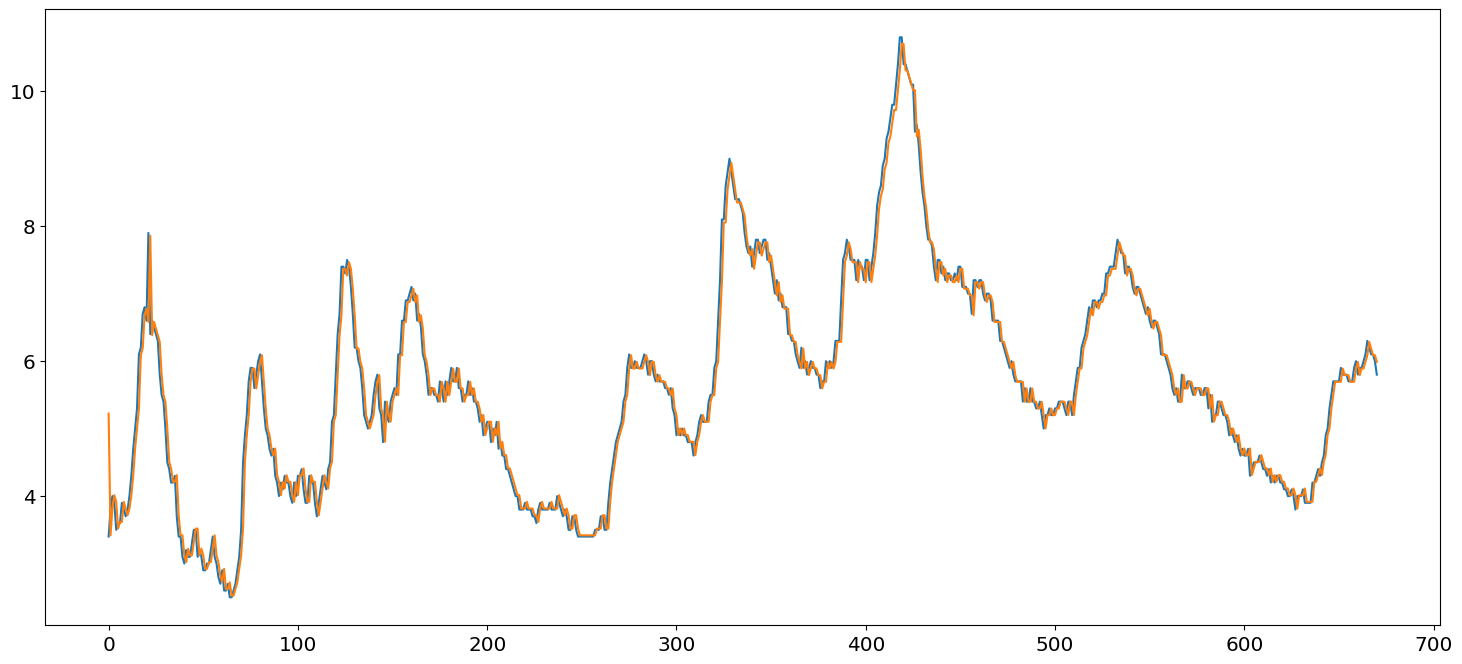

In [149]:
plt.plot(np.exp(y_train.values))
plt.plot(np.exp(model_fit.fittedvalues.values))
plt.title('RMSE: %.4f'% model_ARIMA_RMSE)

In [102]:

dfResults.loc[9,"Model"] = "SARIMA(1, 1, 1)x(0, 0, 2, 12)"
dfResults.loc[9,"Forecast"] = np.exp(predictions_test.values[-10:]).mean()
dfResults.loc[9,"RMSE"] = model_SARIMA_RMSE
dfResults.head(15)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,Random Walk,3.96,0.13786
5,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
6,Moving Average 12,4.786313,0.237783
7,"ARMA / ARIMA (1,0,1)",5.933524,0.386637
9,"SARIMA(1, 1, 1)x(0, 0, 2, 12)",5.457756,0.317591


# Grid Search

In [ ]:
# https://machinelearningmastery.com/how-to-grid-search-deep-learning-models-for-time-series-forecasting/

## Finding GridSearch

In [113]:
from sklearn.model_selection import PredefinedSplit, train_test_split, GridSearchCV

# Create a list where train data indices are -1 and validation data indices are 0
"""
split_index = []
for x in x_trainval.index:
    if x in x_train.index:
        split_index.append(-1)
    else:
        split_index.append(0)
"""        

# Use the list to create PredefinedSplit
x_trainval = pd.concat([x_train, x_val])
y_trainval = pd.concat([y_train, y_val])


split_index = [-1 if x in x_train.index else 0 for x in x_trainval.index]


pds = PredefinedSplit(test_fold = split_index)



# SVM

In [114]:
svm = SVR()

#Sy_pred = svm.fit(x_train.values.reshape(1,-1).T, y_train)#.predict(y_train)

#print("print accuracy of svm algo:", svm.score(x_test, y_test))

In [280]:
#Sy_pred = svm.predict(x_train.values.reshape(1,-1).T)

In [281]:
# model_SVM_RMSE = RMSE(Sy_pred, y_train)
# print(model_SVM_RMSE)

In [ ]:
# https://stackoverflow.com/questions/31948879/using-explicit-predefined-validation-set-for-grid-search-with-sklearn

In [115]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
  

grid = GridSearchCV(SVR(), param_grid, cv=pds)
grid.fit(x_trainval.values.reshape(1,-1).T, y_trainval)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [107]:
"""
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search 
grid.fit(x_train.values.reshape(1,-1).T, y_train)
"""

"\nfrom sklearn.model_selection import GridSearchCV\nparam_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], \n              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} \n  \ngrid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)\n  \n# fitting the model for grid search \ngrid.fit(x_train.values.reshape(1,-1).T, y_train)\n"

In [116]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 0.0001}
SVR(C=0.1, gamma=0.0001)


In [117]:
svm = SVR(C=0.1, gamma=0.0001)

#Sy_pred = 
svm.fit(x_train.values.reshape(1,-1).T, y_train)#.predict(y_train)


SVR(C=0.1, gamma=0.0001)

In [118]:
Sy_pred = svm.predict(x_test.values.reshape(1,-1).T)

In [119]:
model_SVM_RMSE = RMSE(Sy_pred, y_test)
print(model_SVM_RMSE)

0.3426828849307051


In [121]:
dfResults.loc[9,"Model"] = "SVM"
dfResults.loc[9,"Forecast"] = np.exp(svm.predict(x_test)[-10:].mean())
dfResults.loc[9,"RMSE"] = model_SVM_RMSE
dfResults.head(15)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,Random Walk,3.96,0.13786
5,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
6,Moving Average 12,4.786313,0.237783
7,"ARMA / ARIMA (1,0,1)",5.933524,0.386637
10,SVM,5.560939,0.342683
9,SVM,5.560939,0.342683


## Random Forest

In [122]:
from sklearn.ensemble import RandomForestRegressor


para_grids = { 
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['squared_error']
}

#grid = GridSearchCV(RandomForestRegressor(), para_grids, refit = True, verbose = 3)
grid = GridSearchCV(RandomForestRegressor(), para_grids, cv=pds)

  
# fitting the model for grid search
#grid.fit(x_train.values.reshape(1,-1).T, y_train)
grid.fit(x_trainval.values.reshape(1,-1).T, y_trainval)



GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200, 500]})

In [125]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 10}
RandomForestRegressor(max_features='log2', n_estimators=10)


In [126]:
rf = RandomForestRegressor(max_features='auto', n_estimators=10)


# rf = RandomForestRegressor(n_estimators=1200,
#                           max_depth=15,
#                           min_samples_split=5,
#                           min_samples_leaf=5,
#                           max_features=None,
#                           oob_score=True,
#                           random_state=42)

rf.fit(x_train.values.reshape(1,-1).T, y_train)#.predict(y_train)

#rf_pred=rf_model.predict(x_test)
rf_pred = rf.predict(x_test.values.reshape(1,-1).T)
rf_pred_val = rf.predict(x_val.values.reshape(1,-1).T)


In [127]:
RF_RMSE = RMSE(rf_pred, y_test)
RF_RMSE

0.35951965463456087

In [128]:
RF_RMSE_val = RMSE(rf_pred_val, y_val)
RF_RMSE_val

0.29043853627786753

In [129]:
dfResults.loc[10,"Model"] = "Random Forest"
dfResults.loc[10,"Forecast"] = np.exp(rf.predict(x_test)[-10:]).mean()
dfResults.loc[10,"RMSE"] = RF_RMSE
dfResults.head(15)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,Random Walk,3.96,0.13786
5,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
6,Moving Average 12,4.786313,0.237783
7,"ARMA / ARIMA (1,0,1)",5.933524,0.386637
10,Random Forest,5.898655,0.35952
9,SVM,5.560939,0.342683


# XGBoost

In [130]:
parameters = { "learning_rate" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] ,
"n_estimators":[10, 20, 30, 50,100,150]}

In [131]:
#grid = GridSearchCV(XGBRegressor(), parameters, refit = True, verbose = 3)
grid = GridSearchCV(XGBRegressor(), parameters, cv=pds)


# fitting the model for grid search
#grid.fit(x_train.values.reshape(1,-1).T, y_train)
grid.fit(x_trainval.values.reshape(1,-1).T, y_trainval)



GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constrai...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'n_estimators': [10, 20, 30, 50, 100, 150]})

In [132]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'learning_rate': 0.3, 'n_estimators': 30}
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [133]:
xgb = XGBRegressor( learning_rate= 0.3, n_estimators= 30)

In [574]:
#xgb=XGBRegressor(n_estimators=1000,max_depth=8,learning_rate=0.1, reg_lambda=0,subsample=0.8, predictor = 'auto')

In [419]:
#model_xg.fit(X_train,Y_train,eval_set=[(X_train,Y_train),(X_test,Y_test)],early_stopping_rounds=50,verbose=False)

In [134]:
xgb.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_val,y_val)],early_stopping_rounds=50,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [135]:
xgb_pred = xgb.predict(x_train.values.reshape(1,-1).T)
xgb_pred_test = xgb.predict(x_test.values.reshape(1,-1).T)
xgb_pred_val = xgb.predict(x_val.values.reshape(1,-1).T)


In [136]:
XGB_RMSE_val = RMSE(xgb_pred_val, y_val)
XGB_RMSE_val

0.29287237957743883

In [137]:
XGB_RMSE = RMSE(xgb_pred_test, y_test)
XGB_RMSE

0.35558145304846683

In [138]:
dfResults.loc[11,"Model"] = "XGBoost"
dfResults.loc[11,"Forecast"] = np.exp(xgb_pred_test[-10:]).mean()
dfResults.loc[11,"RMSE"] = XGB_RMSE
dfResults.head(15)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,Random Walk,3.96,0.13786
5,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
6,Moving Average 12,4.786313,0.237783
7,"ARMA / ARIMA (1,0,1)",5.933524,0.386637
10,Random Forest,5.898655,0.35952
9,SVM,5.560939,0.342683


In [139]:
dfResults.sort_values(by=['RMSE'])

,Model,Forecast,RMSE
4,Random Walk,3.96,0.13786
6,Moving Average 12,4.786313,0.237783
5,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
0,Median,5.6,0.330045
9,SVM,5.560939,0.342683
11,XGBoost,5.860736,0.355581
10,Random Forest,5.898655,0.35952
7,"ARMA / ARIMA (1,0,1)",5.933524,0.386637
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
